# <a id='toc1_'></a>[Estructura del Proyecto](#toc0_)
  
**1. Inicialización:**
  
 - *Recopilación de Recursos*
  
Reunir los recursos necesarios para el proyecto, incluidos datos relevantes, herramientas de software, bibliotecas de Python, recursos computacionales, etc.
  
 - *Exploración Inicial de Datos*
  
Realizar una exploración inicial de los datos disponibles para comprender su naturaleza y calidad. Esto puede incluir la identificación de la estructura de los datos, la presencia de valores faltantes, la distribución de variables, el desbalance de clases, etc.
  
**2. Preprocesamiento de Datos:**
  
 - *Limpieza de Datos y enriquecimiento de datos*
  
Llevar a cabo tareas de limpieza y preprocesamiento de datos, como el manejo de valores faltantes, la codificación de variables categóricas, la normalización de datos, la eliminación de outliers, etc.

 - *Análisis Exploratorio de Datos*
  
Con los datos preprocesados es posible que analizar algunas columnas ahora sea mucho más fácil por lo que es el momento ideal para buscar ver la naturaleza de nuestros datos de forma más clara. También sirve para realizar una comparación respecto a cómo impactó nuestro preprocesamiento sobre los datos y modificar algo de ser necesario.
  
**3. Adaptación de Datos para Machine Learning**
  
 - *Selección de Características*
  
Seleccionar las características relevantes que se utilizarán para construir el modelo predictivo. Esto puede implicar técnicas como análisis de correlación, eliminación de características redundantes, ingeniería de características, etc.
  
 - *División de Datos*
  
Dividir los datos en conjuntos de entrenamiento y prueba. Esto es importante para evaluar el rendimiento del modelo de manera imparcial y reducir/evitar el sobreajuste.
  
**4. Construcción del/los Modelo/s:**
  
Seleccionar el algoritmo de modelado adecuado según la naturaleza del problema y los datos disponibles. Entrenar el modelo utilizando el conjunto de entrenamiento y ajustar los parámetros según sea necesario. Ésta etapa puede subdividirse en múltiples partes si obtuvimos múltiples conjuntos de datos del preprocesamiento y queremos compararlo. Puede expandirse más áun si también deseamos probar múltiples modelos entre sí.
  
**5. Evaluación del/los Modelo/s:**
  
Evaluar el rendimiento de los modelos utilizando el conjunto de validación y las métricas definidas previamente. Comparar el rendimiento de cada modelo tomando en cuenta desempeño con la/s metrica/s elegidas, carga computacional y tiempo de construcción. Realizar ajustes en los modelos de ser necesario.  

**Table of contents**<a id='toc0_'></a>    
- [Estructura del Proyecto Final](#toc1_)    
- [Descripción del Proyecto](#toc2_)    
  - [Inicialización](#toc2_1_)    
    - [Exploración Inicial de Datos](#toc2_1_1_)    
      - [`phone`](#toc2_1_1_1_)    
      - [`personal`](#toc2_1_1_2_)    
      - [`internet`](#toc2_1_1_3_)    
      - [`contract`](#toc2_1_1_4_)    
  - [Preprocesamiento de Datos](#toc2_2_)    
    - [Limpieza y enriquecimiento de datos](#toc2_2_1_)    
      - [Normalización de columnas](#toc2_2_1_1_)    
      - [Reemplazo de _str_ por _bool_](#toc2_2_1_2_)    
      - [Corrección de _dtypes_](#toc2_2_1_3_)    
      - [Combinación de las tablas en una conjunta](#toc2_2_1_4_)    
    - [Análisis Exploratorio de Datos](#toc2_2_2_)    
  - [Adaptación de Datos para Machine Learning](#toc2_3_)    
    - [Selección de Características](#toc2_3_1_)    
    - [Separación de Datos](#toc2_3_2_)    
      - [Datos sin selección de características](#toc2_3_2_1_)    
      - [Datos con selección de características](#toc2_3_2_2_)    
  - [Modelos sin selección de características](#toc2_4_)    
    - [LightGBM](#toc2_4_1_)    
    - [CatBoost](#toc2_4_2_)    
  - [Modelos con seleccion de carácteristicas](#toc2_5_)    
    - [LightGBM](#toc2_5_1_)    
    - [CatBoost](#toc2_5_2_)    
    - [Comparación del rendimiento de modelos](#toc2_5_3_)    
  - [Conclusión](#toc2_6_)    
    - [Recapitulación](#toc2_6_1_)    
    - [Comparación de rendimientos](#toc2_6_2_)    
    - [Análisis de las predicciones](#toc2_6_3_)    
    - [Recomendaciones y palabras finales](#toc2_6_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Descripción del Proyecto](#toc0_)
Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.
## <a id='toc2_1_'></a>[Inicialización](#toc0_)


In [1]:
# Librerías de Python
import re
import datetime

# Librerías escenciales para Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Herramientas para selección de datos, optimización de h-parámetros y evaluación de modelos
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Lasso

# Cargamos los modelos que vamos a usar tambien
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2]:
# Ahora cargamos nuestros datasets
phone = pd.read_csv('../../data/raw/final_provider/phone.csv')
personal = pd.read_csv('../../data/raw/final_provider/personal.csv')
internet = pd.read_csv('../../data/raw/final_provider/internet.csv')
contract = pd.read_csv('../../data/raw/final_provider/contract.csv')

### <a id='toc2_1_1_'></a>[Exploración Inicial de Datos](#toc0_)
La exploración tendrá que separarse en 4 partes para centrarnos en cada uno de los datasets
#### <a id='toc2_1_1_1_'></a>[`phone`](#toc0_)

In [3]:
# Veamos entonces un vistazo general y si tiene duplicados
phone.info()
print(f'\n Duplicados: {phone.duplicated().sum()}')
phone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

 Duplicados: 0


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


Un dataset muy simple en donde tenemos el customerID y si el cliente posee múltiples lineas. No presenta ningún duplicado ni valor nulo para nuestra suerte. En la etapa de preprocesamiento vamos a transformar esa columna en booleana para ahorrarnos unos bytes de memoria y normalizar los nombres de esas columnas.

#### <a id='toc2_1_1_2_'></a>[`personal`](#toc0_)
Veamos que nos espera en el siguiente df

In [4]:
personal.info()
print(f'\n Duplicados: {personal.duplicated().sum()}')
personal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

 Duplicados: 0


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


Siguen las noticias agradables, no nos encontramos valores nulos ni filas duplicadas. Si vemos como hay que normalizar las columnas y transformar un par de columnas a binario.

In [5]:
# Creemos rápido una función para ver los balances de clases
def get_distributions(dataset):
    for column in dataset.drop(columns=['customerID']).columns:
        norm = dataset[column].value_counts(normalize=True)
        total = dataset[column].value_counts()
        complete = pd.concat([total, norm],axis=1)
        complete.columns = ['total', 'ratio']
        complete.index.name = column
        display(complete)

In [6]:
get_distributions(personal)

,total,ratio
gender,,
Male,3555,0.504756
Female,3488,0.495244


,total,ratio
SeniorCitizen,,
0,5901,0.837853
1,1142,0.162147


,total,ratio
Partner,,
No,3641,0.516967
Yes,3402,0.483033


,total,ratio
Dependents,,
No,4933,0.700412
Yes,2110,0.299588


Podemos ver que las columnas `SeniorCitizen` y `Dependents` presentan un ligero desbalance de clases. A primera vista aplicar submuestreo no me parece una buena alternativa ya que tenemos menos de 10000 filas y terminaríamos con bastantes pocas filas en nuestros datos. Cuando pasemos al preprocesamiento de datos nos encargaremos de combinar todas las tablas en una y veremos que tanta incidencia en nuestro target tienen las columnas.

#### <a id='toc2_1_1_3_'></a>[`internet`](#toc0_)

In [7]:
internet.info()
print(f'\n Duplicados: {internet.duplicated().sum()}')
internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

 Duplicados: 0


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


En éste caso podemos ver los detalles del tipo de internet que tienen los diferentes clientes y los diferentes servicios a los que acceden. También tendremos que realizar un preprocesamiento de datos para transformar las columnas a booleano y normalizar los títulos.

In [8]:
get_distributions(internet)

,total,ratio
InternetService,,
Fiber optic,3096,0.561175
DSL,2421,0.438825


,total,ratio
OnlineSecurity,,
No,3498,0.63404
Yes,2019,0.36596


,total,ratio
OnlineBackup,,
No,3088,0.559724
Yes,2429,0.440276


,total,ratio
DeviceProtection,,
No,3095,0.560993
Yes,2422,0.439007


,total,ratio
TechSupport,,
No,3473,0.629509
Yes,2044,0.370491


,total,ratio
StreamingTV,,
No,2810,0.509335
Yes,2707,0.490665


,total,ratio
StreamingMovies,,
No,2785,0.504803
Yes,2732,0.495197


Para el dataset `internet` no vemos ninguna columna con un nivel de desbalance muy alto siendo `OnlineSecurity` la que más presenta con una proporción 63:37.

#### <a id='toc2_1_1_4_'></a>[`contract`](#toc0_)

In [9]:
contract.info()
print(f'\n Duplicados: {contract.duplicated().sum()}')
contract

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

 Duplicados: 0


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


Ésta es la tabla más complicada que tenemos, en ella también se encuentra nuestro objetivo `EndDate` la que si bien aparece de como fecha vamos a querer identificar tambien como booleana. Acá también nos encontramos las únicas columnas numéricas con las que vamos a trabajar mientras que el resto son categóricas (`MonthlyCharges` y `TotalCharges`). También me llama la atención que la columna `TotalCharges` tenga de _dtype_ object, ya veremos eso después.

In [10]:
# En el caso de contract podemos observar solo 3 columnas, por ahora
get_distributions(contract[['customerID','Type','PaperlessBilling','PaymentMethod']])

,total,ratio
Type,,
Month-to-month,3875,0.550192
Two year,1695,0.240664
One year,1473,0.209144


,total,ratio
PaperlessBilling,,
Yes,4171,0.592219
No,2872,0.407781


,total,ratio
PaymentMethod,,
Electronic check,2365,0.335794
Mailed check,1612,0.228880
Bank transfer (automatic),1544,0.219225
Credit card (automatic),1522,0.216101


En éste caso vemos un desbalance de clases en las columnas `Type` y `PaymentMethod`. Es mucho más marcado en `Type` siendo que `Month-to-month` tiene un 22% por encima del valor balance (33%).

## <a id='toc2_2_'></a>[Preprocesamiento de Datos](#toc0_)
### <a id='toc2_2_1_'></a>[Limpieza y enriquecimiento de datos](#toc0_)
#### <a id='toc2_2_1_1_'></a>[Normalización de columnas](#toc0_)

In [11]:
# Primero creamos una funcion para pasar un texto a snake_case
def to_snake_case(name):
    s1 = re.sub('(.)([A-Z][a-z]+)',r'\1_\2',name)
    return re.sub('([a-z0-9])([A-Z])',r'\1_\2',s1).lower()

In [12]:
# De ahí un texto para pasar todas las columnas de un df a snake_case
def get_new_column_names(df):
    new_columns = []
    for column_name in df.columns:
        new_columns.append(to_snake_case(column_name))
    return new_columns

In [13]:
phone.columns = get_new_column_names(phone)

In [14]:
personal.columns = get_new_column_names(personal)

In [15]:
internet.columns = get_new_column_names(internet)

In [16]:
contract.columns = get_new_column_names(contract)

#### <a id='toc2_2_1_2_'></a>[Reemplazo de _str_ por _bool_](#toc0_)
Para el reemplazo de los valores vamos a usar label encoding ya que los modelos que vamos a usar nos permiten especificar cuales columnas son categóricas lo que nos permite superar la ordinalidad artificial que introduce label encoding. Otro motivo por el que optamos por label encoding es porque vamos a tratar con modelos basados en árboles que no se ven notoriamente afectados por ordinal encoding.
  
Tambien hay que aclarar que no opto por OHE ya que la mayoría de las columnas tienen 2 clases únicamente y aplicarles label encoding es lo mismo que OHE.

In [17]:
def get_labeled_column(column):
    le = LabelEncoder()
    new_columns = le.fit_transform(column)
    return new_columns

In [18]:
# Creamos un diccionario para reemplazar los valores más fáciles
replacement_dict = {
    'Yes': 1,
    'No': 0
}

In [19]:
# Ahora reemplazamos los valores de ésta forma para afectar múltiples columnas de los df con una sola linea
phone.replace(replacement_dict, inplace=True)
personal.replace(replacement_dict, inplace=True)
internet.replace(replacement_dict, inplace=True)
contract.replace(replacement_dict, inplace=True)

In [20]:
personal['gender'] = get_labeled_column(personal['gender'])

In [21]:
internet['internet_service'] = get_labeled_column(internet['internet_service'])

In [22]:
# Reemplazamos los que no dieron de baja el servicio todavia con una fecha lejana
contract['end_date'].replace(0,'2050-01-01 00:00:00', inplace=True)

In [23]:
contract

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,2050-01-01 00:00:00,Month-to-month,1,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,2050-01-01 00:00:00,One year,0,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,2050-01-01 00:00:00,One year,0,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2050-01-01 00:00:00,One year,1,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,2050-01-01 00:00:00,One year,1,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,2050-01-01 00:00:00,Month-to-month,1,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,1,Mailed check,74.40,306.6


In [24]:
# Creamos una columna que posteriormente será nuestro target
contract['end_date_binary'] = (contract['end_date'] != '2050-01-01 00:00:00').astype(int)

In [25]:
contract['end_date'].unique()

array(['2050-01-01 00:00:00', '2019-12-01 00:00:00',
       '2019-11-01 00:00:00', '2019-10-01 00:00:00',
       '2020-01-01 00:00:00'], dtype=object)

In [26]:
# Ahora reemplazamos la columna type por valores numéricos
contract['type'] = get_labeled_column(contract['type'])

In [27]:
# Y reemplazamos en payment_method tambien 
contract['payment_method'] = get_labeled_column(contract['payment_method'])

In [28]:
contract

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_binary
0,7590-VHVEG,2020-01-01,2050-01-01 00:00:00,0,1,2,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2050-01-01 00:00:00,1,0,3,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,0,1,3,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2050-01-01 00:00:00,1,0,0,42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2050-01-01 00:00:00,1,1,3,84.80,1990.5,0
7039,2234-XADUH,2014-02-01,2050-01-01 00:00:00,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,2019-03-01,2050-01-01 00:00:00,0,1,2,29.60,346.45,0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,0,1,3,74.40,306.6,1


#### <a id='toc2_2_1_3_'></a>[Corrección de _dtypes_](#toc0_)
Ahora vamos a transformar nuestras variables categóricas al _dtype_ `category` ya que eso va a permitir a los modelos identificarlas automáticamente.

In [29]:
phone = phone.astype({'multiple_lines':'category'})

In [30]:
personal = personal.astype({col: 'category' for col in personal.columns[1:]})

In [31]:
internet = internet.astype({col: 'category' for col in internet.columns[1:]})

In [32]:
contract = contract.astype({col: 'category' for col in contract.columns[1:-2]})

In [33]:
# Al querer reemplazar el dtype de 'total_charges' me encontré con un error, veamos en detalle
contract[contract['total_charges'] == ' ']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_binary
488,4472-LVYGI,2020-02-01,2050-01-01 00:00:00,2,1,0,52.55,,0
753,3115-CZMZD,2020-02-01,2050-01-01 00:00:00,2,0,3,20.25,,0
936,5709-LVOEQ,2020-02-01,2050-01-01 00:00:00,2,0,3,80.85,,0
1082,4367-NUYAO,2020-02-01,2050-01-01 00:00:00,2,0,3,25.75,,0
1340,1371-DWPAZ,2020-02-01,2050-01-01 00:00:00,2,0,1,56.05,,0
3331,7644-OMVMY,2020-02-01,2050-01-01 00:00:00,2,0,3,19.85,,0
3826,3213-VVOLG,2020-02-01,2050-01-01 00:00:00,2,0,3,25.35,,0
4380,2520-SGTTA,2020-02-01,2050-01-01 00:00:00,2,0,3,20.00,,0
5218,2923-ARZLG,2020-02-01,2050-01-01 00:00:00,1,1,3,19.70,,0
6670,4075-WKNIU,2020-02-01,2050-01-01 00:00:00,2,0,3,73.35,,0


Al parecer los clientes que se registraron en el último mes que cubre nuestra tabla no tienen valores imputados para la columna `total_charges` (lógicamente). De suerte eso se soluciona facilmente, registremos esos valores con 0

In [34]:
contract['total_charges'] = contract['total_charges'].replace({' ': 0})

In [35]:
# Ahora si podemos cambiar el dtype por uno apto
contract = contract.astype({'total_charges': float})
contract = contract.astype({'monthly_charges': float})

#### <a id='toc2_2_1_4_'></a>[Combinación de las tablas en una conjunta](#toc0_)
Ahora vamos a juntar todas nuestras tablas en una sola la cual analizaremos más adelante y usaremos para entrenar nuestros modelos.

In [36]:
# Veamos cómo se vería una combinacíon de todas
full_table = (contract
 .merge(personal, how='left', on='customer_id')
 .merge(phone, how='left', on='customer_id')
 .merge(internet, how='left', on='customer_id'))
full_table.info()
full_table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        7043 non-null   object  
 1   begin_date         7043 non-null   category
 2   end_date           7043 non-null   category
 3   type               7043 non-null   category
 4   paperless_billing  7043 non-null   category
 5   payment_method     7043 non-null   category
 6   monthly_charges    7043 non-null   float64 
 7   total_charges      7043 non-null   float64 
 8   end_date_binary    7043 non-null   int64   
 9   gender             7043 non-null   category
 10  senior_citizen     7043 non-null   category
 11  partner            7043 non-null   category
 12  dependents         7043 non-null   category
 13  multiple_lines     6361 non-null   category
 14  internet_service   5517 non-null   category
 15  online_security    5517 non-null   category
 16  online

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_binary,gender,...,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,2020-01-01,2050-01-01 00:00:00,0,1,2,29.85,29.85,0,0,...,1,0,NaN,0,0,1,0,0,0,0
1,5575-GNVDE,2017-04-01,2050-01-01 00:00:00,1,0,3,56.95,1889.50,0,1,...,0,0,0,0,1,0,1,0,0,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,0,1,3,53.85,108.15,1,1,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,2016-05-01,2050-01-01 00:00:00,1,0,0,42.30,1840.75,0,1,...,0,0,NaN,0,1,0,1,1,0,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,0,1,2,70.70,151.65,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2050-01-01 00:00:00,1,1,3,84.80,1990.50,0,1,...,1,1,1,0,1,0,1,1,1,1
7039,2234-XADUH,2014-02-01,2050-01-01 00:00:00,1,1,1,103.20,7362.90,0,0,...,1,1,1,1,0,1,1,0,1,1
7040,4801-JZAZL,2019-03-01,2050-01-01 00:00:00,0,1,2,29.60,346.45,0,0,...,1,1,NaN,0,1,0,0,0,0,0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,0,1,3,74.40,306.60,1,1,...,1,0,1,1,0,0,0,0,0,0


Al parecer generamos una presencia de nulos al combinar las tablas, si observamos bien notamos como las columnas de `phone` e `internet` son las que tienen éstos nulos. Seguramente el origen de ellos es que esos clientes contrataron solo servicio telefónico o de internet de la compañía y no ambos.

In [37]:
# Veamos esas filas con valores ausentes
full_table[full_table.isna().any(axis=1)]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_binary,gender,...,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,2020-01-01,2050-01-01 00:00:00,0,1,2,29.85,29.85,0,0,...,1,0,NaN,0,0,1,0,0,0,0
3,7795-CFOCW,2016-05-01,2050-01-01 00:00:00,1,0,0,42.30,1840.75,0,1,...,0,0,NaN,0,1,0,1,1,0,0
7,6713-OKOMC,2019-04-01,2050-01-01 00:00:00,0,0,3,29.75,301.90,0,0,...,0,0,NaN,0,1,0,0,0,0,0
11,7469-LKBCI,2018-10-01,2050-01-01 00:00:00,2,0,1,18.95,326.80,0,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8191-XWSZG,2015-10-01,2050-01-01 00:00:00,1,0,3,20.65,1022.95,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,2019-08-01,2050-01-01 00:00:00,0,1,2,44.40,263.05,0,0,...,0,0,NaN,0,0,0,0,0,1,1
7030,0871-OPBXW,2019-12-01,2050-01-01 00:00:00,0,1,3,20.05,39.25,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7036,7750-EYXWZ,2019-02-01,2050-01-01 00:00:00,1,0,2,60.65,743.30,0,0,...,0,0,NaN,0,0,1,1,1,1,1
7037,2569-WGERO,2014-02-01,2050-01-01 00:00:00,2,1,0,21.15,1419.40,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# A primera vista parece que mi hipótesis es cierta, nos aseguremos de eso
full_table[(full_table['multiple_lines'].isna()) & (full_table['internet_service'].isna())]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_binary,gender,...,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies


Y nuestra hipótesis fue comprobada! Para nuestra suerte todas esas columnas son binarias por lo que se pueden reemplazar esos valores nulos con un 0 sin problema.

In [39]:
# Ahora llamamos a un bucle para reemplazar los valores
for column in range(-1,-9,-1):
    full_table.iloc[:,column].fillna(0,inplace=True)

In [40]:
# Verificamos la imputación
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        7043 non-null   object  
 1   begin_date         7043 non-null   category
 2   end_date           7043 non-null   category
 3   type               7043 non-null   category
 4   paperless_billing  7043 non-null   category
 5   payment_method     7043 non-null   category
 6   monthly_charges    7043 non-null   float64 
 7   total_charges      7043 non-null   float64 
 8   end_date_binary    7043 non-null   int64   
 9   gender             7043 non-null   category
 10  senior_citizen     7043 non-null   category
 11  partner            7043 non-null   category
 12  dependents         7043 non-null   category
 13  multiple_lines     7043 non-null   category
 14  internet_service   7043 non-null   category
 15  online_security    7043 non-null   category
 16  online

In [41]:
# Como las columnas 'begin_date' y 'end_date' aparecen como category vamos a modificarla para que sea datetime
full_table['begin_date'] = pd.to_datetime(full_table['begin_date'].astype(str), infer_datetime_format=True)
full_table['end_date'] = pd.to_datetime(full_table['end_date'].astype(str), infer_datetime_format=True)

In [42]:
# Verificamos que el cambio se haya logrado con éxito
full_table.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date             datetime64[ns]
type                       category
paperless_billing          category
payment_method             category
monthly_charges             float64
total_charges               float64
end_date_binary               int64
gender                     category
senior_citizen             category
partner                    category
dependents                 category
multiple_lines             category
internet_service           category
online_security            category
online_backup              category
device_protection          category
tech_support               category
streaming_tv               category
streaming_movies           category
dtype: object

### <a id='toc2_2_2_'></a>[Análisis Exploratorio de Datos](#toc0_)
Ahora con la tabla completa vamos a poder observar como se comportan las columnas que antes no podíamos analizar.

In [43]:
pd.concat([
full_table['end_date'].value_counts(),
full_table['end_date'].value_counts(normalize=True)
],axis=1)

,end_date,end_date
2050-01-01,5174,0.734630
2019-11-01,485,0.068863
2019-12-01,466,0.066165
2020-01-01,460,0.065313
2019-10-01,458,0.065029


74:26 ciertamente no es lo más balanceado que existe pero tampoco es un dataset desbalanceado. Pasemos a analizar un poco más utilizando la tabla original. Analicemos primero los clientes que se dieron de baja.

In [44]:
full_table.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'end_date_binary',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

In [45]:
full_table.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date             datetime64[ns]
type                       category
paperless_billing          category
payment_method             category
monthly_charges             float64
total_charges               float64
end_date_binary               int64
gender                     category
senior_citizen             category
partner                    category
dependents                 category
multiple_lines             category
internet_service           category
online_security            category
online_backup              category
device_protection          category
tech_support               category
streaming_tv               category
streaming_movies           category
dtype: object

In [46]:
# Tambien adaptemos la tabla para que las columnas sean numéricas
eda_table = full_table.astype({col: float for col in full_table.columns[3:]})

In [47]:
ended_contracts = full_table[full_table['end_date_binary'] == 1]

In [48]:
ended_contracts

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,end_date_binary,gender,...,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
2,3668-QPYBK,2019-10-01,2019-12-01,0,1,3,53.85,108.15,1,1,...,0,0,0,0,1,1,0,0,0,0
4,9237-HQITU,2019-09-01,2019-11-01,0,1,2,70.70,151.65,1,0,...,0,0,0,1,0,0,0,0,0,0
5,9305-CDSKC,2019-03-01,2019-11-01,0,1,2,99.65,820.50,1,0,...,0,0,1,1,0,0,1,0,1,1
8,7892-POOKP,2017-07-01,2019-11-01,0,1,2,104.80,3046.05,1,0,...,1,0,1,1,0,0,1,1,1,1
13,0280-XJGEX,2015-09-01,2019-10-01,0,1,0,103.70,5036.30,1,1,...,0,0,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,2018-11-01,2019-11-01,1,1,2,59.80,727.80,1,1,...,0,0,0,0,0,0,0,1,1,0
7026,8775-CEBBJ,2019-02-01,2019-11-01,0,1,0,44.20,403.35,1,0,...,0,0,0,0,0,0,0,0,0,0
7032,6894-LFHLY,2019-10-01,2019-11-01,0,1,2,75.75,75.75,1,1,...,0,0,1,1,0,0,0,0,0,0
7034,0639-TSIQW,2014-03-01,2019-10-01,0,1,1,102.95,6886.25,1,0,...,0,0,1,1,1,1,1,0,1,0


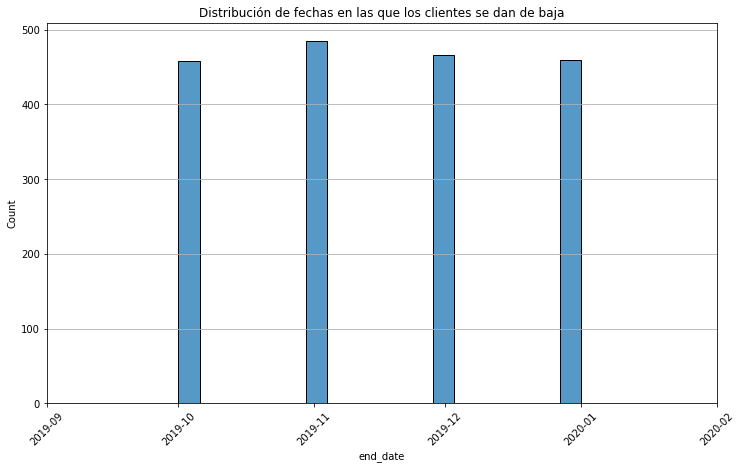

In [49]:
# Observemos un poco cuales son las fechas más popoulares para darse de baja
plt.figure(figsize=(12,7))
sns.histplot(data=ended_contracts['end_date'])
plt.xticks(rotation=45)
plt.xlim(datetime.date(2019, 9, 1), datetime.date(2020, 2, 1))
plt.title('Distribución de fechas en las que los clientes se dan de baja')
plt.grid(axis='y')
plt.show()

Al parecer todos los clientes dejaron de contratar servicios a comienzo del mes, o las imputaciones del fin del contrato se realizaron al comienzo del mes. Tambien podemos notar como la mayoría de las bajas se dieron en los últimos meses del año y el primer mes del año siguiente. Habría que realizar un análisis sobre los contratos de éstas personas.

In [50]:
eda_table['month_year'] = (pd.to_datetime(eda_table['begin_date'].astype(str),format='%Y-%m-%d').dt.strftime('%Y-%m'))

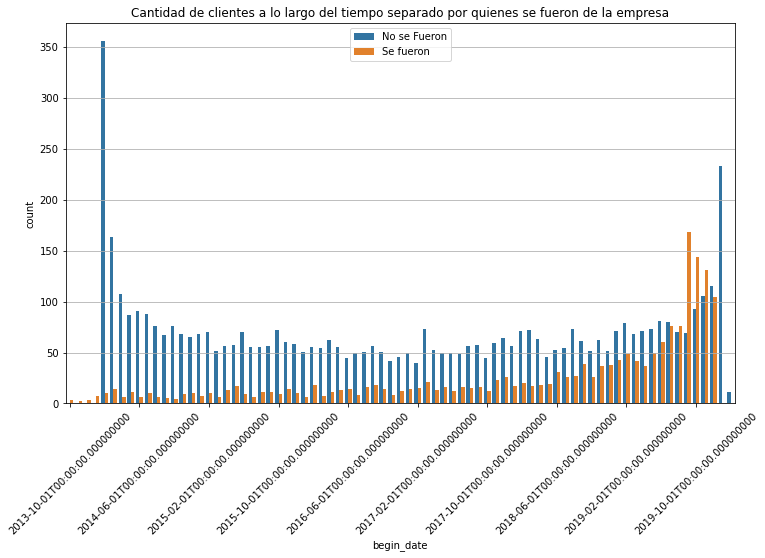

In [51]:
# Veamos ahora un poco respecto a begin_date
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(data=eda_table.sort_values(by='begin_date'), x='begin_date', hue='end_date_binary', ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.title('Cantidad de clientes a lo largo del tiempo separado por quienes se fueron de la empresa')
plt.legend(['No se Fueron', 'Se fueron'])
plt.show()

Como podemos ver del gráfico (que no logré pulir al máximo), la mayoría de los clientes que se incorporaron a la empresa previo a 2018 se mantenían en ésta pero de 2018 en adelante los clientes que eventualmente se iban a ir aumentaron. Habría que ver, capaz que hubo un cambio en el marketing de la empresa que generó una sobreexpectativa en los clientes o alguna compañia competidora se adaptó y empezó a ofrecer promos más tentadoras. Capaz que fueron objetivos de una empresa que los determinó como clientes potenciales con un modelo de machine learning... De todas formas, hay que analizar cuales cambios pasaron después de 2018 o si hay algún error en los datos que nos dieron.

In [52]:
ended_contracts['type'].value_counts()

0    1655
1     166
2      48
Name: type, dtype: int64

In [53]:
# La mayoría pagaba mes a mes, verifiquemos primero si los clientes que tenían contratos anuales lo terminaban con el contrato
ended_contracts['years_being_client'] = (ended_contracts['end_date'].dt.year) - (ended_contracts['begin_date'].dt.year)

/tmp/ipykernel_33/788712584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ended_contracts['years_being_client'] = (ended_contracts['end_date'].dt.year) - (ended_contracts['begin_date'].dt.year)


In [54]:
ended_contracts[['begin_date','end_date','type','years_being_client']]

,begin_date,end_date,type,years_being_client
2,2019-10-01,2019-12-01,0,0
4,2019-09-01,2019-11-01,0,0
5,2019-03-01,2019-11-01,0,0
8,2017-07-01,2019-11-01,0,2
13,2015-09-01,2019-10-01,0,4
...,...,...,...,...
7021,2018-11-01,2019-11-01,1,1
7026,2019-02-01,2019-11-01,0,0
7032,2019-10-01,2019-11-01,0,0
7034,2014-03-01,2019-10-01,0,5


In [55]:
ended_contracts['type'].value_counts()

0    1655
1     166
2      48
Name: type, dtype: int64

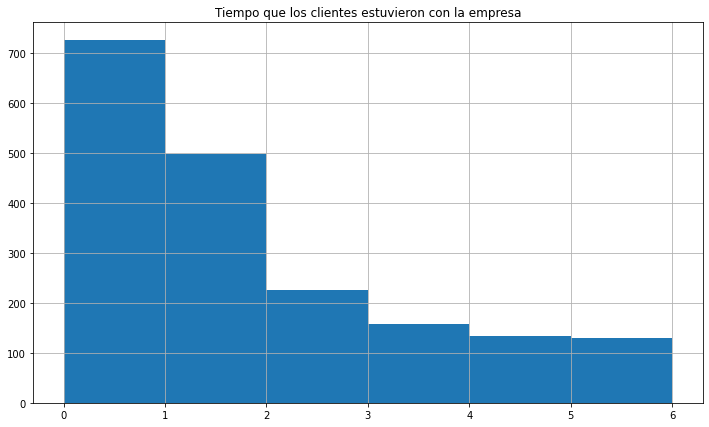

In [56]:
plt.figure(figsize=(12,7))
ended_contracts['years_being_client'].hist(bins=ended_contracts['years_being_client'].max())
plt.title('Tiempo que los clientes estuvieron con la empresa')
plt.show()

Al parecer la mayoría de los clientes salen de la empresa antes de cumplir el año siquiera y de ahí van bajando hasta los 3 años que ya se asienta el gráfico. Veamos como se relaciona ésta variable con el monto que pagan.

In [57]:
# También quiero ver las columnas numéricas 
eda_table[['monthly_charges','total_charges']].describe()

,monthly_charges,total_charges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


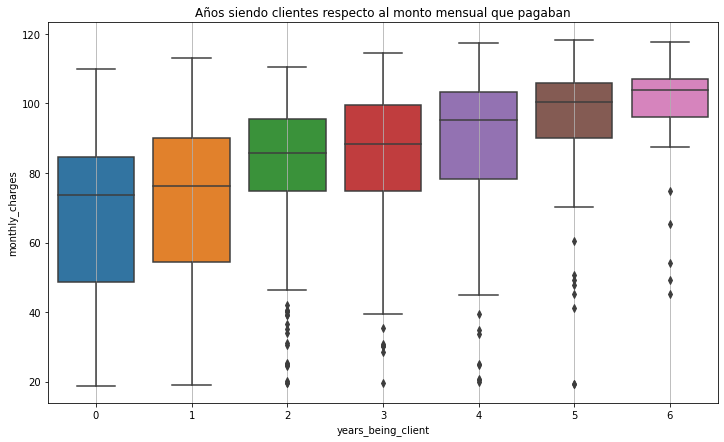

In [58]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ended_contracts, y='monthly_charges', x='years_being_client')
plt.title('Años siendo clientes respecto al monto mensual que pagaban')
plt.grid(axis='x')
plt.show()

Si bien no vemos una corrleación muy directa, si es verdad que no encontramos a ningún cliente que haya estado 6 años y que pague menos de 40 $. Tampoco podemos sacar ninguna conclusión muy fuerte ya que los clientes que no llegaron al año cubren todos los sectores. Verifiquemos que pasa si usamos el pago total.

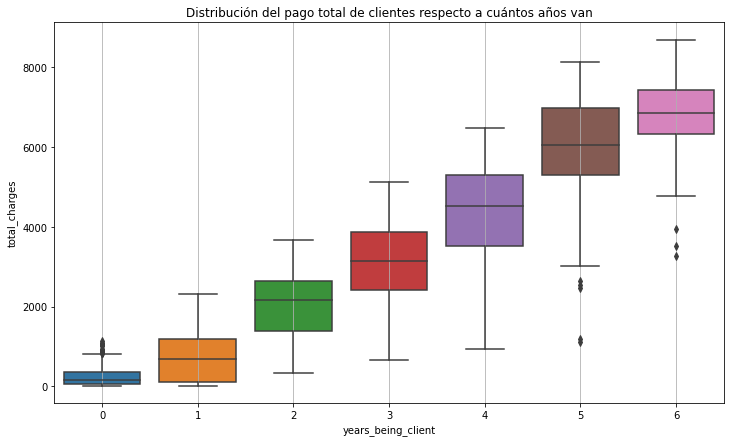

In [59]:
plt.figure(figsize=(12,7))
sns.boxplot(data=ended_contracts, y='total_charges', x='years_being_client')
plt.title('Distribución del pago total de clientes respecto a cuántos años van')
plt.grid(axis='x')
plt.show()

En retrospectiva... no sé que esperaba, claramente los que estuvieron más tiempo pagaron más en total. Lo que si podemos observar es como se fue separando el monto total de los clientes que pagan menos mensualmente al punto que llegaron a pagar menos de 2 veces lo que pagaron los máximos.

In [60]:
# Ahora quiero crear una columna en la que resumo cuántos servicios de internet tiene cada cliente
eda_table['internet_services'] = eda_table[internet.columns[2:]].sum(axis=1)

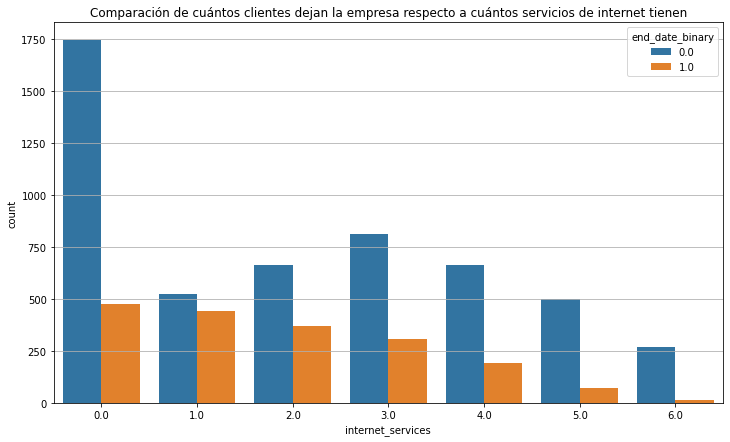

In [61]:
plt.figure(figsize=(12,7))
sns.countplot(data=eda_table, x='internet_services', hue='end_date_binary')
plt.title('Comparación de cuántos clientes dejan la empresa respecto a cuántos servicios de internet tienen')
plt.grid(axis='y')

Al parecer la mayoría no accede a ninguno de los servicios adicionales que provee la empresa y de los que acceden la mayoría elije 3 servicios nada más. También notamos como si alguien tiene 6 servicios es muy raro que deje la empresa, pero si lo hacen algunos.

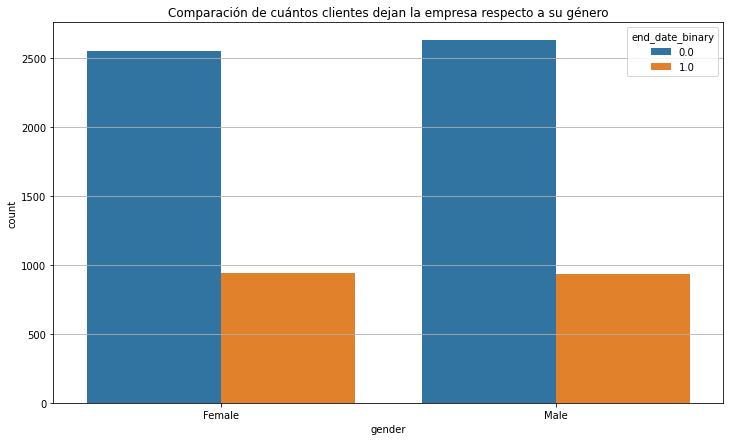

In [62]:
# Observemos ahora una tabla para gender
# Female = 0
plt.figure(figsize=(12,7))
sns.countplot(data=eda_table, x='gender', hue='end_date_binary')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Comparación de cuántos clientes dejan la empresa respecto a su género')
plt.grid(axis='y')

No parece haber ningún sesgo respecto al género de la persona, lo cual es bueno ya que algo de ese estilo sería un muy mal indicador para la empresa.

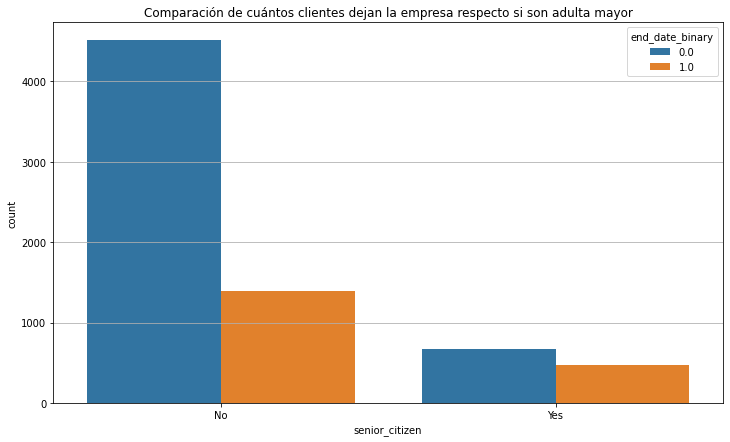

In [63]:
plt.figure(figsize=(12,7))
sns.countplot(data=eda_table, x='senior_citizen', hue='end_date_binary')
plt.xticks([0, 1], ['No','Yes'])
plt.title('Comparación de cuántos clientes dejan la empresa respecto si son adulta mayor')
plt.grid(axis='y')

El caso de `senior_citizen` es más particular ya que se cuenta con muy pocas muestras totales por lo que no esperaba obtener algo fácil de interpretar. Lo que sí se puede obtener es que si el cliente es mayor es más probable que cancele no porque haya muchos mayores que se den de baja sino porque la diferencia relativa entre si cancela o no es cercana a 50/50 (no el 70-30 que vimos para lo general).

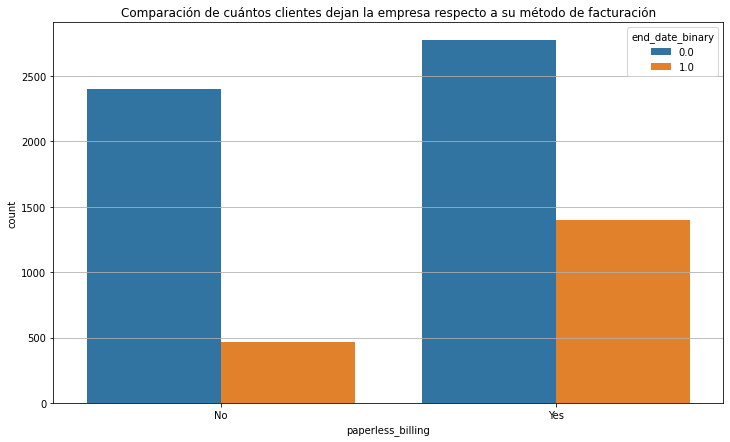

In [64]:
plt.figure(figsize=(12,7))
sns.countplot(data=eda_table, x='paperless_billing', hue='end_date_binary')
plt.xticks([0, 1], ['No','Yes'])
plt.title('Comparación de cuántos clientes dejan la empresa respecto a su método de facturación')
plt.grid(axis='y')

No esperaba que haya una diferencia importante pero al parecer los clientes que reciben sus facturas en papel son menos propensos a dejar los servicios.

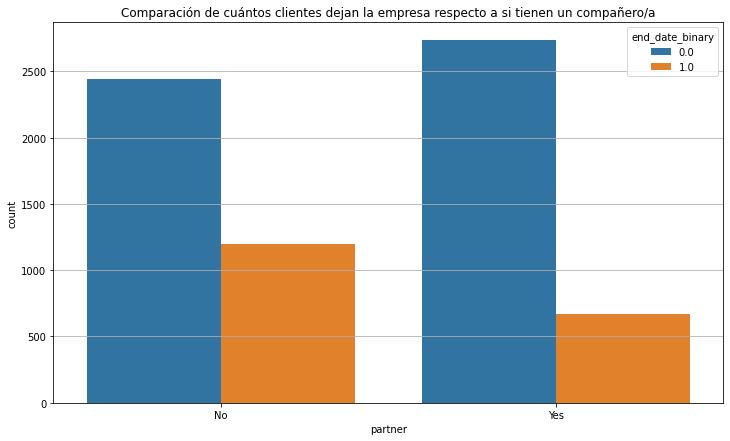

In [65]:
plt.figure(figsize=(12,7))
sns.countplot(data=eda_table, x='partner', hue='end_date_binary')
plt.xticks([0, 1], ['No','Yes'])
plt.title('Comparación de cuántos clientes dejan la empresa respecto a si tienen un compañero/a')
plt.grid(axis='y')

Y pasa algo similar con `partner`, los clientes con pareja también parecen menos propensos a dejar la empresa.

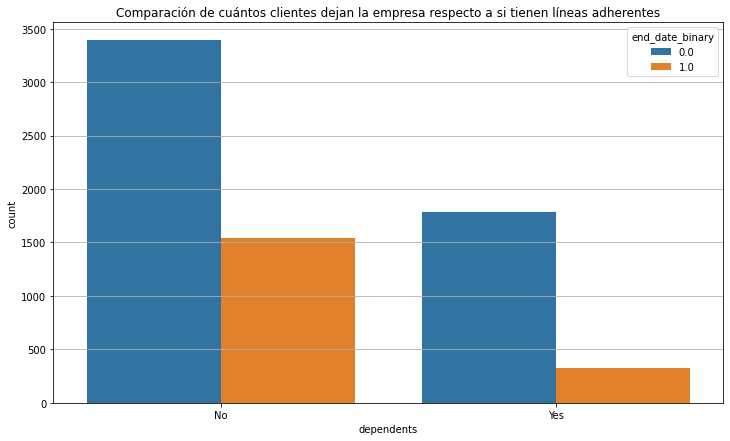

In [66]:
plt.figure(figsize=(12,7))
sns.countplot(data=eda_table, x='dependents', hue='end_date_binary')
plt.xticks([0, 1], ['No','Yes'])
plt.title('Comparación de cuántos clientes dejan la empresa respecto a si tienen líneas adherentes')
plt.grid(axis='y')

Aunque son notoriamente menos, también vemos lo mismo de clientes que tienen lineas dependientes a las suyas.

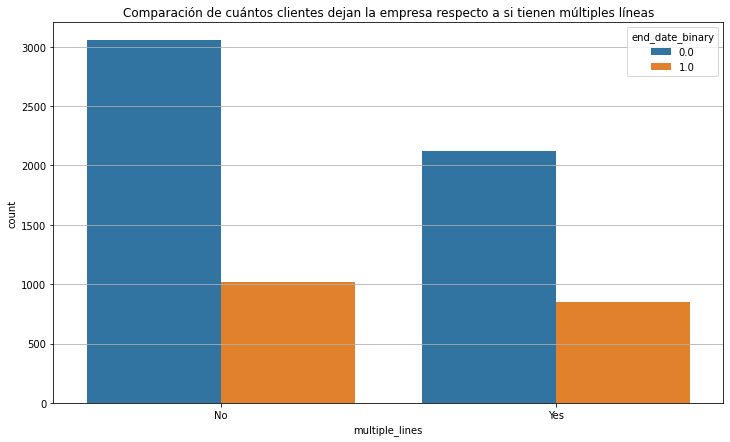

In [67]:
plt.figure(figsize=(12,7))
sns.countplot(data=eda_table, x='multiple_lines', hue='end_date_binary')
plt.xticks([0, 1], ['No','Yes'])
plt.title('Comparación de cuántos clientes dejan la empresa respecto a si tienen múltiples líneas')
plt.grid(axis='y')

Por más que tengan casi la misma cantidad de valores que dejaron, **no** tener múltiples líneas parece tener un mejor efecto en los clientes. Acaso con más lineas se hacen más evidentes los problemas?

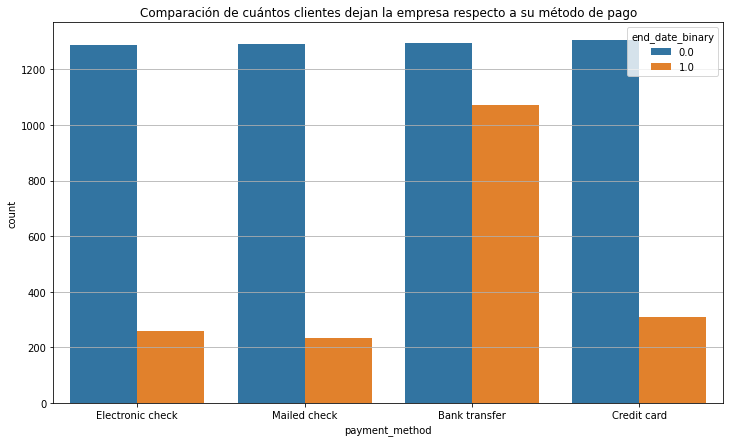

In [68]:
plt.figure(figsize=(12,7))
sns.countplot(data=eda_table, x='payment_method', hue='end_date_binary')
plt.xticks([0, 1, 2, 3], ['Electronic check','Mailed check','Bank transfer','Credit card'])
plt.title('Comparación de cuántos clientes dejan la empresa respecto a su método de pago')
plt.grid(axis='y')

En el caso de `payment_method` podemos ver algo muy interesante, el método elegido por el cliente tiene mucha incidencia en si éste puede dejar la empresa o no. Por lo que vemos si alguien paga mediante cheques electrónicos nos enfrentamos a un cliente que potencialmente deje la empresa. Lo que me sorprende es que los cheques físicos presentan una distribución más similar a los métodos automáticos que al cheque electrónico. Mi hipótesis es que si alguien paga con cheques físicos, posiblemente contrate el servicio no para el hogar sino para una empresa propia o algo similar y el cheque no lo envíe el titular sino su contador o alguien encargado de los pagos. Mientras tanto es muy sabido que con los métodos automáticos es común que alguien se olvide de cancelar su subscripción y eso se refleja en el gráfico perfectamente.
  
El resto de las columnas no me llaman la atención lo suficiente como para realizar un análisis muy profundo, pasemos entonces a una etapa más crucial de nuestro trabajo!
## <a id='toc2_3_'></a>[Adaptación de Datos para Machine Learning](#toc0_)
### <a id='toc2_3_1_'></a>[Selección de Características](#toc0_)

In [69]:
# Veamos de vuelta cuales son las columnas de nuestros datos
full_table.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'end_date_binary',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

In [70]:
# Primero vamos a eliminar las columnas que claramente no van a tener correlación o no sirven de parámetro
feat_select_df = full_table.drop(columns=['customer_id','end_date','begin_date'])

In [71]:
# Ahora veamos con chi2 la correlación entre las columnas categóricas y el target
chi_func = chi2(feat_select_df.drop(columns=['end_date_binary','total_charges','monthly_charges']), feat_select_df['end_date_binary'])
chi_2 = chi_func[0]
chi_p_values = chi_func[1]

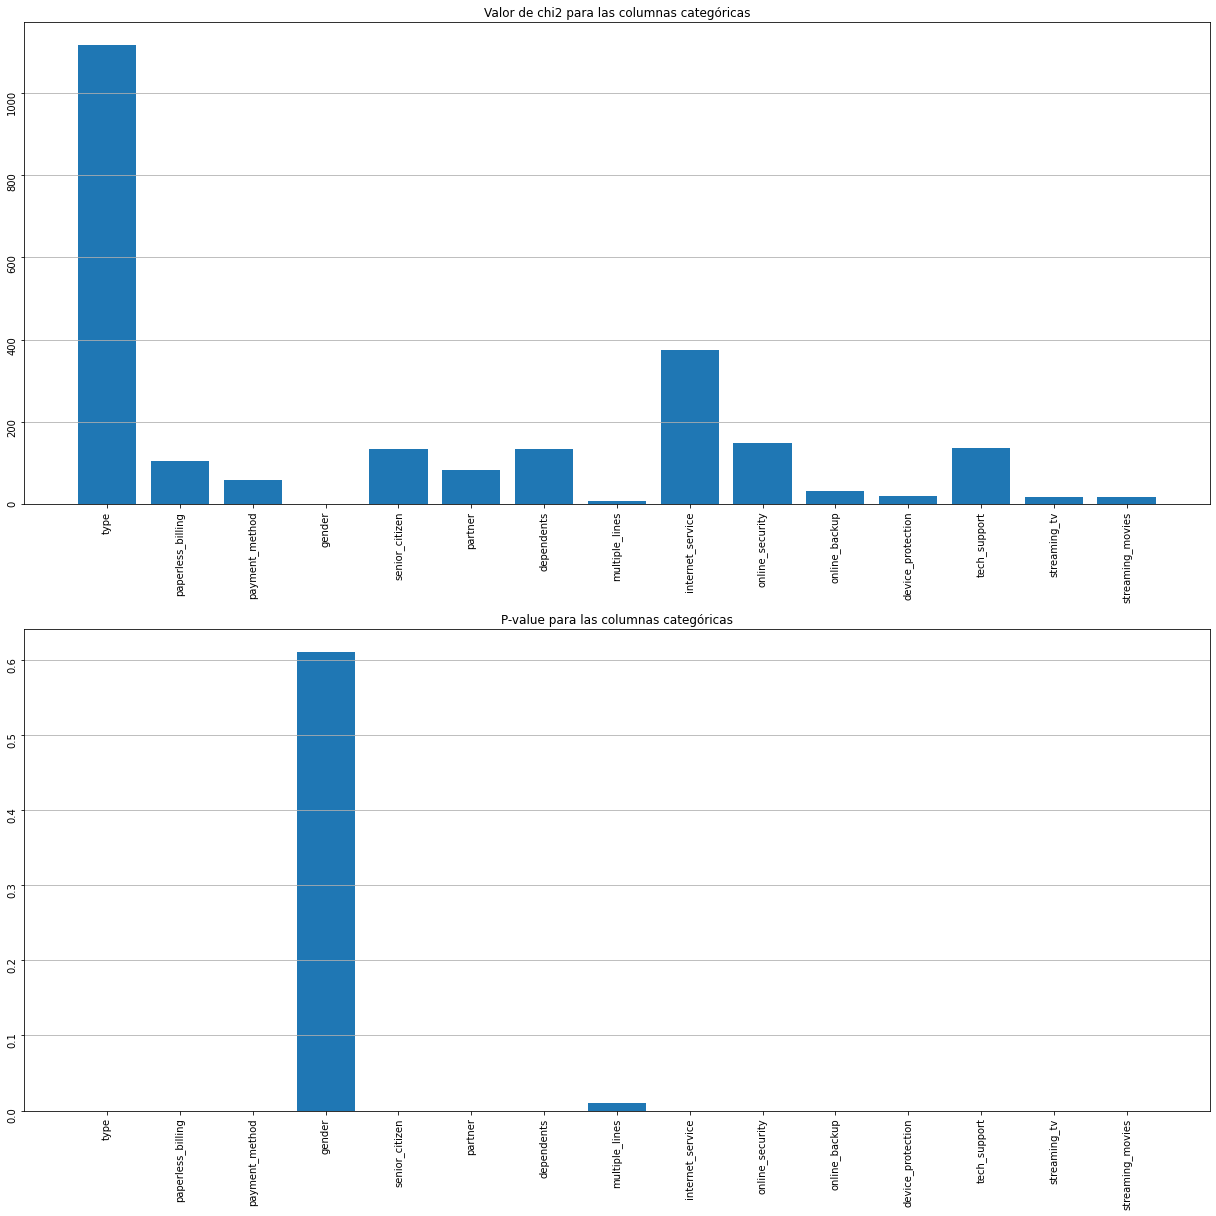

array([1.22794132e-244, 8.66198711e-025, 2.04093269e-014, 6.11015635e-001,
       4.57695863e-031, 1.10476396e-019, 8.87672856e-031, 1.04971937e-002,
       1.98426029e-083, 6.76169598e-034, 2.30654124e-008, 6.87875040e-006,
       2.49054941e-031, 3.13488073e-005, 5.57288653e-005])

In [72]:
# Ahora graficamos
fig, ax = plt.subplots(2, 1)
fig.set_figwidth(17)
fig.set_figheight(17)

ax[0].bar(feat_select_df.drop(columns=['end_date_binary','total_charges','monthly_charges']).columns, height=chi_2)
ax[0].tick_params(labelrotation=90)
ax[0].set_title('Valor de chi2 para las columnas categóricas')
ax[0].grid(axis='y')

ax[1].bar(feat_select_df.drop(columns=['end_date_binary','total_charges','monthly_charges']).columns, height=chi_p_values)
ax[1].tick_params(labelrotation=90)
ax[1].set_title('P-value para las columnas categóricas')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Imprimimos los p-values para dar una dimensión de la situación
chi_p_values

Como podemos ver, entre las dos tablas se hace más que evidente que la columna `gender` no influencia mucho a nuestro objetivo seguido por `multiple_lines`. Eso se refleja tanto en el _chi2_ como en el _p-value_. De todas formas, menos mal que graficamos el p-value ya que sólo con el gráfico de _chi2_ uno pensaría que otras columnas caen en el mismo lugar.
  
Ahora vamos a realizar una prueba basada en ANOVA para analizar el impacto de `monthly_charges` y `total_charges`.

In [73]:
anova = f_classif(feat_select_df[['monthly_charges','total_charges']], feat_select_df['end_date_binary'])
f_statistic = anova[0]
anova_p_values = anova[1]

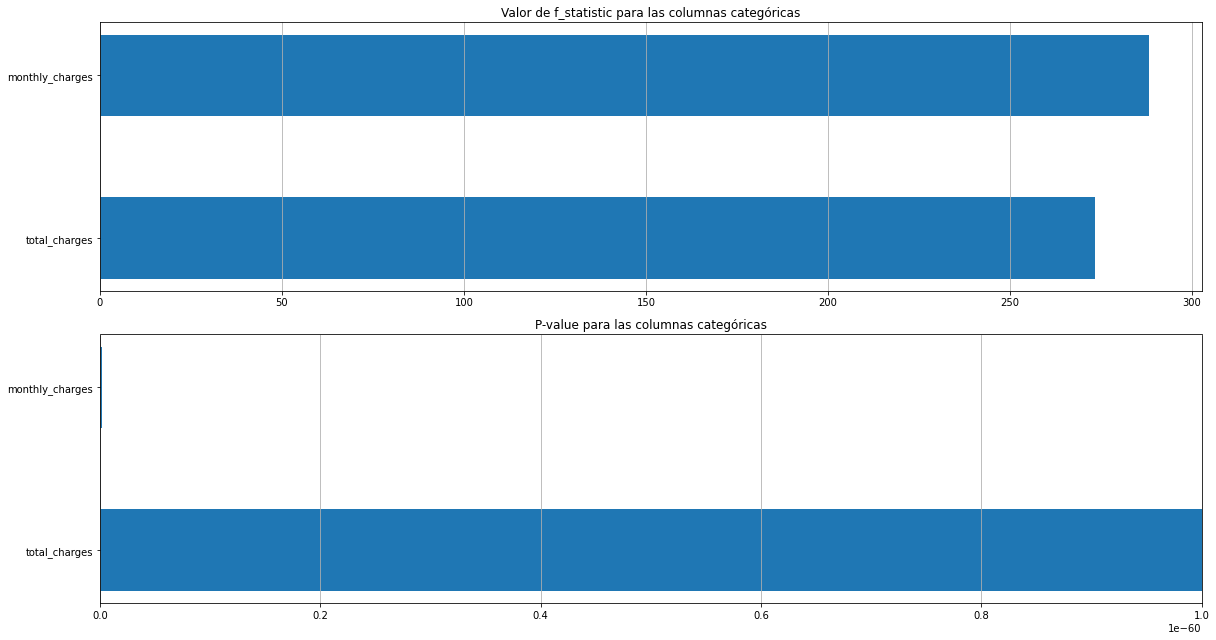

array([2.70664561e-60, 2.12721161e-63])

In [74]:
# Y graficamos
fig, ax = plt.subplots(2, 1)
fig.set_figwidth(17)
fig.set_figheight(9)

ax[0].barh(['total_charges','monthly_charges'], width=f_statistic, height=0.5)
ax[0].set_title('Valor de f_statistic para las columnas categóricas')
ax[0].grid(axis='x')

ax[1].barh(['total_charges','monthly_charges'], width=anova_p_values, height=0.5)
ax[1].set_xlim(1e-100,1e-60)
ax[1].set_title('P-value para las columnas categóricas')
ax[1].grid(axis='x')

plt.tight_layout()
plt.show()

# Imprimimos los p-values para dar una dimensión de la situación
anova_p_values

Al parecer las dos columnas numéricas (aunque una tiene un p-value 1000 veces mayor) que tenemos juegan un rol importante en determinar si el cliente va a dejar la compañia o no. Lo cual... tiene bastante sentido... pero ahora tenemos gráficos que apoyan eso!
  
Ahora vamos a entrenar un pequeño modelo LASSO para ver que nos dice él de las features.

In [75]:
# Inicializamos el modelo
lasso = Lasso()

# Cargamos los parámetros para el modelo
params = {"alpha":np.arange(0.0001, 0.5, 0.02)}

# Cargamos el RandomSearch y lo entrenamos
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=5)
lasso_cv.fit(feat_select_df.drop(columns=['gender','multiple_lines','end_date_binary']).values,
             feat_select_df['end_date_binary'].values)

# Finalmente veamos el mejor alpha
print("Mejor alpha {}".format(lasso_cv.best_params_))

Mejor alpha {'alpha': 0.0001}


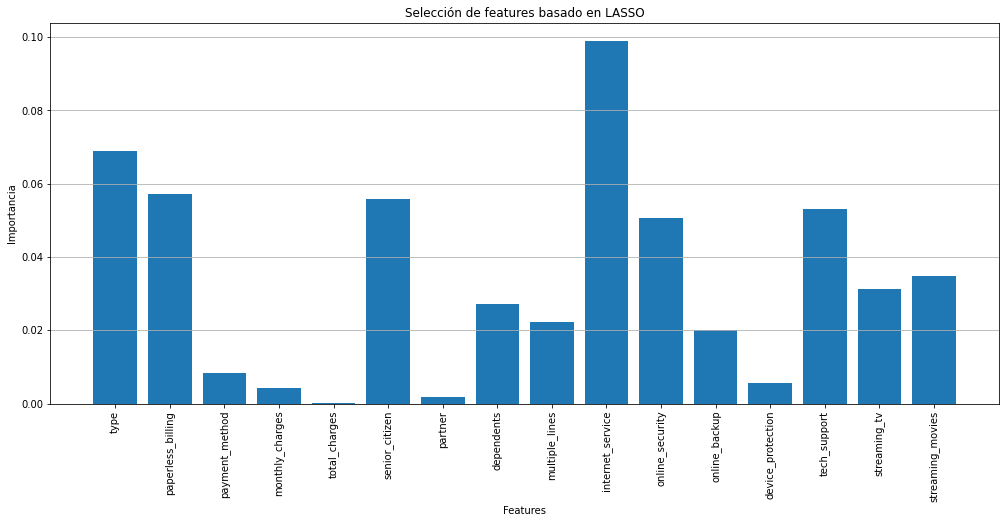

In [76]:
# Cargamos el modelo con el mejor parámetros y sin gender que ya fue claramente descartada
lasso1 = Lasso(alpha=0.0001)
lasso1.fit(feat_select_df.drop(columns=['gender','end_date_binary']).values,
           feat_select_df['end_date_binary'].values)

# Transformamos todos los coeficientes en positivos
lasso1_coef = np.abs(lasso1.coef_)

# Y gráficamos la importancia de las diferentes columnas 
plt.figure(figsize=(17,7))
plt.bar(feat_select_df.drop(columns=['gender','end_date_binary']).columns, lasso1_coef)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title("Selección de features basado en LASSO")
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.show()

Al parecer a LASSO no le gustaron mucho las características numéricas. Seguramente el problema sea en que el modelo es naturalmente matemático y no "sabe" que el resto de las columnas son categóricas por lo que sólo las ve como números con una relación ordinal. Por lo tanto al comparar algo que puede tomar como mucho 4 valores discretos mientras que en la otra mano hay un rango continuo; es evidente que la función va a adjudicar mayor valor a la característica discreta.
  
Por lo tanto vamos a decidirnos entonces por qué features vamos a eliminar:
- `customer_id`: realmente no requiere mucha explicación
- `begin_date`: no me parece una buena idea introducir una serie temporal ya que eso nos obligaría a **no** mezclar al separar los datos
- `end_date`: básicamente es nuestro target.
- `end_date_binary`: es nuestro target!
- `gender`: desde el EDA hasta los métodos de filtrado demostraron que no es información relevante
- `multiple_lines`: el método de chi2 descarta también a ésta característica y no alcanzó una importancia suficiente en LASSO como para compensar lo anterior
- `partner`: similar a `multiple_lines` pero al revés, con una importancia extremadamente baja en LASSO y valores por debajo de la mayoría en el método chi2 me veo obligado a dejarlo de lado
- `device_protection`: una situación muy similar a las dos características anteriores
  
Hay algunas columnas que me tienta eliminar pero demostraron relevancia ya sea porque presentaron un p-value muy bajo y un chi2 suficiente (`partner`) o porque LASSO las ubicó con una relevancia aceptable(`streaming_tv/movies`).

In [77]:
# Guardamos entonces las columnas "ganadoras"
selected_features = full_table.drop(columns=['customer_id', 'begin_date', 'end_date', 'end_date_binary',
                                             'gender', 'multiple_lines', 'partner', 'device_protection']).columns
selected_features

Index(['type', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'senior_citizen', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

### <a id='toc2_3_2_'></a>[Separación de Datos](#toc0_)
Ahora vamos a realizar una separación de los datos en una proporción 80:20 ya que como nuestros datos no son muy grandes vamos a buscar proveer a los modelos con la mayor cantidad de información para su entrenamiento.
 
#### <a id='toc2_3_2_1_'></a>[Datos sin selección de características](#toc0_)

In [78]:
# Primero definimos las features y los índices de las columnas categóricas para CatBoost
features = full_table.drop(columns=['customer_id', 'begin_date', 'end_date_binary','end_date','gender'])
cat_index = [0,1,2,5,6,7,8,9,10,11,12,13,14,15]

# Tampoco nos olvidemos de definir el target
target = full_table['end_date_binary'].astype(int)

In [79]:
features_train, features_aux, target_train, target_aux = train_test_split(
    features, target, test_size=0.2, random_state= 37)

In [80]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_aux, target_aux, test_size=0.5, random_state= 37)

In [81]:
# Veamos entonces el tamaño de los datos que tenemos
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(5634, 16)
(704, 16)
(705, 16)


#### <a id='toc2_3_2_2_'></a>[Datos con selección de características](#toc0_)
Vamos a agregar `_s` a las variables por *selected*

In [82]:
# Primero definimos las features y los índices de las columnas categóricas para CatBoost
features_s = full_table[selected_features]
cat_index_s = [0,1,2,5,6,7,8,9,10,11,12]

# Tampoco nos olvidemos de definir el target
target_s = full_table['end_date_binary'].astype(int)

In [83]:
features_train_s, features_aux_s, target_train_s, target_aux_s = train_test_split(
    features_s, target_s, test_size=0.2, random_state= 37)

In [84]:
features_valid_s, features_test_s, target_valid_s, target_test_s = train_test_split(
    features_aux_s, target_aux_s, test_size=0.5, random_state= 37)

In [85]:
# Veamos entonces el tamaño de los datos que tenemos
print(features_train_s.shape)
print(features_valid_s.shape)
print(features_test_s.shape)

(5634, 13)
(704, 13)
(705, 13)


## <a id='toc2_4_'></a>[Modelos sin selección de características](#toc0_)
Para éste proyecto vamos a utilizar 3 modelos que no son sorpresa ya que se los ve en la inicialización con la carga de librerías. 
- LightGBM
- CatBoost

In [86]:
# Y agregamos una función que nos evalúe el modelo
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Exactitud'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    return df_eval_stats

In [87]:
# Creamos una funcion para obtener las feature_importances_ de un modelo
def get_feat_imp_dict(model, features_train):
    feat_imp_dict = {} 
    for column, f_i in zip(features_train.columns.values, model.feature_importances_):
        feat_imp_dict[column] = f_i

    return feat_imp_dict

In [88]:
# Creamos una funcion para obtener las 2 features con menor importancia 
def get_lowest_keys(dictionary):
    lowest_features = []
    for i in range(0,2):

        if min(dictionary, key=dictionary.get) in lowest_features:
            dictionary.pop(min(dictionary, key=dictionary.get))

        lowest_features.append(min(dictionary, key=dictionary.get))

    return lowest_features

### <a id='toc2_4_1_'></a>[LightGBM](#toc0_)

In [89]:
%%time
# Ahora replicaremos RandomSearch ya que los datos categóricos complican la situación al usar GBM y RandomSearchCV de sklearn
# Aparte así podemos establecer el eval_set y sacarle todo el jugo al boosting
maximum = 0 
iterations = 75
threshold = 0
for i in range(iterations):
    # Creamos aleatoriamente los parámetros y cargamos con valores aleatorios dentro de los rangos deseados
    params = {}
    params['boosting_type'] = np.random.choice(['gbdt','dart'])
    params['num_leaves'] = np.random.randint(30,750)
    params['max_depth'] = np.random.randint(5,10)
    params['learning_rate'] = np.random.uniform(0.05,0.56)
    params['min_child_samples'] = np.random.randint(30,75)
    params['colsample_bytree'] = np.random.uniform(0.1,1)
    params['early_stopping_round'] = 75
    params['max_bin'] = 128
    params['lambda_l1'] = np.random.uniform(0.01,0.36)
    
    # De ahi entrenamos el modelo y obtenemos sus predicciones
    gbm_model = LGBMClassifier(**params)
    gbm_model.fit(features_train, target_train, 
            feature_name='auto', categorical_feature='auto',
            eval_set=[(features_valid, target_valid)], eval_metric='auc')
    
    # Obtenemos las probabilidades de las predicciones
    target_test_prob_pred = gbm_model.predict_proba(features_valid)
    
    # Finalmente observamos el AUC-ROC en diferentes thresholds
    threshold = 0
    for threshold in np.arange(0.1,0.9,0.05):
        target_test_pred = (target_test_prob_pred[:, 1] >= threshold).astype(int)
        auc = metrics.roc_auc_score(target_valid, target_test_pred)
        train_auc = metrics.roc_auc_score(target_valid, target_test_pred)
        
    
        # Y guardamos los datos si vimos un modelo mejor que el que teníamos
        if auc > maximum:
            maximum = auc
            pp = params
            tr_auc = train_auc
            best_threshold = threshold
        
print("*" * 70)
print('AUC máximo obtenido es:', maximum)
print('AUC de entrenamiento máximo obtenido es:', tr_auc)
print('Con los parámetros:', pp)
print('Y el threshold', "{:.2f}".format(best_threshold))
print("*" * 70)

[LightGBM] [Warning] lambda_l1 is set=0.07543287222980997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07543287222980997
[1]	valid_0's auc: 0.784375	valid_0's binary_logloss: 0.535808
[2]	valid_0's auc: 0.812747	valid_0's binary_logloss: 0.496669
[3]	valid_0's auc: 0.820453	valid_0's binary_logloss: 0.479897
[4]	valid_0's auc: 0.831751	valid_0's binary_logloss: 0.458546
[5]	valid_0's auc: 0.831886	valid_0's binary_logloss: 0.454688
[6]	valid_0's auc: 0.830189	valid_0's binary_logloss: 0.452827
[7]	valid_0's auc: 0.831961	valid_0's binary_logloss: 0.447887
[8]	valid_0's auc: 0.831761	valid_0's binary_logloss: 0.451257
[9]	valid_0's auc: 0.833728	valid_0's binary_logloss: 0.447069
[10]	valid_0's auc: 0.831292	valid_0's binary_logloss: 0.446672
[11]	valid_0's auc: 0.834012	valid_0's binary_logloss: 0.439994
[12]	valid_0's auc: 0.833852	valid_0's binary_logloss: 0.441052
[13]	valid_0's auc: 0.835519	valid_0's binary_logloss: 0.436878
[14]	valid_0's auc: 0.834636	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[39]	valid_0's auc: 0.839372	valid_0's binary_logloss: 0.430882
[40]	valid_0's auc: 0.839801	valid_0's binary_logloss: 0.430586
[41]	valid_0's auc: 0.839791	valid_0's binary_logloss: 0.430499
[42]	valid_0's auc: 0.839152	valid_0's binary_logloss: 0.431433
[43]	valid_0's auc: 0.839282	valid_0's binary_logloss: 0.431214
[44]	valid_0's auc: 0.838913	valid_0's binary_logloss: 0.431279
[45]	valid_0's auc: 0.840071	valid_0's binary_logloss: 0.430723
[46]	valid_0's auc: 0.84034	valid_0's binary_logloss: 0.429456
[47]	valid_0's auc: 0.841238	valid_0's binary_logloss: 0.428743
[48]	valid_0's auc: 0.840061	valid_0's binary_logloss: 0.429746
[49]	valid_0's auc: 0.839452	valid_0's binary_logloss: 0.430393
[50]	valid_0's auc: 0.838973	valid_0's binary_logloss: 0.430806
[51]	valid_0's auc: 0.838893	valid_0's binary_logloss: 0.430623
[52]	valid_0's auc: 0.838204	valid_0's binary_logloss: 0.431741
[53]	valid_0's auc: 0.838094	valid_0's binary_logloss: 0.432097
[54]	valid_0's auc: 0.837346	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')



[24]	valid_0's auc: 0.835744	valid_0's binary_logloss: 0.459014
[25]	valid_0's auc: 0.834476	valid_0's binary_logloss: 0.460655
[26]	valid_0's auc: 0.834806	valid_0's binary_logloss: 0.460379
[27]	valid_0's auc: 0.835574	valid_0's binary_logloss: 0.459923
[28]	valid_0's auc: 0.835854	valid_0's binary_logloss: 0.461061
[29]	valid_0's auc: 0.836103	valid_0's binary_logloss: 0.460922
[30]	valid_0's auc: 0.836642	valid_0's binary_logloss: 0.459677
[31]	valid_0's auc: 0.836952	valid_0's binary_logloss: 0.461
[32]	valid_0's auc: 0.837321	valid_0's binary_logloss: 0.459867
[33]	valid_0's auc: 0.836702	valid_0's binary_logloss: 0.461133
[34]	valid_0's auc: 0.835285	valid_0's binary_logloss: 0.46495
[35]	valid_0's auc: 0.834746	valid_0's binary_logloss: 0.46698
[36]	valid_0's auc: 0.834596	valid_0's binary_logloss: 0.467161
[37]	valid_0's auc: 0.835175	valid_0's binary_logloss: 0.468002
[38]	valid_0's auc: 0.835095	valid_0's binary_logloss: 0.467474
[39]	valid_0's auc: 0.834297	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[22]	valid_0's auc: 0.842316	valid_0's binary_logloss: 0.433359
[23]	valid_0's auc: 0.842416	valid_0's binary_logloss: 0.43289
[24]	valid_0's auc: 0.842122	valid_0's binary_logloss: 0.432964
[25]	valid_0's auc: 0.842471	valid_0's binary_logloss: 0.432676
[26]	valid_0's auc: 0.841583	valid_0's binary_logloss: 0.433366
[27]	valid_0's auc: 0.841413	valid_0's binary_logloss: 0.433378
[28]	valid_0's auc: 0.841473	valid_0's binary_logloss: 0.433024
[29]	valid_0's auc: 0.840734	valid_0's binary_logloss: 0.433489
[30]	valid_0's auc: 0.840714	valid_0's binary_logloss: 0.433917
[31]	valid_0's auc: 0.841024	valid_0's binary_logloss: 0.433516
[32]	valid_0's auc: 0.841164	valid_0's binary_logloss: 0.433556
[33]	valid_0's auc: 0.840704	valid_0's binary_logloss: 0.434016
[34]	valid_0's auc: 0.84057	valid_0's binary_logloss: 0.434381
[35]	valid_0's auc: 0.840405	valid_0's binary_logloss: 0.434234
[36]	valid_0's auc: 0.840475	valid_0's binary_logloss: 0.433952
[37]	valid_0's auc: 0.840305	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[25]	valid_0's auc: 0.844522	valid_0's binary_logloss: 0.42619
[26]	valid_0's auc: 0.845031	valid_0's binary_logloss: 0.425826
[27]	valid_0's auc: 0.843359	valid_0's binary_logloss: 0.426873
[28]	valid_0's auc: 0.8429	valid_0's binary_logloss: 0.427808
[29]	valid_0's auc: 0.84325	valid_0's binary_logloss: 0.427509
[30]	valid_0's auc: 0.843998	valid_0's binary_logloss: 0.426069
[31]	valid_0's auc: 0.844747	valid_0's binary_logloss: 0.425552
[32]	valid_0's auc: 0.844807	valid_0's binary_logloss: 0.425636
[33]	valid_0's auc: 0.845141	valid_0's binary_logloss: 0.425159
[34]	valid_0's auc: 0.845161	valid_0's binary_logloss: 0.425066
[35]	valid_0's auc: 0.844422	valid_0's binary_logloss: 0.425889
[36]	valid_0's auc: 0.844153	valid_0's binary_logloss: 0.426764
[37]	valid_0's auc: 0.846149	valid_0's binary_logloss: 0.424417
[38]	valid_0's auc: 0.846069	valid_0's binary_logloss: 0.424378
[39]	valid_0's auc: 0.846219	valid_0's binary_logloss: 0.424369
[40]	valid_0's auc: 0.846828	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[35]	valid_0's auc: 0.836777	valid_0's binary_logloss: 0.439273
[36]	valid_0's auc: 0.836707	valid_0's binary_logloss: 0.43929
[37]	valid_0's auc: 0.837026	valid_0's binary_logloss: 0.438911
[38]	valid_0's auc: 0.837036	valid_0's binary_logloss: 0.438752
[39]	valid_0's auc: 0.836897	valid_0's binary_logloss: 0.439086
[40]	valid_0's auc: 0.837136	valid_0's binary_logloss: 0.438795
[41]	valid_0's auc: 0.836777	valid_0's binary_logloss: 0.438984
[42]	valid_0's auc: 0.836837	valid_0's binary_logloss: 0.439098
[43]	valid_0's auc: 0.837356	valid_0's binary_logloss: 0.438865
[44]	valid_0's auc: 0.837755	valid_0's binary_logloss: 0.438733
[45]	valid_0's auc: 0.837156	valid_0's binary_logloss: 0.439363
[46]	valid_0's auc: 0.836358	valid_0's binary_logloss: 0.44067
[47]	valid_0's auc: 0.836527	valid_0's binary_logloss: 0.440364
[48]	valid_0's auc: 0.836727	valid_0's binary_logloss: 0.440625
[49]	valid_0's auc: 0.836907	valid_0's binary_logloss: 0.441076
[50]	valid_0's auc: 0.836996	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[28]	valid_0's auc: 0.841074	valid_0's binary_logloss: 0.433661
[29]	valid_0's auc: 0.840445	valid_0's binary_logloss: 0.43446
[30]	valid_0's auc: 0.839018	valid_0's binary_logloss: 0.435942
[31]	valid_0's auc: 0.839078	valid_0's binary_logloss: 0.435394
[32]	valid_0's auc: 0.838848	valid_0's binary_logloss: 0.435981
[33]	valid_0's auc: 0.840066	valid_0's binary_logloss: 0.435575
[34]	valid_0's auc: 0.840076	valid_0's binary_logloss: 0.436215
[35]	valid_0's auc: 0.840405	valid_0's binary_logloss: 0.435526
[36]	valid_0's auc: 0.840854	valid_0's binary_logloss: 0.434145
[37]	valid_0's auc: 0.840714	valid_0's binary_logloss: 0.434228
[38]	valid_0's auc: 0.839926	valid_0's binary_logloss: 0.435184
[39]	valid_0's auc: 0.840036	valid_0's binary_logloss: 0.435672
[40]	valid_0's auc: 0.839287	valid_0's binary_logloss: 0.435925
[41]	valid_0's auc: 0.839487	valid_0's binary_logloss: 0.435436
[42]	valid_0's auc: 0.839028	valid_0's binary_logloss: 0.436753
[43]	valid_0's auc: 0.839297	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[3]	valid_0's auc: 0.844737	valid_0's binary_logloss: 0.507742
[4]	valid_0's auc: 0.845965	valid_0's binary_logloss: 0.491069
[5]	valid_0's auc: 0.847292	valid_0's binary_logloss: 0.47715
[6]	valid_0's auc: 0.845341	valid_0's binary_logloss: 0.468646
[7]	valid_0's auc: 0.847991	valid_0's binary_logloss: 0.459721
[8]	valid_0's auc: 0.848455	valid_0's binary_logloss: 0.452894
[9]	valid_0's auc: 0.846399	valid_0's binary_logloss: 0.448059
[10]	valid_0's auc: 0.847287	valid_0's binary_logloss: 0.443122
[11]	valid_0's auc: 0.848864	valid_0's binary_logloss: 0.438444
[12]	valid_0's auc: 0.847956	valid_0's binary_logloss: 0.436154
[13]	valid_0's auc: 0.846938	valid_0's binary_logloss: 0.43464
[14]	valid_0's auc: 0.848071	valid_0's binary_logloss: 0.432011
[15]	valid_0's auc: 0.84826	valid_0's binary_logloss: 0.43037
[16]	valid_0's auc: 0.847891	valid_0's binary_logloss: 0.429294
[17]	valid_0's auc: 0.848081	valid_0's binary_logloss: 0.42847
[18]	valid_0's auc: 0.847362	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[32]	valid_0's auc: 0.842097	valid_0's binary_logloss: 0.42975
[33]	valid_0's auc: 0.841518	valid_0's binary_logloss: 0.430611
[34]	valid_0's auc: 0.841408	valid_0's binary_logloss: 0.430988
[35]	valid_0's auc: 0.842935	valid_0's binary_logloss: 0.429876
[36]	valid_0's auc: 0.842885	valid_0's binary_logloss: 0.429288
[37]	valid_0's auc: 0.843374	valid_0's binary_logloss: 0.428776
[38]	valid_0's auc: 0.843624	valid_0's binary_logloss: 0.428795
[39]	valid_0's auc: 0.843135	valid_0's binary_logloss: 0.428874
[40]	valid_0's auc: 0.843474	valid_0's binary_logloss: 0.428296
[41]	valid_0's auc: 0.843854	valid_0's binary_logloss: 0.427636
[42]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.42778
[43]	valid_0's auc: 0.844113	valid_0's binary_logloss: 0.4272
[44]	valid_0's auc: 0.843444	valid_0's binary_logloss: 0.427903
[45]	valid_0's auc: 0.840749	valid_0's binary_logloss: 0.431072
[46]	valid_0's auc: 0.840151	valid_0's binary_logloss: 0.429852
[47]	valid_0's auc: 0.84036	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.823003	valid_0's binary_logloss: 0.493468
[2]	valid_0's auc: 0.826212	valid_0's binary_logloss: 0.463206
[3]	valid_0's auc: 0.841084	valid_0's binary_logloss: 0.441227
[4]	valid_0's auc: 0.844068	valid_0's binary_logloss: 0.433439
[5]	valid_0's auc: 0.844268	valid_0's binary_logloss: 0.430113
[6]	valid_0's auc: 0.838444	valid_0's binary_logloss: 0.436415
[7]	valid_0's auc: 0.836163	valid_0's binary_logloss: 0.438382
[8]	valid_0's auc: 0.836308	valid_0's binary_logloss: 0.438715
[9]	valid_0's auc: 0.835904	valid_0's binary_logloss: 0.439267
[10]	valid_0's auc: 0.833313	valid_0's binary_logloss: 0.442679
[11]	valid_0's auc: 0.834551	valid_0's binary_logloss: 0.442323
[12]	valid_0's auc: 0.833174	valid_0's binary_logloss: 0.444138
[13]	valid_0's auc: 0.833139	valid_0's binary_logloss: 0.445424
[14]	valid_0's auc: 0.832869	valid_0's binary_logloss: 0.446504
[15]	valid_0's auc: 0.833897	valid_0's binary_logloss: 0.445888
[16]	valid_0's auc: 0.831612	valid_0's binary_log

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[26]	valid_0's auc: 0.829126	valid_0's binary_logloss: 0.46556
[27]	valid_0's auc: 0.829545	valid_0's binary_logloss: 0.464926
[28]	valid_0's auc: 0.828897	valid_0's binary_logloss: 0.464905
[29]	valid_0's auc: 0.829316	valid_0's binary_logloss: 0.464859
[30]	valid_0's auc: 0.826751	valid_0's binary_logloss: 0.469705
[31]	valid_0's auc: 0.827769	valid_0's binary_logloss: 0.467589
[32]	valid_0's auc: 0.825343	valid_0's binary_logloss: 0.473112
[33]	valid_0's auc: 0.825124	valid_0's binary_logloss: 0.474019
[34]	valid_0's auc: 0.823487	valid_0's binary_logloss: 0.476644
[35]	valid_0's auc: 0.824106	valid_0's binary_logloss: 0.475026
[36]	valid_0's auc: 0.824385	valid_0's binary_logloss: 0.472697
[37]	valid_0's auc: 0.824205	valid_0's binary_logloss: 0.473862
[38]	valid_0's auc: 0.822888	valid_0's binary_logloss: 0.476925
[39]	valid_0's auc: 0.822569	valid_0's binary_logloss: 0.478438
[40]	valid_0's auc: 0.822549	valid_0's binary_logloss: 0.477284
[41]	valid_0's auc: 0.823367	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.823811	valid_0's binary_logloss: 0.490297
[2]	valid_0's auc: 0.816161	valid_0's binary_logloss: 0.472887
[3]	valid_0's auc: 0.836028	valid_0's binary_logloss: 0.448252
[4]	valid_0's auc: 0.838129	valid_0's binary_logloss: 0.439412
[5]	valid_0's auc: 0.838653	valid_0's binary_logloss: 0.435451
[6]	valid_0's auc: 0.839217	valid_0's binary_logloss: 0.434928
[7]	valid_0's auc: 0.840849	valid_0's binary_logloss: 0.432314
[8]	valid_0's auc: 0.839272	valid_0's binary_logloss: 0.434282
[9]	valid_0's auc: 0.838479	valid_0's binary_logloss: 0.435477
[10]	valid_0's auc: 0.837326	valid_0's binary_logloss: 0.436325
[11]	valid_0's auc: 0.836827	valid_0's binary_logloss: 0.437631
[12]	valid_0's auc: 0.833643	valid_0's binary_logloss: 0.442352
[13]	valid_0's auc: 0.83254	valid_0's binary_logloss: 0.444033
[14]	valid_0's auc: 0.830793	valid_0's binary_logloss: 0.446972
[15]	valid_0's auc: 0.831701	valid_0's binary_logloss: 0.446943
[16]	valid_0's auc: 0.83238	valid_0's binary_loglo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[46]	valid_0's auc: 0.84318	valid_0's binary_logloss: 0.426127
[47]	valid_0's auc: 0.842591	valid_0's binary_logloss: 0.426492
[48]	valid_0's auc: 0.842521	valid_0's binary_logloss: 0.427031
[49]	valid_0's auc: 0.84284	valid_0's binary_logloss: 0.426816
[50]	valid_0's auc: 0.842661	valid_0's binary_logloss: 0.426908
[51]	valid_0's auc: 0.842421	valid_0's binary_logloss: 0.427075
[52]	valid_0's auc: 0.842431	valid_0's binary_logloss: 0.427044
[53]	valid_0's auc: 0.842621	valid_0's binary_logloss: 0.42721
[54]	valid_0's auc: 0.841917	valid_0's binary_logloss: 0.427892
[55]	valid_0's auc: 0.842825	valid_0's binary_logloss: 0.427181
[56]	valid_0's auc: 0.842766	valid_0's binary_logloss: 0.427162
[57]	valid_0's auc: 0.843055	valid_0's binary_logloss: 0.426949
[58]	valid_0's auc: 0.843474	valid_0's binary_logloss: 0.427107
[59]	valid_0's auc: 0.843484	valid_0's binary_logloss: 0.427051
[60]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.427642
[61]	valid_0's auc: 0.842207	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.773675	valid_0's binary_logloss: 0.551798
[2]	valid_0's auc: 0.805301	valid_0's binary_logloss: 0.51708
[3]	valid_0's auc: 0.818252	valid_0's binary_logloss: 0.497808
[4]	valid_0's auc: 0.831043	valid_0's binary_logloss: 0.47454
[5]	valid_0's auc: 0.831956	valid_0's binary_logloss: 0.469565
[6]	valid_0's auc: 0.829825	valid_0's binary_logloss: 0.466468
[7]	valid_0's auc: 0.833363	valid_0's binary_logloss: 0.459302
[8]	valid_0's auc: 0.831936	valid_0's binary_logloss: 0.455115
[9]	valid_0's auc: 0.833184	valid_0's binary_logloss: 0.451583
[10]	valid_0's auc: 0.831612	valid_0's binary_logloss: 0.450255
[11]	valid_0's auc: 0.836522	valid_0's binary_logloss: 0.441926
[12]	valid_0's auc: 0.83759	valid_0's binary_logloss: 0.439755
[13]	valid_0's auc: 0.838648	valid_0's binary_logloss: 0.436152
[14]	valid_0's auc: 0.836912	valid_0's binary_logloss: 0.437136
[15]	valid_0's auc: 0.839537	valid_0's binary_logloss: 0.432288
[16]	valid_0's auc: 0.839866	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.821211	valid_0's binary_logloss: 0.525432
[2]	valid_0's auc: 0.825867	valid_0's binary_logloss: 0.498947
[3]	valid_0's auc: 0.843679	valid_0's binary_logloss: 0.469813
[4]	valid_0's auc: 0.847582	valid_0's binary_logloss: 0.453112
[5]	valid_0's auc: 0.849523	valid_0's binary_logloss: 0.441797
[6]	valid_0's auc: 0.851893	valid_0's binary_logloss: 0.433761
[7]	valid_0's auc: 0.853096	valid_0's binary_logloss: 0.427433
[8]	valid_0's auc: 0.852951	valid_0's binary_logloss: 0.429524
[9]	valid_0's auc: 0.851524	valid_0's binary_logloss: 0.426336
[10]	valid_0's auc: 0.850461	valid_0's binary_logloss: 0.425066
[11]	valid_0's auc: 0.852447	valid_0's binary_logloss: 0.421619
[12]	valid_0's auc: 0.851943	valid_0's binary_logloss: 0.422935
[13]	valid_0's auc: 0.850391	valid_0's binary_logloss: 0.422771
[14]	valid_0's auc: 0.849358	valid_0's binary_logloss: 0.422256
[15]	valid_0's auc: 0.848974	valid_0's binary_logloss: 0.421864
[16]	valid_0's auc: 0.848205	valid_0's binary_log

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[19]	valid_0's auc: 0.839088	valid_0's binary_logloss: 0.431849
[20]	valid_0's auc: 0.838144	valid_0's binary_logloss: 0.432085
[21]	valid_0's auc: 0.839013	valid_0's binary_logloss: 0.431775
[22]	valid_0's auc: 0.838658	valid_0's binary_logloss: 0.431727
[23]	valid_0's auc: 0.838309	valid_0's binary_logloss: 0.432391
[24]	valid_0's auc: 0.838279	valid_0's binary_logloss: 0.432341
[25]	valid_0's auc: 0.838509	valid_0's binary_logloss: 0.432338
[26]	valid_0's auc: 0.838698	valid_0's binary_logloss: 0.432231
[27]	valid_0's auc: 0.838409	valid_0's binary_logloss: 0.432725
[28]	valid_0's auc: 0.837041	valid_0's binary_logloss: 0.433574
[29]	valid_0's auc: 0.838539	valid_0's binary_logloss: 0.432124
[30]	valid_0's auc: 0.838309	valid_0's binary_logloss: 0.432423
[31]	valid_0's auc: 0.838539	valid_0's binary_logloss: 0.432412
[32]	valid_0's auc: 0.83782	valid_0's binary_logloss: 0.433077
[33]	valid_0's auc: 0.839856	valid_0's binary_logloss: 0.431351
[34]	valid_0's auc: 0.840495	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[31]	valid_0's auc: 0.836632	valid_0's binary_logloss: 0.441703
[32]	valid_0's auc: 0.835494	valid_0's binary_logloss: 0.442261
[33]	valid_0's auc: 0.833768	valid_0's binary_logloss: 0.445045
[34]	valid_0's auc: 0.834416	valid_0's binary_logloss: 0.443982
[35]	valid_0's auc: 0.835335	valid_0's binary_logloss: 0.442868
[36]	valid_0's auc: 0.837081	valid_0's binary_logloss: 0.439988
[37]	valid_0's auc: 0.835714	valid_0's binary_logloss: 0.442657
[38]	valid_0's auc: 0.835295	valid_0's binary_logloss: 0.443667
[39]	valid_0's auc: 0.834796	valid_0's binary_logloss: 0.445182
[40]	valid_0's auc: 0.834177	valid_0's binary_logloss: 0.445738
[41]	valid_0's auc: 0.834217	valid_0's binary_logloss: 0.444892
[42]	valid_0's auc: 0.831113	valid_0's binary_logloss: 0.449915
[43]	valid_0's auc: 0.831701	valid_0's binary_logloss: 0.448793
[44]	valid_0's auc: 0.831572	valid_0's binary_logloss: 0.449218
[45]	valid_0's auc: 0.831651	valid_0's binary_logloss: 0.449848
[46]	valid_0's auc: 0.830683	valid_0's b

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[42]	valid_0's auc: 0.840744	valid_0's binary_logloss: 0.43199
[43]	valid_0's auc: 0.840924	valid_0's binary_logloss: 0.432018
[44]	valid_0's auc: 0.840934	valid_0's binary_logloss: 0.431315
[45]	valid_0's auc: 0.841223	valid_0's binary_logloss: 0.430912
[46]	valid_0's auc: 0.841223	valid_0's binary_logloss: 0.429413
[47]	valid_0's auc: 0.841443	valid_0's binary_logloss: 0.42892
[48]	valid_0's auc: 0.841293	valid_0's binary_logloss: 0.429288
[49]	valid_0's auc: 0.841523	valid_0's binary_logloss: 0.429151
[50]	valid_0's auc: 0.841563	valid_0's binary_logloss: 0.429327
[51]	valid_0's auc: 0.841723	valid_0's binary_logloss: 0.429542
[52]	valid_0's auc: 0.841283	valid_0's binary_logloss: 0.429887
[53]	valid_0's auc: 0.840984	valid_0's binary_logloss: 0.430228
[54]	valid_0's auc: 0.841523	valid_0's binary_logloss: 0.429214
[55]	valid_0's auc: 0.841363	valid_0's binary_logloss: 0.42955
[56]	valid_0's auc: 0.841134	valid_0's binary_logloss: 0.429664
[57]	valid_0's auc: 0.841852	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[28]	valid_0's auc: 0.830084	valid_0's binary_logloss: 0.455546
[29]	valid_0's auc: 0.830284	valid_0's binary_logloss: 0.455572
[30]	valid_0's auc: 0.830504	valid_0's binary_logloss: 0.455618
[31]	valid_0's auc: 0.830793	valid_0's binary_logloss: 0.455805
[32]	valid_0's auc: 0.829915	valid_0's binary_logloss: 0.456693
[33]	valid_0's auc: 0.830464	valid_0's binary_logloss: 0.456561
[34]	valid_0's auc: 0.830574	valid_0's binary_logloss: 0.457295
[35]	valid_0's auc: 0.830434	valid_0's binary_logloss: 0.458588
[36]	valid_0's auc: 0.829416	valid_0's binary_logloss: 0.460565
[37]	valid_0's auc: 0.829615	valid_0's binary_logloss: 0.461469
[38]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.462342
[39]	valid_0's auc: 0.828857	valid_0's binary_logloss: 0.463787
[40]	valid_0's auc: 0.829426	valid_0's binary_logloss: 0.463243
[41]	valid_0's auc: 0.829715	valid_0's binary_logloss: 0.464312
[42]	valid_0's auc: 0.829146	valid_0's binary_logloss: 0.465283
[43]	valid_0's auc: 0.828038	valid_0's b

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.822144	valid_0's binary_logloss: 0.481103
[2]	valid_0's auc: 0.835534	valid_0's binary_logloss: 0.449925
[3]	valid_0's auc: 0.836447	valid_0's binary_logloss: 0.440796
[4]	valid_0's auc: 0.83776	valid_0's binary_logloss: 0.436232
[5]	valid_0's auc: 0.84019	valid_0's binary_logloss: 0.432283
[6]	valid_0's auc: 0.839527	valid_0's binary_logloss: 0.432811
[7]	valid_0's auc: 0.841144	valid_0's binary_logloss: 0.432065
[8]	valid_0's auc: 0.84295	valid_0's binary_logloss: 0.429571
[9]	valid_0's auc: 0.842336	valid_0's binary_logloss: 0.430959
[10]	valid_0's auc: 0.840974	valid_0's binary_logloss: 0.432507
[11]	valid_0's auc: 0.840525	valid_0's binary_logloss: 0.432786
[12]	valid_0's auc: 0.839232	valid_0's binary_logloss: 0.435885
[13]	valid_0's auc: 0.840081	valid_0's binary_logloss: 0.434436
[14]	valid_0's auc: 0.839612	valid_0's binary_logloss: 0.434731
[15]	valid_0's auc: 0.839407	valid_0's binary_logloss: 0.434889
[16]	valid_0's auc: 0.840126	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.780403	valid_0's binary_logloss: 0.509586
[2]	valid_0's auc: 0.812932	valid_0's binary_logloss: 0.470977
[3]	valid_0's auc: 0.820138	valid_0's binary_logloss: 0.458441
[4]	valid_0's auc: 0.828303	valid_0's binary_logloss: 0.446465
[5]	valid_0's auc: 0.828917	valid_0's binary_logloss: 0.444901
[6]	valid_0's auc: 0.828722	valid_0's binary_logloss: 0.444482
[7]	valid_0's auc: 0.833403	valid_0's binary_logloss: 0.439074
[8]	valid_0's auc: 0.83238	valid_0's binary_logloss: 0.440684
[9]	valid_0's auc: 0.832989	valid_0's binary_logloss: 0.439641
[10]	valid_0's auc: 0.828857	valid_0's binary_logloss: 0.44368
[11]	valid_0's auc: 0.835285	valid_0's binary_logloss: 0.436375
[12]	valid_0's auc: 0.834651	valid_0's binary_logloss: 0.437338
[13]	valid_0's auc: 0.835849	valid_0's binary_logloss: 0.435856
[14]	valid_0's auc: 0.832315	valid_0's binary_logloss: 0.439425
[15]	valid_0's auc: 0.837236	valid_0's binary_logloss: 0.435093
[16]	valid_0's auc: 0.837436	valid_0's binary_loglo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[39]	valid_0's auc: 0.834661	valid_0's binary_logloss: 0.441779
[40]	valid_0's auc: 0.834122	valid_0's binary_logloss: 0.442186
[41]	valid_0's auc: 0.833403	valid_0's binary_logloss: 0.444163
[42]	valid_0's auc: 0.832235	valid_0's binary_logloss: 0.445599
[43]	valid_0's auc: 0.832465	valid_0's binary_logloss: 0.445577
[44]	valid_0's auc: 0.832365	valid_0's binary_logloss: 0.445342
[45]	valid_0's auc: 0.831527	valid_0's binary_logloss: 0.446868
[46]	valid_0's auc: 0.831437	valid_0's binary_logloss: 0.44715
[47]	valid_0's auc: 0.830249	valid_0's binary_logloss: 0.449503
[48]	valid_0's auc: 0.82973	valid_0's binary_logloss: 0.450331
[49]	valid_0's auc: 0.82961	valid_0's binary_logloss: 0.450703
[50]	valid_0's auc: 0.828802	valid_0's binary_logloss: 0.451892
[51]	valid_0's auc: 0.827325	valid_0's binary_logloss: 0.45394
[52]	valid_0's auc: 0.827065	valid_0's binary_logloss: 0.454402
[53]	valid_0's auc: 0.827375	valid_0's binary_logloss: 0.454197
[54]	valid_0's auc: 0.827235	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[3]	valid_0's auc: 0.806159	valid_0's binary_logloss: 0.525431
[4]	valid_0's auc: 0.811175	valid_0's binary_logloss: 0.504442
[5]	valid_0's auc: 0.818237	valid_0's binary_logloss: 0.492735
[6]	valid_0's auc: 0.821321	valid_0's binary_logloss: 0.484647
[7]	valid_0's auc: 0.820732	valid_0's binary_logloss: 0.476838
[8]	valid_0's auc: 0.819365	valid_0's binary_logloss: 0.476745
[9]	valid_0's auc: 0.819594	valid_0's binary_logloss: 0.474912
[10]	valid_0's auc: 0.830549	valid_0's binary_logloss: 0.463301
[11]	valid_0's auc: 0.830379	valid_0's binary_logloss: 0.461218
[12]	valid_0's auc: 0.825578	valid_0's binary_logloss: 0.461492
[13]	valid_0's auc: 0.833079	valid_0's binary_logloss: 0.450398
[14]	valid_0's auc: 0.833338	valid_0's binary_logloss: 0.448625
[15]	valid_0's auc: 0.836173	valid_0's binary_logloss: 0.442758
[16]	valid_0's auc: 0.836512	valid_0's binary_logloss: 0.442513
[17]	valid_0's auc: 0.837131	valid_0's binary_logloss: 0.439129
[18]	valid_0's auc: 0.83775	valid_0's binary_lo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[37]	valid_0's auc: 0.834716	valid_0's binary_logloss: 0.441484
[38]	valid_0's auc: 0.834746	valid_0's binary_logloss: 0.441033
[39]	valid_0's auc: 0.834865	valid_0's binary_logloss: 0.441328
[40]	valid_0's auc: 0.834776	valid_0's binary_logloss: 0.441771
[41]	valid_0's auc: 0.833588	valid_0's binary_logloss: 0.443161
[42]	valid_0's auc: 0.833488	valid_0's binary_logloss: 0.443274
[43]	valid_0's auc: 0.833648	valid_0's binary_logloss: 0.442893
[44]	valid_0's auc: 0.833039	valid_0's binary_logloss: 0.443295
[45]	valid_0's auc: 0.832859	valid_0's binary_logloss: 0.443371
[46]	valid_0's auc: 0.833468	valid_0's binary_logloss: 0.443268
[47]	valid_0's auc: 0.833149	valid_0's binary_logloss: 0.444245
[48]	valid_0's auc: 0.833708	valid_0's binary_logloss: 0.443809
[49]	valid_0's auc: 0.833528	valid_0's binary_logloss: 0.444206
[50]	valid_0's auc: 0.832969	valid_0's binary_logloss: 0.445009
[51]	valid_0's auc: 0.832111	valid_0's binary_logloss: 0.446413
[52]	valid_0's auc: 0.831691	valid_0's b

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.823013	valid_0's binary_logloss: 0.524494
[2]	valid_0's auc: 0.833573	valid_0's binary_logloss: 0.486168
[3]	valid_0's auc: 0.8376	valid_0's binary_logloss: 0.46462
[4]	valid_0's auc: 0.843724	valid_0's binary_logloss: 0.449958
[5]	valid_0's auc: 0.843714	valid_0's binary_logloss: 0.442452
[6]	valid_0's auc: 0.843055	valid_0's binary_logloss: 0.437574
[7]	valid_0's auc: 0.843844	valid_0's binary_logloss: 0.432142
[8]	valid_0's auc: 0.845051	valid_0's binary_logloss: 0.43048
[9]	valid_0's auc: 0.843494	valid_0's binary_logloss: 0.431086
[10]	valid_0's auc: 0.842127	valid_0's binary_logloss: 0.43198
[11]	valid_0's auc: 0.842137	valid_0's binary_logloss: 0.432545
[12]	valid_0's auc: 0.841937	valid_0's binary_logloss: 0.432355
[13]	valid_0's auc: 0.842316	valid_0's binary_logloss: 0.432571
[14]	valid_0's auc: 0.841398	valid_0's binary_logloss: 0.434309
[15]	valid_0's auc: 0.841079	valid_0's binary_logloss: 0.434509
[16]	valid_0's auc: 0.8402	valid_0's binary_logloss: 0

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[31]	valid_0's auc: 0.846399	valid_0's binary_logloss: 0.425505
[32]	valid_0's auc: 0.846439	valid_0's binary_logloss: 0.425506
[33]	valid_0's auc: 0.846514	valid_0's binary_logloss: 0.42506
[34]	valid_0's auc: 0.846593	valid_0's binary_logloss: 0.424942
[35]	valid_0's auc: 0.846823	valid_0's binary_logloss: 0.425056
[36]	valid_0's auc: 0.846953	valid_0's binary_logloss: 0.425317
[37]	valid_0's auc: 0.846843	valid_0's binary_logloss: 0.425634
[38]	valid_0's auc: 0.847127	valid_0's binary_logloss: 0.425162
[39]	valid_0's auc: 0.847068	valid_0's binary_logloss: 0.425143
[40]	valid_0's auc: 0.846558	valid_0's binary_logloss: 0.425605
[41]	valid_0's auc: 0.846808	valid_0's binary_logloss: 0.425703
[42]	valid_0's auc: 0.846309	valid_0's binary_logloss: 0.426387
[43]	valid_0's auc: 0.846059	valid_0's binary_logloss: 0.426473
[44]	valid_0's auc: 0.84592	valid_0's binary_logloss: 0.426589
[45]	valid_0's auc: 0.846169	valid_0's binary_logloss: 0.426563
[46]	valid_0's auc: 0.846039	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[38]	valid_0's auc: 0.839137	valid_0's binary_logloss: 0.434701
[39]	valid_0's auc: 0.838349	valid_0's binary_logloss: 0.435626
[40]	valid_0's auc: 0.838319	valid_0's binary_logloss: 0.436049
[41]	valid_0's auc: 0.838329	valid_0's binary_logloss: 0.436224
[42]	valid_0's auc: 0.836922	valid_0's binary_logloss: 0.43798
[43]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.436817
[44]	valid_0's auc: 0.837151	valid_0's binary_logloss: 0.437785
[45]	valid_0's auc: 0.836822	valid_0's binary_logloss: 0.438241
[46]	valid_0's auc: 0.83785	valid_0's binary_logloss: 0.436911
[47]	valid_0's auc: 0.83785	valid_0's binary_logloss: 0.437492
[48]	valid_0's auc: 0.838369	valid_0's binary_logloss: 0.437364
[49]	valid_0's auc: 0.838389	valid_0's binary_logloss: 0.437701
[50]	valid_0's auc: 0.83779	valid_0's binary_logloss: 0.438267
[51]	valid_0's auc: 0.837291	valid_0's binary_logloss: 0.438715
[52]	valid_0's auc: 0.838339	valid_0's binary_logloss: 0.437732
[53]	valid_0's auc: 0.838409	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[34]	valid_0's auc: 0.847736	valid_0's binary_logloss: 0.423533
[35]	valid_0's auc: 0.847656	valid_0's binary_logloss: 0.423864
[36]	valid_0's auc: 0.847577	valid_0's binary_logloss: 0.424999
[37]	valid_0's auc: 0.847357	valid_0's binary_logloss: 0.424702
[38]	valid_0's auc: 0.847816	valid_0's binary_logloss: 0.423797
[39]	valid_0's auc: 0.847976	valid_0's binary_logloss: 0.42333
[40]	valid_0's auc: 0.847527	valid_0's binary_logloss: 0.423792
[41]	valid_0's auc: 0.847497	valid_0's binary_logloss: 0.424268
[42]	valid_0's auc: 0.847616	valid_0's binary_logloss: 0.423776
[43]	valid_0's auc: 0.847636	valid_0's binary_logloss: 0.424166
[44]	valid_0's auc: 0.847676	valid_0's binary_logloss: 0.424029
[45]	valid_0's auc: 0.847157	valid_0's binary_logloss: 0.42427
[46]	valid_0's auc: 0.847087	valid_0's binary_logloss: 0.423575
[47]	valid_0's auc: 0.847008	valid_0's binary_logloss: 0.42387
[48]	valid_0's auc: 0.846648	valid_0's binary_logloss: 0.424096
[49]	valid_0's auc: 0.846968	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.816036	valid_0's binary_logloss: 0.483937
[2]	valid_0's auc: 0.813531	valid_0's binary_logloss: 0.466343
[3]	valid_0's auc: 0.834865	valid_0's binary_logloss: 0.442282
[4]	valid_0's auc: 0.835968	valid_0's binary_logloss: 0.437682
[5]	valid_0's auc: 0.833782	valid_0's binary_logloss: 0.440066
[6]	valid_0's auc: 0.835619	valid_0's binary_logloss: 0.438549
[7]	valid_0's auc: 0.836028	valid_0's binary_logloss: 0.437377
[8]	valid_0's auc: 0.835664	valid_0's binary_logloss: 0.438415
[9]	valid_0's auc: 0.834017	valid_0's binary_logloss: 0.440842
[10]	valid_0's auc: 0.831397	valid_0's binary_logloss: 0.444983
[11]	valid_0's auc: 0.831966	valid_0's binary_logloss: 0.445358
[12]	valid_0's auc: 0.831642	valid_0's binary_logloss: 0.446659
[13]	valid_0's auc: 0.831841	valid_0's binary_logloss: 0.447622
[14]	valid_0's auc: 0.829805	valid_0's binary_logloss: 0.450232
[15]	valid_0's auc: 0.830174	valid_0's binary_logloss: 0.44989
[16]	valid_0's auc: 0.829436	valid_0's binary_logl

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[36]	valid_0's auc: 0.847232	valid_0's binary_logloss: 0.423438
[37]	valid_0's auc: 0.847831	valid_0's binary_logloss: 0.423064
[38]	valid_0's auc: 0.847851	valid_0's binary_logloss: 0.422932
[39]	valid_0's auc: 0.847666	valid_0's binary_logloss: 0.423431
[40]	valid_0's auc: 0.847487	valid_0's binary_logloss: 0.423644
[41]	valid_0's auc: 0.847147	valid_0's binary_logloss: 0.423857
[42]	valid_0's auc: 0.847237	valid_0's binary_logloss: 0.423738
[43]	valid_0's auc: 0.847097	valid_0's binary_logloss: 0.423813
[44]	valid_0's auc: 0.84587	valid_0's binary_logloss: 0.424992
[45]	valid_0's auc: 0.84586	valid_0's binary_logloss: 0.42485
[46]	valid_0's auc: 0.846169	valid_0's binary_logloss: 0.423763
[47]	valid_0's auc: 0.846788	valid_0's binary_logloss: 0.423194
[48]	valid_0's auc: 0.847157	valid_0's binary_logloss: 0.423112
[49]	valid_0's auc: 0.847162	valid_0's binary_logloss: 0.423024
[50]	valid_0's auc: 0.847023	valid_0's binary_logloss: 0.423073
[51]	valid_0's auc: 0.847961	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')



[29]	valid_0's auc: 0.844642	valid_0's binary_logloss: 0.425486
[30]	valid_0's auc: 0.843704	valid_0's binary_logloss: 0.426667
[31]	valid_0's auc: 0.844572	valid_0's binary_logloss: 0.426022
[32]	valid_0's auc: 0.844403	valid_0's binary_logloss: 0.426211
[33]	valid_0's auc: 0.843364	valid_0's binary_logloss: 0.427314
[34]	valid_0's auc: 0.843045	valid_0's binary_logloss: 0.428135
[35]	valid_0's auc: 0.843205	valid_0's binary_logloss: 0.427935
[36]	valid_0's auc: 0.843574	valid_0's binary_logloss: 0.427634
[37]	valid_0's auc: 0.844363	valid_0's binary_logloss: 0.426845
[38]	valid_0's auc: 0.844532	valid_0's binary_logloss: 0.426545
[39]	valid_0's auc: 0.844802	valid_0's binary_logloss: 0.426511
[40]	valid_0's auc: 0.844283	valid_0's binary_logloss: 0.426946
[41]	valid_0's auc: 0.844013	valid_0's binary_logloss: 0.426961
[42]	valid_0's auc: 0.844053	valid_0's binary_logloss: 0.426764
[43]	valid_0's auc: 0.843814	valid_0's binary_logloss: 0.426954
[44]	valid_0's auc: 0.843544	valid_0's 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[25]	valid_0's auc: 0.834676	valid_0's binary_logloss: 0.446768
[26]	valid_0's auc: 0.8326	valid_0's binary_logloss: 0.449868
[27]	valid_0's auc: 0.831961	valid_0's binary_logloss: 0.450458
[28]	valid_0's auc: 0.831522	valid_0's binary_logloss: 0.450406
[29]	valid_0's auc: 0.831023	valid_0's binary_logloss: 0.452102
[30]	valid_0's auc: 0.831342	valid_0's binary_logloss: 0.45207
[31]	valid_0's auc: 0.831891	valid_0's binary_logloss: 0.451873
[32]	valid_0's auc: 0.831332	valid_0's binary_logloss: 0.454858
[33]	valid_0's auc: 0.83229	valid_0's binary_logloss: 0.454831
[34]	valid_0's auc: 0.831132	valid_0's binary_logloss: 0.457504
[35]	valid_0's auc: 0.830374	valid_0's binary_logloss: 0.459318
[36]	valid_0's auc: 0.830344	valid_0's binary_logloss: 0.459375
[37]	valid_0's auc: 0.830354	valid_0's binary_logloss: 0.459268
[38]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.461427
[39]	valid_0's auc: 0.829236	valid_0's binary_logloss: 0.461948
[40]	valid_0's auc: 0.828717	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[34]	valid_0's auc: 0.832655	valid_0's binary_logloss: 0.445589
[35]	valid_0's auc: 0.833483	valid_0's binary_logloss: 0.44391
[36]	valid_0's auc: 0.834371	valid_0's binary_logloss: 0.442024
[37]	valid_0's auc: 0.834142	valid_0's binary_logloss: 0.442758
[38]	valid_0's auc: 0.834207	valid_0's binary_logloss: 0.443053
[39]	valid_0's auc: 0.833887	valid_0's binary_logloss: 0.443722
[40]	valid_0's auc: 0.833288	valid_0's binary_logloss: 0.444323
[41]	valid_0's auc: 0.833728	valid_0's binary_logloss: 0.443509
[42]	valid_0's auc: 0.833159	valid_0's binary_logloss: 0.444671
[43]	valid_0's auc: 0.833318	valid_0's binary_logloss: 0.444294
[44]	valid_0's auc: 0.832889	valid_0's binary_logloss: 0.446323
[45]	valid_0's auc: 0.831841	valid_0's binary_logloss: 0.44767
[46]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.445455
[47]	valid_0's auc: 0.830334	valid_0's binary_logloss: 0.447
[48]	valid_0's auc: 0.830973	valid_0's binary_logloss: 0.446624
[49]	valid_0's auc: 0.830833	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[31]	valid_0's auc: 0.846274	valid_0's binary_logloss: 0.425726
[32]	valid_0's auc: 0.845276	valid_0's binary_logloss: 0.42659
[33]	valid_0's auc: 0.845396	valid_0's binary_logloss: 0.426758
[34]	valid_0's auc: 0.844847	valid_0's binary_logloss: 0.42706
[35]	valid_0's auc: 0.844697	valid_0's binary_logloss: 0.427312
[36]	valid_0's auc: 0.844442	valid_0's binary_logloss: 0.427707
[37]	valid_0's auc: 0.843933	valid_0's binary_logloss: 0.428222
[38]	valid_0's auc: 0.844113	valid_0's binary_logloss: 0.428094
[39]	valid_0's auc: 0.843225	valid_0's binary_logloss: 0.428753
[40]	valid_0's auc: 0.843005	valid_0's binary_logloss: 0.429145
[41]	valid_0's auc: 0.843165	valid_0's binary_logloss: 0.429462
[42]	valid_0's auc: 0.843424	valid_0's binary_logloss: 0.429243
[43]	valid_0's auc: 0.843275	valid_0's binary_logloss: 0.429321
[44]	valid_0's auc: 0.84298	valid_0's binary_logloss: 0.429672
[45]	valid_0's auc: 0.842371	valid_0's binary_logloss: 0.429971
[46]	valid_0's auc: 0.842321	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.819599	valid_0's binary_logloss: 0.51359
[2]	valid_0's auc: 0.82956	valid_0's binary_logloss: 0.47947
[3]	valid_0's auc: 0.837306	valid_0's binary_logloss: 0.457105
[4]	valid_0's auc: 0.83785	valid_0's binary_logloss: 0.446582
[5]	valid_0's auc: 0.837236	valid_0's binary_logloss: 0.440925
[6]	valid_0's auc: 0.837745	valid_0's binary_logloss: 0.43887
[7]	valid_0's auc: 0.83772	valid_0's binary_logloss: 0.437152
[8]	valid_0's auc: 0.839607	valid_0's binary_logloss: 0.434029
[9]	valid_0's auc: 0.838454	valid_0's binary_logloss: 0.435345
[10]	valid_0's auc: 0.840091	valid_0's binary_logloss: 0.433494
[11]	valid_0's auc: 0.842686	valid_0's binary_logloss: 0.431163
[12]	valid_0's auc: 0.84311	valid_0's binary_logloss: 0.4308
[13]	valid_0's auc: 0.84313	valid_0's binary_logloss: 0.431371
[14]	valid_0's auc: 0.843644	valid_0's binary_logloss: 0.43137
[15]	valid_0's auc: 0.843325	valid_0's binary_logloss: 0.430997
[16]	valid_0's auc: 0.844303	valid_0's binary_logloss: 0.430

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[4]	valid_0's auc: 0.841568	valid_0's binary_logloss: 0.525806
[5]	valid_0's auc: 0.842985	valid_0's binary_logloss: 0.513099
[6]	valid_0's auc: 0.842491	valid_0's binary_logloss: 0.503432
[7]	valid_0's auc: 0.844687	valid_0's binary_logloss: 0.494317
[8]	valid_0's auc: 0.844737	valid_0's binary_logloss: 0.485909
[9]	valid_0's auc: 0.845775	valid_0's binary_logloss: 0.478607
[10]	valid_0's auc: 0.846464	valid_0's binary_logloss: 0.471713
[11]	valid_0's auc: 0.846399	valid_0's binary_logloss: 0.466235
[12]	valid_0's auc: 0.84584	valid_0's binary_logloss: 0.46149
[13]	valid_0's auc: 0.846149	valid_0's binary_logloss: 0.457129
[14]	valid_0's auc: 0.846184	valid_0's binary_logloss: 0.453306
[15]	valid_0's auc: 0.845495	valid_0's binary_logloss: 0.450302
[16]	valid_0's auc: 0.845785	valid_0's binary_logloss: 0.447192
[17]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.444294
[18]	valid_0's auc: 0.84568	valid_0's binary_logloss: 0.442204
[19]	valid_0's auc: 0.846369	valid_0's binary_log

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[42]	valid_0's auc: 0.836338	valid_0's binary_logloss: 0.435862
[43]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.435626
[44]	valid_0's auc: 0.837406	valid_0's binary_logloss: 0.435641
[45]	valid_0's auc: 0.837436	valid_0's binary_logloss: 0.43541
[46]	valid_0's auc: 0.837535	valid_0's binary_logloss: 0.435181
[47]	valid_0's auc: 0.837765	valid_0's binary_logloss: 0.435193
[48]	valid_0's auc: 0.837775	valid_0's binary_logloss: 0.435122
[49]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.436173
[50]	valid_0's auc: 0.837975	valid_0's binary_logloss: 0.43617
[51]	valid_0's auc: 0.838104	valid_0's binary_logloss: 0.435941
[52]	valid_0's auc: 0.838194	valid_0's binary_logloss: 0.436763
[53]	valid_0's auc: 0.838064	valid_0's binary_logloss: 0.436906
[54]	valid_0's auc: 0.838554	valid_0's binary_logloss: 0.43651
[55]	valid_0's auc: 0.837356	valid_0's binary_logloss: 0.437422
[56]	valid_0's auc: 0.837396	valid_0's binary_logloss: 0.437407
[57]	valid_0's auc: 0.837456	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[8]	valid_0's auc: 0.853161	valid_0's binary_logloss: 0.513467
[9]	valid_0's auc: 0.851499	valid_0's binary_logloss: 0.505715
[10]	valid_0's auc: 0.850935	valid_0's binary_logloss: 0.498626
[11]	valid_0's auc: 0.852133	valid_0's binary_logloss: 0.491381
[12]	valid_0's auc: 0.852128	valid_0's binary_logloss: 0.494212
[13]	valid_0's auc: 0.850521	valid_0's binary_logloss: 0.488584
[14]	valid_0's auc: 0.850027	valid_0's binary_logloss: 0.483462
[15]	valid_0's auc: 0.849104	valid_0's binary_logloss: 0.478655
[16]	valid_0's auc: 0.848165	valid_0's binary_logloss: 0.47439
[17]	valid_0's auc: 0.848245	valid_0's binary_logloss: 0.470316
[18]	valid_0's auc: 0.848425	valid_0's binary_logloss: 0.465847
[19]	valid_0's auc: 0.847636	valid_0's binary_logloss: 0.462627
[20]	valid_0's auc: 0.847417	valid_0's binary_logloss: 0.459236
[21]	valid_0's auc: 0.847207	valid_0's binary_logloss: 0.460648
[22]	valid_0's auc: 0.847457	valid_0's binary_logloss: 0.457198
[23]	valid_0's auc: 0.847038	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[33]	valid_0's auc: 0.842456	valid_0's binary_logloss: 0.429318
[34]	valid_0's auc: 0.842406	valid_0's binary_logloss: 0.430003
[35]	valid_0's auc: 0.842746	valid_0's binary_logloss: 0.429852
[36]	valid_0's auc: 0.842816	valid_0's binary_logloss: 0.429673
[37]	valid_0's auc: 0.843624	valid_0's binary_logloss: 0.42889
[38]	valid_0's auc: 0.844373	valid_0's binary_logloss: 0.428306
[39]	valid_0's auc: 0.844383	valid_0's binary_logloss: 0.428911
[40]	valid_0's auc: 0.842995	valid_0's binary_logloss: 0.430138
[41]	valid_0's auc: 0.843015	valid_0's binary_logloss: 0.430331
[42]	valid_0's auc: 0.843075	valid_0's binary_logloss: 0.430664
[43]	valid_0's auc: 0.843205	valid_0's binary_logloss: 0.430585
[44]	valid_0's auc: 0.843394	valid_0's binary_logloss: 0.430112
[45]	valid_0's auc: 0.843824	valid_0's binary_logloss: 0.429213
[46]	valid_0's auc: 0.844283	valid_0's binary_logloss: 0.428736
[47]	valid_0's auc: 0.843983	valid_0's binary_logloss: 0.429221
[48]	valid_0's auc: 0.843684	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[50]	valid_0's auc: 0.838948	valid_0's binary_logloss: 0.437412
[51]	valid_0's auc: 0.839117	valid_0's binary_logloss: 0.437253
[52]	valid_0's auc: 0.838678	valid_0's binary_logloss: 0.438558
[53]	valid_0's auc: 0.838169	valid_0's binary_logloss: 0.438933
[54]	valid_0's auc: 0.83796	valid_0's binary_logloss: 0.439194
[55]	valid_0's auc: 0.83769	valid_0's binary_logloss: 0.439536
[56]	valid_0's auc: 0.836702	valid_0's binary_logloss: 0.440793
[57]	valid_0's auc: 0.838778	valid_0's binary_logloss: 0.4389
[58]	valid_0's auc: 0.838559	valid_0's binary_logloss: 0.439675
[59]	valid_0's auc: 0.838469	valid_0's binary_logloss: 0.439809
[60]	valid_0's auc: 0.837211	valid_0's binary_logloss: 0.44153
[61]	valid_0's auc: 0.836842	valid_0's binary_logloss: 0.441648
[62]	valid_0's auc: 0.836722	valid_0's binary_logloss: 0.441689
[63]	valid_0's auc: 0.8375	valid_0's binary_logloss: 0.440701
[64]	valid_0's auc: 0.836303	valid_0's binary_logloss: 0.442304
[65]	valid_0's auc: 0.835185	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[28]	valid_0's auc: 0.83224	valid_0's binary_logloss: 0.461139
[29]	valid_0's auc: 0.834237	valid_0's binary_logloss: 0.457422
[30]	valid_0's auc: 0.833558	valid_0's binary_logloss: 0.456298
[31]	valid_0's auc: 0.833738	valid_0's binary_logloss: 0.456421
[32]	valid_0's auc: 0.832739	valid_0's binary_logloss: 0.455803
[33]	valid_0's auc: 0.834277	valid_0's binary_logloss: 0.453203
[34]	valid_0's auc: 0.836003	valid_0's binary_logloss: 0.450203
[35]	valid_0's auc: 0.836003	valid_0's binary_logloss: 0.45124
[36]	valid_0's auc: 0.835764	valid_0's binary_logloss: 0.453107
[37]	valid_0's auc: 0.837231	valid_0's binary_logloss: 0.450401
[38]	valid_0's auc: 0.836752	valid_0's binary_logloss: 0.450263
[39]	valid_0's auc: 0.836582	valid_0's binary_logloss: 0.449162
[40]	valid_0's auc: 0.836752	valid_0's binary_logloss: 0.44912
[41]	valid_0's auc: 0.83764	valid_0's binary_logloss: 0.449423
[42]	valid_0's auc: 0.835614	valid_0's binary_logloss: 0.44969
[43]	valid_0's auc: 0.835784	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[35]	valid_0's auc: 0.833413	valid_0's binary_logloss: 0.444467
[36]	valid_0's auc: 0.834631	valid_0's binary_logloss: 0.442279
[37]	valid_0's auc: 0.833413	valid_0's binary_logloss: 0.443845
[38]	valid_0's auc: 0.834172	valid_0's binary_logloss: 0.443608
[39]	valid_0's auc: 0.833523	valid_0's binary_logloss: 0.444906
[40]	valid_0's auc: 0.833763	valid_0's binary_logloss: 0.44481
[41]	valid_0's auc: 0.833723	valid_0's binary_logloss: 0.444233
[42]	valid_0's auc: 0.834217	valid_0's binary_logloss: 0.443323
[43]	valid_0's auc: 0.835035	valid_0's binary_logloss: 0.44215
[44]	valid_0's auc: 0.835983	valid_0's binary_logloss: 0.442667
[45]	valid_0's auc: 0.835235	valid_0's binary_logloss: 0.444119
[46]	valid_0's auc: 0.834356	valid_0's binary_logloss: 0.442252
[47]	valid_0's auc: 0.835215	valid_0's binary_logloss: 0.442541
[48]	valid_0's auc: 0.835464	valid_0's binary_logloss: 0.442935
[49]	valid_0's auc: 0.835654	valid_0's binary_logloss: 0.442615
[50]	valid_0's auc: 0.835305	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[30]	valid_0's auc: 0.847602	valid_0's binary_logloss: 0.424916
[31]	valid_0's auc: 0.84832	valid_0's binary_logloss: 0.42387
[32]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.424006
[33]	valid_0's auc: 0.848121	valid_0's binary_logloss: 0.423266
[34]	valid_0's auc: 0.847302	valid_0's binary_logloss: 0.424437
[35]	valid_0's auc: 0.846683	valid_0's binary_logloss: 0.424699
[36]	valid_0's auc: 0.846863	valid_0's binary_logloss: 0.424544
[37]	valid_0's auc: 0.847322	valid_0's binary_logloss: 0.424405
[38]	valid_0's auc: 0.847362	valid_0's binary_logloss: 0.424198
[39]	valid_0's auc: 0.847981	valid_0's binary_logloss: 0.423749
[40]	valid_0's auc: 0.847891	valid_0's binary_logloss: 0.423865
[41]	valid_0's auc: 0.847472	valid_0's binary_logloss: 0.424078
[42]	valid_0's auc: 0.847392	valid_0's binary_logloss: 0.42427
[43]	valid_0's auc: 0.846504	valid_0's binary_logloss: 0.424902
[44]	valid_0's auc: 0.846094	valid_0's binary_logloss: 0.425316
[45]	valid_0's auc: 0.845086	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[35]	valid_0's auc: 0.839736	valid_0's binary_logloss: 0.435792
[36]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.433811
[37]	valid_0's auc: 0.840205	valid_0's binary_logloss: 0.434646
[38]	valid_0's auc: 0.839896	valid_0's binary_logloss: 0.435102
[39]	valid_0's auc: 0.838269	valid_0's binary_logloss: 0.437062
[40]	valid_0's auc: 0.83786	valid_0's binary_logloss: 0.437042
[41]	valid_0's auc: 0.838259	valid_0's binary_logloss: 0.435853
[42]	valid_0's auc: 0.83786	valid_0's binary_logloss: 0.43659
[43]	valid_0's auc: 0.838449	valid_0's binary_logloss: 0.435967
[44]	valid_0's auc: 0.83752	valid_0's binary_logloss: 0.437244
[45]	valid_0's auc: 0.835884	valid_0's binary_logloss: 0.439891
[46]	valid_0's auc: 0.835744	valid_0's binary_logloss: 0.437744
[47]	valid_0's auc: 0.834975	valid_0's binary_logloss: 0.439458
[48]	valid_0's auc: 0.835015	valid_0's binary_logloss: 0.439548
[49]	valid_0's auc: 0.835125	valid_0's binary_logloss: 0.439079
[50]	valid_0's auc: 0.835494	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.764473	valid_0's binary_logloss: 0.51792
[2]	valid_0's auc: 0.800949	valid_0's binary_logloss: 0.481459
[3]	valid_0's auc: 0.833069	valid_0's binary_logloss: 0.446903
[4]	valid_0's auc: 0.833708	valid_0's binary_logloss: 0.441276
[5]	valid_0's auc: 0.838204	valid_0's binary_logloss: 0.434086
[6]	valid_0's auc: 0.841638	valid_0's binary_logloss: 0.430055
[7]	valid_0's auc: 0.844432	valid_0's binary_logloss: 0.42701
[8]	valid_0's auc: 0.846389	valid_0's binary_logloss: 0.424416
[9]	valid_0's auc: 0.846279	valid_0's binary_logloss: 0.424731
[10]	valid_0's auc: 0.846813	valid_0's binary_logloss: 0.424465
[11]	valid_0's auc: 0.846224	valid_0's binary_logloss: 0.424998
[12]	valid_0's auc: 0.846573	valid_0's binary_logloss: 0.424618
[13]	valid_0's auc: 0.844158	valid_0's binary_logloss: 0.427461
[14]	valid_0's auc: 0.84067	valid_0's binary_logloss: 0.43178
[15]	valid_0's auc: 0.839547	valid_0's binary_logloss: 0.433417
[16]	valid_0's auc: 0.837081	valid_0's binary_logloss

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[31]	valid_0's auc: 0.834726	valid_0's binary_logloss: 0.43658
[32]	valid_0's auc: 0.834057	valid_0's binary_logloss: 0.437155
[33]	valid_0's auc: 0.835075	valid_0's binary_logloss: 0.436338
[34]	valid_0's auc: 0.835275	valid_0's binary_logloss: 0.436647
[35]	valid_0's auc: 0.834995	valid_0's binary_logloss: 0.436508
[36]	valid_0's auc: 0.835025	valid_0's binary_logloss: 0.436632
[37]	valid_0's auc: 0.835444	valid_0's binary_logloss: 0.435966
[38]	valid_0's auc: 0.835345	valid_0's binary_logloss: 0.436008
[39]	valid_0's auc: 0.835494	valid_0's binary_logloss: 0.436098
[40]	valid_0's auc: 0.834975	valid_0's binary_logloss: 0.436617
[41]	valid_0's auc: 0.836572	valid_0's binary_logloss: 0.435031
[42]	valid_0's auc: 0.835874	valid_0's binary_logloss: 0.436383
[43]	valid_0's auc: 0.836243	valid_0's binary_logloss: 0.435928
[44]	valid_0's auc: 0.836672	valid_0's binary_logloss: 0.435443
[45]	valid_0's auc: 0.837191	valid_0's binary_logloss: 0.434821
[46]	valid_0's auc: 0.83767	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[34]	valid_0's auc: 0.842521	valid_0's binary_logloss: 0.431192
[35]	valid_0's auc: 0.842451	valid_0's binary_logloss: 0.431652
[36]	valid_0's auc: 0.842651	valid_0's binary_logloss: 0.431832
[37]	valid_0's auc: 0.842611	valid_0's binary_logloss: 0.431865
[38]	valid_0's auc: 0.842371	valid_0's binary_logloss: 0.432165
[39]	valid_0's auc: 0.842301	valid_0's binary_logloss: 0.432408
[40]	valid_0's auc: 0.842242	valid_0's binary_logloss: 0.432107
[41]	valid_0's auc: 0.842092	valid_0's binary_logloss: 0.432507
[42]	valid_0's auc: 0.841832	valid_0's binary_logloss: 0.43296
[43]	valid_0's auc: 0.841453	valid_0's binary_logloss: 0.433261
[44]	valid_0's auc: 0.841423	valid_0's binary_logloss: 0.433711
[45]	valid_0's auc: 0.840415	valid_0's binary_logloss: 0.434367
[46]	valid_0's auc: 0.840525	valid_0's binary_logloss: 0.434502
[47]	valid_0's auc: 0.840335	valid_0's binary_logloss: 0.435112
[48]	valid_0's auc: 0.840375	valid_0's binary_logloss: 0.435567
[49]	valid_0's auc: 0.840625	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.723195	valid_0's binary_logloss: 0.548288
[2]	valid_0's auc: 0.76599	valid_0's binary_logloss: 0.525204
[3]	valid_0's auc: 0.76852	valid_0's binary_logloss: 0.509672
[4]	valid_0's auc: 0.795075	valid_0's binary_logloss: 0.485665
[5]	valid_0's auc: 0.798144	valid_0's binary_logloss: 0.477934
[6]	valid_0's auc: 0.797121	valid_0's binary_logloss: 0.477584
[7]	valid_0's auc: 0.796148	valid_0's binary_logloss: 0.476952
[8]	valid_0's auc: 0.796133	valid_0's binary_logloss: 0.476341
[9]	valid_0's auc: 0.804193	valid_0's binary_logloss: 0.469583
[10]	valid_0's auc: 0.805211	valid_0's binary_logloss: 0.46832
[11]	valid_0's auc: 0.819629	valid_0's binary_logloss: 0.453345
[12]	valid_0's auc: 0.826147	valid_0's binary_logloss: 0.4457
[13]	valid_0's auc: 0.832844	valid_0's binary_logloss: 0.439152
[14]	valid_0's auc: 0.835948	valid_0's binary_logloss: 0.434744
[15]	valid_0's auc: 0.837196	valid_0's binary_logloss: 0.433287
[16]	valid_0's auc: 0.837276	valid_0's binary_logloss:

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[30]	valid_0's auc: 0.832535	valid_0's binary_logloss: 0.446081
[31]	valid_0's auc: 0.828852	valid_0's binary_logloss: 0.450724
[32]	valid_0's auc: 0.829101	valid_0's binary_logloss: 0.450851
[33]	valid_0's auc: 0.828133	valid_0's binary_logloss: 0.452262
[34]	valid_0's auc: 0.827804	valid_0's binary_logloss: 0.452363
[35]	valid_0's auc: 0.827824	valid_0's binary_logloss: 0.452284
[36]	valid_0's auc: 0.827864	valid_0's binary_logloss: 0.452148
[37]	valid_0's auc: 0.828203	valid_0's binary_logloss: 0.452328
[38]	valid_0's auc: 0.827684	valid_0's binary_logloss: 0.453059
[39]	valid_0's auc: 0.827674	valid_0's binary_logloss: 0.453146
[40]	valid_0's auc: 0.828942	valid_0's binary_logloss: 0.452212
[41]	valid_0's auc: 0.828373	valid_0's binary_logloss: 0.452323
[42]	valid_0's auc: 0.827914	valid_0's binary_logloss: 0.452752
[43]	valid_0's auc: 0.83	valid_0's binary_logloss: 0.452001
[44]	valid_0's auc: 0.830099	valid_0's binary_logloss: 0.451845
[45]	valid_0's auc: 0.830858	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[36]	valid_0's auc: 0.846713	valid_0's binary_logloss: 0.426385
[37]	valid_0's auc: 0.847726	valid_0's binary_logloss: 0.425062
[38]	valid_0's auc: 0.847232	valid_0's binary_logloss: 0.424954
[39]	valid_0's auc: 0.846993	valid_0's binary_logloss: 0.424908
[40]	valid_0's auc: 0.846743	valid_0's binary_logloss: 0.425217
[41]	valid_0's auc: 0.846863	valid_0's binary_logloss: 0.425274
[42]	valid_0's auc: 0.846883	valid_0's binary_logloss: 0.425154
[43]	valid_0's auc: 0.846893	valid_0's binary_logloss: 0.425234
[44]	valid_0's auc: 0.845655	valid_0's binary_logloss: 0.426119
[45]	valid_0's auc: 0.845226	valid_0's binary_logloss: 0.4262
[46]	valid_0's auc: 0.845341	valid_0's binary_logloss: 0.425163
[47]	valid_0's auc: 0.845401	valid_0's binary_logloss: 0.425167
[48]	valid_0's auc: 0.84563	valid_0's binary_logloss: 0.425332
[49]	valid_0's auc: 0.845271	valid_0's binary_logloss: 0.425759
[50]	valid_0's auc: 0.845211	valid_0's binary_logloss: 0.426026
[51]	valid_0's auc: 0.84565	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[17]	valid_0's auc: 0.841069	valid_0's binary_logloss: 0.432808
[18]	valid_0's auc: 0.841748	valid_0's binary_logloss: 0.430994
[19]	valid_0's auc: 0.840859	valid_0's binary_logloss: 0.43255
[20]	valid_0's auc: 0.84046	valid_0's binary_logloss: 0.433159
[21]	valid_0's auc: 0.840685	valid_0's binary_logloss: 0.432714
[22]	valid_0's auc: 0.841513	valid_0's binary_logloss: 0.431494
[23]	valid_0's auc: 0.842037	valid_0's binary_logloss: 0.431375
[24]	valid_0's auc: 0.84055	valid_0's binary_logloss: 0.43352
[25]	valid_0's auc: 0.839547	valid_0's binary_logloss: 0.43522
[26]	valid_0's auc: 0.839766	valid_0's binary_logloss: 0.435054
[27]	valid_0's auc: 0.839557	valid_0's binary_logloss: 0.435155
[28]	valid_0's auc: 0.839901	valid_0's binary_logloss: 0.434773
[29]	valid_0's auc: 0.839432	valid_0's binary_logloss: 0.435569
[30]	valid_0's auc: 0.841064	valid_0's binary_logloss: 0.434444
[31]	valid_0's auc: 0.841513	valid_0's binary_logloss: 0.433878
[32]	valid_0's auc: 0.841653	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[38]	valid_0's auc: 0.844732	valid_0's binary_logloss: 0.434489
[39]	valid_0's auc: 0.845001	valid_0's binary_logloss: 0.434088
[40]	valid_0's auc: 0.844872	valid_0's binary_logloss: 0.433953
[41]	valid_0's auc: 0.845021	valid_0's binary_logloss: 0.435224
[42]	valid_0's auc: 0.846698	valid_0's binary_logloss: 0.432271
[43]	valid_0's auc: 0.846249	valid_0's binary_logloss: 0.433123
[44]	valid_0's auc: 0.845431	valid_0's binary_logloss: 0.432961
[45]	valid_0's auc: 0.84585	valid_0's binary_logloss: 0.430842
[46]	valid_0's auc: 0.84551	valid_0's binary_logloss: 0.431493
[47]	valid_0's auc: 0.84577	valid_0's binary_logloss: 0.430986
[48]	valid_0's auc: 0.845251	valid_0's binary_logloss: 0.432212
[49]	valid_0's auc: 0.845161	valid_0's binary_logloss: 0.433121
[50]	valid_0's auc: 0.84555	valid_0's binary_logloss: 0.433971
[51]	valid_0's auc: 0.84557	valid_0's binary_logloss: 0.433511
[52]	valid_0's auc: 0.845251	valid_0's binary_logloss: 0.433436
[53]	valid_0's auc: 0.845211	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')



[35]	valid_0's auc: 0.837451	valid_0's binary_logloss: 0.438387
[36]	valid_0's auc: 0.838039	valid_0's binary_logloss: 0.437708
[37]	valid_0's auc: 0.839277	valid_0's binary_logloss: 0.435938
[38]	valid_0's auc: 0.839127	valid_0's binary_logloss: 0.435893
[39]	valid_0's auc: 0.839527	valid_0's binary_logloss: 0.43537
[40]	valid_0's auc: 0.839467	valid_0's binary_logloss: 0.43503
[41]	valid_0's auc: 0.840744	valid_0's binary_logloss: 0.433481
[42]	valid_0's auc: 0.839806	valid_0's binary_logloss: 0.434118
[43]	valid_0's auc: 0.840864	valid_0's binary_logloss: 0.432554
[44]	valid_0's auc: 0.840934	valid_0's binary_logloss: 0.432557
[45]	valid_0's auc: 0.841982	valid_0's binary_logloss: 0.430847
[46]	valid_0's auc: 0.842361	valid_0's binary_logloss: 0.430509
[47]	valid_0's auc: 0.842771	valid_0's binary_logloss: 0.430144
[48]	valid_0's auc: 0.84295	valid_0's binary_logloss: 0.42992
[49]	valid_0's auc: 0.842691	valid_0's binary_logloss: 0.429736
[50]	valid_0's auc: 0.842561	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[54]	valid_0's auc: 0.832355	valid_0's binary_logloss: 0.450204
[55]	valid_0's auc: 0.831876	valid_0's binary_logloss: 0.450884
[56]	valid_0's auc: 0.831811	valid_0's binary_logloss: 0.451127
[57]	valid_0's auc: 0.830893	valid_0's binary_logloss: 0.452099
[58]	valid_0's auc: 0.830893	valid_0's binary_logloss: 0.451804
[59]	valid_0's auc: 0.829925	valid_0's binary_logloss: 0.453678
[60]	valid_0's auc: 0.829945	valid_0's binary_logloss: 0.454315
[61]	valid_0's auc: 0.830384	valid_0's binary_logloss: 0.453994
[62]	valid_0's auc: 0.829286	valid_0's binary_logloss: 0.454957
[63]	valid_0's auc: 0.829655	valid_0's binary_logloss: 0.453644
[64]	valid_0's auc: 0.828747	valid_0's binary_logloss: 0.45557
[65]	valid_0's auc: 0.829096	valid_0's binary_logloss: 0.454534
[66]	valid_0's auc: 0.829655	valid_0's binary_logloss: 0.454759
[67]	valid_0's auc: 0.829935	valid_0's binary_logloss: 0.454423
[68]	valid_0's auc: 0.829705	valid_0's binary_logloss: 0.454932
[69]	valid_0's auc: 0.829585	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[63]	valid_0's auc: 0.831612	valid_0's binary_logloss: 0.453672
[64]	valid_0's auc: 0.831073	valid_0's binary_logloss: 0.45487
[65]	valid_0's auc: 0.831182	valid_0's binary_logloss: 0.454576
[66]	valid_0's auc: 0.830294	valid_0's binary_logloss: 0.455671
[67]	valid_0's auc: 0.830484	valid_0's binary_logloss: 0.455329
[68]	valid_0's auc: 0.829925	valid_0's binary_logloss: 0.456006
[69]	valid_0's auc: 0.829376	valid_0's binary_logloss: 0.457528
[70]	valid_0's auc: 0.829356	valid_0's binary_logloss: 0.457925
[71]	valid_0's auc: 0.829975	valid_0's binary_logloss: 0.45746
[72]	valid_0's auc: 0.829655	valid_0's binary_logloss: 0.457882
[73]	valid_0's auc: 0.830084	valid_0's binary_logloss: 0.457656
[74]	valid_0's auc: 0.829995	valid_0's binary_logloss: 0.457843
[75]	valid_0's auc: 0.829655	valid_0's binary_logloss: 0.458374
[76]	valid_0's auc: 0.829665	valid_0's binary_logloss: 0.458981
[77]	valid_0's auc: 0.829116	valid_0's binary_logloss: 0.460036
[78]	valid_0's auc: 0.828527	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.756837	valid_0's binary_logloss: 0.553718
[2]	valid_0's auc: 0.80076	valid_0's binary_logloss: 0.525501
[3]	valid_0's auc: 0.83001	valid_0's binary_logloss: 0.49494
[4]	valid_0's auc: 0.834601	valid_0's binary_logloss: 0.476256
[5]	valid_0's auc: 0.841029	valid_0's binary_logloss: 0.458666
[6]	valid_0's auc: 0.840964	valid_0's binary_logloss: 0.452413
[7]	valid_0's auc: 0.841473	valid_0's binary_logloss: 0.447769
[8]	valid_0's auc: 0.839971	valid_0's binary_logloss: 0.441337
[9]	valid_0's auc: 0.840625	valid_0's binary_logloss: 0.437544
[10]	valid_0's auc: 0.84329	valid_0's binary_logloss: 0.432787
[11]	valid_0's auc: 0.844308	valid_0's binary_logloss: 0.429544
[12]	valid_0's auc: 0.845815	valid_0's binary_logloss: 0.426919
[13]	valid_0's auc: 0.845835	valid_0's binary_logloss: 0.426615
[14]	valid_0's auc: 0.845361	valid_0's binary_logloss: 0.426417
[15]	valid_0's auc: 0.846049	valid_0's binary_logloss: 0.425711
[16]	valid_0's auc: 0.844388	valid_0's binary_logloss

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.754192	valid_0's binary_logloss: 0.540855
[2]	valid_0's auc: 0.796857	valid_0's binary_logloss: 0.508166
[3]	valid_0's auc: 0.829191	valid_0's binary_logloss: 0.474491
[4]	valid_0's auc: 0.830559	valid_0's binary_logloss: 0.45918
[5]	valid_0's auc: 0.839502	valid_0's binary_logloss: 0.442631
[6]	valid_0's auc: 0.841588	valid_0's binary_logloss: 0.437789
[7]	valid_0's auc: 0.841817	valid_0's binary_logloss: 0.435993
[8]	valid_0's auc: 0.841353	valid_0's binary_logloss: 0.432138
[9]	valid_0's auc: 0.843809	valid_0's binary_logloss: 0.428395
[10]	valid_0's auc: 0.844932	valid_0's binary_logloss: 0.426107
[11]	valid_0's auc: 0.844822	valid_0's binary_logloss: 0.425251
[12]	valid_0's auc: 0.843559	valid_0's binary_logloss: 0.427501
[13]	valid_0's auc: 0.843364	valid_0's binary_logloss: 0.427975
[14]	valid_0's auc: 0.843764	valid_0's binary_logloss: 0.427205
[15]	valid_0's auc: 0.842242	valid_0's binary_logloss: 0.429634
[16]	valid_0's auc: 0.840645	valid_0's binary_logl

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[41]	valid_0's auc: 0.844233	valid_0's binary_logloss: 0.430637
[42]	valid_0's auc: 0.844223	valid_0's binary_logloss: 0.430982
[43]	valid_0's auc: 0.845271	valid_0's binary_logloss: 0.429365
[44]	valid_0's auc: 0.845241	valid_0's binary_logloss: 0.429449
[45]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.429585
[46]	valid_0's auc: 0.845371	valid_0's binary_logloss: 0.429524
[47]	valid_0's auc: 0.844802	valid_0's binary_logloss: 0.430263
[48]	valid_0's auc: 0.844597	valid_0's binary_logloss: 0.430852
[49]	valid_0's auc: 0.844677	valid_0's binary_logloss: 0.430424
[50]	valid_0's auc: 0.844437	valid_0's binary_logloss: 0.430749
[51]	valid_0's auc: 0.844477	valid_0's binary_logloss: 0.431193
[52]	valid_0's auc: 0.844497	valid_0's binary_logloss: 0.430911
[53]	valid_0's auc: 0.844427	valid_0's binary_logloss: 0.430987
[54]	valid_0's auc: 0.844368	valid_0's binary_logloss: 0.431194
[55]	valid_0's auc: 0.844477	valid_0's binary_logloss: 0.430922
[56]	valid_0's auc: 0.84335	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[42]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.430269
[43]	valid_0's auc: 0.841413	valid_0's binary_logloss: 0.430512
[44]	valid_0's auc: 0.841643	valid_0's binary_logloss: 0.430643
[45]	valid_0's auc: 0.841962	valid_0's binary_logloss: 0.430221
[46]	valid_0's auc: 0.842072	valid_0's binary_logloss: 0.429135
[47]	valid_0's auc: 0.842751	valid_0's binary_logloss: 0.429223
[48]	valid_0's auc: 0.84309	valid_0's binary_logloss: 0.428979
[49]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.429054
[50]	valid_0's auc: 0.84293	valid_0's binary_logloss: 0.428853
[51]	valid_0's auc: 0.8432	valid_0's binary_logloss: 0.428172
[52]	valid_0's auc: 0.842012	valid_0's binary_logloss: 0.429187
[53]	valid_0's auc: 0.841253	valid_0's binary_logloss: 0.429752
[54]	valid_0's auc: 0.842641	valid_0's binary_logloss: 0.428621
[55]	valid_0's auc: 0.839986	valid_0's binary_logloss: 0.431001
[56]	valid_0's auc: 0.839966	valid_0's binary_logloss: 0.4309
[57]	valid_0's auc: 0.839926	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.784929	valid_0's binary_logloss: 0.558948
[2]	valid_0's auc: 0.812502	valid_0's binary_logloss: 0.52974
[3]	valid_0's auc: 0.824655	valid_0's binary_logloss: 0.510848
[4]	valid_0's auc: 0.837026	valid_0's binary_logloss: 0.488093
[5]	valid_0's auc: 0.835674	valid_0's binary_logloss: 0.482866
[6]	valid_0's auc: 0.833024	valid_0's binary_logloss: 0.47901
[7]	valid_0's auc: 0.834047	valid_0's binary_logloss: 0.472692
[8]	valid_0's auc: 0.83269	valid_0's binary_logloss: 0.467569
[9]	valid_0's auc: 0.833538	valid_0's binary_logloss: 0.462631
[10]	valid_0's auc: 0.828892	valid_0's binary_logloss: 0.461405
[11]	valid_0's auc: 0.833653	valid_0's binary_logloss: 0.452128
[12]	valid_0's auc: 0.835295	valid_0's binary_logloss: 0.448625
[13]	valid_0's auc: 0.837131	valid_0's binary_logloss: 0.444026
[14]	valid_0's auc: 0.835684	valid_0's binary_logloss: 0.443596
[15]	valid_0's auc: 0.839746	valid_0's binary_logloss: 0.436885
[16]	valid_0's auc: 0.840046	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[52]	valid_0's auc: 0.843469	valid_0's binary_logloss: 0.429474
[53]	valid_0's auc: 0.84332	valid_0's binary_logloss: 0.429724
[54]	valid_0's auc: 0.843419	valid_0's binary_logloss: 0.429773
[55]	valid_0's auc: 0.843459	valid_0's binary_logloss: 0.429876
[56]	valid_0's auc: 0.842671	valid_0's binary_logloss: 0.43081
[57]	valid_0's auc: 0.84314	valid_0's binary_logloss: 0.430276
[58]	valid_0's auc: 0.84328	valid_0's binary_logloss: 0.430087
[59]	valid_0's auc: 0.842272	valid_0's binary_logloss: 0.430927
[60]	valid_0's auc: 0.842481	valid_0's binary_logloss: 0.430881
[61]	valid_0's auc: 0.842491	valid_0's binary_logloss: 0.430957
[62]	valid_0's auc: 0.842641	valid_0's binary_logloss: 0.430407
[63]	valid_0's auc: 0.842791	valid_0's binary_logloss: 0.430292
[64]	valid_0's auc: 0.842531	valid_0's binary_logloss: 0.431152
[65]	valid_0's auc: 0.842162	valid_0's binary_logloss: 0.431633
[66]	valid_0's auc: 0.842162	valid_0's binary_logloss: 0.431827
[67]	valid_0's auc: 0.842042	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[7]	valid_0's auc: 0.822633	valid_0's binary_logloss: 0.468042
[8]	valid_0's auc: 0.823572	valid_0's binary_logloss: 0.470756
[9]	valid_0's auc: 0.823003	valid_0's binary_logloss: 0.469059
[10]	valid_0's auc: 0.833852	valid_0's binary_logloss: 0.456964
[11]	valid_0's auc: 0.833578	valid_0's binary_logloss: 0.454961
[12]	valid_0's auc: 0.833817	valid_0's binary_logloss: 0.456908
[13]	valid_0's auc: 0.839023	valid_0's binary_logloss: 0.445322
[14]	valid_0's auc: 0.839562	valid_0's binary_logloss: 0.443109
[15]	valid_0's auc: 0.841009	valid_0's binary_logloss: 0.437265
[16]	valid_0's auc: 0.841149	valid_0's binary_logloss: 0.436835
[17]	valid_0's auc: 0.840829	valid_0's binary_logloss: 0.43369
[18]	valid_0's auc: 0.841897	valid_0's binary_logloss: 0.43277
[19]	valid_0's auc: 0.844951	valid_0's binary_logloss: 0.427297
[20]	valid_0's auc: 0.844537	valid_0's binary_logloss: 0.426974
[21]	valid_0's auc: 0.845276	valid_0's binary_logloss: 0.427027
[22]	valid_0's auc: 0.844747	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[25]	valid_0's auc: 0.84822	valid_0's binary_logloss: 0.450311
[26]	valid_0's auc: 0.84817	valid_0's binary_logloss: 0.4485
[27]	valid_0's auc: 0.84817	valid_0's binary_logloss: 0.446457
[28]	valid_0's auc: 0.8486	valid_0's binary_logloss: 0.444271
[29]	valid_0's auc: 0.848709	valid_0's binary_logloss: 0.442723
[30]	valid_0's auc: 0.84859	valid_0's binary_logloss: 0.441326
[31]	valid_0's auc: 0.84861	valid_0's binary_logloss: 0.4399
[32]	valid_0's auc: 0.84827	valid_0's binary_logloss: 0.438781
[33]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.43765
[34]	valid_0's auc: 0.847801	valid_0's binary_logloss: 0.436648
[35]	valid_0's auc: 0.848111	valid_0's binary_logloss: 0.435346
[36]	valid_0's auc: 0.84816	valid_0's binary_logloss: 0.434323
[37]	valid_0's auc: 0.84855	valid_0's binary_logloss: 0.433153
[38]	valid_0's auc: 0.849119	valid_0's binary_logloss: 0.432084
[39]	valid_0's auc: 0.848889	valid_0's binary_logloss: 0.431284
[40]	valid_0's auc: 0.848919	valid_0's binary_logloss: 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[34]	valid_0's auc: 0.840914	valid_0's binary_logloss: 0.433403
[35]	valid_0's auc: 0.840685	valid_0's binary_logloss: 0.433133
[36]	valid_0's auc: 0.840914	valid_0's binary_logloss: 0.432191
[37]	valid_0's auc: 0.842232	valid_0's binary_logloss: 0.430435
[38]	valid_0's auc: 0.841463	valid_0's binary_logloss: 0.431068
[39]	valid_0's auc: 0.839756	valid_0's binary_logloss: 0.433787
[40]	valid_0's auc: 0.839796	valid_0's binary_logloss: 0.433659
[41]	valid_0's auc: 0.839886	valid_0's binary_logloss: 0.433084
[42]	valid_0's auc: 0.840335	valid_0's binary_logloss: 0.432541
[43]	valid_0's auc: 0.840575	valid_0's binary_logloss: 0.432271
[44]	valid_0's auc: 0.840475	valid_0's binary_logloss: 0.432865
[45]	valid_0's auc: 0.839676	valid_0's binary_logloss: 0.434545
[46]	valid_0's auc: 0.839417	valid_0's binary_logloss: 0.432871
[47]	valid_0's auc: 0.839976	valid_0's binary_logloss: 0.432753
[48]	valid_0's auc: 0.840076	valid_0's binary_logloss: 0.432826
[49]	valid_0's auc: 0.840724	valid_0's b

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[34]	valid_0's auc: 0.836068	valid_0's binary_logloss: 0.44266
[35]	valid_0's auc: 0.836418	valid_0's binary_logloss: 0.442274
[36]	valid_0's auc: 0.836976	valid_0's binary_logloss: 0.441008
[37]	valid_0's auc: 0.837476	valid_0's binary_logloss: 0.440331
[38]	valid_0's auc: 0.837306	valid_0's binary_logloss: 0.44056
[39]	valid_0's auc: 0.838074	valid_0's binary_logloss: 0.440127
[40]	valid_0's auc: 0.837196	valid_0's binary_logloss: 0.441092
[41]	valid_0's auc: 0.838983	valid_0's binary_logloss: 0.439421
[42]	valid_0's auc: 0.837725	valid_0's binary_logloss: 0.440605
[43]	valid_0's auc: 0.837476	valid_0's binary_logloss: 0.440502
[44]	valid_0's auc: 0.837605	valid_0's binary_logloss: 0.440244
[45]	valid_0's auc: 0.838783	valid_0's binary_logloss: 0.439067
[46]	valid_0's auc: 0.838534	valid_0's binary_logloss: 0.440547
[47]	valid_0's auc: 0.837705	valid_0's binary_logloss: 0.441013
[48]	valid_0's auc: 0.837995	valid_0's binary_logloss: 0.441083
[49]	valid_0's auc: 0.836647	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[53]	valid_0's auc: 0.834426	valid_0's binary_logloss: 0.44666
[54]	valid_0's auc: 0.835095	valid_0's binary_logloss: 0.445507
[55]	valid_0's auc: 0.835115	valid_0's binary_logloss: 0.445617
[56]	valid_0's auc: 0.835714	valid_0's binary_logloss: 0.445731
[57]	valid_0's auc: 0.835754	valid_0's binary_logloss: 0.445726
[58]	valid_0's auc: 0.834995	valid_0's binary_logloss: 0.446761
[59]	valid_0's auc: 0.835015	valid_0's binary_logloss: 0.44656
[60]	valid_0's auc: 0.834776	valid_0's binary_logloss: 0.446967
[61]	valid_0's auc: 0.834496	valid_0's binary_logloss: 0.447428
[62]	valid_0's auc: 0.834267	valid_0's binary_logloss: 0.447609
[63]	valid_0's auc: 0.833548	valid_0's binary_logloss: 0.448657
[64]	valid_0's auc: 0.833009	valid_0's binary_logloss: 0.449254
[65]	valid_0's auc: 0.831761	valid_0's binary_logloss: 0.451506
[66]	valid_0's auc: 0.8323	valid_0's binary_logloss: 0.450964
[67]	valid_0's auc: 0.83256	valid_0's binary_logloss: 0.450819
[68]	valid_0's auc: 0.831612	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[31]	valid_0's auc: 0.839786	valid_0's binary_logloss: 0.435367
[32]	valid_0's auc: 0.839472	valid_0's binary_logloss: 0.4365
[33]	valid_0's auc: 0.839622	valid_0's binary_logloss: 0.435828
[34]	valid_0's auc: 0.838903	valid_0's binary_logloss: 0.437102
[35]	valid_0's auc: 0.839472	valid_0's binary_logloss: 0.436351
[36]	valid_0's auc: 0.839791	valid_0's binary_logloss: 0.435592
[37]	valid_0's auc: 0.839352	valid_0's binary_logloss: 0.435993
[38]	valid_0's auc: 0.838903	valid_0's binary_logloss: 0.436778
[39]	valid_0's auc: 0.839172	valid_0's binary_logloss: 0.438036
[40]	valid_0's auc: 0.838943	valid_0's binary_logloss: 0.438354
[41]	valid_0's auc: 0.838813	valid_0's binary_logloss: 0.4378
[42]	valid_0's auc: 0.838963	valid_0's binary_logloss: 0.437945
[43]	valid_0's auc: 0.838414	valid_0's binary_logloss: 0.437961
[44]	valid_0's auc: 0.838773	valid_0's binary_logloss: 0.438082
[45]	valid_0's auc: 0.838593	valid_0's binary_logloss: 0.438728
[46]	valid_0's auc: 0.838084	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[34]	valid_0's auc: 0.842816	valid_0's binary_logloss: 0.429855
[35]	valid_0's auc: 0.843245	valid_0's binary_logloss: 0.429102
[36]	valid_0's auc: 0.8429	valid_0's binary_logloss: 0.42906
[37]	valid_0's auc: 0.8431	valid_0's binary_logloss: 0.428787
[38]	valid_0's auc: 0.842571	valid_0's binary_logloss: 0.42946
[39]	valid_0's auc: 0.842591	valid_0's binary_logloss: 0.429716
[40]	valid_0's auc: 0.842781	valid_0's binary_logloss: 0.429455
[41]	valid_0's auc: 0.842791	valid_0's binary_logloss: 0.429099
[42]	valid_0's auc: 0.841144	valid_0's binary_logloss: 0.431001
[43]	valid_0's auc: 0.841004	valid_0's binary_logloss: 0.430842
[44]	valid_0's auc: 0.841603	valid_0's binary_logloss: 0.431025
[45]	valid_0's auc: 0.839716	valid_0's binary_logloss: 0.434226
[46]	valid_0's auc: 0.839706	valid_0's binary_logloss: 0.432801
[47]	valid_0's auc: 0.838279	valid_0's binary_logloss: 0.4345
[48]	valid_0's auc: 0.837441	valid_0's binary_logloss: 0.435625
[49]	valid_0's auc: 0.837061	valid_0's binary_lo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[36]	valid_0's auc: 0.844956	valid_0's binary_logloss: 0.427899
[37]	valid_0's auc: 0.844827	valid_0's binary_logloss: 0.427802
[38]	valid_0's auc: 0.844787	valid_0's binary_logloss: 0.427768
[39]	valid_0's auc: 0.844847	valid_0's binary_logloss: 0.427651
[40]	valid_0's auc: 0.845056	valid_0's binary_logloss: 0.427445
[41]	valid_0's auc: 0.844767	valid_0's binary_logloss: 0.427448
[42]	valid_0's auc: 0.845735	valid_0's binary_logloss: 0.425854
[43]	valid_0's auc: 0.845745	valid_0's binary_logloss: 0.4258
[44]	valid_0's auc: 0.844917	valid_0's binary_logloss: 0.426527
[45]	valid_0's auc: 0.845326	valid_0's binary_logloss: 0.42568
[46]	valid_0's auc: 0.845266	valid_0's binary_logloss: 0.425614
[47]	valid_0's auc: 0.845036	valid_0's binary_logloss: 0.425518
[48]	valid_0's auc: 0.844917	valid_0's binary_logloss: 0.425827
[49]	valid_0's auc: 0.845366	valid_0's binary_logloss: 0.425123
[50]	valid_0's auc: 0.845286	valid_0's binary_logloss: 0.425167
[51]	valid_0's auc: 0.845196	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[31]	valid_0's auc: 0.823093	valid_0's binary_logloss: 0.472782
[32]	valid_0's auc: 0.822244	valid_0's binary_logloss: 0.47507
[33]	valid_0's auc: 0.81928	valid_0's binary_logloss: 0.481056
[34]	valid_0's auc: 0.817623	valid_0's binary_logloss: 0.484616
[35]	valid_0's auc: 0.817613	valid_0's binary_logloss: 0.485788
[36]	valid_0's auc: 0.816854	valid_0's binary_logloss: 0.486444
[37]	valid_0's auc: 0.817353	valid_0's binary_logloss: 0.486516
[38]	valid_0's auc: 0.817753	valid_0's binary_logloss: 0.485526
[39]	valid_0's auc: 0.816844	valid_0's binary_logloss: 0.487422
[40]	valid_0's auc: 0.816006	valid_0's binary_logloss: 0.490672
[41]	valid_0's auc: 0.813565	valid_0's binary_logloss: 0.49456
[42]	valid_0's auc: 0.812937	valid_0's binary_logloss: 0.496277
[43]	valid_0's auc: 0.810332	valid_0's binary_logloss: 0.502055
[44]	valid_0's auc: 0.810531	valid_0's binary_logloss: 0.503223
[45]	valid_0's auc: 0.81126	valid_0's binary_logloss: 0.503185
[46]	valid_0's auc: 0.812587	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.826282	valid_0's binary_logloss: 0.544117
[2]	valid_0's auc: 0.82158	valid_0's binary_logloss: 0.521099
[3]	valid_0's auc: 0.838963	valid_0's binary_logloss: 0.493522
[4]	valid_0's auc: 0.844003	valid_0's binary_logloss: 0.475836
[5]	valid_0's auc: 0.84583	valid_0's binary_logloss: 0.461675
[6]	valid_0's auc: 0.846024	valid_0's binary_logloss: 0.452265
[7]	valid_0's auc: 0.847971	valid_0's binary_logloss: 0.443636
[8]	valid_0's auc: 0.847926	valid_0's binary_logloss: 0.437929
[9]	valid_0's auc: 0.84836	valid_0's binary_logloss: 0.432941
[10]	valid_0's auc: 0.849658	valid_0's binary_logloss: 0.429013
[11]	valid_0's auc: 0.850266	valid_0's binary_logloss: 0.425989
[12]	valid_0's auc: 0.849952	valid_0's binary_logloss: 0.42441
[13]	valid_0's auc: 0.848545	valid_0's binary_logloss: 0.424522
[14]	valid_0's auc: 0.84866	valid_0's binary_logloss: 0.423591
[15]	valid_0's auc: 0.84835	valid_0's binary_logloss: 0.423169
[16]	valid_0's auc: 0.848989	valid_0's binary_logloss: 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[35]	valid_0's auc: 0.842152	valid_0's binary_logloss: 0.433465
[36]	valid_0's auc: 0.842177	valid_0's binary_logloss: 0.433068
[37]	valid_0's auc: 0.842147	valid_0's binary_logloss: 0.433343
[38]	valid_0's auc: 0.841528	valid_0's binary_logloss: 0.434124
[39]	valid_0's auc: 0.841328	valid_0's binary_logloss: 0.434126
[40]	valid_0's auc: 0.841149	valid_0's binary_logloss: 0.434144
[41]	valid_0's auc: 0.841957	valid_0's binary_logloss: 0.432966
[42]	valid_0's auc: 0.841209	valid_0's binary_logloss: 0.434803
[43]	valid_0's auc: 0.840999	valid_0's binary_logloss: 0.434856
[44]	valid_0's auc: 0.84069	valid_0's binary_logloss: 0.43554
[45]	valid_0's auc: 0.838843	valid_0's binary_logloss: 0.438177
[46]	valid_0's auc: 0.837985	valid_0's binary_logloss: 0.436096
[47]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.437173
[48]	valid_0's auc: 0.837735	valid_0's binary_logloss: 0.438083
[49]	valid_0's auc: 0.838673	valid_0's binary_logloss: 0.436493
[50]	valid_0's auc: 0.839142	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[21]	valid_0's auc: 0.839462	valid_0's binary_logloss: 0.435085
[22]	valid_0's auc: 0.838943	valid_0's binary_logloss: 0.435639
[23]	valid_0's auc: 0.838054	valid_0's binary_logloss: 0.43632
[24]	valid_0's auc: 0.838534	valid_0's binary_logloss: 0.436067
[25]	valid_0's auc: 0.837306	valid_0's binary_logloss: 0.438162
[26]	valid_0's auc: 0.837426	valid_0's binary_logloss: 0.43836
[27]	valid_0's auc: 0.837795	valid_0's binary_logloss: 0.437844
[28]	valid_0's auc: 0.837825	valid_0's binary_logloss: 0.438042
[29]	valid_0's auc: 0.838164	valid_0's binary_logloss: 0.437933
[30]	valid_0's auc: 0.839102	valid_0's binary_logloss: 0.436496
[31]	valid_0's auc: 0.839372	valid_0's binary_logloss: 0.435961
[32]	valid_0's auc: 0.838304	valid_0's binary_logloss: 0.437394
[33]	valid_0's auc: 0.838234	valid_0's binary_logloss: 0.437525
[34]	valid_0's auc: 0.837605	valid_0's binary_logloss: 0.438513
[35]	valid_0's auc: 0.837965	valid_0's binary_logloss: 0.438155
[36]	valid_0's auc: 0.838084	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[23]	valid_0's auc: 0.837106	valid_0's binary_logloss: 0.43741
[24]	valid_0's auc: 0.836922	valid_0's binary_logloss: 0.438496
[25]	valid_0's auc: 0.836143	valid_0's binary_logloss: 0.439783
[26]	valid_0's auc: 0.835614	valid_0's binary_logloss: 0.44066
[27]	valid_0's auc: 0.836981	valid_0's binary_logloss: 0.439583
[28]	valid_0's auc: 0.837371	valid_0's binary_logloss: 0.438974
[29]	valid_0's auc: 0.836433	valid_0's binary_logloss: 0.440786
[30]	valid_0's auc: 0.835394	valid_0's binary_logloss: 0.442167
[31]	valid_0's auc: 0.836522	valid_0's binary_logloss: 0.44112
[32]	valid_0's auc: 0.835365	valid_0's binary_logloss: 0.442296
[33]	valid_0's auc: 0.835814	valid_0's binary_logloss: 0.442375
[34]	valid_0's auc: 0.836123	valid_0's binary_logloss: 0.442477
[35]	valid_0's auc: 0.836552	valid_0's binary_logloss: 0.441451
[36]	valid_0's auc: 0.836752	valid_0's binary_logloss: 0.440353
[37]	valid_0's auc: 0.836812	valid_0's binary_logloss: 0.440199
[38]	valid_0's auc: 0.836652	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[31]	valid_0's auc: 0.82203	valid_0's binary_logloss: 0.468969
[32]	valid_0's auc: 0.821341	valid_0's binary_logloss: 0.472219
[33]	valid_0's auc: 0.820912	valid_0's binary_logloss: 0.472761
[34]	valid_0's auc: 0.819944	valid_0's binary_logloss: 0.473826
[35]	valid_0's auc: 0.820103	valid_0's binary_logloss: 0.473557
[36]	valid_0's auc: 0.818935	valid_0's binary_logloss: 0.475299
[37]	valid_0's auc: 0.819844	valid_0's binary_logloss: 0.474956
[38]	valid_0's auc: 0.819914	valid_0's binary_logloss: 0.474916
[39]	valid_0's auc: 0.821351	valid_0's binary_logloss: 0.474602
[40]	valid_0's auc: 0.821161	valid_0's binary_logloss: 0.474766
[41]	valid_0's auc: 0.820138	valid_0's binary_logloss: 0.476301
[42]	valid_0's auc: 0.820048	valid_0's binary_logloss: 0.477784
[43]	valid_0's auc: 0.819499	valid_0's binary_logloss: 0.480365
[44]	valid_0's auc: 0.821745	valid_0's binary_logloss: 0.478144
[45]	valid_0's auc: 0.820797	valid_0's binary_logloss: 0.479427
[46]	valid_0's auc: 0.820967	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.829496	valid_0's binary_logloss: 0.557302
[2]	valid_0's auc: 0.840685	valid_0's binary_logloss: 0.528901
[3]	valid_0's auc: 0.836632	valid_0's binary_logloss: 0.510238
[4]	valid_0's auc: 0.83766	valid_0's binary_logloss: 0.494822
[5]	valid_0's auc: 0.839801	valid_0's binary_logloss: 0.481885
[6]	valid_0's auc: 0.839931	valid_0's binary_logloss: 0.47278
[7]	valid_0's auc: 0.842142	valid_0's binary_logloss: 0.463965
[8]	valid_0's auc: 0.842476	valid_0's binary_logloss: 0.467965
[9]	valid_0's auc: 0.842436	valid_0's binary_logloss: 0.460099
[10]	valid_0's auc: 0.844338	valid_0's binary_logloss: 0.453367
[11]	valid_0's auc: 0.844313	valid_0's binary_logloss: 0.448152
[12]	valid_0's auc: 0.844383	valid_0's binary_logloss: 0.450174
[13]	valid_0's auc: 0.84565	valid_0's binary_logloss: 0.444925
[14]	valid_0's auc: 0.843928	valid_0's binary_logloss: 0.441936
[15]	valid_0's auc: 0.844882	valid_0's binary_logloss: 0.438478
[16]	valid_0's auc: 0.844218	valid_0's binary_loglos

In [90]:
%%time
# Eliminamos early_stopping_round para que no genere problemas
pp.pop('early_stopping_round', None)

# Cargamos el modelo con los mejores parámetros que encontramos
lgbm = LGBMClassifier(**pp)
# Y lo entrenamos
lgbm.fit(features_train, target_train)

[LightGBM] [Warning] lambda_l1 is set=0.0330227254767422, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0330227254767422
CPU times: user 264 ms, sys: 7.28 ms, total: 271 ms
Wall time: 219 ms


LGBMClassifier(colsample_bytree=0.8618982538156769,
               lambda_l1=0.0330227254767422, learning_rate=0.13661634777396736,
               max_bin=128, max_depth=5, min_child_samples=67, num_leaves=239)

CPU times: user 419 ms, sys: 7.55 ms, total: 427 ms
Wall time: 432 ms


,train,test
Exactitud,0.84,0.79
F1,0.65,0.60
APS,0.76,0.67
ROC AUC,0.90,0.83


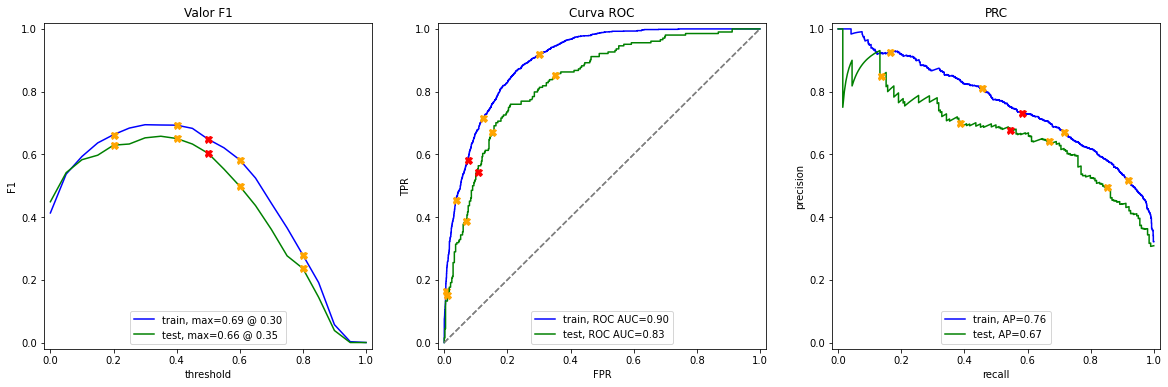

In [91]:
%%time
gbm_evaluation_1 = evaluate_model(lgbm, features_train, target_train, features_test, target_test)
gbm_evaluation_1

In [92]:
# Ahora obtenemos las features que menos afectan para el modelo
lgbm_lowest_features = get_lowest_keys(get_feat_imp_dict(lgbm, features_train))

Si miramos bien podemos ver como las columnas `senior_citizen`, `internet_service` y `streaming_movies` son las columnas que menos aportan para nuestro modelo. Vamos a eliminar `senior_citizen` ya que presenta una diferencia notable con el resto de las features.

In [93]:
gbm_features_train = features_train.drop(columns=lgbm_lowest_features)
gbm_features_valid = features_valid.drop(columns=lgbm_lowest_features)
gbm_features_test = features_test.drop(columns=lgbm_lowest_features)

In [94]:
%%time
maximum = 0 
iterations = 75
threshold = 0
for i in range(iterations):
    # Creamos aleatoriamente los parámetros y cargamos con valores aleatorios dentro de los rangos deseados
    params = {}
    params['boosting_type'] = np.random.choice(['gbdt','dart'])
    params['num_leaves'] = np.random.randint(30,750)
    params['max_depth'] = np.random.randint(5,10)
    params['learning_rate'] = np.random.uniform(0.05,0.56)
    params['min_child_samples'] = np.random.randint(30,75)
    params['colsample_bytree'] = np.random.uniform(0.1,1)
    params['early_stopping_round'] = 75
    params['max_bin'] = 128
    params['lambda_l1'] = np.random.uniform(0.01,0.36)
    
    # De ahi entrenamos el modelo y obtenemos sus predicciones
    gbm_model = LGBMClassifier(**params)
    gbm_model.fit(gbm_features_train, target_train, 
            feature_name='auto', categorical_feature='auto',
            eval_set=[(gbm_features_valid, target_valid)], eval_metric='auc')
    
    # Obtenemos las probabilidades de las predicciones
    target_test_prob_pred = gbm_model.predict_proba(gbm_features_valid)
    
    # Finalmente observamos el AUC-ROC en diferentes thresholds
    threshold = 0
    for threshold in np.arange(0.1,0.9,0.05):
        target_test_pred = (target_test_prob_pred[:, 1] >= threshold).astype(int)
        auc = metrics.roc_auc_score(target_valid, target_test_pred)
        train_auc = metrics.roc_auc_score(target_valid, target_test_pred)
        
    
        # Y guardamos los datos si vimos un modelo mejor que el que teníamos
        if auc > maximum:
            maximum = auc
            pp = params
            tr_auc = train_auc
            best_threshold = threshold
        
print("*" * 70)
print('AUC máximo obtenido es:', maximum)
print('AUC de entrenamiento máximo obtenido es:', tr_auc)
print('Con los parámetros:', pp)
print('Y el threshold', "{:.2f}".format(best_threshold))
print("*" * 70)

[LightGBM] [Warning] lambda_l1 is set=0.08864631305300306, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08864631305300306
[1]	valid_0's auc: 0.783532	valid_0's binary_logloss: 0.542303
[2]	valid_0's auc: 0.800485	valid_0's binary_logloss: 0.510047
[3]	valid_0's auc: 0.811814	valid_0's binary_logloss: 0.490279
[4]	valid_0's auc: 0.817748	valid_0's binary_logloss: 0.477395
[5]	valid_0's auc: 0.826162	valid_0's binary_logloss: 0.466023
[6]	valid_0's auc: 0.8297	valid_0's binary_logloss: 0.461974
[7]	valid_0's auc: 0.831886	valid_0's binary_logloss: 0.455102
[8]	valid_0's auc: 0.8322	valid_0's binary_logloss: 0.460297
[9]	valid_0's auc: 0.843784	valid_0's binary_logloss: 0.441626
[10]	valid_0's auc: 0.846164	valid_0's binary_logloss: 0.432233
[11]	valid_0's auc: 0.848435	valid_0's binary_logloss: 0.428757
[12]	valid_0's auc: 0.847881	valid_0's binary_logloss: 0.429802
[13]	valid_0's auc: 0.850536	valid_0's binary_logloss: 0.42565
[14]	valid_0's auc: 0.850047	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[32]	valid_0's auc: 0.849633	valid_0's binary_logloss: 0.41819
[33]	valid_0's auc: 0.849054	valid_0's binary_logloss: 0.418932
[34]	valid_0's auc: 0.848525	valid_0's binary_logloss: 0.419179
[35]	valid_0's auc: 0.848565	valid_0's binary_logloss: 0.419286
[36]	valid_0's auc: 0.849024	valid_0's binary_logloss: 0.418512
[37]	valid_0's auc: 0.849024	valid_0's binary_logloss: 0.419047
[38]	valid_0's auc: 0.848934	valid_0's binary_logloss: 0.419053
[39]	valid_0's auc: 0.848635	valid_0's binary_logloss: 0.41948
[40]	valid_0's auc: 0.848635	valid_0's binary_logloss: 0.419346
[41]	valid_0's auc: 0.848625	valid_0's binary_logloss: 0.419388
[42]	valid_0's auc: 0.847796	valid_0's binary_logloss: 0.419552
[43]	valid_0's auc: 0.848445	valid_0's binary_logloss: 0.419211
[44]	valid_0's auc: 0.848295	valid_0's binary_logloss: 0.419179
[45]	valid_0's auc: 0.847956	valid_0's binary_logloss: 0.419411
[46]	valid_0's auc: 0.847666	valid_0's binary_logloss: 0.419549
[47]	valid_0's auc: 0.848026	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[72]	valid_0's auc: 0.833962	valid_0's binary_logloss: 0.436618
[73]	valid_0's auc: 0.833902	valid_0's binary_logloss: 0.436584
[74]	valid_0's auc: 0.833972	valid_0's binary_logloss: 0.436763
[75]	valid_0's auc: 0.833942	valid_0's binary_logloss: 0.436784
[76]	valid_0's auc: 0.833962	valid_0's binary_logloss: 0.436785
[77]	valid_0's auc: 0.834162	valid_0's binary_logloss: 0.436667
[78]	valid_0's auc: 0.834262	valid_0's binary_logloss: 0.436643
[79]	valid_0's auc: 0.834032	valid_0's binary_logloss: 0.436844
[80]	valid_0's auc: 0.834022	valid_0's binary_logloss: 0.436844
[81]	valid_0's auc: 0.834341	valid_0's binary_logloss: 0.43666
[82]	valid_0's auc: 0.834481	valid_0's binary_logloss: 0.43655
[83]	valid_0's auc: 0.834551	valid_0's binary_logloss: 0.436472
[84]	valid_0's auc: 0.834671	valid_0's binary_logloss: 0.436414
[85]	valid_0's auc: 0.83489	valid_0's binary_logloss: 0.436289
[86]	valid_0's auc: 0.83494	valid_0's binary_logloss: 0.436305
[87]	valid_0's auc: 0.834486	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[54]	valid_0's auc: 0.848944	valid_0's binary_logloss: 0.421819
[55]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.421978
[56]	valid_0's auc: 0.848145	valid_0's binary_logloss: 0.422812
[57]	valid_0's auc: 0.847706	valid_0's binary_logloss: 0.423301
[58]	valid_0's auc: 0.847896	valid_0's binary_logloss: 0.423168
[59]	valid_0's auc: 0.847846	valid_0's binary_logloss: 0.423219
[60]	valid_0's auc: 0.847801	valid_0's binary_logloss: 0.423479
[61]	valid_0's auc: 0.847462	valid_0's binary_logloss: 0.423815
[62]	valid_0's auc: 0.847372	valid_0's binary_logloss: 0.423685
[63]	valid_0's auc: 0.847073	valid_0's binary_logloss: 0.423801
[64]	valid_0's auc: 0.846953	valid_0's binary_logloss: 0.424096
[65]	valid_0's auc: 0.847023	valid_0's binary_logloss: 0.424082
[66]	valid_0's auc: 0.846793	valid_0's binary_logloss: 0.424281
[67]	valid_0's auc: 0.846823	valid_0's binary_logloss: 0.424351
[68]	valid_0's auc: 0.847063	valid_0's binary_logloss: 0.424366
[69]	valid_0's auc: 0.846873	valid_0's b

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[37]	valid_0's auc: 0.839083	valid_0's binary_logloss: 0.430014
[38]	valid_0's auc: 0.839073	valid_0's binary_logloss: 0.430011
[39]	valid_0's auc: 0.839891	valid_0's binary_logloss: 0.429677
[40]	valid_0's auc: 0.84025	valid_0's binary_logloss: 0.429433
[41]	valid_0's auc: 0.84027	valid_0's binary_logloss: 0.429381
[42]	valid_0's auc: 0.839751	valid_0's binary_logloss: 0.42983
[43]	valid_0's auc: 0.840829	valid_0's binary_logloss: 0.428766
[44]	valid_0's auc: 0.84069	valid_0's binary_logloss: 0.428989
[45]	valid_0's auc: 0.840709	valid_0's binary_logloss: 0.428915
[46]	valid_0's auc: 0.84055	valid_0's binary_logloss: 0.428269
[47]	valid_0's auc: 0.840949	valid_0's binary_logloss: 0.428073
[48]	valid_0's auc: 0.84066	valid_0's binary_logloss: 0.428411
[49]	valid_0's auc: 0.841338	valid_0's binary_logloss: 0.427186
[50]	valid_0's auc: 0.840979	valid_0's binary_logloss: 0.427296
[51]	valid_0's auc: 0.842157	valid_0's binary_logloss: 0.426298
[52]	valid_0's auc: 0.841787	valid_0's binary_

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[31]	valid_0's auc: 0.841837	valid_0's binary_logloss: 0.426937
[32]	valid_0's auc: 0.841648	valid_0's binary_logloss: 0.426649
[33]	valid_0's auc: 0.841288	valid_0's binary_logloss: 0.427186
[34]	valid_0's auc: 0.840879	valid_0's binary_logloss: 0.427769
[35]	valid_0's auc: 0.840899	valid_0's binary_logloss: 0.427545
[36]	valid_0's auc: 0.841628	valid_0's binary_logloss: 0.426494
[37]	valid_0's auc: 0.841728	valid_0's binary_logloss: 0.426635
[38]	valid_0's auc: 0.841498	valid_0's binary_logloss: 0.426806
[39]	valid_0's auc: 0.841977	valid_0's binary_logloss: 0.42612
[40]	valid_0's auc: 0.842057	valid_0's binary_logloss: 0.42588
[41]	valid_0's auc: 0.842207	valid_0's binary_logloss: 0.425784
[42]	valid_0's auc: 0.841598	valid_0's binary_logloss: 0.426236
[43]	valid_0's auc: 0.842037	valid_0's binary_logloss: 0.425672
[44]	valid_0's auc: 0.842077	valid_0's binary_logloss: 0.425406
[45]	valid_0's auc: 0.841189	valid_0's binary_logloss: 0.426409
[46]	valid_0's auc: 0.840929	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[59]	valid_0's auc: 0.840056	valid_0's binary_logloss: 0.435239
[60]	valid_0's auc: 0.84019	valid_0's binary_logloss: 0.435516
[61]	valid_0's auc: 0.840101	valid_0's binary_logloss: 0.43525
[62]	valid_0's auc: 0.84057	valid_0's binary_logloss: 0.435123
[63]	valid_0's auc: 0.840779	valid_0's binary_logloss: 0.43475
[64]	valid_0's auc: 0.841009	valid_0's binary_logloss: 0.434588
[65]	valid_0's auc: 0.84027	valid_0's binary_logloss: 0.435676
[66]	valid_0's auc: 0.84019	valid_0's binary_logloss: 0.435423
[67]	valid_0's auc: 0.8402	valid_0's binary_logloss: 0.435453
[68]	valid_0's auc: 0.840061	valid_0's binary_logloss: 0.435988
[69]	valid_0's auc: 0.839781	valid_0's binary_logloss: 0.436257
[70]	valid_0's auc: 0.839871	valid_0's binary_logloss: 0.43599
[71]	valid_0's auc: 0.84069	valid_0's binary_logloss: 0.435493
[72]	valid_0's auc: 0.840829	valid_0's binary_logloss: 0.435618
[73]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.436443
[74]	valid_0's auc: 0.839891	valid_0's binary_loglo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[31]	valid_0's auc: 0.839177	valid_0's binary_logloss: 0.431359
[32]	valid_0's auc: 0.838648	valid_0's binary_logloss: 0.431346
[33]	valid_0's auc: 0.838069	valid_0's binary_logloss: 0.433371
[34]	valid_0's auc: 0.837261	valid_0's binary_logloss: 0.434256
[35]	valid_0's auc: 0.837181	valid_0's binary_logloss: 0.434006
[36]	valid_0's auc: 0.838209	valid_0's binary_logloss: 0.431611
[37]	valid_0's auc: 0.839547	valid_0's binary_logloss: 0.430463
[38]	valid_0's auc: 0.839427	valid_0's binary_logloss: 0.430481
[39]	valid_0's auc: 0.839746	valid_0's binary_logloss: 0.43106
[40]	valid_0's auc: 0.840285	valid_0's binary_logloss: 0.430724
[41]	valid_0's auc: 0.840505	valid_0's binary_logloss: 0.4301
[42]	valid_0's auc: 0.839257	valid_0's binary_logloss: 0.431465
[43]	valid_0's auc: 0.839826	valid_0's binary_logloss: 0.430599
[44]	valid_0's auc: 0.839706	valid_0's binary_logloss: 0.430733
[45]	valid_0's auc: 0.839726	valid_0's binary_logloss: 0.430945
[46]	valid_0's auc: 0.839197	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[37]	valid_0's auc: 0.832081	valid_0's binary_logloss: 0.445113
[38]	valid_0's auc: 0.831671	valid_0's binary_logloss: 0.445514
[39]	valid_0's auc: 0.832091	valid_0's binary_logloss: 0.445061
[40]	valid_0's auc: 0.832939	valid_0's binary_logloss: 0.444619
[41]	valid_0's auc: 0.831252	valid_0's binary_logloss: 0.447129
[42]	valid_0's auc: 0.830753	valid_0's binary_logloss: 0.4477
[43]	valid_0's auc: 0.830544	valid_0's binary_logloss: 0.447731
[44]	valid_0's auc: 0.830773	valid_0's binary_logloss: 0.448314
[45]	valid_0's auc: 0.831142	valid_0's binary_logloss: 0.448207
[46]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.448768
[47]	valid_0's auc: 0.831552	valid_0's binary_logloss: 0.44764
[48]	valid_0's auc: 0.831362	valid_0's binary_logloss: 0.448493
[49]	valid_0's auc: 0.831412	valid_0's binary_logloss: 0.448889
[50]	valid_0's auc: 0.831202	valid_0's binary_logloss: 0.449134
[51]	valid_0's auc: 0.83224	valid_0's binary_logloss: 0.448181
[52]	valid_0's auc: 0.831691	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[6]	valid_0's auc: 0.815342	valid_0's binary_logloss: 0.47631
[7]	valid_0's auc: 0.815482	valid_0's binary_logloss: 0.475101
[8]	valid_0's auc: 0.818027	valid_0's binary_logloss: 0.472638
[9]	valid_0's auc: 0.817648	valid_0's binary_logloss: 0.470904
[10]	valid_0's auc: 0.82192	valid_0's binary_logloss: 0.466147
[11]	valid_0's auc: 0.824864	valid_0's binary_logloss: 0.46388
[12]	valid_0's auc: 0.824854	valid_0's binary_logloss: 0.46392
[13]	valid_0's auc: 0.824904	valid_0's binary_logloss: 0.462788
[14]	valid_0's auc: 0.823632	valid_0's binary_logloss: 0.460948
[15]	valid_0's auc: 0.822349	valid_0's binary_logloss: 0.461239
[16]	valid_0's auc: 0.823317	valid_0's binary_logloss: 0.460379
[17]	valid_0's auc: 0.82192	valid_0's binary_logloss: 0.460726
[18]	valid_0's auc: 0.822918	valid_0's binary_logloss: 0.459837
[19]	valid_0's auc: 0.826741	valid_0's binary_logloss: 0.451724
[20]	valid_0's auc: 0.826671	valid_0's binary_logloss: 0.451151
[21]	valid_0's auc: 0.83266	valid_0's binary_logl

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[40]	valid_0's auc: 0.834556	valid_0's binary_logloss: 0.436759
[41]	valid_0's auc: 0.834995	valid_0's binary_logloss: 0.436099
[42]	valid_0's auc: 0.837021	valid_0's binary_logloss: 0.433712
[43]	valid_0's auc: 0.837281	valid_0's binary_logloss: 0.433202
[44]	valid_0's auc: 0.837301	valid_0's binary_logloss: 0.433236
[45]	valid_0's auc: 0.836383	valid_0's binary_logloss: 0.434025
[46]	valid_0's auc: 0.836612	valid_0's binary_logloss: 0.433286
[47]	valid_0's auc: 0.836782	valid_0's binary_logloss: 0.433298
[48]	valid_0's auc: 0.836203	valid_0's binary_logloss: 0.433739
[49]	valid_0's auc: 0.836822	valid_0's binary_logloss: 0.433715
[50]	valid_0's auc: 0.836502	valid_0's binary_logloss: 0.434029
[51]	valid_0's auc: 0.83758	valid_0's binary_logloss: 0.431805
[52]	valid_0's auc: 0.836393	valid_0's binary_logloss: 0.4334
[53]	valid_0's auc: 0.835594	valid_0's binary_logloss: 0.434014
[54]	valid_0's auc: 0.835634	valid_0's binary_logloss: 0.434606
[55]	valid_0's auc: 0.836053	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[43]	valid_0's auc: 0.833568	valid_0's binary_logloss: 0.438277
[44]	valid_0's auc: 0.832061	valid_0's binary_logloss: 0.438914
[45]	valid_0's auc: 0.832011	valid_0's binary_logloss: 0.438862
[46]	valid_0's auc: 0.83238	valid_0's binary_logloss: 0.438473
[47]	valid_0's auc: 0.83236	valid_0's binary_logloss: 0.438535
[48]	valid_0's auc: 0.832929	valid_0's binary_logloss: 0.438085
[49]	valid_0's auc: 0.833019	valid_0's binary_logloss: 0.438673
[50]	valid_0's auc: 0.833408	valid_0's binary_logloss: 0.438692
[51]	valid_0's auc: 0.834925	valid_0's binary_logloss: 0.435917
[52]	valid_0's auc: 0.834556	valid_0's binary_logloss: 0.436171
[53]	valid_0's auc: 0.834406	valid_0's binary_logloss: 0.436382
[54]	valid_0's auc: 0.834526	valid_0's binary_logloss: 0.436307
[55]	valid_0's auc: 0.834356	valid_0's binary_logloss: 0.436501
[56]	valid_0's auc: 0.834736	valid_0's binary_logloss: 0.43663
[57]	valid_0's auc: 0.834336	valid_0's binary_logloss: 0.436808
[58]	valid_0's auc: 0.834586	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[29]	valid_0's auc: 0.837161	valid_0's binary_logloss: 0.440153
[30]	valid_0's auc: 0.837161	valid_0's binary_logloss: 0.441907
[31]	valid_0's auc: 0.838149	valid_0's binary_logloss: 0.441634
[32]	valid_0's auc: 0.83776	valid_0's binary_logloss: 0.442007
[33]	valid_0's auc: 0.836822	valid_0's binary_logloss: 0.443713
[34]	valid_0's auc: 0.835414	valid_0's binary_logloss: 0.446619
[35]	valid_0's auc: 0.835604	valid_0's binary_logloss: 0.446688
[36]	valid_0's auc: 0.834925	valid_0's binary_logloss: 0.448736
[37]	valid_0's auc: 0.834786	valid_0's binary_logloss: 0.448575
[38]	valid_0's auc: 0.834157	valid_0's binary_logloss: 0.449997
[39]	valid_0's auc: 0.834047	valid_0's binary_logloss: 0.451122
[40]	valid_0's auc: 0.833977	valid_0's binary_logloss: 0.451431
[41]	valid_0's auc: 0.833388	valid_0's binary_logloss: 0.452421
[42]	valid_0's auc: 0.833248	valid_0's binary_logloss: 0.453547
[43]	valid_0's auc: 0.83231	valid_0's binary_logloss: 0.454747
[44]	valid_0's auc: 0.83252	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[10]	valid_0's auc: 0.833593	valid_0's binary_logloss: 0.437059
[11]	valid_0's auc: 0.834661	valid_0's binary_logloss: 0.435837
[12]	valid_0's auc: 0.83501	valid_0's binary_logloss: 0.435442
[13]	valid_0's auc: 0.8325	valid_0's binary_logloss: 0.439954
[14]	valid_0's auc: 0.830214	valid_0's binary_logloss: 0.442632
[15]	valid_0's auc: 0.8273	valid_0's binary_logloss: 0.447231
[16]	valid_0's auc: 0.824036	valid_0's binary_logloss: 0.451952
[17]	valid_0's auc: 0.822139	valid_0's binary_logloss: 0.454879
[18]	valid_0's auc: 0.825982	valid_0's binary_logloss: 0.451406
[19]	valid_0's auc: 0.825343	valid_0's binary_logloss: 0.453257
[20]	valid_0's auc: 0.825343	valid_0's binary_logloss: 0.452902
[21]	valid_0's auc: 0.825064	valid_0's binary_logloss: 0.453395
[22]	valid_0's auc: 0.82691	valid_0's binary_logloss: 0.452723
[23]	valid_0's auc: 0.827709	valid_0's binary_logloss: 0.452781
[24]	valid_0's auc: 0.828617	valid_0's binary_logloss: 0.451811
[25]	valid_0's auc: 0.828867	valid_0's binary_

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[35]	valid_0's auc: 0.842361	valid_0's binary_logloss: 0.430924
[36]	valid_0's auc: 0.842571	valid_0's binary_logloss: 0.431359
[37]	valid_0's auc: 0.843379	valid_0's binary_logloss: 0.430609
[38]	valid_0's auc: 0.84334	valid_0's binary_logloss: 0.430948
[39]	valid_0's auc: 0.843769	valid_0's binary_logloss: 0.4298
[40]	valid_0's auc: 0.843599	valid_0's binary_logloss: 0.430605
[41]	valid_0's auc: 0.843928	valid_0's binary_logloss: 0.430741
[42]	valid_0's auc: 0.844368	valid_0's binary_logloss: 0.430464
[43]	valid_0's auc: 0.84326	valid_0's binary_logloss: 0.432035
[44]	valid_0's auc: 0.843469	valid_0's binary_logloss: 0.431925
[45]	valid_0's auc: 0.842331	valid_0's binary_logloss: 0.432868
[46]	valid_0's auc: 0.842331	valid_0's binary_logloss: 0.432863
[47]	valid_0's auc: 0.840804	valid_0's binary_logloss: 0.434422
[48]	valid_0's auc: 0.840784	valid_0's binary_logloss: 0.434485
[49]	valid_0's auc: 0.840874	valid_0's binary_logloss: 0.434537
[50]	valid_0's auc: 0.840764	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[14]	valid_0's auc: 0.841149	valid_0's binary_logloss: 0.428263
[15]	valid_0's auc: 0.84069	valid_0's binary_logloss: 0.429759
[16]	valid_0's auc: 0.838479	valid_0's binary_logloss: 0.43257
[17]	valid_0's auc: 0.838628	valid_0's binary_logloss: 0.432617
[18]	valid_0's auc: 0.840774	valid_0's binary_logloss: 0.430046
[19]	valid_0's auc: 0.840385	valid_0's binary_logloss: 0.431896
[20]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.429725
[21]	valid_0's auc: 0.841363	valid_0's binary_logloss: 0.430857
[22]	valid_0's auc: 0.840714	valid_0's binary_logloss: 0.431985
[23]	valid_0's auc: 0.839207	valid_0's binary_logloss: 0.432442
[24]	valid_0's auc: 0.838429	valid_0's binary_logloss: 0.434228
[25]	valid_0's auc: 0.8378	valid_0's binary_logloss: 0.434819
[26]	valid_0's auc: 0.838938	valid_0's binary_logloss: 0.433658
[27]	valid_0's auc: 0.838928	valid_0's binary_logloss: 0.433914
[28]	valid_0's auc: 0.838539	valid_0's binary_logloss: 0.434227
[29]	valid_0's auc: 0.836173	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.643041	valid_0's binary_logloss: 0.580137
[2]	valid_0's auc: 0.731575	valid_0's binary_logloss: 0.547137
[3]	valid_0's auc: 0.744056	valid_0's binary_logloss: 0.542085
[4]	valid_0's auc: 0.773865	valid_0's binary_logloss: 0.522841
[5]	valid_0's auc: 0.809009	valid_0's binary_logloss: 0.490994
[6]	valid_0's auc: 0.815926	valid_0's binary_logloss: 0.482069
[7]	valid_0's auc: 0.815657	valid_0's binary_logloss: 0.480495
[8]	valid_0's auc: 0.817842	valid_0's binary_logloss: 0.486283
[9]	valid_0's auc: 0.818401	valid_0's binary_logloss: 0.481361
[10]	valid_0's auc: 0.822658	valid_0's binary_logloss: 0.476498
[11]	valid_0's auc: 0.825229	valid_0's binary_logloss: 0.474776
[12]	valid_0's auc: 0.818741	valid_0's binary_logloss: 0.483738
[13]	valid_0's auc: 0.818671	valid_0's binary_logloss: 0.481765
[14]	valid_0's auc: 0.815896	valid_0's binary_logloss: 0.477577
[15]	valid_0's auc: 0.813775	valid_0's binary_logloss: 0.476078
[16]	valid_0's auc: 0.815502	valid_0's binary_log

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[36]	valid_0's auc: 0.832799	valid_0's binary_logloss: 0.447509
[37]	valid_0's auc: 0.83248	valid_0's binary_logloss: 0.447883
[38]	valid_0's auc: 0.83261	valid_0's binary_logloss: 0.447737
[39]	valid_0's auc: 0.832031	valid_0's binary_logloss: 0.449205
[40]	valid_0's auc: 0.83236	valid_0's binary_logloss: 0.448973
[41]	valid_0's auc: 0.83238	valid_0's binary_logloss: 0.449031
[42]	valid_0's auc: 0.833498	valid_0's binary_logloss: 0.44724
[43]	valid_0's auc: 0.833538	valid_0's binary_logloss: 0.447205
[44]	valid_0's auc: 0.834197	valid_0's binary_logloss: 0.447179
[45]	valid_0's auc: 0.833059	valid_0's binary_logloss: 0.450118
[46]	valid_0's auc: 0.83258	valid_0's binary_logloss: 0.450919
[47]	valid_0's auc: 0.831771	valid_0's binary_logloss: 0.451763
[48]	valid_0's auc: 0.832919	valid_0's binary_logloss: 0.450585
[49]	valid_0's auc: 0.83268	valid_0's binary_logloss: 0.450877
[50]	valid_0's auc: 0.832829	valid_0's binary_logloss: 0.450882
[51]	valid_0's auc: 0.831771	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[13]	valid_0's auc: 0.845096	valid_0's binary_logloss: 0.431849
[14]	valid_0's auc: 0.845226	valid_0's binary_logloss: 0.430259
[15]	valid_0's auc: 0.845006	valid_0's binary_logloss: 0.429989
[16]	valid_0's auc: 0.843819	valid_0's binary_logloss: 0.429917
[17]	valid_0's auc: 0.842062	valid_0's binary_logloss: 0.430682
[18]	valid_0's auc: 0.842751	valid_0's binary_logloss: 0.42925
[19]	valid_0's auc: 0.844108	valid_0's binary_logloss: 0.427742
[20]	valid_0's auc: 0.845086	valid_0's binary_logloss: 0.426916
[21]	valid_0's auc: 0.845106	valid_0's binary_logloss: 0.427308
[22]	valid_0's auc: 0.845525	valid_0's binary_logloss: 0.427039
[23]	valid_0's auc: 0.846224	valid_0's binary_logloss: 0.426463
[24]	valid_0's auc: 0.846464	valid_0's binary_logloss: 0.426424
[25]	valid_0's auc: 0.84822	valid_0's binary_logloss: 0.424323
[26]	valid_0's auc: 0.849218	valid_0's binary_logloss: 0.423206
[27]	valid_0's auc: 0.849228	valid_0's binary_logloss: 0.4235
[28]	valid_0's auc: 0.849313	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.742779	valid_0's binary_logloss: 0.584082
[2]	valid_0's auc: 0.78453	valid_0's binary_logloss: 0.57308
[3]	valid_0's auc: 0.823806	valid_0's binary_logloss: 0.557432
[4]	valid_0's auc: 0.831876	valid_0's binary_logloss: 0.544397
[5]	valid_0's auc: 0.834287	valid_0's binary_logloss: 0.534805
[6]	valid_0's auc: 0.835963	valid_0's binary_logloss: 0.525251
[7]	valid_0's auc: 0.838249	valid_0's binary_logloss: 0.515706
[8]	valid_0's auc: 0.838279	valid_0's binary_logloss: 0.518589
[9]	valid_0's auc: 0.838968	valid_0's binary_logloss: 0.509917
[10]	valid_0's auc: 0.842571	valid_0's binary_logloss: 0.501319
[11]	valid_0's auc: 0.842491	valid_0's binary_logloss: 0.494775
[12]	valid_0's auc: 0.84319	valid_0's binary_logloss: 0.497101
[13]	valid_0's auc: 0.844248	valid_0's binary_logloss: 0.490257
[14]	valid_0's auc: 0.844158	valid_0's binary_logloss: 0.484534
[15]	valid_0's auc: 0.845246	valid_0's binary_logloss: 0.478851
[16]	valid_0's auc: 0.844857	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.749022	valid_0's binary_logloss: 0.570033
[2]	valid_0's auc: 0.797571	valid_0's binary_logloss: 0.546162
[3]	valid_0's auc: 0.823073	valid_0's binary_logloss: 0.522623
[4]	valid_0's auc: 0.837276	valid_0's binary_logloss: 0.499012
[5]	valid_0's auc: 0.836572	valid_0's binary_logloss: 0.485846
[6]	valid_0's auc: 0.838968	valid_0's binary_logloss: 0.474949
[7]	valid_0's auc: 0.84287	valid_0's binary_logloss: 0.462832
[8]	valid_0's auc: 0.842546	valid_0's binary_logloss: 0.45634
[9]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.452491
[10]	valid_0's auc: 0.840859	valid_0's binary_logloss: 0.44842
[11]	valid_0's auc: 0.841079	valid_0's binary_logloss: 0.444384
[12]	valid_0's auc: 0.841518	valid_0's binary_logloss: 0.441178
[13]	valid_0's auc: 0.842616	valid_0's binary_logloss: 0.437277
[14]	valid_0's auc: 0.843664	valid_0's binary_logloss: 0.434884
[15]	valid_0's auc: 0.843499	valid_0's binary_logloss: 0.433643
[16]	valid_0's auc: 0.843804	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[50]	valid_0's auc: 0.83765	valid_0's binary_logloss: 0.436021
[51]	valid_0's auc: 0.838519	valid_0's binary_logloss: 0.434358
[52]	valid_0's auc: 0.838678	valid_0's binary_logloss: 0.434435
[53]	valid_0's auc: 0.838618	valid_0's binary_logloss: 0.434519
[54]	valid_0's auc: 0.838379	valid_0's binary_logloss: 0.434269
[55]	valid_0's auc: 0.838449	valid_0's binary_logloss: 0.434223
[56]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.434766
[57]	valid_0's auc: 0.8379	valid_0's binary_logloss: 0.434774
[58]	valid_0's auc: 0.838439	valid_0's binary_logloss: 0.433569
[59]	valid_0's auc: 0.838868	valid_0's binary_logloss: 0.432444
[60]	valid_0's auc: 0.839018	valid_0's binary_logloss: 0.432404
[61]	valid_0's auc: 0.839088	valid_0's binary_logloss: 0.432442
[62]	valid_0's auc: 0.838868	valid_0's binary_logloss: 0.432469
[63]	valid_0's auc: 0.839187	valid_0's binary_logloss: 0.431427
[64]	valid_0's auc: 0.839287	valid_0's binary_logloss: 0.431427
[65]	valid_0's auc: 0.839038	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[36]	valid_0's auc: 0.846214	valid_0's binary_logloss: 0.427361
[37]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.427314
[38]	valid_0's auc: 0.846064	valid_0's binary_logloss: 0.427213
[39]	valid_0's auc: 0.846005	valid_0's binary_logloss: 0.427335
[40]	valid_0's auc: 0.845665	valid_0's binary_logloss: 0.427719
[41]	valid_0's auc: 0.84579	valid_0's binary_logloss: 0.427369
[42]	valid_0's auc: 0.845765	valid_0's binary_logloss: 0.427568
[43]	valid_0's auc: 0.845565	valid_0's binary_logloss: 0.427506
[44]	valid_0's auc: 0.845535	valid_0's binary_logloss: 0.427699
[45]	valid_0's auc: 0.845585	valid_0's binary_logloss: 0.427659
[46]	valid_0's auc: 0.845416	valid_0's binary_logloss: 0.42793
[47]	valid_0's auc: 0.845535	valid_0's binary_logloss: 0.428095
[48]	valid_0's auc: 0.845336	valid_0's binary_logloss: 0.428382
[49]	valid_0's auc: 0.845166	valid_0's binary_logloss: 0.428793
[50]	valid_0's auc: 0.844927	valid_0's binary_logloss: 0.429061
[51]	valid_0's auc: 0.844767	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[5]	valid_0's auc: 0.837076	valid_0's binary_logloss: 0.436544
[6]	valid_0's auc: 0.839592	valid_0's binary_logloss: 0.432313
[7]	valid_0's auc: 0.834606	valid_0's binary_logloss: 0.436986
[8]	valid_0's auc: 0.834756	valid_0's binary_logloss: 0.436659
[9]	valid_0's auc: 0.832675	valid_0's binary_logloss: 0.440799
[10]	valid_0's auc: 0.836378	valid_0's binary_logloss: 0.437002
[11]	valid_0's auc: 0.837126	valid_0's binary_logloss: 0.435806
[12]	valid_0's auc: 0.838484	valid_0's binary_logloss: 0.433899
[13]	valid_0's auc: 0.838109	valid_0's binary_logloss: 0.434703
[14]	valid_0's auc: 0.83499	valid_0's binary_logloss: 0.440114
[15]	valid_0's auc: 0.834222	valid_0's binary_logloss: 0.442274
[16]	valid_0's auc: 0.831227	valid_0's binary_logloss: 0.446535
[17]	valid_0's auc: 0.828842	valid_0's binary_logloss: 0.450586
[18]	valid_0's auc: 0.830269	valid_0's binary_logloss: 0.450135
[19]	valid_0's auc: 0.82963	valid_0's binary_logloss: 0.452652
[20]	valid_0's auc: 0.828862	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[27]	valid_0's auc: 0.849338	valid_0's binary_logloss: 0.422495
[28]	valid_0's auc: 0.849298	valid_0's binary_logloss: 0.422798
[29]	valid_0's auc: 0.849119	valid_0's binary_logloss: 0.422552
[30]	valid_0's auc: 0.849089	valid_0's binary_logloss: 0.422456
[31]	valid_0's auc: 0.849737	valid_0's binary_logloss: 0.42222
[32]	valid_0's auc: 0.849777	valid_0's binary_logloss: 0.422232
[33]	valid_0's auc: 0.850087	valid_0's binary_logloss: 0.421747
[34]	valid_0's auc: 0.849159	valid_0's binary_logloss: 0.422799
[35]	valid_0's auc: 0.849049	valid_0's binary_logloss: 0.422937
[36]	valid_0's auc: 0.848839	valid_0's binary_logloss: 0.423611
[37]	valid_0's auc: 0.848759	valid_0's binary_logloss: 0.423492
[38]	valid_0's auc: 0.84822	valid_0's binary_logloss: 0.423827
[39]	valid_0's auc: 0.848729	valid_0's binary_logloss: 0.422838
[40]	valid_0's auc: 0.84854	valid_0's binary_logloss: 0.423154
[41]	valid_0's auc: 0.848679	valid_0's binary_logloss: 0.423366
[42]	valid_0's auc: 0.848719	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[47]	valid_0's auc: 0.834047	valid_0's binary_logloss: 0.443194
[48]	valid_0's auc: 0.833378	valid_0's binary_logloss: 0.444426
[49]	valid_0's auc: 0.833648	valid_0's binary_logloss: 0.444553
[50]	valid_0's auc: 0.833149	valid_0's binary_logloss: 0.445068
[51]	valid_0's auc: 0.83259	valid_0's binary_logloss: 0.445466
[52]	valid_0's auc: 0.832789	valid_0's binary_logloss: 0.445423
[53]	valid_0's auc: 0.831632	valid_0's binary_logloss: 0.446511
[54]	valid_0's auc: 0.831651	valid_0's binary_logloss: 0.446713
[55]	valid_0's auc: 0.830813	valid_0's binary_logloss: 0.44757
[56]	valid_0's auc: 0.831222	valid_0's binary_logloss: 0.447484
[57]	valid_0's auc: 0.831382	valid_0's binary_logloss: 0.447675
[58]	valid_0's auc: 0.831651	valid_0's binary_logloss: 0.448181
[59]	valid_0's auc: 0.832001	valid_0's binary_logloss: 0.448125
[60]	valid_0's auc: 0.8322	valid_0's binary_logloss: 0.448416
[61]	valid_0's auc: 0.832121	valid_0's binary_logloss: 0.448186
[62]	valid_0's auc: 0.831841	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[48]	valid_0's auc: 0.845216	valid_0's binary_logloss: 0.427076
[49]	valid_0's auc: 0.844996	valid_0's binary_logloss: 0.427115
[50]	valid_0's auc: 0.845466	valid_0's binary_logloss: 0.426579
[51]	valid_0's auc: 0.846005	valid_0's binary_logloss: 0.426035
[52]	valid_0's auc: 0.846454	valid_0's binary_logloss: 0.42568
[53]	valid_0's auc: 0.846553	valid_0's binary_logloss: 0.425396
[54]	valid_0's auc: 0.846194	valid_0's binary_logloss: 0.425595
[55]	valid_0's auc: 0.846149	valid_0's binary_logloss: 0.425781
[56]	valid_0's auc: 0.846109	valid_0's binary_logloss: 0.425846
[57]	valid_0's auc: 0.846049	valid_0's binary_logloss: 0.42574
[58]	valid_0's auc: 0.846129	valid_0's binary_logloss: 0.425776
[59]	valid_0's auc: 0.846389	valid_0's binary_logloss: 0.425811
[60]	valid_0's auc: 0.846469	valid_0's binary_logloss: 0.425732
[61]	valid_0's auc: 0.846279	valid_0's binary_logloss: 0.426188
[62]	valid_0's auc: 0.846219	valid_0's binary_logloss: 0.426273
[63]	valid_0's auc: 0.846	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[3]	valid_0's auc: 0.822419	valid_0's binary_logloss: 0.526638
[4]	valid_0's auc: 0.831117	valid_0's binary_logloss: 0.507403
[5]	valid_0's auc: 0.83255	valid_0's binary_logloss: 0.49298
[6]	valid_0's auc: 0.836437	valid_0's binary_logloss: 0.481368
[7]	valid_0's auc: 0.841498	valid_0's binary_logloss: 0.469204
[8]	valid_0's auc: 0.84062	valid_0's binary_logloss: 0.474377
[9]	valid_0's auc: 0.839592	valid_0's binary_logloss: 0.468208
[10]	valid_0's auc: 0.839152	valid_0's binary_logloss: 0.464085
[11]	valid_0's auc: 0.84043	valid_0's binary_logloss: 0.457414
[12]	valid_0's auc: 0.84055	valid_0's binary_logloss: 0.460047
[13]	valid_0's auc: 0.84024	valid_0's binary_logloss: 0.455368
[14]	valid_0's auc: 0.842366	valid_0's binary_logloss: 0.448662
[15]	valid_0's auc: 0.84293	valid_0's binary_logloss: 0.445188
[16]	valid_0's auc: 0.844617	valid_0's binary_logloss: 0.440721
[17]	valid_0's auc: 0.84334	valid_0's binary_logloss: 0.439943
[18]	valid_0's auc: 0.844447	valid_0's binary_logloss: 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[41]	valid_0's auc: 0.832565	valid_0's binary_logloss: 0.44157
[42]	valid_0's auc: 0.833144	valid_0's binary_logloss: 0.441498
[43]	valid_0's auc: 0.832425	valid_0's binary_logloss: 0.442346
[44]	valid_0's auc: 0.832824	valid_0's binary_logloss: 0.441866
[45]	valid_0's auc: 0.832834	valid_0's binary_logloss: 0.44165
[46]	valid_0's auc: 0.833164	valid_0's binary_logloss: 0.441553
[47]	valid_0's auc: 0.832914	valid_0's binary_logloss: 0.441677
[48]	valid_0's auc: 0.833463	valid_0's binary_logloss: 0.441365
[49]	valid_0's auc: 0.833144	valid_0's binary_logloss: 0.442353
[50]	valid_0's auc: 0.833333	valid_0's binary_logloss: 0.442629
[51]	valid_0's auc: 0.833573	valid_0's binary_logloss: 0.440307
[52]	valid_0's auc: 0.834012	valid_0's binary_logloss: 0.439708
[53]	valid_0's auc: 0.833962	valid_0's binary_logloss: 0.439913
[54]	valid_0's auc: 0.834321	valid_0's binary_logloss: 0.439891
[55]	valid_0's auc: 0.834132	valid_0's binary_logloss: 0.440007
[56]	valid_0's auc: 0.834172	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[28]	valid_0's auc: 0.845331	valid_0's binary_logloss: 0.438334
[29]	valid_0's auc: 0.845311	valid_0's binary_logloss: 0.43724
[30]	valid_0's auc: 0.844961	valid_0's binary_logloss: 0.436132
[31]	valid_0's auc: 0.844667	valid_0's binary_logloss: 0.436907
[32]	valid_0's auc: 0.844058	valid_0's binary_logloss: 0.436246
[33]	valid_0's auc: 0.843988	valid_0's binary_logloss: 0.435241
[34]	valid_0's auc: 0.843759	valid_0's binary_logloss: 0.434836
[35]	valid_0's auc: 0.843888	valid_0's binary_logloss: 0.435382
[36]	valid_0's auc: 0.843819	valid_0's binary_logloss: 0.436549
[37]	valid_0's auc: 0.844318	valid_0's binary_logloss: 0.435256
[38]	valid_0's auc: 0.844462	valid_0's binary_logloss: 0.434269
[39]	valid_0's auc: 0.844482	valid_0's binary_logloss: 0.433537
[40]	valid_0's auc: 0.844313	valid_0's binary_logloss: 0.43367
[41]	valid_0's auc: 0.844243	valid_0's binary_logloss: 0.434269
[42]	valid_0's auc: 0.844083	valid_0's binary_logloss: 0.43375
[43]	valid_0's auc: 0.844103	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[44]	valid_0's auc: 0.833119	valid_0's binary_logloss: 0.441949
[45]	valid_0's auc: 0.833089	valid_0's binary_logloss: 0.441744
[46]	valid_0's auc: 0.833348	valid_0's binary_logloss: 0.441857
[47]	valid_0's auc: 0.83261	valid_0's binary_logloss: 0.441874
[48]	valid_0's auc: 0.833598	valid_0's binary_logloss: 0.44144
[49]	valid_0's auc: 0.833308	valid_0's binary_logloss: 0.442639
[50]	valid_0's auc: 0.833478	valid_0's binary_logloss: 0.44304
[51]	valid_0's auc: 0.834526	valid_0's binary_logloss: 0.440031
[52]	valid_0's auc: 0.833708	valid_0's binary_logloss: 0.439997
[53]	valid_0's auc: 0.833768	valid_0's binary_logloss: 0.440208
[54]	valid_0's auc: 0.833807	valid_0's binary_logloss: 0.440151
[55]	valid_0's auc: 0.833598	valid_0's binary_logloss: 0.440238
[56]	valid_0's auc: 0.833907	valid_0's binary_logloss: 0.440758
[57]	valid_0's auc: 0.833578	valid_0's binary_logloss: 0.440883
[58]	valid_0's auc: 0.833877	valid_0's binary_logloss: 0.441182
[59]	valid_0's auc: 0.834177	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[28]	valid_0's auc: 0.843394	valid_0's binary_logloss: 0.429025
[29]	valid_0's auc: 0.842796	valid_0's binary_logloss: 0.429436
[30]	valid_0's auc: 0.842825	valid_0's binary_logloss: 0.42948
[31]	valid_0's auc: 0.842875	valid_0's binary_logloss: 0.429993
[32]	valid_0's auc: 0.843125	valid_0's binary_logloss: 0.429666
[33]	valid_0's auc: 0.842626	valid_0's binary_logloss: 0.430446
[34]	valid_0's auc: 0.842606	valid_0's binary_logloss: 0.430691
[35]	valid_0's auc: 0.842806	valid_0's binary_logloss: 0.430325
[36]	valid_0's auc: 0.842376	valid_0's binary_logloss: 0.43089
[37]	valid_0's auc: 0.841927	valid_0's binary_logloss: 0.431084
[38]	valid_0's auc: 0.841827	valid_0's binary_logloss: 0.431447
[39]	valid_0's auc: 0.841428	valid_0's binary_logloss: 0.431937
[40]	valid_0's auc: 0.842316	valid_0's binary_logloss: 0.431735
[41]	valid_0's auc: 0.842426	valid_0's binary_logloss: 0.431371
[42]	valid_0's auc: 0.842985	valid_0's binary_logloss: 0.430765
[43]	valid_0's auc: 0.842626	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[33]	valid_0's auc: 0.830883	valid_0's binary_logloss: 0.450225
[34]	valid_0's auc: 0.828747	valid_0's binary_logloss: 0.453357
[35]	valid_0's auc: 0.828298	valid_0's binary_logloss: 0.453062
[36]	valid_0's auc: 0.827629	valid_0's binary_logloss: 0.452129
[37]	valid_0's auc: 0.828358	valid_0's binary_logloss: 0.452245
[38]	valid_0's auc: 0.828517	valid_0's binary_logloss: 0.452131
[39]	valid_0's auc: 0.829376	valid_0's binary_logloss: 0.451258
[40]	valid_0's auc: 0.828847	valid_0's binary_logloss: 0.4513
[41]	valid_0's auc: 0.828827	valid_0's binary_logloss: 0.451257
[42]	valid_0's auc: 0.82704	valid_0's binary_logloss: 0.454801
[43]	valid_0's auc: 0.82717	valid_0's binary_logloss: 0.454659
[44]	valid_0's auc: 0.828857	valid_0's binary_logloss: 0.453204
[45]	valid_0's auc: 0.828288	valid_0's binary_logloss: 0.455174
[46]	valid_0's auc: 0.828258	valid_0's binary_logloss: 0.452352
[47]	valid_0's auc: 0.827	valid_0's binary_logloss: 0.45495
[48]	valid_0's auc: 0.827479	valid_0's binary_lo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.780872	valid_0's binary_logloss: 0.541346
[2]	valid_0's auc: 0.798239	valid_0's binary_logloss: 0.50894
[3]	valid_0's auc: 0.807856	valid_0's binary_logloss: 0.489224
[4]	valid_0's auc: 0.819739	valid_0's binary_logloss: 0.476122
[5]	valid_0's auc: 0.823307	valid_0's binary_logloss: 0.465944
[6]	valid_0's auc: 0.825708	valid_0's binary_logloss: 0.462748
[7]	valid_0's auc: 0.827514	valid_0's binary_logloss: 0.456428
[8]	valid_0's auc: 0.82691	valid_0's binary_logloss: 0.461511
[9]	valid_0's auc: 0.83754	valid_0's binary_logloss: 0.443977
[10]	valid_0's auc: 0.841518	valid_0's binary_logloss: 0.434541
[11]	valid_0's auc: 0.844477	valid_0's binary_logloss: 0.431042
[12]	valid_0's auc: 0.844328	valid_0's binary_logloss: 0.431711
[13]	valid_0's auc: 0.846653	valid_0's binary_logloss: 0.42769
[14]	valid_0's auc: 0.84548	valid_0's binary_logloss: 0.42732
[15]	valid_0's auc: 0.844892	valid_0's binary_logloss: 0.425381
[16]	valid_0's auc: 0.844273	valid_0's binary_logloss: 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[31]	valid_0's auc: 0.836552	valid_0's binary_logloss: 0.4368
[32]	valid_0's auc: 0.838119	valid_0's binary_logloss: 0.435602
[33]	valid_0's auc: 0.83772	valid_0's binary_logloss: 0.436285
[34]	valid_0's auc: 0.838059	valid_0's binary_logloss: 0.436343
[35]	valid_0's auc: 0.83766	valid_0's binary_logloss: 0.436378
[36]	valid_0's auc: 0.83761	valid_0's binary_logloss: 0.435795
[37]	valid_0's auc: 0.838978	valid_0's binary_logloss: 0.434499
[38]	valid_0's auc: 0.838069	valid_0's binary_logloss: 0.435716
[39]	valid_0's auc: 0.838249	valid_0's binary_logloss: 0.435896
[40]	valid_0's auc: 0.83798	valid_0's binary_logloss: 0.435878
[41]	valid_0's auc: 0.83777	valid_0's binary_logloss: 0.4357
[42]	valid_0's auc: 0.838229	valid_0's binary_logloss: 0.435826
[43]	valid_0's auc: 0.838209	valid_0's binary_logloss: 0.435508
[44]	valid_0's auc: 0.837311	valid_0's binary_logloss: 0.437578
[45]	valid_0's auc: 0.838049	valid_0's binary_logloss: 0.437027
[46]	valid_0's auc: 0.838349	valid_0's binary_log

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[58]	valid_0's auc: 0.847212	valid_0's binary_logloss: 0.425424
[59]	valid_0's auc: 0.847142	valid_0's binary_logloss: 0.425415
[60]	valid_0's auc: 0.847142	valid_0's binary_logloss: 0.425244
[61]	valid_0's auc: 0.846933	valid_0's binary_logloss: 0.425014
[62]	valid_0's auc: 0.846933	valid_0's binary_logloss: 0.424918
[63]	valid_0's auc: 0.847112	valid_0's binary_logloss: 0.424866
[64]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.424957
[65]	valid_0's auc: 0.847063	valid_0's binary_logloss: 0.424798
[66]	valid_0's auc: 0.846753	valid_0's binary_logloss: 0.424947
[67]	valid_0's auc: 0.846683	valid_0's binary_logloss: 0.42499
[68]	valid_0's auc: 0.846778	valid_0's binary_logloss: 0.42492
[69]	valid_0's auc: 0.846543	valid_0's binary_logloss: 0.425195
[70]	valid_0's auc: 0.846753	valid_0's binary_logloss: 0.425013
[71]	valid_0's auc: 0.846643	valid_0's binary_logloss: 0.425017
[72]	valid_0's auc: 0.846454	valid_0's binary_logloss: 0.425054
[73]	valid_0's auc: 0.846633	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.742893	valid_0's binary_logloss: 0.542812
[2]	valid_0's auc: 0.779929	valid_0's binary_logloss: 0.509078
[3]	valid_0's auc: 0.82448	valid_0's binary_logloss: 0.466709
[4]	valid_0's auc: 0.831861	valid_0's binary_logloss: 0.449652
[5]	valid_0's auc: 0.834736	valid_0's binary_logloss: 0.442111
[6]	valid_0's auc: 0.836472	valid_0's binary_logloss: 0.436338
[7]	valid_0's auc: 0.839971	valid_0's binary_logloss: 0.43202
[8]	valid_0's auc: 0.841603	valid_0's binary_logloss: 0.431687
[9]	valid_0's auc: 0.842885	valid_0's binary_logloss: 0.427641
[10]	valid_0's auc: 0.842711	valid_0's binary_logloss: 0.427344
[11]	valid_0's auc: 0.842157	valid_0's binary_logloss: 0.428082
[12]	valid_0's auc: 0.842277	valid_0's binary_logloss: 0.428068
[13]	valid_0's auc: 0.839347	valid_0's binary_logloss: 0.431103
[14]	valid_0's auc: 0.837281	valid_0's binary_logloss: 0.433225
[15]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.432383
[16]	valid_0's auc: 0.838728	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[37]	valid_0's auc: 0.842416	valid_0's binary_logloss: 0.431045
[38]	valid_0's auc: 0.841837	valid_0's binary_logloss: 0.43191
[39]	valid_0's auc: 0.841827	valid_0's binary_logloss: 0.431561
[40]	valid_0's auc: 0.841568	valid_0's binary_logloss: 0.431858
[41]	valid_0's auc: 0.841089	valid_0's binary_logloss: 0.432258
[42]	valid_0's auc: 0.840899	valid_0's binary_logloss: 0.432499
[43]	valid_0's auc: 0.841039	valid_0's binary_logloss: 0.432655
[44]	valid_0's auc: 0.841238	valid_0's binary_logloss: 0.432585
[45]	valid_0's auc: 0.84055	valid_0's binary_logloss: 0.433646
[46]	valid_0's auc: 0.84018	valid_0's binary_logloss: 0.433766
[47]	valid_0's auc: 0.839801	valid_0's binary_logloss: 0.434563
[48]	valid_0's auc: 0.839711	valid_0's binary_logloss: 0.434845
[49]	valid_0's auc: 0.839262	valid_0's binary_logloss: 0.43548
[50]	valid_0's auc: 0.838883	valid_0's binary_logloss: 0.435907
[51]	valid_0's auc: 0.839172	valid_0's binary_logloss: 0.435698
[52]	valid_0's auc: 0.839562	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[8]	valid_0's auc: 0.830638	valid_0's binary_logloss: 0.442249
[9]	valid_0's auc: 0.83263	valid_0's binary_logloss: 0.439808
[10]	valid_0's auc: 0.830743	valid_0's binary_logloss: 0.442692
[11]	valid_0's auc: 0.829306	valid_0's binary_logloss: 0.444894
[12]	valid_0's auc: 0.829775	valid_0's binary_logloss: 0.443941
[13]	valid_0's auc: 0.830783	valid_0's binary_logloss: 0.443101
[14]	valid_0's auc: 0.831422	valid_0's binary_logloss: 0.443453
[15]	valid_0's auc: 0.830973	valid_0's binary_logloss: 0.444191
[16]	valid_0's auc: 0.830244	valid_0's binary_logloss: 0.445483
[17]	valid_0's auc: 0.829481	valid_0's binary_logloss: 0.4464
[18]	valid_0's auc: 0.831557	valid_0's binary_logloss: 0.445185
[19]	valid_0's auc: 0.829491	valid_0's binary_logloss: 0.448381
[20]	valid_0's auc: 0.828512	valid_0's binary_logloss: 0.450825
[21]	valid_0's auc: 0.829036	valid_0's binary_logloss: 0.449964
[22]	valid_0's auc: 0.828058	valid_0's binary_logloss: 0.452932
[23]	valid_0's auc: 0.828547	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[32]	valid_0's auc: 0.838818	valid_0's binary_logloss: 0.434679
[33]	valid_0's auc: 0.83781	valid_0's binary_logloss: 0.436258
[34]	valid_0's auc: 0.838069	valid_0's binary_logloss: 0.436791
[35]	valid_0's auc: 0.83776	valid_0's binary_logloss: 0.436944
[36]	valid_0's auc: 0.83803	valid_0's binary_logloss: 0.43567
[37]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.435632
[38]	valid_0's auc: 0.83768	valid_0's binary_logloss: 0.435685
[39]	valid_0's auc: 0.838169	valid_0's binary_logloss: 0.435355
[40]	valid_0's auc: 0.83764	valid_0's binary_logloss: 0.435537
[41]	valid_0's auc: 0.83803	valid_0's binary_logloss: 0.435096
[42]	valid_0's auc: 0.836542	valid_0's binary_logloss: 0.437008
[43]	valid_0's auc: 0.837351	valid_0's binary_logloss: 0.436287
[44]	valid_0's auc: 0.835734	valid_0's binary_logloss: 0.438464
[45]	valid_0's auc: 0.833897	valid_0's binary_logloss: 0.440918
[46]	valid_0's auc: 0.833658	valid_0's binary_logloss: 0.439148
[47]	valid_0's auc: 0.833478	valid_0's binary_lo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[42]	valid_0's auc: 0.842486	valid_0's binary_logloss: 0.430788
[43]	valid_0's auc: 0.842157	valid_0's binary_logloss: 0.431008
[44]	valid_0's auc: 0.842496	valid_0's binary_logloss: 0.431055
[45]	valid_0's auc: 0.842287	valid_0's binary_logloss: 0.431183
[46]	valid_0's auc: 0.842262	valid_0's binary_logloss: 0.431252
[47]	valid_0's auc: 0.842052	valid_0's binary_logloss: 0.43151
[48]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.43202
[49]	valid_0's auc: 0.842092	valid_0's binary_logloss: 0.431688
[50]	valid_0's auc: 0.841618	valid_0's binary_logloss: 0.432206
[51]	valid_0's auc: 0.841598	valid_0's binary_logloss: 0.43173
[52]	valid_0's auc: 0.841478	valid_0's binary_logloss: 0.431875
[53]	valid_0's auc: 0.842227	valid_0's binary_logloss: 0.431083
[54]	valid_0's auc: 0.842157	valid_0's binary_logloss: 0.431807
[55]	valid_0's auc: 0.842197	valid_0's binary_logloss: 0.431935
[56]	valid_0's auc: 0.842097	valid_0's binary_logloss: 0.432005
[57]	valid_0's auc: 0.842316	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[57]	valid_0's auc: 0.847092	valid_0's binary_logloss: 0.426149
[58]	valid_0's auc: 0.847182	valid_0's binary_logloss: 0.4263
[59]	valid_0's auc: 0.847003	valid_0's binary_logloss: 0.426322
[60]	valid_0's auc: 0.846174	valid_0's binary_logloss: 0.427333
[61]	valid_0's auc: 0.846284	valid_0's binary_logloss: 0.427268
[62]	valid_0's auc: 0.846174	valid_0's binary_logloss: 0.426969
[63]	valid_0's auc: 0.846049	valid_0's binary_logloss: 0.427373
[64]	valid_0's auc: 0.84573	valid_0's binary_logloss: 0.427925
[65]	valid_0's auc: 0.84564	valid_0's binary_logloss: 0.428045
[66]	valid_0's auc: 0.84577	valid_0's binary_logloss: 0.427832
[67]	valid_0's auc: 0.846039	valid_0's binary_logloss: 0.427903
[68]	valid_0's auc: 0.84588	valid_0's binary_logloss: 0.42841
[69]	valid_0's auc: 0.845251	valid_0's binary_logloss: 0.429156
[70]	valid_0's auc: 0.845431	valid_0's binary_logloss: 0.428794
[71]	valid_0's auc: 0.8458	valid_0's binary_logloss: 0.428517
[72]	valid_0's auc: 0.84571	valid_0's binary_logl

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[19]	valid_0's auc: 0.838184	valid_0's binary_logloss: 0.434803
[20]	valid_0's auc: 0.838593	valid_0's binary_logloss: 0.434452
[21]	valid_0's auc: 0.838583	valid_0's binary_logloss: 0.435166
[22]	valid_0's auc: 0.839522	valid_0's binary_logloss: 0.434954
[23]	valid_0's auc: 0.837785	valid_0's binary_logloss: 0.436518
[24]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.437719
[25]	valid_0's auc: 0.837625	valid_0's binary_logloss: 0.437375
[26]	valid_0's auc: 0.83532	valid_0's binary_logloss: 0.440804
[27]	valid_0's auc: 0.837306	valid_0's binary_logloss: 0.438601
[28]	valid_0's auc: 0.837066	valid_0's binary_logloss: 0.438458
[29]	valid_0's auc: 0.837935	valid_0's binary_logloss: 0.437389
[30]	valid_0's auc: 0.836228	valid_0's binary_logloss: 0.440558
[31]	valid_0's auc: 0.836787	valid_0's binary_logloss: 0.440442
[32]	valid_0's auc: 0.837515	valid_0's binary_logloss: 0.439262
[33]	valid_0's auc: 0.838164	valid_0's binary_logloss: 0.439606
[34]	valid_0's auc: 0.837296	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.719951	valid_0's binary_logloss: 0.566802
[2]	valid_0's auc: 0.786347	valid_0's binary_logloss: 0.540005
[3]	valid_0's auc: 0.815342	valid_0's binary_logloss: 0.511204
[4]	valid_0's auc: 0.825009	valid_0's binary_logloss: 0.488742
[5]	valid_0's auc: 0.830079	valid_0's binary_logloss: 0.473595
[6]	valid_0's auc: 0.833882	valid_0's binary_logloss: 0.461699
[7]	valid_0's auc: 0.841378	valid_0's binary_logloss: 0.44987
[8]	valid_0's auc: 0.84052	valid_0's binary_logloss: 0.454835
[9]	valid_0's auc: 0.840799	valid_0's binary_logloss: 0.449843
[10]	valid_0's auc: 0.84034	valid_0's binary_logloss: 0.447108
[11]	valid_0's auc: 0.840026	valid_0's binary_logloss: 0.446061
[12]	valid_0's auc: 0.839726	valid_0's binary_logloss: 0.447095
[13]	valid_0's auc: 0.84036	valid_0's binary_logloss: 0.442812
[14]	valid_0's auc: 0.841243	valid_0's binary_logloss: 0.43715
[15]	valid_0's auc: 0.840086	valid_0's binary_logloss: 0.436575
[16]	valid_0's auc: 0.841034	valid_0's binary_logloss:

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[46]	valid_0's auc: 0.833807	valid_0's binary_logloss: 0.439302
[47]	valid_0's auc: 0.833668	valid_0's binary_logloss: 0.439308
[48]	valid_0's auc: 0.833618	valid_0's binary_logloss: 0.439117
[49]	valid_0's auc: 0.833478	valid_0's binary_logloss: 0.440105
[50]	valid_0's auc: 0.833977	valid_0's binary_logloss: 0.440388
[51]	valid_0's auc: 0.835055	valid_0's binary_logloss: 0.437901
[52]	valid_0's auc: 0.833698	valid_0's binary_logloss: 0.438463
[53]	valid_0's auc: 0.833827	valid_0's binary_logloss: 0.438703
[54]	valid_0's auc: 0.834047	valid_0's binary_logloss: 0.438667
[55]	valid_0's auc: 0.833658	valid_0's binary_logloss: 0.438863
[56]	valid_0's auc: 0.833847	valid_0's binary_logloss: 0.439282
[57]	valid_0's auc: 0.833438	valid_0's binary_logloss: 0.439551
[58]	valid_0's auc: 0.833837	valid_0's binary_logloss: 0.439571
[59]	valid_0's auc: 0.834057	valid_0's binary_logloss: 0.440014
[60]	valid_0's auc: 0.834606	valid_0's binary_logloss: 0.437871
[61]	valid_0's auc: 0.834606	valid_0's b

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[32]	valid_0's auc: 0.845296	valid_0's binary_logloss: 0.425148
[33]	valid_0's auc: 0.844867	valid_0's binary_logloss: 0.425494
[34]	valid_0's auc: 0.845196	valid_0's binary_logloss: 0.425157
[35]	valid_0's auc: 0.844547	valid_0's binary_logloss: 0.425699
[36]	valid_0's auc: 0.844427	valid_0's binary_logloss: 0.425689
[37]	valid_0's auc: 0.844667	valid_0's binary_logloss: 0.425375
[38]	valid_0's auc: 0.845056	valid_0's binary_logloss: 0.424995
[39]	valid_0's auc: 0.845585	valid_0's binary_logloss: 0.424452
[40]	valid_0's auc: 0.845575	valid_0's binary_logloss: 0.424619
[41]	valid_0's auc: 0.845326	valid_0's binary_logloss: 0.424674
[42]	valid_0's auc: 0.845056	valid_0's binary_logloss: 0.425018
[43]	valid_0's auc: 0.844677	valid_0's binary_logloss: 0.425541
[44]	valid_0's auc: 0.845226	valid_0's binary_logloss: 0.425175
[45]	valid_0's auc: 0.844388	valid_0's binary_logloss: 0.426015
[46]	valid_0's auc: 0.844627	valid_0's binary_logloss: 0.425668
[47]	valid_0's auc: 0.844627	valid_0's b

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[34]	valid_0's auc: 0.844951	valid_0's binary_logloss: 0.430787
[35]	valid_0's auc: 0.84552	valid_0's binary_logloss: 0.430325
[36]	valid_0's auc: 0.843988	valid_0's binary_logloss: 0.432445
[37]	valid_0's auc: 0.842671	valid_0's binary_logloss: 0.434018
[38]	valid_0's auc: 0.841892	valid_0's binary_logloss: 0.43557
[39]	valid_0's auc: 0.841922	valid_0's binary_logloss: 0.436173
[40]	valid_0's auc: 0.842471	valid_0's binary_logloss: 0.436396
[41]	valid_0's auc: 0.840225	valid_0's binary_logloss: 0.439716
[42]	valid_0's auc: 0.840485	valid_0's binary_logloss: 0.439603
[43]	valid_0's auc: 0.839507	valid_0's binary_logloss: 0.441686
[44]	valid_0's auc: 0.838109	valid_0's binary_logloss: 0.443391
[45]	valid_0's auc: 0.837171	valid_0's binary_logloss: 0.444431
[46]	valid_0's auc: 0.837401	valid_0's binary_logloss: 0.444351
[47]	valid_0's auc: 0.835015	valid_0's binary_logloss: 0.447926
[48]	valid_0's auc: 0.834307	valid_0's binary_logloss: 0.44913
[49]	valid_0's auc: 0.832834	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[12]	valid_0's auc: 0.83509	valid_0's binary_logloss: 0.439103
[13]	valid_0's auc: 0.837026	valid_0's binary_logloss: 0.435629
[14]	valid_0's auc: 0.836268	valid_0's binary_logloss: 0.435899
[15]	valid_0's auc: 0.833947	valid_0's binary_logloss: 0.43879
[16]	valid_0's auc: 0.833723	valid_0's binary_logloss: 0.439012
[17]	valid_0's auc: 0.835479	valid_0's binary_logloss: 0.436614
[18]	valid_0's auc: 0.836817	valid_0's binary_logloss: 0.435027
[19]	valid_0's auc: 0.838928	valid_0's binary_logloss: 0.433517
[20]	valid_0's auc: 0.838898	valid_0's binary_logloss: 0.433243
[21]	valid_0's auc: 0.839597	valid_0's binary_logloss: 0.432296
[22]	valid_0's auc: 0.839018	valid_0's binary_logloss: 0.433757
[23]	valid_0's auc: 0.840675	valid_0's binary_logloss: 0.432587
[24]	valid_0's auc: 0.839776	valid_0's binary_logloss: 0.433861
[25]	valid_0's auc: 0.839417	valid_0's binary_logloss: 0.434048
[26]	valid_0's auc: 0.839447	valid_0's binary_logloss: 0.434038
[27]	valid_0's auc: 0.839547	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[8]	valid_0's auc: 0.831018	valid_0's binary_logloss: 0.454615
[9]	valid_0's auc: 0.841713	valid_0's binary_logloss: 0.438048
[10]	valid_0's auc: 0.842885	valid_0's binary_logloss: 0.431511
[11]	valid_0's auc: 0.844937	valid_0's binary_logloss: 0.428423
[12]	valid_0's auc: 0.844408	valid_0's binary_logloss: 0.429301
[13]	valid_0's auc: 0.846893	valid_0's binary_logloss: 0.426054
[14]	valid_0's auc: 0.845525	valid_0's binary_logloss: 0.425885
[15]	valid_0's auc: 0.846084	valid_0's binary_logloss: 0.423037
[16]	valid_0's auc: 0.845865	valid_0's binary_logloss: 0.423392
[17]	valid_0's auc: 0.845675	valid_0's binary_logloss: 0.423476
[18]	valid_0's auc: 0.845625	valid_0's binary_logloss: 0.422607
[19]	valid_0's auc: 0.844682	valid_0's binary_logloss: 0.422336
[20]	valid_0's auc: 0.843384	valid_0's binary_logloss: 0.423218
[21]	valid_0's auc: 0.843614	valid_0's binary_logloss: 0.423432
[22]	valid_0's auc: 0.843584	valid_0's binary_logloss: 0.42316
[23]	valid_0's auc: 0.841139	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[27]	valid_0's auc: 0.838554	valid_0's binary_logloss: 0.4438
[28]	valid_0's auc: 0.839112	valid_0's binary_logloss: 0.443445
[29]	valid_0's auc: 0.838833	valid_0's binary_logloss: 0.443967
[30]	valid_0's auc: 0.839482	valid_0's binary_logloss: 0.444323
[31]	valid_0's auc: 0.838993	valid_0's binary_logloss: 0.445087
[32]	valid_0's auc: 0.838304	valid_0's binary_logloss: 0.446105
[33]	valid_0's auc: 0.838414	valid_0's binary_logloss: 0.446469
[34]	valid_0's auc: 0.836497	valid_0's binary_logloss: 0.449572
[35]	valid_0's auc: 0.836457	valid_0's binary_logloss: 0.450122
[36]	valid_0's auc: 0.835559	valid_0's binary_logloss: 0.451276
[37]	valid_0's auc: 0.835459	valid_0's binary_logloss: 0.452036
[38]	valid_0's auc: 0.834696	valid_0's binary_logloss: 0.454358
[39]	valid_0's auc: 0.833847	valid_0's binary_logloss: 0.455985
[40]	valid_0's auc: 0.833598	valid_0's binary_logloss: 0.45601
[41]	valid_0's auc: 0.834007	valid_0's binary_logloss: 0.456186
[42]	valid_0's auc: 0.834187	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[26]	valid_0's auc: 0.840575	valid_0's binary_logloss: 0.439657
[27]	valid_0's auc: 0.841583	valid_0's binary_logloss: 0.437582
[28]	valid_0's auc: 0.841214	valid_0's binary_logloss: 0.437516
[29]	valid_0's auc: 0.841184	valid_0's binary_logloss: 0.437094
[30]	valid_0's auc: 0.840904	valid_0's binary_logloss: 0.436912
[31]	valid_0's auc: 0.841463	valid_0's binary_logloss: 0.434945
[32]	valid_0's auc: 0.841832	valid_0's binary_logloss: 0.43428
[33]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.43195
[34]	valid_0's auc: 0.84323	valid_0's binary_logloss: 0.431978
[35]	valid_0's auc: 0.843529	valid_0's binary_logloss: 0.430887
[36]	valid_0's auc: 0.843599	valid_0's binary_logloss: 0.430692
[37]	valid_0's auc: 0.844587	valid_0's binary_logloss: 0.42947
[38]	valid_0's auc: 0.844188	valid_0's binary_logloss: 0.429468
[39]	valid_0's auc: 0.843639	valid_0's binary_logloss: 0.429723
[40]	valid_0's auc: 0.843429	valid_0's binary_logloss: 0.4297
[41]	valid_0's auc: 0.843439	valid_0's binary_

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.736775	valid_0's binary_logloss: 0.585015
[2]	valid_0's auc: 0.794611	valid_0's binary_logloss: 0.574792
[3]	valid_0's auc: 0.824176	valid_0's binary_logloss: 0.56151
[4]	valid_0's auc: 0.832026	valid_0's binary_logloss: 0.548953
[5]	valid_0's auc: 0.832106	valid_0's binary_logloss: 0.538113
[6]	valid_0's auc: 0.8352	valid_0's binary_logloss: 0.528786
[7]	valid_0's auc: 0.842042	valid_0's binary_logloss: 0.518459
[8]	valid_0's auc: 0.841019	valid_0's binary_logloss: 0.522315
[9]	valid_0's auc: 0.840146	valid_0's binary_logloss: 0.516228
[10]	valid_0's auc: 0.837296	valid_0's binary_logloss: 0.511916
[11]	valid_0's auc: 0.836582	valid_0's binary_logloss: 0.509341
[12]	valid_0's auc: 0.837411	valid_0's binary_logloss: 0.510777
[13]	valid_0's auc: 0.836098	valid_0's binary_logloss: 0.505899
[14]	valid_0's auc: 0.838454	valid_0's binary_logloss: 0.498388
[15]	valid_0's auc: 0.837585	valid_0's binary_logloss: 0.494372
[16]	valid_0's auc: 0.838783	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[50]	valid_0's auc: 0.838738	valid_0's binary_logloss: 0.434452
[51]	valid_0's auc: 0.839227	valid_0's binary_logloss: 0.433956
[52]	valid_0's auc: 0.839058	valid_0's binary_logloss: 0.433978
[53]	valid_0's auc: 0.838928	valid_0's binary_logloss: 0.434605
[54]	valid_0's auc: 0.838888	valid_0's binary_logloss: 0.43486
[55]	valid_0's auc: 0.838339	valid_0's binary_logloss: 0.43514
[56]	valid_0's auc: 0.838429	valid_0's binary_logloss: 0.434627
[57]	valid_0's auc: 0.838059	valid_0's binary_logloss: 0.435392
[58]	valid_0's auc: 0.838149	valid_0's binary_logloss: 0.435483
[59]	valid_0's auc: 0.83803	valid_0's binary_logloss: 0.435335
[60]	valid_0's auc: 0.838049	valid_0's binary_logloss: 0.435448
[61]	valid_0's auc: 0.838119	valid_0's binary_logloss: 0.43563
[62]	valid_0's auc: 0.839058	valid_0's binary_logloss: 0.434914
[63]	valid_0's auc: 0.839427	valid_0's binary_logloss: 0.434284
[64]	valid_0's auc: 0.839676	valid_0's binary_logloss: 0.43421
[65]	valid_0's auc: 0.839746	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[49]	valid_0's auc: 0.836792	valid_0's binary_logloss: 0.434912
[50]	valid_0's auc: 0.836702	valid_0's binary_logloss: 0.435573
[51]	valid_0's auc: 0.838349	valid_0's binary_logloss: 0.432769
[52]	valid_0's auc: 0.83786	valid_0's binary_logloss: 0.433705
[53]	valid_0's auc: 0.837261	valid_0's binary_logloss: 0.434467
[54]	valid_0's auc: 0.836522	valid_0's binary_logloss: 0.435058
[55]	valid_0's auc: 0.836812	valid_0's binary_logloss: 0.434673
[56]	valid_0's auc: 0.837181	valid_0's binary_logloss: 0.434519
[57]	valid_0's auc: 0.837351	valid_0's binary_logloss: 0.434434
[58]	valid_0's auc: 0.83801	valid_0's binary_logloss: 0.433709
[59]	valid_0's auc: 0.83796	valid_0's binary_logloss: 0.434021
[60]	valid_0's auc: 0.83791	valid_0's binary_logloss: 0.434321
[61]	valid_0's auc: 0.836932	valid_0's binary_logloss: 0.435587
[62]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.435951
[63]	valid_0's auc: 0.83767	valid_0's binary_logloss: 0.4336
[64]	valid_0's auc: 0.83781	valid_0's binary_lo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[36]	valid_0's auc: 0.838529	valid_0's binary_logloss: 0.435702
[37]	valid_0's auc: 0.838189	valid_0's binary_logloss: 0.436116
[38]	valid_0's auc: 0.836043	valid_0's binary_logloss: 0.438911
[39]	valid_0's auc: 0.835983	valid_0's binary_logloss: 0.439196
[40]	valid_0's auc: 0.835295	valid_0's binary_logloss: 0.439711
[41]	valid_0's auc: 0.835414	valid_0's binary_logloss: 0.439046
[42]	valid_0's auc: 0.835424	valid_0's binary_logloss: 0.440976
[43]	valid_0's auc: 0.835864	valid_0's binary_logloss: 0.439927
[44]	valid_0's auc: 0.834436	valid_0's binary_logloss: 0.44306
[45]	valid_0's auc: 0.834376	valid_0's binary_logloss: 0.443762
[46]	valid_0's auc: 0.834017	valid_0's binary_logloss: 0.441965
[47]	valid_0's auc: 0.833458	valid_0's binary_logloss: 0.443186
[48]	valid_0's auc: 0.833708	valid_0's binary_logloss: 0.442555
[49]	valid_0's auc: 0.833588	valid_0's binary_logloss: 0.441843
[50]	valid_0's auc: 0.834316	valid_0's binary_logloss: 0.440888
[51]	valid_0's auc: 0.835654	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[45]	valid_0's auc: 0.833398	valid_0's binary_logloss: 0.442732
[46]	valid_0's auc: 0.833458	valid_0's binary_logloss: 0.44319
[47]	valid_0's auc: 0.833448	valid_0's binary_logloss: 0.443049
[48]	valid_0's auc: 0.833438	valid_0's binary_logloss: 0.443487
[49]	valid_0's auc: 0.833947	valid_0's binary_logloss: 0.443629
[50]	valid_0's auc: 0.833523	valid_0's binary_logloss: 0.444796
[51]	valid_0's auc: 0.835569	valid_0's binary_logloss: 0.440979
[52]	valid_0's auc: 0.834551	valid_0's binary_logloss: 0.440866
[53]	valid_0's auc: 0.834092	valid_0's binary_logloss: 0.441868
[54]	valid_0's auc: 0.834202	valid_0's binary_logloss: 0.441193
[55]	valid_0's auc: 0.834142	valid_0's binary_logloss: 0.44103
[56]	valid_0's auc: 0.834292	valid_0's binary_logloss: 0.441154
[57]	valid_0's auc: 0.834351	valid_0's binary_logloss: 0.440975
[58]	valid_0's auc: 0.83507	valid_0's binary_logloss: 0.440858
[59]	valid_0's auc: 0.83529	valid_0's binary_logloss: 0.441471
[60]	valid_0's auc: 0.834541	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.756518	valid_0's binary_logloss: 0.525925
[2]	valid_0's auc: 0.804218	valid_0's binary_logloss: 0.484853
[3]	valid_0's auc: 0.823696	valid_0's binary_logloss: 0.459286
[4]	valid_0's auc: 0.838149	valid_0's binary_logloss: 0.439392
[5]	valid_0's auc: 0.83495	valid_0's binary_logloss: 0.438664
[6]	valid_0's auc: 0.836487	valid_0's binary_logloss: 0.43556
[7]	valid_0's auc: 0.838778	valid_0's binary_logloss: 0.433932
[8]	valid_0's auc: 0.840809	valid_0's binary_logloss: 0.432024
[9]	valid_0's auc: 0.838738	valid_0's binary_logloss: 0.434929
[10]	valid_0's auc: 0.839676	valid_0's binary_logloss: 0.433981
[11]	valid_0's auc: 0.841054	valid_0's binary_logloss: 0.432386
[12]	valid_0's auc: 0.838948	valid_0's binary_logloss: 0.434482
[13]	valid_0's auc: 0.838059	valid_0's binary_logloss: 0.436715
[14]	valid_0's auc: 0.837655	valid_0's binary_logloss: 0.437575
[15]	valid_0's auc: 0.837116	valid_0's binary_logloss: 0.43829
[16]	valid_0's auc: 0.831457	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.828268	valid_0's binary_logloss: 0.578209
[2]	valid_0's auc: 0.832041	valid_0's binary_logloss: 0.563544
[3]	valid_0's auc: 0.833064	valid_0's binary_logloss: 0.550888
[4]	valid_0's auc: 0.836028	valid_0's binary_logloss: 0.539096
[5]	valid_0's auc: 0.836268	valid_0's binary_logloss: 0.528683
[6]	valid_0's auc: 0.839547	valid_0's binary_logloss: 0.518836
[7]	valid_0's auc: 0.838344	valid_0's binary_logloss: 0.510948
[8]	valid_0's auc: 0.839142	valid_0's binary_logloss: 0.503925
[9]	valid_0's auc: 0.839117	valid_0's binary_logloss: 0.497195
[10]	valid_0's auc: 0.840205	valid_0's binary_logloss: 0.49102
[11]	valid_0's auc: 0.841902	valid_0's binary_logloss: 0.484958
[12]	valid_0's auc: 0.841997	valid_0's binary_logloss: 0.480337
[13]	valid_0's auc: 0.841313	valid_0's binary_logloss: 0.475812
[14]	valid_0's auc: 0.841972	valid_0's binary_logloss: 0.47182
[15]	valid_0's auc: 0.841418	valid_0's binary_logloss: 0.467846
[16]	valid_0's auc: 0.841872	valid_0's binary_loglo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[8]	valid_0's auc: 0.840694	valid_0's binary_logloss: 0.496853
[9]	valid_0's auc: 0.842526	valid_0's binary_logloss: 0.486985
[10]	valid_0's auc: 0.841748	valid_0's binary_logloss: 0.480005
[11]	valid_0's auc: 0.841817	valid_0's binary_logloss: 0.473541
[12]	valid_0's auc: 0.842017	valid_0's binary_logloss: 0.476207
[13]	valid_0's auc: 0.844577	valid_0's binary_logloss: 0.468556
[14]	valid_0's auc: 0.844547	valid_0's binary_logloss: 0.46308
[15]	valid_0's auc: 0.844937	valid_0's binary_logloss: 0.458165
[16]	valid_0's auc: 0.845106	valid_0's binary_logloss: 0.454044
[17]	valid_0's auc: 0.844028	valid_0's binary_logloss: 0.451711
[18]	valid_0's auc: 0.845705	valid_0's binary_logloss: 0.447226
[19]	valid_0's auc: 0.845006	valid_0's binary_logloss: 0.445495
[20]	valid_0's auc: 0.846089	valid_0's binary_logloss: 0.441845
[21]	valid_0's auc: 0.84563	valid_0's binary_logloss: 0.443612
[22]	valid_0's auc: 0.846119	valid_0's binary_logloss: 0.440788
[23]	valid_0's auc: 0.845421	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[13]	valid_0's auc: 0.831966	valid_0's binary_logloss: 0.445233
[14]	valid_0's auc: 0.831811	valid_0's binary_logloss: 0.446355
[15]	valid_0's auc: 0.828732	valid_0's binary_logloss: 0.449225
[16]	valid_0's auc: 0.828742	valid_0's binary_logloss: 0.451952
[17]	valid_0's auc: 0.825837	valid_0's binary_logloss: 0.457762
[18]	valid_0's auc: 0.826766	valid_0's binary_logloss: 0.458671
[19]	valid_0's auc: 0.827634	valid_0's binary_logloss: 0.458715
[20]	valid_0's auc: 0.828243	valid_0's binary_logloss: 0.457647
[21]	valid_0's auc: 0.826137	valid_0's binary_logloss: 0.45968
[22]	valid_0's auc: 0.825872	valid_0's binary_logloss: 0.460333
[23]	valid_0's auc: 0.823507	valid_0's binary_logloss: 0.464326
[24]	valid_0's auc: 0.823647	valid_0's binary_logloss: 0.465491
[25]	valid_0's auc: 0.823667	valid_0's binary_logloss: 0.467159
[26]	valid_0's auc: 0.82181	valid_0's binary_logloss: 0.468628
[27]	valid_0's auc: 0.821321	valid_0's binary_logloss: 0.470464
[28]	valid_0's auc: 0.822	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[38]	valid_0's auc: 0.847192	valid_0's binary_logloss: 0.423432
[39]	valid_0's auc: 0.847312	valid_0's binary_logloss: 0.423701
[40]	valid_0's auc: 0.846534	valid_0's binary_logloss: 0.424491
[41]	valid_0's auc: 0.845795	valid_0's binary_logloss: 0.4251
[42]	valid_0's auc: 0.845326	valid_0's binary_logloss: 0.425637
[43]	valid_0's auc: 0.845735	valid_0's binary_logloss: 0.425439
[44]	valid_0's auc: 0.846324	valid_0's binary_logloss: 0.425323
[45]	valid_0's auc: 0.845885	valid_0's binary_logloss: 0.425802
[46]	valid_0's auc: 0.845865	valid_0's binary_logloss: 0.425922
[47]	valid_0's auc: 0.845336	valid_0's binary_logloss: 0.426711
[48]	valid_0's auc: 0.844677	valid_0's binary_logloss: 0.42736
[49]	valid_0's auc: 0.844527	valid_0's binary_logloss: 0.427472
[50]	valid_0's auc: 0.844417	valid_0's binary_logloss: 0.427598
[51]	valid_0's auc: 0.843998	valid_0's binary_logloss: 0.428291
[52]	valid_0's auc: 0.843699	valid_0's binary_logloss: 0.428838
[53]	valid_0's auc: 0.843719	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[29]	valid_0's auc: 0.824834	valid_0's binary_logloss: 0.460702
[30]	valid_0's auc: 0.824176	valid_0's binary_logloss: 0.461565
[31]	valid_0's auc: 0.825393	valid_0's binary_logloss: 0.459192
[32]	valid_0's auc: 0.825383	valid_0's binary_logloss: 0.459264
[33]	valid_0's auc: 0.825433	valid_0's binary_logloss: 0.4592
[34]	valid_0's auc: 0.825333	valid_0's binary_logloss: 0.459558
[35]	valid_0's auc: 0.825413	valid_0's binary_logloss: 0.458743
[36]	valid_0's auc: 0.826072	valid_0's binary_logloss: 0.45677
[37]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.457895
[38]	valid_0's auc: 0.826112	valid_0's binary_logloss: 0.457828
[39]	valid_0's auc: 0.82724	valid_0's binary_logloss: 0.456633
[40]	valid_0's auc: 0.827998	valid_0's binary_logloss: 0.455386
[41]	valid_0's auc: 0.828238	valid_0's binary_logloss: 0.454263
[42]	valid_0's auc: 0.829525	valid_0's binary_logloss: 0.453642
[43]	valid_0's auc: 0.830094	valid_0's binary_logloss: 0.452735
[44]	valid_0's auc: 0.828967	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[39]	valid_0's auc: 0.844393	valid_0's binary_logloss: 0.439439
[40]	valid_0's auc: 0.844722	valid_0's binary_logloss: 0.438768
[41]	valid_0's auc: 0.844632	valid_0's binary_logloss: 0.439791
[42]	valid_0's auc: 0.844163	valid_0's binary_logloss: 0.439506
[43]	valid_0's auc: 0.844333	valid_0's binary_logloss: 0.440309
[44]	valid_0's auc: 0.844722	valid_0's binary_logloss: 0.438289
[45]	valid_0's auc: 0.844762	valid_0's binary_logloss: 0.436767
[46]	valid_0's auc: 0.844842	valid_0's binary_logloss: 0.437098
[47]	valid_0's auc: 0.844403	valid_0's binary_logloss: 0.436579
[48]	valid_0's auc: 0.844742	valid_0's binary_logloss: 0.436308
[49]	valid_0's auc: 0.844692	valid_0's binary_logloss: 0.43735
[50]	valid_0's auc: 0.844632	valid_0's binary_logloss: 0.43844
[51]	valid_0's auc: 0.844442	valid_0's binary_logloss: 0.437426
[52]	valid_0's auc: 0.844253	valid_0's binary_logloss: 0.436988
[53]	valid_0's auc: 0.844143	valid_0's binary_logloss: 0.437883
[54]	valid_0's auc: 0.843404	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.767382	valid_0's binary_logloss: 0.565841
[2]	valid_0's auc: 0.782449	valid_0's binary_logloss: 0.558655
[3]	valid_0's auc: 0.821131	valid_0's binary_logloss: 0.533067
[4]	valid_0's auc: 0.825882	valid_0's binary_logloss: 0.518311
[5]	valid_0's auc: 0.82165	valid_0's binary_logloss: 0.509492
[6]	valid_0's auc: 0.814499	valid_0's binary_logloss: 0.503818
[7]	valid_0's auc: 0.831517	valid_0's binary_logloss: 0.484026
[8]	valid_0's auc: 0.83502	valid_0's binary_logloss: 0.485157
[9]	valid_0's auc: 0.833862	valid_0's binary_logloss: 0.480518
[10]	valid_0's auc: 0.831976	valid_0's binary_logloss: 0.478147
[11]	valid_0's auc: 0.837915	valid_0's binary_logloss: 0.46607
[12]	valid_0's auc: 0.836138	valid_0's binary_logloss: 0.470144
[13]	valid_0's auc: 0.840151	valid_0's binary_logloss: 0.461378
[14]	valid_0's auc: 0.838573	valid_0's binary_logloss: 0.460069
[15]	valid_0's auc: 0.836677	valid_0's binary_logloss: 0.456937
[16]	valid_0's auc: 0.836577	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[34]	valid_0's auc: 0.84321	valid_0's binary_logloss: 0.428568
[35]	valid_0's auc: 0.84333	valid_0's binary_logloss: 0.428452
[36]	valid_0's auc: 0.84317	valid_0's binary_logloss: 0.428304
[37]	valid_0's auc: 0.843579	valid_0's binary_logloss: 0.42758
[38]	valid_0's auc: 0.842701	valid_0's binary_logloss: 0.428776
[39]	valid_0's auc: 0.842471	valid_0's binary_logloss: 0.429219
[40]	valid_0's auc: 0.84283	valid_0's binary_logloss: 0.428909
[41]	valid_0's auc: 0.842451	valid_0's binary_logloss: 0.428899
[42]	valid_0's auc: 0.840235	valid_0's binary_logloss: 0.43144
[43]	valid_0's auc: 0.840495	valid_0's binary_logloss: 0.431222
[44]	valid_0's auc: 0.841273	valid_0's binary_logloss: 0.430381
[45]	valid_0's auc: 0.841653	valid_0's binary_logloss: 0.430399
[46]	valid_0's auc: 0.841593	valid_0's binary_logloss: 0.428955
[47]	valid_0's auc: 0.841373	valid_0's binary_logloss: 0.4294
[48]	valid_0's auc: 0.841503	valid_0's binary_logloss: 0.429294
[49]	valid_0's auc: 0.841323	valid_0's binary_lo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[37]	valid_0's auc: 0.84328	valid_0's binary_logloss: 0.432087
[38]	valid_0's auc: 0.843489	valid_0's binary_logloss: 0.431286
[39]	valid_0's auc: 0.842591	valid_0's binary_logloss: 0.43296
[40]	valid_0's auc: 0.842112	valid_0's binary_logloss: 0.433981
[41]	valid_0's auc: 0.841723	valid_0's binary_logloss: 0.434076
[42]	valid_0's auc: 0.839347	valid_0's binary_logloss: 0.436768
[43]	valid_0's auc: 0.839856	valid_0's binary_logloss: 0.436155
[44]	valid_0's auc: 0.838828	valid_0's binary_logloss: 0.437099
[45]	valid_0's auc: 0.838693	valid_0's binary_logloss: 0.437632
[46]	valid_0's auc: 0.837825	valid_0's binary_logloss: 0.435868
[47]	valid_0's auc: 0.835419	valid_0's binary_logloss: 0.439438
[48]	valid_0's auc: 0.836288	valid_0's binary_logloss: 0.438584
[49]	valid_0's auc: 0.836358	valid_0's binary_logloss: 0.438176
[50]	valid_0's auc: 0.836747	valid_0's binary_logloss: 0.43731
[51]	valid_0's auc: 0.83534	valid_0's binary_logloss: 0.439647
[52]	valid_0's auc: 0.834801	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[33]	valid_0's auc: 0.847671	valid_0's binary_logloss: 0.428455
[34]	valid_0's auc: 0.847023	valid_0's binary_logloss: 0.428397
[35]	valid_0's auc: 0.847013	valid_0's binary_logloss: 0.4287
[36]	valid_0's auc: 0.846923	valid_0's binary_logloss: 0.429461
[37]	valid_0's auc: 0.847053	valid_0's binary_logloss: 0.428599
[38]	valid_0's auc: 0.846314	valid_0's binary_logloss: 0.428683
[39]	valid_0's auc: 0.846429	valid_0's binary_logloss: 0.428058
[40]	valid_0's auc: 0.846309	valid_0's binary_logloss: 0.428115
[41]	valid_0's auc: 0.846399	valid_0's binary_logloss: 0.428444
[42]	valid_0's auc: 0.84588	valid_0's binary_logloss: 0.428244
[43]	valid_0's auc: 0.84591	valid_0's binary_logloss: 0.428585
[44]	valid_0's auc: 0.84573	valid_0's binary_logloss: 0.4284
[45]	valid_0's auc: 0.846119	valid_0's binary_logloss: 0.428073
[46]	valid_0's auc: 0.846079	valid_0's binary_logloss: 0.427151
[47]	valid_0's auc: 0.846289	valid_0's binary_logloss: 0.426715
[48]	valid_0's auc: 0.845885	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[23]	valid_0's auc: 0.828622	valid_0's binary_logloss: 0.453282
[24]	valid_0's auc: 0.829051	valid_0's binary_logloss: 0.452553
[25]	valid_0's auc: 0.82977	valid_0's binary_logloss: 0.452012
[26]	valid_0's auc: 0.82981	valid_0's binary_logloss: 0.451715
[27]	valid_0's auc: 0.829491	valid_0's binary_logloss: 0.451535
[28]	valid_0's auc: 0.830229	valid_0's binary_logloss: 0.450812
[29]	valid_0's auc: 0.829331	valid_0's binary_logloss: 0.448925
[30]	valid_0's auc: 0.831946	valid_0's binary_logloss: 0.443285
[31]	valid_0's auc: 0.832804	valid_0's binary_logloss: 0.441461
[32]	valid_0's auc: 0.833184	valid_0's binary_logloss: 0.441136
[33]	valid_0's auc: 0.832665	valid_0's binary_logloss: 0.441359
[34]	valid_0's auc: 0.833832	valid_0's binary_logloss: 0.438473
[35]	valid_0's auc: 0.833443	valid_0's binary_logloss: 0.439694
[36]	valid_0's auc: 0.834421	valid_0's binary_logloss: 0.439581
[37]	valid_0's auc: 0.835739	valid_0's binary_logloss: 0.436432
[38]	valid_0's auc: 0.836408	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[34]	valid_0's auc: 0.841997	valid_0's binary_logloss: 0.428364
[35]	valid_0's auc: 0.842027	valid_0's binary_logloss: 0.428234
[36]	valid_0's auc: 0.842401	valid_0's binary_logloss: 0.427866
[37]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.426293
[38]	valid_0's auc: 0.84307	valid_0's binary_logloss: 0.426419
[39]	valid_0's auc: 0.842611	valid_0's binary_logloss: 0.425992
[40]	valid_0's auc: 0.84284	valid_0's binary_logloss: 0.426061
[41]	valid_0's auc: 0.84304	valid_0's binary_logloss: 0.425614
[42]	valid_0's auc: 0.84328	valid_0's binary_logloss: 0.425424
[43]	valid_0's auc: 0.843659	valid_0's binary_logloss: 0.424984
[44]	valid_0's auc: 0.843499	valid_0's binary_logloss: 0.425027
[45]	valid_0's auc: 0.843419	valid_0's binary_logloss: 0.425576
[46]	valid_0's auc: 0.842651	valid_0's binary_logloss: 0.425271
[47]	valid_0's auc: 0.84317	valid_0's binary_logloss: 0.424813
[48]	valid_0's auc: 0.844218	valid_0's binary_logloss: 0.424027
[49]	valid_0's auc: 0.844238	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[44]	valid_0's auc: 0.836063	valid_0's binary_logloss: 0.452388
[45]	valid_0's auc: 0.835454	valid_0's binary_logloss: 0.452701
[46]	valid_0's auc: 0.833458	valid_0's binary_logloss: 0.456279
[47]	valid_0's auc: 0.833219	valid_0's binary_logloss: 0.457231
[48]	valid_0's auc: 0.833787	valid_0's binary_logloss: 0.457017
[49]	valid_0's auc: 0.833428	valid_0's binary_logloss: 0.457282
[50]	valid_0's auc: 0.833847	valid_0's binary_logloss: 0.45726
[51]	valid_0's auc: 0.834107	valid_0's binary_logloss: 0.457469
[52]	valid_0's auc: 0.834207	valid_0's binary_logloss: 0.457872
[53]	valid_0's auc: 0.833927	valid_0's binary_logloss: 0.458247
[54]	valid_0's auc: 0.833608	valid_0's binary_logloss: 0.458702
[55]	valid_0's auc: 0.83238	valid_0's binary_logloss: 0.460487
[56]	valid_0's auc: 0.83257	valid_0's binary_logloss: 0.461429
[57]	valid_0's auc: 0.833189	valid_0's binary_logloss: 0.461398
[58]	valid_0's auc: 0.83239	valid_0's binary_logloss: 0.462162
[59]	valid_0's auc: 0.832779	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[35]	valid_0's auc: 0.831572	valid_0's binary_logloss: 0.446329
[36]	valid_0's auc: 0.831846	valid_0's binary_logloss: 0.444742
[37]	valid_0's auc: 0.832295	valid_0's binary_logloss: 0.444882
[38]	valid_0's auc: 0.832185	valid_0's binary_logloss: 0.445692
[39]	valid_0's auc: 0.833573	valid_0's binary_logloss: 0.443485
[40]	valid_0's auc: 0.833234	valid_0's binary_logloss: 0.443653
[41]	valid_0's auc: 0.833194	valid_0's binary_logloss: 0.443341
[42]	valid_0's auc: 0.831836	valid_0's binary_logloss: 0.446205
[43]	valid_0's auc: 0.832325	valid_0's binary_logloss: 0.445279
[44]	valid_0's auc: 0.831696	valid_0's binary_logloss: 0.446591
[45]	valid_0's auc: 0.831108	valid_0's binary_logloss: 0.448244
[46]	valid_0's auc: 0.82988	valid_0's binary_logloss: 0.447439
[47]	valid_0's auc: 0.830963	valid_0's binary_logloss: 0.447105
[48]	valid_0's auc: 0.830015	valid_0's binary_logloss: 0.448094
[49]	valid_0's auc: 0.829525	valid_0's binary_logloss: 0.448824
[50]	valid_0's auc: 0.829625	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.604633	valid_0's binary_logloss: 0.585655
[2]	valid_0's auc: 0.724787	valid_0's binary_logloss: 0.564183
[3]	valid_0's auc: 0.730127	valid_0's binary_logloss: 0.558148
[4]	valid_0's auc: 0.727193	valid_0's binary_logloss: 0.557685
[5]	valid_0's auc: 0.762936	valid_0's binary_logloss: 0.540343
[6]	valid_0's auc: 0.764288	valid_0's binary_logloss: 0.539757
[7]	valid_0's auc: 0.767003	valid_0's binary_logloss: 0.538513
[8]	valid_0's auc: 0.764258	valid_0's binary_logloss: 0.542694
[9]	valid_0's auc: 0.787195	valid_0's binary_logloss: 0.52578
[10]	valid_0's auc: 0.786801	valid_0's binary_logloss: 0.515341
[11]	valid_0's auc: 0.82181	valid_0's binary_logloss: 0.486634
[12]	valid_0's auc: 0.811559	valid_0's binary_logloss: 0.499642
[13]	valid_0's auc: 0.811489	valid_0's binary_logloss: 0.499536
[14]	valid_0's auc: 0.810501	valid_0's binary_logloss: 0.499482
[15]	valid_0's auc: 0.810641	valid_0's binary_logloss: 0.497466
[16]	valid_0's auc: 0.810152	valid_0's binary_loglo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[21]	valid_0's auc: 0.84304	valid_0's binary_logloss: 0.4292
[22]	valid_0's auc: 0.843439	valid_0's binary_logloss: 0.428471
[23]	valid_0's auc: 0.843439	valid_0's binary_logloss: 0.428314
[24]	valid_0's auc: 0.84332	valid_0's binary_logloss: 0.428388
[25]	valid_0's auc: 0.843549	valid_0's binary_logloss: 0.428078
[26]	valid_0's auc: 0.84326	valid_0's binary_logloss: 0.42801
[27]	valid_0's auc: 0.84318	valid_0's binary_logloss: 0.428398
[28]	valid_0's auc: 0.84314	valid_0's binary_logloss: 0.428253
[29]	valid_0's auc: 0.842551	valid_0's binary_logloss: 0.429132
[30]	valid_0's auc: 0.84296	valid_0's binary_logloss: 0.429105
[31]	valid_0's auc: 0.843459	valid_0's binary_logloss: 0.428573
[32]	valid_0's auc: 0.84328	valid_0's binary_logloss: 0.428829
[33]	valid_0's auc: 0.84289	valid_0's binary_logloss: 0.429004
[34]	valid_0's auc: 0.842731	valid_0's binary_logloss: 0.429493
[35]	valid_0's auc: 0.842601	valid_0's binary_logloss: 0.429295
[36]	valid_0's auc: 0.842651	valid_0's binary_loglo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[50]	valid_0's auc: 0.845001	valid_0's binary_logloss: 0.426799
[51]	valid_0's auc: 0.844502	valid_0's binary_logloss: 0.427687
[52]	valid_0's auc: 0.844572	valid_0's binary_logloss: 0.427554
[53]	valid_0's auc: 0.843923	valid_0's binary_logloss: 0.428533
[54]	valid_0's auc: 0.844213	valid_0's binary_logloss: 0.428063
[55]	valid_0's auc: 0.844313	valid_0's binary_logloss: 0.427785
[56]	valid_0's auc: 0.844752	valid_0's binary_logloss: 0.427159
[57]	valid_0's auc: 0.844742	valid_0's binary_logloss: 0.427343
[58]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.427203
[59]	valid_0's auc: 0.845441	valid_0's binary_logloss: 0.426674
[60]	valid_0's auc: 0.845041	valid_0's binary_logloss: 0.427407
[61]	valid_0's auc: 0.844602	valid_0's binary_logloss: 0.428094
[62]	valid_0's auc: 0.844203	valid_0's binary_logloss: 0.428984
[63]	valid_0's auc: 0.843434	valid_0's binary_logloss: 0.429727
[64]	valid_0's auc: 0.842895	valid_0's binary_logloss: 0.430582
[65]	valid_0's auc: 0.842746	valid_0's b

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[35]	valid_0's auc: 0.846384	valid_0's binary_logloss: 0.424095
[36]	valid_0's auc: 0.846723	valid_0's binary_logloss: 0.423662
[37]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.423736
[38]	valid_0's auc: 0.846858	valid_0's binary_logloss: 0.423465
[39]	valid_0's auc: 0.846898	valid_0's binary_logloss: 0.423302
[40]	valid_0's auc: 0.846479	valid_0's binary_logloss: 0.424103
[41]	valid_0's auc: 0.846768	valid_0's binary_logloss: 0.424224
[42]	valid_0's auc: 0.84582	valid_0's binary_logloss: 0.425587
[43]	valid_0's auc: 0.846239	valid_0's binary_logloss: 0.425388
[44]	valid_0's auc: 0.846119	valid_0's binary_logloss: 0.425597
[45]	valid_0's auc: 0.845211	valid_0's binary_logloss: 0.42655
[46]	valid_0's auc: 0.845081	valid_0's binary_logloss: 0.425433
[47]	valid_0's auc: 0.844951	valid_0's binary_logloss: 0.425679
[48]	valid_0's auc: 0.844937	valid_0's binary_logloss: 0.425861
[49]	valid_0's auc: 0.844637	valid_0's binary_logloss: 0.425888
[50]	valid_0's auc: 0.844238	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[36]	valid_0's auc: 0.834975	valid_0's binary_logloss: 0.445581
[37]	valid_0's auc: 0.832739	valid_0's binary_logloss: 0.448092
[38]	valid_0's auc: 0.831262	valid_0's binary_logloss: 0.451262
[39]	valid_0's auc: 0.830998	valid_0's binary_logloss: 0.451292
[40]	valid_0's auc: 0.831686	valid_0's binary_logloss: 0.450382
[41]	valid_0's auc: 0.832794	valid_0's binary_logloss: 0.448431
[42]	valid_0's auc: 0.833084	valid_0's binary_logloss: 0.44846
[43]	valid_0's auc: 0.833523	valid_0's binary_logloss: 0.447505
[44]	valid_0's auc: 0.835679	valid_0's binary_logloss: 0.445174
[45]	valid_0's auc: 0.836198	valid_0's binary_logloss: 0.44553
[46]	valid_0's auc: 0.835649	valid_0's binary_logloss: 0.44289
[47]	valid_0's auc: 0.835419	valid_0's binary_logloss: 0.445422
[48]	valid_0's auc: 0.8351	valid_0's binary_logloss: 0.445995
[49]	valid_0's auc: 0.83485	valid_0's binary_logloss: 0.44562
[50]	valid_0's auc: 0.83522	valid_0's binary_logloss: 0.444961
[51]	valid_0's auc: 0.834491	valid_0's binary_lo

In [95]:
%%time
# Eliminamos early_stopping_round para que no genere problemas
pp.pop('early_stopping_round', None)

# Cargamos el modelo con los mejores parámetros que encontramos
lgbm_2 = LGBMClassifier(**pp)
# Y lo entrenamos
lgbm_2.fit(gbm_features_train, target_train)

[LightGBM] [Warning] lambda_l1 is set=0.286503199808949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.286503199808949
CPU times: user 544 ms, sys: 0 ns, total: 544 ms
Wall time: 499 ms


LGBMClassifier(colsample_bytree=0.9265795391275911, lambda_l1=0.286503199808949,
               learning_rate=0.33032933704599116, max_bin=128, max_depth=9,
               min_child_samples=35, num_leaves=98)

CPU times: user 499 ms, sys: 7.59 ms, total: 506 ms
Wall time: 579 ms


,train,test
Exactitud,0.96,0.76
F1,0.92,0.55
APS,0.97,0.60
ROC AUC,0.99,0.80


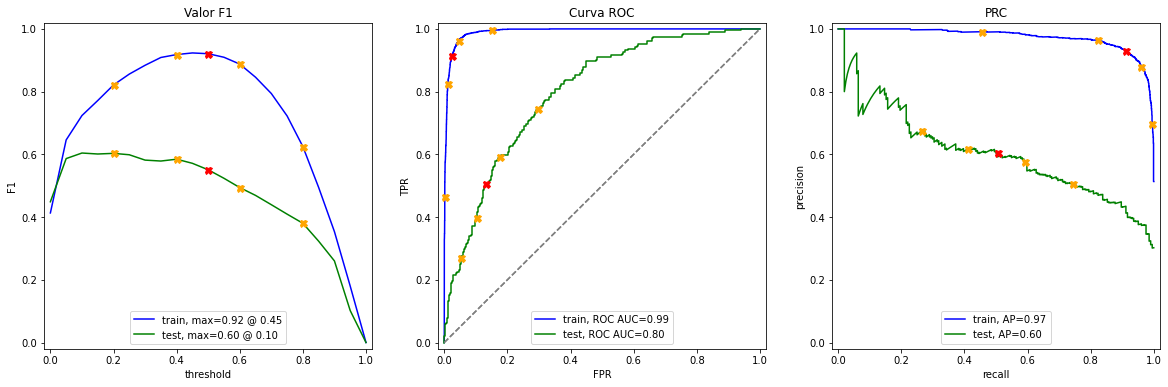

In [96]:
%%time
gbm_evaluation_2 = evaluate_model(lgbm_2, gbm_features_train, target_train, gbm_features_test, target_test)
gbm_evaluation_2

Sigue sin ser un modelo ideal, pero al menos parece menos sobreajustado.

### <a id='toc2_4_2_'></a>[CatBoost](#toc0_)
Vamos a realizar algo similar a lo que hicimos con LightGBM. Lamentablemente no podemos crear una función para ésto ya que hay que fijarse detalladamente en los hiperparámetros de cada modelo.

In [97]:
%%time
maximum = 0 
# Cargamos el modelo
search_cat_model = CatBoostClassifier(cat_features= cat_index)

# Cargamos el dict de posibles parámetros
cat_params = {
    'iterations':[100],
    'learning_rate': list(np.arange(0.1,1,0.05)),
    'random_seed': [37],
    'l2_leaf_reg': list(np.arange(0.5,7.5,0.5)),
    'depth': list(np.arange(4,20)),
    'min_data_in_leaf': list(np.arange(20,100,5)),
    'nan_mode': ['Min','Max'],
    'early_stopping_rounds':[40]
}

# Realizasmos el random_search
best_random_cat_model = search_cat_model.randomized_search(cat_params,
                                               X=features_train, y=target_train,
                                               cv= 5, train_size= 0.8)

# Cargamos el cat_model en una variable con los mejores parámetros encontrados
cat_model = CatBoostClassifier(**best_random_cat_model['params'],cat_features=cat_index)
# De ahi entrenamos el modelo y obtenemos sus predicciones
cat_model.fit(features_train, target_train, 
       cat_features= cat_index,
        eval_set=(features_valid, target_valid), verbose=False)

# Obtenemos las probabilidades de las predicciones
target_test_prob_pred = cat_model.predict_proba(features_valid)

# Finalmente observamos el AUC-ROC en diferentes thresholds
threshold = 0
for threshold in np.arange(0.1,0.9,0.05):
    target_test_pred = (target_test_prob_pred[:, 1] >= threshold).astype(int)
    auc = metrics.roc_auc_score(target_valid, target_test_pred)
    train_auc = metrics.roc_auc_score(target_valid, target_test_pred)


    # Y guardamos los datos si vimos un modelo mejor que el que teníamos
    if auc > maximum:
        maximum = auc
        pp = best_random_cat_model['params']
        tr_auc = train_auc
        best_threshold = threshold
        
print("*" * 70)
print('AUC-ROC máximo obtenido es:', maximum)
print('AUC-ROC de entrenamiento máximo obtenido es:', tr_auc)
print('Con los parámetros:', pp)
print('Y el threshold', "{:.2f}".format(best_threshold))
print("*" * 70)

0:	learn: 0.4396449	test: 0.4505426	best: 0.4505426 (0)	total: 95.8ms	remaining: 9.49s
1:	learn: 0.3788252	test: 0.4500201	best: 0.4500201 (1)	total: 144ms	remaining: 7.06s
2:	learn: 0.3629408	test: 0.4521534	best: 0.4500201 (1)	total: 191ms	remaining: 6.17s
3:	learn: 0.3195321	test: 0.4768217	best: 0.4500201 (1)	total: 236ms	remaining: 5.66s
4:	learn: 0.2912197	test: 0.4788725	best: 0.4500201 (1)	total: 282ms	remaining: 5.36s
5:	learn: 0.2744109	test: 0.4744581	best: 0.4500201 (1)	total: 327ms	remaining: 5.13s
6:	learn: 0.2653316	test: 0.4798075	best: 0.4500201 (1)	total: 375ms	remaining: 4.98s
7:	learn: 0.2653315	test: 0.4798079	best: 0.4500201 (1)	total: 378ms	remaining: 4.34s
8:	learn: 0.2494330	test: 0.4998883	best: 0.4500201 (1)	total: 423ms	remaining: 4.27s
9:	learn: 0.2397955	test: 0.5131881	best: 0.4500201 (1)	total: 469ms	remaining: 4.22s
10:	learn: 0.2397823	test: 0.5132770	best: 0.4500201 (1)	total: 472ms	remaining: 3.82s
11:	learn: 0.2164208	test: 0.5303987	best: 0.4500201

CPU times: user 230 ms, sys: 4.1 ms, total: 234 ms
Wall time: 230 ms


,train,test
Exactitud,0.82,0.79
F1,0.60,0.59
APS,0.69,0.69
ROC AUC,0.86,0.84


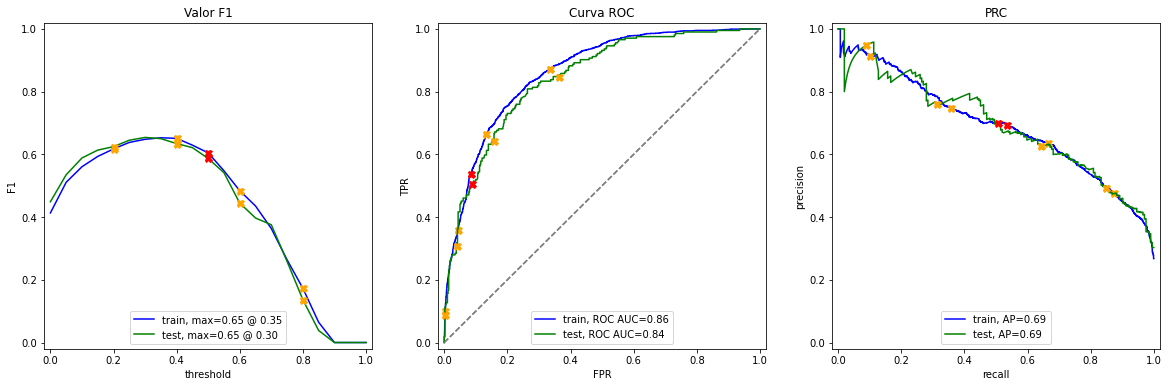

In [98]:
%%time
cat_evaluation_1 = evaluate_model(cat_model, features_train, target_train, features_test, target_test)
cat_evaluation_1

In [99]:
# Ahora obtenemos las features que menos afectan para el modelo
cat_lowest_features = get_lowest_keys(get_feat_imp_dict(cat_model, features_train))

De primera mano vemos como `device_protection` y `streaming_movies` no aportan en absoluto para el modelo por lo que vamos a realizar algo parecido a lo que hicimos previamente.

In [100]:
cat_features_train = features_train.drop(columns=cat_lowest_features)
cat_features_valid = features_valid.drop(columns=cat_lowest_features)
cat_features_test = features_test.drop(columns=cat_lowest_features)

In [101]:
# Y no nos olvidemos de crear nos nuevos indices de las columnas categóricas
# Pero tenemos que asegurarnos de no colocar mal los indices
condition_1 = ( 
    (('type' in cat_lowest_features) and ('paperless_billing' in cat_lowest_features))
    or
    (('type' in cat_lowest_features) and ('payment_method' in cat_lowest_features))
    or
    ('paperless_billing' in cat_lowest_features) and ('payment_method' in cat_lowest_features)
              )

condition_2 = (
    ('type' in cat_lowest_features)
    or
    ('paperless_billing' in cat_lowest_features)
    or
    ('payment_method' in cat_lowest_features)
)

if condition_1:
    cat_index_2 = [0,3,4,5,6,7,8,9,10,11,12,13]

elif condition_2:
    cat_index_2 = [0,1,4,5,6,7,8,9,10,11,12,13]

else:
    cat_index_2 = [0,1,2,5,6,7,8,9,10,11,12,13]

In [102]:
%%time
maximum = 0 
# Cargamos el modelo
search_cat_model = CatBoostClassifier(cat_features= cat_index_2)

# Cargamos el dict de posibles parámetros
cat_params = {
    'iterations':[100],
    'learning_rate': list(np.arange(0.1,1,0.05)),
    'random_seed': [37],
    'l2_leaf_reg': list(np.arange(0.5,7.5,0.5)),
    'depth': list(np.arange(6,10)),
    'min_data_in_leaf': list(np.arange(50,100,2)),
    'nan_mode': ['Min','Max'],
    'early_stopping_rounds':[40]
}

# Realizasmos el random_search
best_random_cat_model_2 = search_cat_model.randomized_search(cat_params,
                                               X=cat_features_train, y=target_train,
                                               cv= 10, train_size= 0.8)

# Cargamos el cat_model en una variable con los mejores parámetros encontrados
cat_model_2 = CatBoostClassifier(**best_random_cat_model_2['params'],cat_features=cat_index_2)
# De ahi entrenamos el modelo y obtenemos sus predicciones
cat_model_2.fit(cat_features_train, target_train, 
       cat_features= cat_index_2,
        eval_set=(cat_features_valid, target_valid), verbose=False)

# Obtenemos las probabilidades de las predicciones
target_test_prob_pred = cat_model_2.predict_proba(cat_features_valid)

# Finalmente observamos el AUC-ROC en diferentes thresholds
threshold = 0
for threshold in np.arange(0.1,0.9,0.05):
    target_test_pred = (target_test_prob_pred[:, 1] >= threshold).astype(int)
    auc = metrics.roc_auc_score(target_valid, target_test_pred)
    train_auc = metrics.roc_auc_score(target_valid, target_test_pred)


    # Y guardamos los datos si vimos un modelo mejor que el que teníamos
    if auc > maximum:
        maximum = auc
        pp = best_random_cat_model_2['params']
        tr_auc = train_auc
        best_threshold = threshold
        
print("*" * 70)
print('AUC-ROC máximo obtenido es:', maximum)
print('AUC-ROC de entrenamiento máximo obtenido es:', tr_auc)
print('Con los parámetros:', pp)
print('Y el threshold', "{:.2f}".format(best_threshold))
print("*" * 70)

0:	learn: 0.5419436	test: 0.5392592	best: 0.5392592 (0)	total: 9.97ms	remaining: 987ms
1:	learn: 0.4698238	test: 0.4797668	best: 0.4797668 (1)	total: 41.5ms	remaining: 2.04s
2:	learn: 0.4344738	test: 0.4472946	best: 0.4472946 (2)	total: 51.9ms	remaining: 1.68s
3:	learn: 0.4176276	test: 0.4336542	best: 0.4336542 (3)	total: 56.2ms	remaining: 1.35s
4:	learn: 0.4026378	test: 0.4261996	best: 0.4261996 (4)	total: 66.2ms	remaining: 1.26s
5:	learn: 0.3940843	test: 0.4233335	best: 0.4233335 (5)	total: 76.2ms	remaining: 1.19s
6:	learn: 0.3854882	test: 0.4208627	best: 0.4208627 (6)	total: 86.8ms	remaining: 1.15s
7:	learn: 0.3838051	test: 0.4212643	best: 0.4208627 (6)	total: 91.5ms	remaining: 1.05s
8:	learn: 0.3784683	test: 0.4224239	best: 0.4208627 (6)	total: 101ms	remaining: 1.02s
9:	learn: 0.3716691	test: 0.4234591	best: 0.4208627 (6)	total: 112ms	remaining: 1s
10:	learn: 0.3637475	test: 0.4220591	best: 0.4208627 (6)	total: 121ms	remaining: 982ms
11:	learn: 0.3589232	test: 0.4246592	best: 0.420

CPU times: user 246 ms, sys: 16 µs, total: 246 ms
Wall time: 255 ms


,train,test
Exactitud,0.82,0.80
F1,0.61,0.60
APS,0.71,0.69
ROC AUC,0.87,0.84


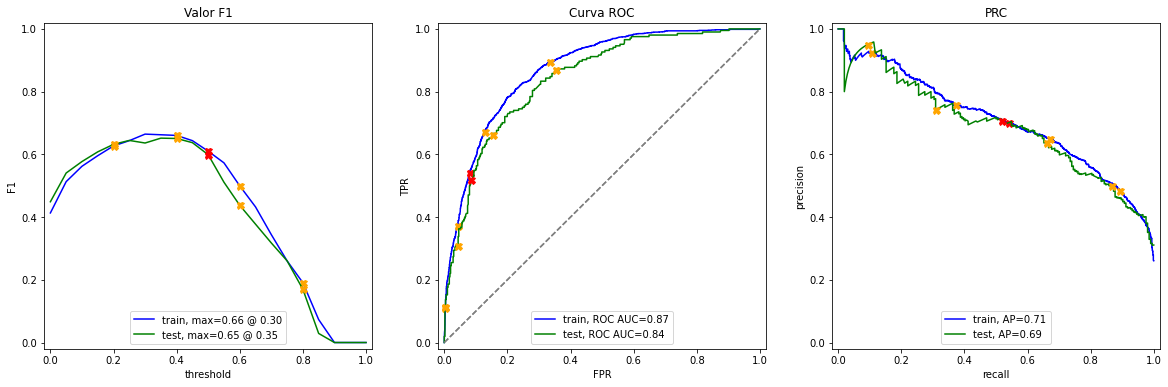

In [103]:
%%time
cat_evaluation_2 = evaluate_model(cat_model_2, cat_features_train, target_train, cat_features_test, target_test)
cat_evaluation_2

Una vez más, remover las columnas innecesarias no dió en un resultado mejor en las métricas pero ciertamente redujo el sobreajuste de nuestro modelo.

## <a id='toc2_5_'></a>[Modelos con seleccion de carácteristicas](#toc0_)
Ahora vamos a probar y comparar que tal fueron mis características separadas.
### <a id='toc2_5_1_'></a>[LightGBM](#toc0_)

In [104]:
%%time
# Ahora replicaremos RandomSearch ya que los datos categóricos complican la situación al usar GBM y RandomSearchCV de sklearn
# Aparte así podemos establecer el eval_set y sacarle todo el jugo al boosting
maximum = 0 
iterations = 75
threshold = 0
for i in range(iterations):
    # Creamos aleatoriamente los parámetros y cargamos con valores aleatorios dentro de los rangos deseados
    params = {}
    params['boosting_type'] = np.random.choice(['gbdt','dart'])
    params['num_leaves'] = np.random.randint(30,750)
    params['max_depth'] = np.random.randint(5,10)
    params['learning_rate'] = np.random.uniform(0.05,0.56)
    params['min_child_samples'] = np.random.randint(30,75)
    params['colsample_bytree'] = np.random.uniform(0.1,1)
    params['early_stopping_round'] = 75
    params['max_bin'] = 128
    params['lambda_l1'] = np.random.uniform(0.01,0.36)
    
    # De ahi entrenamos el modelo y obtenemos sus predicciones
    gbm_model_s = LGBMClassifier(**params)
    gbm_model_s.fit(features_train_s, target_train_s, 
            feature_name='auto', categorical_feature='auto',
            eval_set=[(features_valid_s, target_valid_s)], eval_metric='auc')
    
    # Obtenemos las probabilidades de las predicciones
    target_test_prob_pred = gbm_model_s.predict_proba(features_valid_s)
    
    # Finalmente observamos el AUC-ROC en diferentes thresholds
    threshold = 0
    for threshold in np.arange(0.1,0.9,0.05):
        target_test_pred_s = (target_test_prob_pred[:, 1] >= threshold).astype(int)
        auc = metrics.roc_auc_score(target_valid_s, target_test_pred)
        train_auc = metrics.roc_auc_score(target_valid_s, target_test_pred_s)
        
    
        # Y guardamos los datos si vimos un modelo mejor que el que teníamos
        if auc > maximum:
            maximum = auc
            pp = params
            tr_auc = train_auc
            best_threshold = threshold
        
print("*" * 70)
print('AUC máximo obtenido es:', maximum)
print('AUC de entrenamiento máximo obtenido es:', tr_auc)
print('Con los parámetros:', pp)
print('Y el threshold', "{:.2f}".format(best_threshold))
print("*" * 70)

[LightGBM] [Warning] lambda_l1 is set=0.19798032721118802, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19798032721118802
[1]	valid_0's auc: 0.803599	valid_0's binary_logloss: 0.500186
[2]	valid_0's auc: 0.800206	valid_0's binary_logloss: 0.493955
[3]	valid_0's auc: 0.78718	valid_0's binary_logloss: 0.492349
[4]	valid_0's auc: 0.793873	valid_0's binary_logloss: 0.482947
[5]	valid_0's auc: 0.807846	valid_0's binary_logloss: 0.466847
[6]	valid_0's auc: 0.808525	valid_0's binary_logloss: 0.465346
[7]	valid_0's auc: 0.812308	valid_0's binary_logloss: 0.458735
[8]	valid_0's auc: 0.812288	valid_0's binary_logloss: 0.458874
[9]	valid_0's auc: 0.810556	valid_0's binary_logloss: 0.461087
[10]	valid_0's auc: 0.811594	valid_0's binary_logloss: 0.458147
[11]	valid_0's auc: 0.812108	valid_0's binary_logloss: 0.457292
[12]	valid_0's auc: 0.813007	valid_0's binary_logloss: 0.458323
[13]	valid_0's auc: 0.818671	valid_0's binary_logloss: 0.453481
[14]	valid_0's auc: 0.818312	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[39]	valid_0's auc: 0.830025	valid_0's binary_logloss: 0.44083
[40]	valid_0's auc: 0.830314	valid_0's binary_logloss: 0.440583
[41]	valid_0's auc: 0.829965	valid_0's binary_logloss: 0.440582
[42]	valid_0's auc: 0.830364	valid_0's binary_logloss: 0.439993
[43]	valid_0's auc: 0.830593	valid_0's binary_logloss: 0.439823
[44]	valid_0's auc: 0.830564	valid_0's binary_logloss: 0.439861
[45]	valid_0's auc: 0.830603	valid_0's binary_logloss: 0.439766
[46]	valid_0's auc: 0.830913	valid_0's binary_logloss: 0.438741
[47]	valid_0's auc: 0.831681	valid_0's binary_logloss: 0.437768
[48]	valid_0's auc: 0.831881	valid_0's binary_logloss: 0.437621
[49]	valid_0's auc: 0.832749	valid_0's binary_logloss: 0.436194
[50]	valid_0's auc: 0.832101	valid_0's binary_logloss: 0.436939
[51]	valid_0's auc: 0.83256	valid_0's binary_logloss: 0.436644
[52]	valid_0's auc: 0.832929	valid_0's binary_logloss: 0.436616
[53]	valid_0's auc: 0.833658	valid_0's binary_logloss: 0.435659
[54]	valid_0's auc: 0.833528	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[49]	valid_0's auc: 0.828962	valid_0's binary_logloss: 0.456471
[50]	valid_0's auc: 0.829061	valid_0's binary_logloss: 0.457061
[51]	valid_0's auc: 0.829331	valid_0's binary_logloss: 0.457049
[52]	valid_0's auc: 0.828862	valid_0's binary_logloss: 0.457556
[53]	valid_0's auc: 0.828103	valid_0's binary_logloss: 0.459063
[54]	valid_0's auc: 0.828333	valid_0's binary_logloss: 0.458968
[55]	valid_0's auc: 0.827155	valid_0's binary_logloss: 0.460494
[56]	valid_0's auc: 0.828323	valid_0's binary_logloss: 0.459715
[57]	valid_0's auc: 0.827175	valid_0's binary_logloss: 0.460588
[58]	valid_0's auc: 0.827345	valid_0's binary_logloss: 0.460598
[59]	valid_0's auc: 0.827215	valid_0's binary_logloss: 0.460786
[60]	valid_0's auc: 0.826307	valid_0's binary_logloss: 0.461625
[61]	valid_0's auc: 0.825298	valid_0's binary_logloss: 0.462567
[62]	valid_0's auc: 0.825328	valid_0's binary_logloss: 0.462508
[63]	valid_0's auc: 0.825508	valid_0's binary_logloss: 0.463824
[64]	valid_0's auc: 0.825159	valid_0's b

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[35]	valid_0's auc: 0.850975	valid_0's binary_logloss: 0.422945
[36]	valid_0's auc: 0.850945	valid_0's binary_logloss: 0.42362
[37]	valid_0's auc: 0.851325	valid_0's binary_logloss: 0.422599
[38]	valid_0's auc: 0.851384	valid_0's binary_logloss: 0.422209
[39]	valid_0's auc: 0.851325	valid_0's binary_logloss: 0.421809
[40]	valid_0's auc: 0.851255	valid_0's binary_logloss: 0.421747
[41]	valid_0's auc: 0.850955	valid_0's binary_logloss: 0.422307
[42]	valid_0's auc: 0.851694	valid_0's binary_logloss: 0.421416
[43]	valid_0's auc: 0.851744	valid_0's binary_logloss: 0.421802
[44]	valid_0's auc: 0.851434	valid_0's binary_logloss: 0.421936
[45]	valid_0's auc: 0.851913	valid_0's binary_logloss: 0.42094
[46]	valid_0's auc: 0.851893	valid_0's binary_logloss: 0.420822
[47]	valid_0's auc: 0.851863	valid_0's binary_logloss: 0.420634
[48]	valid_0's auc: 0.851574	valid_0's binary_logloss: 0.420712
[49]	valid_0's auc: 0.851434	valid_0's binary_logloss: 0.421402
[50]	valid_0's auc: 0.851534	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[19]	valid_0's auc: 0.84319	valid_0's binary_logloss: 0.427914
[20]	valid_0's auc: 0.843769	valid_0's binary_logloss: 0.427308
[21]	valid_0's auc: 0.843479	valid_0's binary_logloss: 0.427538
[22]	valid_0's auc: 0.845446	valid_0's binary_logloss: 0.426077
[23]	valid_0's auc: 0.844088	valid_0's binary_logloss: 0.42838
[24]	valid_0's auc: 0.84322	valid_0's binary_logloss: 0.429353
[25]	valid_0's auc: 0.844198	valid_0's binary_logloss: 0.427634
[26]	valid_0's auc: 0.84324	valid_0's binary_logloss: 0.428708
[27]	valid_0's auc: 0.843719	valid_0's binary_logloss: 0.428339
[28]	valid_0's auc: 0.844837	valid_0's binary_logloss: 0.426903
[29]	valid_0's auc: 0.844228	valid_0's binary_logloss: 0.427461
[30]	valid_0's auc: 0.843379	valid_0's binary_logloss: 0.428771
[31]	valid_0's auc: 0.844767	valid_0's binary_logloss: 0.426612
[32]	valid_0's auc: 0.844927	valid_0's binary_logloss: 0.426787
[33]	valid_0's auc: 0.84299	valid_0's binary_logloss: 0.428748
[34]	valid_0's auc: 0.84299	valid_0's binary_

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[12]	valid_0's auc: 0.839352	valid_0's binary_logloss: 0.432989
[13]	valid_0's auc: 0.841184	valid_0's binary_logloss: 0.43123
[14]	valid_0's auc: 0.841333	valid_0's binary_logloss: 0.43121
[15]	valid_0's auc: 0.841792	valid_0's binary_logloss: 0.43096
[16]	valid_0's auc: 0.840824	valid_0's binary_logloss: 0.432098
[17]	valid_0's auc: 0.840585	valid_0's binary_logloss: 0.431973
[18]	valid_0's auc: 0.839577	valid_0's binary_logloss: 0.433356
[19]	valid_0's auc: 0.841683	valid_0's binary_logloss: 0.431496
[20]	valid_0's auc: 0.842192	valid_0's binary_logloss: 0.430611
[21]	valid_0's auc: 0.843529	valid_0's binary_logloss: 0.429845
[22]	valid_0's auc: 0.842671	valid_0's binary_logloss: 0.431446
[23]	valid_0's auc: 0.841982	valid_0's binary_logloss: 0.433327
[24]	valid_0's auc: 0.841762	valid_0's binary_logloss: 0.432894
[25]	valid_0's auc: 0.841678	valid_0's binary_logloss: 0.433381
[26]	valid_0's auc: 0.84019	valid_0's binary_logloss: 0.434945
[27]	valid_0's auc: 0.839442	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[54]	valid_0's auc: 0.843135	valid_0's binary_logloss: 0.427177
[55]	valid_0's auc: 0.843245	valid_0's binary_logloss: 0.42709
[56]	valid_0's auc: 0.843514	valid_0's binary_logloss: 0.426906
[57]	valid_0's auc: 0.843624	valid_0's binary_logloss: 0.426896
[58]	valid_0's auc: 0.843594	valid_0's binary_logloss: 0.426947
[59]	valid_0's auc: 0.843549	valid_0's binary_logloss: 0.426812
[60]	valid_0's auc: 0.844108	valid_0's binary_logloss: 0.426412
[61]	valid_0's auc: 0.844507	valid_0's binary_logloss: 0.426112
[62]	valid_0's auc: 0.844228	valid_0's binary_logloss: 0.426375
[63]	valid_0's auc: 0.844607	valid_0's binary_logloss: 0.42607
[64]	valid_0's auc: 0.844897	valid_0's binary_logloss: 0.425779
[65]	valid_0's auc: 0.845076	valid_0's binary_logloss: 0.425632
[66]	valid_0's auc: 0.844767	valid_0's binary_logloss: 0.425725
[67]	valid_0's auc: 0.844388	valid_0's binary_logloss: 0.425941
[68]	valid_0's auc: 0.844677	valid_0's binary_logloss: 0.425948
[69]	valid_0's auc: 0.844667	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[41]	valid_0's auc: 0.847527	valid_0's binary_logloss: 0.426258
[42]	valid_0's auc: 0.847437	valid_0's binary_logloss: 0.426457
[43]	valid_0's auc: 0.847058	valid_0's binary_logloss: 0.426811
[44]	valid_0's auc: 0.847257	valid_0's binary_logloss: 0.426789
[45]	valid_0's auc: 0.847227	valid_0's binary_logloss: 0.426823
[46]	valid_0's auc: 0.846568	valid_0's binary_logloss: 0.427403
[47]	valid_0's auc: 0.846818	valid_0's binary_logloss: 0.427213
[48]	valid_0's auc: 0.846998	valid_0's binary_logloss: 0.427199
[49]	valid_0's auc: 0.847008	valid_0's binary_logloss: 0.427095
[50]	valid_0's auc: 0.847577	valid_0's binary_logloss: 0.426275
[51]	valid_0's auc: 0.848155	valid_0's binary_logloss: 0.425734
[52]	valid_0's auc: 0.847796	valid_0's binary_logloss: 0.426227
[53]	valid_0's auc: 0.846838	valid_0's binary_logloss: 0.427486
[54]	valid_0's auc: 0.846678	valid_0's binary_logloss: 0.42747
[55]	valid_0's auc: 0.846768	valid_0's binary_logloss: 0.427966
[56]	valid_0's auc: 0.847217	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[59]	valid_0's auc: 0.825538	valid_0's binary_logloss: 0.469518
[60]	valid_0's auc: 0.826017	valid_0's binary_logloss: 0.469837
[61]	valid_0's auc: 0.825658	valid_0's binary_logloss: 0.470382
[62]	valid_0's auc: 0.826097	valid_0's binary_logloss: 0.470255
[63]	valid_0's auc: 0.825887	valid_0's binary_logloss: 0.470535
[64]	valid_0's auc: 0.826047	valid_0's binary_logloss: 0.471302
[65]	valid_0's auc: 0.826626	valid_0's binary_logloss: 0.470312
[66]	valid_0's auc: 0.824899	valid_0's binary_logloss: 0.474158
[67]	valid_0's auc: 0.825159	valid_0's binary_logloss: 0.473916
[68]	valid_0's auc: 0.825628	valid_0's binary_logloss: 0.47477
[69]	valid_0's auc: 0.826346	valid_0's binary_logloss: 0.473077
[70]	valid_0's auc: 0.825259	valid_0's binary_logloss: 0.47578
[71]	valid_0's auc: 0.826516	valid_0's binary_logloss: 0.473735
[72]	valid_0's auc: 0.825967	valid_0's binary_logloss: 0.474769
[73]	valid_0's auc: 0.823662	valid_0's binary_logloss: 0.480219
[74]	valid_0's auc: 0.824869	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.672381	valid_0's binary_logloss: 0.583425
[2]	valid_0's auc: 0.773855	valid_0's binary_logloss: 0.555095
[3]	valid_0's auc: 0.795804	valid_0's binary_logloss: 0.532878
[4]	valid_0's auc: 0.79532	valid_0's binary_logloss: 0.523947
[5]	valid_0's auc: 0.793349	valid_0's binary_logloss: 0.515933
[6]	valid_0's auc: 0.80047	valid_0's binary_logloss: 0.509931
[7]	valid_0's auc: 0.820567	valid_0's binary_logloss: 0.491567
[8]	valid_0's auc: 0.815696	valid_0's binary_logloss: 0.498294
[9]	valid_0's auc: 0.815128	valid_0's binary_logloss: 0.492888
[10]	valid_0's auc: 0.813561	valid_0's binary_logloss: 0.489113
[11]	valid_0's auc: 0.821565	valid_0's binary_logloss: 0.478982
[12]	valid_0's auc: 0.823542	valid_0's binary_logloss: 0.479381
[13]	valid_0's auc: 0.82192	valid_0's binary_logloss: 0.476573
[14]	valid_0's auc: 0.82158	valid_0's binary_logloss: 0.475129
[15]	valid_0's auc: 0.82169	valid_0's binary_logloss: 0.47232
[16]	valid_0's auc: 0.819315	valid_0's binary_logloss: 

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[14]	valid_0's auc: 0.830853	valid_0's binary_logloss: 0.449731
[15]	valid_0's auc: 0.831202	valid_0's binary_logloss: 0.446141
[16]	valid_0's auc: 0.83242	valid_0's binary_logloss: 0.443203
[17]	valid_0's auc: 0.831951	valid_0's binary_logloss: 0.443309
[18]	valid_0's auc: 0.832061	valid_0's binary_logloss: 0.442996
[19]	valid_0's auc: 0.8323	valid_0's binary_logloss: 0.442481
[20]	valid_0's auc: 0.835938	valid_0's binary_logloss: 0.43719
[21]	valid_0's auc: 0.835829	valid_0's binary_logloss: 0.437271
[22]	valid_0's auc: 0.835609	valid_0's binary_logloss: 0.437315
[23]	valid_0's auc: 0.835569	valid_0's binary_logloss: 0.437368
[24]	valid_0's auc: 0.836188	valid_0's binary_logloss: 0.435328
[25]	valid_0's auc: 0.83799	valid_0's binary_logloss: 0.433607
[26]	valid_0's auc: 0.838109	valid_0's binary_logloss: 0.433199
[27]	valid_0's auc: 0.838349	valid_0's binary_logloss: 0.433028
[28]	valid_0's auc: 0.841508	valid_0's binary_logloss: 0.428977
[29]	valid_0's auc: 0.841458	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[23]	valid_0's auc: 0.849154	valid_0's binary_logloss: 0.42196
[24]	valid_0's auc: 0.848445	valid_0's binary_logloss: 0.422175
[25]	valid_0's auc: 0.848355	valid_0's binary_logloss: 0.422135
[26]	valid_0's auc: 0.848764	valid_0's binary_logloss: 0.421355
[27]	valid_0's auc: 0.848964	valid_0's binary_logloss: 0.421064
[28]	valid_0's auc: 0.849064	valid_0's binary_logloss: 0.420768
[29]	valid_0's auc: 0.849124	valid_0's binary_logloss: 0.420668
[30]	valid_0's auc: 0.848744	valid_0's binary_logloss: 0.421137
[31]	valid_0's auc: 0.848225	valid_0's binary_logloss: 0.421457
[32]	valid_0's auc: 0.848684	valid_0's binary_logloss: 0.421091
[33]	valid_0's auc: 0.848595	valid_0's binary_logloss: 0.420915
[34]	valid_0's auc: 0.848056	valid_0's binary_logloss: 0.421662
[35]	valid_0's auc: 0.847517	valid_0's binary_logloss: 0.422155
[36]	valid_0's auc: 0.847467	valid_0's binary_logloss: 0.422528
[37]	valid_0's auc: 0.847028	valid_0's binary_logloss: 0.42265
[38]	valid_0's auc: 0.847058	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')



[23]	valid_0's auc: 0.845331	valid_0's binary_logloss: 0.426656
[24]	valid_0's auc: 0.844577	valid_0's binary_logloss: 0.427285
[25]	valid_0's auc: 0.844657	valid_0's binary_logloss: 0.427485
[26]	valid_0's auc: 0.843933	valid_0's binary_logloss: 0.428458
[27]	valid_0's auc: 0.844612	valid_0's binary_logloss: 0.427531
[28]	valid_0's auc: 0.844712	valid_0's binary_logloss: 0.427551
[29]	valid_0's auc: 0.845001	valid_0's binary_logloss: 0.427271
[30]	valid_0's auc: 0.844218	valid_0's binary_logloss: 0.428544
[31]	valid_0's auc: 0.844427	valid_0's binary_logloss: 0.427963
[32]	valid_0's auc: 0.845575	valid_0's binary_logloss: 0.42667
[33]	valid_0's auc: 0.845655	valid_0's binary_logloss: 0.426937
[34]	valid_0's auc: 0.845431	valid_0's binary_logloss: 0.427236
[35]	valid_0's auc: 0.84553	valid_0's binary_logloss: 0.426985
[36]	valid_0's auc: 0.84556	valid_0's binary_logloss: 0.426746
[37]	valid_0's auc: 0.84591	valid_0's binary_logloss: 0.426204
[38]	valid_0's auc: 0.84555	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[22]	valid_0's auc: 0.843325	valid_0's binary_logloss: 0.431676
[23]	valid_0's auc: 0.844343	valid_0's binary_logloss: 0.429805
[24]	valid_0's auc: 0.843933	valid_0's binary_logloss: 0.430941
[25]	valid_0's auc: 0.844093	valid_0's binary_logloss: 0.430941
[26]	valid_0's auc: 0.843315	valid_0's binary_logloss: 0.432153
[27]	valid_0's auc: 0.842556	valid_0's binary_logloss: 0.433032
[28]	valid_0's auc: 0.84032	valid_0's binary_logloss: 0.435824
[29]	valid_0's auc: 0.839053	valid_0's binary_logloss: 0.437204
[30]	valid_0's auc: 0.838953	valid_0's binary_logloss: 0.437456
[31]	valid_0's auc: 0.837386	valid_0's binary_logloss: 0.440102
[32]	valid_0's auc: 0.836637	valid_0's binary_logloss: 0.440927
[33]	valid_0's auc: 0.835769	valid_0's binary_logloss: 0.442579
[34]	valid_0's auc: 0.835599	valid_0's binary_logloss: 0.443478
[35]	valid_0's auc: 0.835409	valid_0's binary_logloss: 0.444421
[36]	valid_0's auc: 0.836218	valid_0's binary_logloss: 0.443295
[37]	valid_0's auc: 0.836188	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')



[33]	valid_0's auc: 0.841867	valid_0's binary_logloss: 0.433174
[34]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.434554
[35]	valid_0's auc: 0.841248	valid_0's binary_logloss: 0.433661
[36]	valid_0's auc: 0.840919	valid_0's binary_logloss: 0.434149
[37]	valid_0's auc: 0.840969	valid_0's binary_logloss: 0.434079
[38]	valid_0's auc: 0.84025	valid_0's binary_logloss: 0.43532
[39]	valid_0's auc: 0.839492	valid_0's binary_logloss: 0.435806
[40]	valid_0's auc: 0.838833	valid_0's binary_logloss: 0.436875
[41]	valid_0's auc: 0.838693	valid_0's binary_logloss: 0.437416
[42]	valid_0's auc: 0.838304	valid_0's binary_logloss: 0.437515
[43]	valid_0's auc: 0.838524	valid_0's binary_logloss: 0.437236
[44]	valid_0's auc: 0.838334	valid_0's binary_logloss: 0.437826
[45]	valid_0's auc: 0.838743	valid_0's binary_logloss: 0.437893
[46]	valid_0's auc: 0.838005	valid_0's binary_logloss: 0.439174
[47]	valid_0's auc: 0.837286	valid_0's binary_logloss: 0.440403
[48]	valid_0's auc: 0.836238	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[10]	valid_0's auc: 0.846204	valid_0's binary_logloss: 0.426288
[11]	valid_0's auc: 0.846374	valid_0's binary_logloss: 0.426314
[12]	valid_0's auc: 0.847836	valid_0's binary_logloss: 0.423627
[13]	valid_0's auc: 0.848734	valid_0's binary_logloss: 0.422517
[14]	valid_0's auc: 0.847971	valid_0's binary_logloss: 0.422789
[15]	valid_0's auc: 0.847043	valid_0's binary_logloss: 0.423681
[16]	valid_0's auc: 0.847257	valid_0's binary_logloss: 0.424512
[17]	valid_0's auc: 0.846364	valid_0's binary_logloss: 0.425558
[18]	valid_0's auc: 0.848031	valid_0's binary_logloss: 0.424102
[19]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.424854
[20]	valid_0's auc: 0.847906	valid_0's binary_logloss: 0.42437
[21]	valid_0's auc: 0.846703	valid_0's binary_logloss: 0.426117
[22]	valid_0's auc: 0.846983	valid_0's binary_logloss: 0.4256
[23]	valid_0's auc: 0.847132	valid_0's binary_logloss: 0.425618
[24]	valid_0's auc: 0.847102	valid_0's binary_logloss: 0.425446
[25]	valid_0's auc: 0.847192	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[37]	valid_0's auc: 0.84057	valid_0's binary_logloss: 0.428377
[38]	valid_0's auc: 0.840849	valid_0's binary_logloss: 0.427638
[39]	valid_0's auc: 0.842845	valid_0's binary_logloss: 0.42469
[40]	valid_0's auc: 0.842596	valid_0's binary_logloss: 0.424888
[41]	valid_0's auc: 0.842182	valid_0's binary_logloss: 0.425525
[42]	valid_0's auc: 0.841743	valid_0's binary_logloss: 0.425699
[43]	valid_0's auc: 0.841762	valid_0's binary_logloss: 0.42567
[44]	valid_0's auc: 0.84288	valid_0's binary_logloss: 0.42454
[45]	valid_0's auc: 0.84287	valid_0's binary_logloss: 0.42502
[46]	valid_0's auc: 0.842586	valid_0's binary_logloss: 0.424493
[47]	valid_0's auc: 0.842586	valid_0's binary_logloss: 0.424699
[48]	valid_0's auc: 0.842416	valid_0's binary_logloss: 0.425238
[49]	valid_0's auc: 0.843594	valid_0's binary_logloss: 0.424572
[50]	valid_0's auc: 0.844163	valid_0's binary_logloss: 0.42399
[51]	valid_0's auc: 0.843694	valid_0's binary_logloss: 0.424618
[52]	valid_0's auc: 0.845041	valid_0's binary_lo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[36]	valid_0's auc: 0.84332	valid_0's binary_logloss: 0.426172
[37]	valid_0's auc: 0.84311	valid_0's binary_logloss: 0.426346
[38]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.426302
[39]	valid_0's auc: 0.84324	valid_0's binary_logloss: 0.426964
[40]	valid_0's auc: 0.841079	valid_0's binary_logloss: 0.429683
[41]	valid_0's auc: 0.840839	valid_0's binary_logloss: 0.429837
[42]	valid_0's auc: 0.840849	valid_0's binary_logloss: 0.4301
[43]	valid_0's auc: 0.840729	valid_0's binary_logloss: 0.430167
[44]	valid_0's auc: 0.839911	valid_0's binary_logloss: 0.431779
[45]	valid_0's auc: 0.839661	valid_0's binary_logloss: 0.43216
[46]	valid_0's auc: 0.839721	valid_0's binary_logloss: 0.4325
[47]	valid_0's auc: 0.839132	valid_0's binary_logloss: 0.432749
[48]	valid_0's auc: 0.839232	valid_0's binary_logloss: 0.432703
[49]	valid_0's auc: 0.838933	valid_0's binary_logloss: 0.432846
[50]	valid_0's auc: 0.839023	valid_0's binary_logloss: 0.433626
[51]	valid_0's auc: 0.838204	valid_0's binary_lo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.831711	valid_0's binary_logloss: 0.559149
[2]	valid_0's auc: 0.842566	valid_0's binary_logloss: 0.526928
[3]	valid_0's auc: 0.848834	valid_0's binary_logloss: 0.505123
[4]	valid_0's auc: 0.848555	valid_0's binary_logloss: 0.488655
[5]	valid_0's auc: 0.84326	valid_0's binary_logloss: 0.482078
[6]	valid_0's auc: 0.844198	valid_0's binary_logloss: 0.474632
[7]	valid_0's auc: 0.845615	valid_0's binary_logloss: 0.465112
[8]	valid_0's auc: 0.843784	valid_0's binary_logloss: 0.460556
[9]	valid_0's auc: 0.845595	valid_0's binary_logloss: 0.453936
[10]	valid_0's auc: 0.845471	valid_0's binary_logloss: 0.448086
[11]	valid_0's auc: 0.845166	valid_0's binary_logloss: 0.4453
[12]	valid_0's auc: 0.843654	valid_0's binary_logloss: 0.443713
[13]	valid_0's auc: 0.84584	valid_0's binary_logloss: 0.438511
[14]	valid_0's auc: 0.844672	valid_0's binary_logloss: 0.437594
[15]	valid_0's auc: 0.845525	valid_0's binary_logloss: 0.434547
[16]	valid_0's auc: 0.844368	valid_0's binary_logloss

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.831711	valid_0's binary_logloss: 0.519675
[2]	valid_0's auc: 0.842845	valid_0's binary_logloss: 0.474878
[3]	valid_0's auc: 0.845965	valid_0's binary_logloss: 0.453823
[4]	valid_0's auc: 0.848295	valid_0's binary_logloss: 0.441121
[5]	valid_0's auc: 0.843953	valid_0's binary_logloss: 0.439273
[6]	valid_0's auc: 0.845605	valid_0's binary_logloss: 0.435404
[7]	valid_0's auc: 0.847068	valid_0's binary_logloss: 0.42965
[8]	valid_0's auc: 0.845855	valid_0's binary_logloss: 0.433306
[9]	valid_0's auc: 0.846459	valid_0's binary_logloss: 0.429255
[10]	valid_0's auc: 0.845441	valid_0's binary_logloss: 0.42637
[11]	valid_0's auc: 0.842791	valid_0's binary_logloss: 0.428019
[12]	valid_0's auc: 0.844667	valid_0's binary_logloss: 0.426863
[13]	valid_0's auc: 0.847102	valid_0's binary_logloss: 0.423665
[14]	valid_0's auc: 0.84579	valid_0's binary_logloss: 0.425093
[15]	valid_0's auc: 0.844822	valid_0's binary_logloss: 0.426016
[16]	valid_0's auc: 0.841159	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[8]	valid_0's auc: 0.813376	valid_0's binary_logloss: 0.46286
[9]	valid_0's auc: 0.813945	valid_0's binary_logloss: 0.462135
[10]	valid_0's auc: 0.81668	valid_0's binary_logloss: 0.459836
[11]	valid_0's auc: 0.817109	valid_0's binary_logloss: 0.459652
[12]	valid_0's auc: 0.826841	valid_0's binary_logloss: 0.448878
[13]	valid_0's auc: 0.823547	valid_0's binary_logloss: 0.451456
[14]	valid_0's auc: 0.82687	valid_0's binary_logloss: 0.445391
[15]	valid_0's auc: 0.827125	valid_0's binary_logloss: 0.44318
[16]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.44168
[17]	valid_0's auc: 0.828153	valid_0's binary_logloss: 0.441467
[18]	valid_0's auc: 0.828343	valid_0's binary_logloss: 0.441277
[19]	valid_0's auc: 0.829461	valid_0's binary_logloss: 0.440525
[20]	valid_0's auc: 0.837456	valid_0's binary_logloss: 0.431336
[21]	valid_0's auc: 0.835639	valid_0's binary_logloss: 0.43326
[22]	valid_0's auc: 0.835669	valid_0's binary_logloss: 0.433337
[23]	valid_0's auc: 0.835849	valid_0's binary_lo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[52]	valid_0's auc: 0.824575	valid_0's binary_logloss: 0.468973
[53]	valid_0's auc: 0.825014	valid_0's binary_logloss: 0.468342
[54]	valid_0's auc: 0.824375	valid_0's binary_logloss: 0.469008
[55]	valid_0's auc: 0.824804	valid_0's binary_logloss: 0.468724
[56]	valid_0's auc: 0.825024	valid_0's binary_logloss: 0.468908
[57]	valid_0's auc: 0.824934	valid_0's binary_logloss: 0.470166
[58]	valid_0's auc: 0.824715	valid_0's binary_logloss: 0.470692
[59]	valid_0's auc: 0.824695	valid_0's binary_logloss: 0.470932
[60]	valid_0's auc: 0.82197	valid_0's binary_logloss: 0.47594
[61]	valid_0's auc: 0.822309	valid_0's binary_logloss: 0.475068
[62]	valid_0's auc: 0.822509	valid_0's binary_logloss: 0.473952
[63]	valid_0's auc: 0.822728	valid_0's binary_logloss: 0.47542
[64]	valid_0's auc: 0.8219	valid_0's binary_logloss: 0.477041
[65]	valid_0's auc: 0.821071	valid_0's binary_logloss: 0.478321
[66]	valid_0's auc: 0.82167	valid_0's binary_logloss: 0.476293
[67]	valid_0's auc: 0.822224	valid_0's binary_

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[41]	valid_0's auc: 0.812218	valid_0's binary_logloss: 0.473769
[42]	valid_0's auc: 0.815452	valid_0's binary_logloss: 0.470249
[43]	valid_0's auc: 0.815242	valid_0's binary_logloss: 0.470048
[44]	valid_0's auc: 0.814953	valid_0's binary_logloss: 0.470049
[45]	valid_0's auc: 0.813815	valid_0's binary_logloss: 0.470477
[46]	valid_0's auc: 0.813865	valid_0's binary_logloss: 0.470201
[47]	valid_0's auc: 0.81624	valid_0's binary_logloss: 0.466944
[48]	valid_0's auc: 0.818117	valid_0's binary_logloss: 0.464237
[49]	valid_0's auc: 0.823138	valid_0's binary_logloss: 0.459367
[50]	valid_0's auc: 0.822658	valid_0's binary_logloss: 0.459232
[51]	valid_0's auc: 0.822988	valid_0's binary_logloss: 0.458973
[52]	valid_0's auc: 0.822988	valid_0's binary_logloss: 0.458937
[53]	valid_0's auc: 0.826142	valid_0's binary_logloss: 0.454972
[54]	valid_0's auc: 0.826102	valid_0's binary_logloss: 0.454897
[55]	valid_0's auc: 0.825323	valid_0's binary_logloss: 0.454981
[56]	valid_0's auc: 0.825543	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[53]	valid_0's auc: 0.840101	valid_0's binary_logloss: 0.436124
[54]	valid_0's auc: 0.838673	valid_0's binary_logloss: 0.438082
[55]	valid_0's auc: 0.838374	valid_0's binary_logloss: 0.438395
[56]	valid_0's auc: 0.837066	valid_0's binary_logloss: 0.440146
[57]	valid_0's auc: 0.836447	valid_0's binary_logloss: 0.441449
[58]	valid_0's auc: 0.838144	valid_0's binary_logloss: 0.439348
[59]	valid_0's auc: 0.838144	valid_0's binary_logloss: 0.439142
[60]	valid_0's auc: 0.838264	valid_0's binary_logloss: 0.439522
[61]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.439471
[62]	valid_0's auc: 0.838344	valid_0's binary_logloss: 0.439409
[63]	valid_0's auc: 0.839332	valid_0's binary_logloss: 0.437759
[64]	valid_0's auc: 0.839492	valid_0's binary_logloss: 0.437788
[65]	valid_0's auc: 0.838084	valid_0's binary_logloss: 0.439703
[66]	valid_0's auc: 0.836328	valid_0's binary_logloss: 0.441698
[67]	valid_0's auc: 0.835928	valid_0's binary_logloss: 0.442363
[68]	valid_0's auc: 0.83508	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[59]	valid_0's auc: 0.833882	valid_0's binary_logloss: 0.436857
[60]	valid_0's auc: 0.833792	valid_0's binary_logloss: 0.437199
[61]	valid_0's auc: 0.833263	valid_0's binary_logloss: 0.438338
[62]	valid_0's auc: 0.834162	valid_0's binary_logloss: 0.435905
[63]	valid_0's auc: 0.836348	valid_0's binary_logloss: 0.433739
[64]	valid_0's auc: 0.836797	valid_0's binary_logloss: 0.43374
[65]	valid_0's auc: 0.836697	valid_0's binary_logloss: 0.43371
[66]	valid_0's auc: 0.836697	valid_0's binary_logloss: 0.43371
[67]	valid_0's auc: 0.836577	valid_0's binary_logloss: 0.433861
[68]	valid_0's auc: 0.836527	valid_0's binary_logloss: 0.433875
[69]	valid_0's auc: 0.836797	valid_0's binary_logloss: 0.43363
[70]	valid_0's auc: 0.837296	valid_0's binary_logloss: 0.433499
[71]	valid_0's auc: 0.837505	valid_0's binary_logloss: 0.43331
[72]	valid_0's auc: 0.837815	valid_0's binary_logloss: 0.433281
[73]	valid_0's auc: 0.837376	valid_0's binary_logloss: 0.4341
[74]	valid_0's auc: 0.837695	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[29]	valid_0's auc: 0.818641	valid_0's binary_logloss: 0.486296
[30]	valid_0's auc: 0.820807	valid_0's binary_logloss: 0.482961
[31]	valid_0's auc: 0.823053	valid_0's binary_logloss: 0.481769
[32]	valid_0's auc: 0.822843	valid_0's binary_logloss: 0.480616
[33]	valid_0's auc: 0.821276	valid_0's binary_logloss: 0.480166
[34]	valid_0's auc: 0.820827	valid_0's binary_logloss: 0.479097
[35]	valid_0's auc: 0.821755	valid_0's binary_logloss: 0.479483
[36]	valid_0's auc: 0.822094	valid_0's binary_logloss: 0.48074
[37]	valid_0's auc: 0.820897	valid_0's binary_logloss: 0.48033
[38]	valid_0's auc: 0.820687	valid_0's binary_logloss: 0.479321
[39]	valid_0's auc: 0.820607	valid_0's binary_logloss: 0.478211
[40]	valid_0's auc: 0.820902	valid_0's binary_logloss: 0.477736
[41]	valid_0's auc: 0.82157	valid_0's binary_logloss: 0.478262
[42]	valid_0's auc: 0.823637	valid_0's binary_logloss: 0.475017
[43]	valid_0's auc: 0.823676	valid_0's binary_logloss: 0.476097
[44]	valid_0's auc: 0.822559	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[40]	valid_0's auc: 0.834351	valid_0's binary_logloss: 0.440012
[41]	valid_0's auc: 0.834681	valid_0's binary_logloss: 0.439929
[42]	valid_0's auc: 0.835829	valid_0's binary_logloss: 0.43824
[43]	valid_0's auc: 0.835519	valid_0's binary_logloss: 0.438859
[44]	valid_0's auc: 0.835719	valid_0's binary_logloss: 0.438395
[45]	valid_0's auc: 0.835938	valid_0's binary_logloss: 0.438347
[46]	valid_0's auc: 0.836557	valid_0's binary_logloss: 0.437618
[47]	valid_0's auc: 0.836657	valid_0's binary_logloss: 0.437099
[48]	valid_0's auc: 0.836437	valid_0's binary_logloss: 0.437358
[49]	valid_0's auc: 0.836717	valid_0's binary_logloss: 0.437611
[50]	valid_0's auc: 0.835978	valid_0's binary_logloss: 0.438979
[51]	valid_0's auc: 0.835899	valid_0's binary_logloss: 0.439146
[52]	valid_0's auc: 0.834581	valid_0's binary_logloss: 0.439662
[53]	valid_0's auc: 0.834321	valid_0's binary_logloss: 0.440637
[54]	valid_0's auc: 0.836667	valid_0's binary_logloss: 0.437085
[55]	valid_0's auc: 0.837316	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')



[29]	valid_0's auc: 0.841498	valid_0's binary_logloss: 0.432252
[30]	valid_0's auc: 0.842676	valid_0's binary_logloss: 0.431191
[31]	valid_0's auc: 0.842776	valid_0's binary_logloss: 0.430206
[32]	valid_0's auc: 0.842476	valid_0's binary_logloss: 0.431106
[33]	valid_0's auc: 0.842681	valid_0's binary_logloss: 0.431359
[34]	valid_0's auc: 0.842691	valid_0's binary_logloss: 0.431219
[35]	valid_0's auc: 0.84301	valid_0's binary_logloss: 0.43092
[36]	valid_0's auc: 0.842985	valid_0's binary_logloss: 0.430358
[37]	valid_0's auc: 0.842566	valid_0's binary_logloss: 0.431357
[38]	valid_0's auc: 0.842097	valid_0's binary_logloss: 0.431696
[39]	valid_0's auc: 0.841598	valid_0's binary_logloss: 0.432146
[40]	valid_0's auc: 0.841688	valid_0's binary_logloss: 0.431692
[41]	valid_0's auc: 0.842207	valid_0's binary_logloss: 0.430963
[42]	valid_0's auc: 0.842885	valid_0's binary_logloss: 0.430617
[43]	valid_0's auc: 0.842905	valid_0's binary_logloss: 0.430135
[44]	valid_0's auc: 0.84304	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.839127	valid_0's binary_logloss: 0.545173
[2]	valid_0's auc: 0.843055	valid_0's binary_logloss: 0.508679
[3]	valid_0's auc: 0.8456	valid_0's binary_logloss: 0.48312
[4]	valid_0's auc: 0.849119	valid_0's binary_logloss: 0.464614
[5]	valid_0's auc: 0.84846	valid_0's binary_logloss: 0.453442
[6]	valid_0's auc: 0.848021	valid_0's binary_logloss: 0.445146
[7]	valid_0's auc: 0.846439	valid_0's binary_logloss: 0.440292
[8]	valid_0's auc: 0.84844	valid_0's binary_logloss: 0.443103
[9]	valid_0's auc: 0.850007	valid_0's binary_logloss: 0.436447
[10]	valid_0's auc: 0.850281	valid_0's binary_logloss: 0.432047
[11]	valid_0's auc: 0.848934	valid_0's binary_logloss: 0.429316
[12]	valid_0's auc: 0.850012	valid_0's binary_logloss: 0.429794
[13]	valid_0's auc: 0.850351	valid_0's binary_logloss: 0.426753
[14]	valid_0's auc: 0.849882	valid_0's binary_logloss: 0.424964
[15]	valid_0's auc: 0.849044	valid_0's binary_logloss: 0.424332
[16]	valid_0's auc: 0.849054	valid_0's binary_logloss:

/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[28]	valid_0's auc: 0.846059	valid_0's binary_logloss: 0.425822
[29]	valid_0's auc: 0.844612	valid_0's binary_logloss: 0.428774
[30]	valid_0's auc: 0.843794	valid_0's binary_logloss: 0.42893
[31]	valid_0's auc: 0.843354	valid_0's binary_logloss: 0.429359
[32]	valid_0's auc: 0.842825	valid_0's binary_logloss: 0.430876
[33]	valid_0's auc: 0.842676	valid_0's binary_logloss: 0.431314
[34]	valid_0's auc: 0.840999	valid_0's binary_logloss: 0.433723
[35]	valid_0's auc: 0.841039	valid_0's binary_logloss: 0.432995
[36]	valid_0's auc: 0.841149	valid_0's binary_logloss: 0.432197
[37]	valid_0's auc: 0.841857	valid_0's binary_logloss: 0.431431
[38]	valid_0's auc: 0.840749	valid_0's binary_logloss: 0.43343
[39]	valid_0's auc: 0.840919	valid_0's binary_logloss: 0.43359
[40]	valid_0's auc: 0.84069	valid_0's binary_logloss: 0.433205
[41]	valid_0's auc: 0.84067	valid_0's binary_logloss: 0.432599
[42]	valid_0's auc: 0.842865	valid_0's binary_logloss: 0.430974
[43]	valid_0's auc: 0.842825	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[56]	valid_0's auc: 0.837715	valid_0's binary_logloss: 0.435557
[57]	valid_0's auc: 0.837675	valid_0's binary_logloss: 0.43549
[58]	valid_0's auc: 0.838054	valid_0's binary_logloss: 0.435521
[59]	valid_0's auc: 0.837985	valid_0's binary_logloss: 0.435129
[60]	valid_0's auc: 0.838344	valid_0's binary_logloss: 0.435091
[61]	valid_0's auc: 0.838164	valid_0's binary_logloss: 0.435031
[62]	valid_0's auc: 0.838214	valid_0's binary_logloss: 0.435368
[63]	valid_0's auc: 0.838264	valid_0's binary_logloss: 0.435381
[64]	valid_0's auc: 0.838743	valid_0's binary_logloss: 0.434264
[65]	valid_0's auc: 0.839023	valid_0's binary_logloss: 0.434133
[66]	valid_0's auc: 0.839172	valid_0's binary_logloss: 0.433829
[67]	valid_0's auc: 0.838843	valid_0's binary_logloss: 0.433946
[68]	valid_0's auc: 0.838673	valid_0's binary_logloss: 0.434577
[69]	valid_0's auc: 0.838324	valid_0's binary_logloss: 0.434964
[70]	valid_0's auc: 0.837945	valid_0's binary_logloss: 0.435148
[71]	valid_0's auc: 0.838324	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[36]	valid_0's auc: 0.846713	valid_0's binary_logloss: 0.421217
[37]	valid_0's auc: 0.846673	valid_0's binary_logloss: 0.421197
[38]	valid_0's auc: 0.847008	valid_0's binary_logloss: 0.420871
[39]	valid_0's auc: 0.847866	valid_0's binary_logloss: 0.419373
[40]	valid_0's auc: 0.847207	valid_0's binary_logloss: 0.420147
[41]	valid_0's auc: 0.846379	valid_0's binary_logloss: 0.421218
[42]	valid_0's auc: 0.846509	valid_0's binary_logloss: 0.421196
[43]	valid_0's auc: 0.846828	valid_0's binary_logloss: 0.421007
[44]	valid_0's auc: 0.847117	valid_0's binary_logloss: 0.420435
[45]	valid_0's auc: 0.847058	valid_0's binary_logloss: 0.420707
[46]	valid_0's auc: 0.846628	valid_0's binary_logloss: 0.421311
[47]	valid_0's auc: 0.846818	valid_0's binary_logloss: 0.42134
[48]	valid_0's auc: 0.846818	valid_0's binary_logloss: 0.421272
[49]	valid_0's auc: 0.847068	valid_0's binary_logloss: 0.42108
[50]	valid_0's auc: 0.847846	valid_0's binary_logloss: 0.419785
[51]	valid_0's auc: 0.847886	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.842197	valid_0's binary_logloss: 0.507933
[2]	valid_0's auc: 0.851115	valid_0's binary_logloss: 0.465507
[3]	valid_0's auc: 0.850566	valid_0's binary_logloss: 0.44537
[4]	valid_0's auc: 0.848809	valid_0's binary_logloss: 0.435683
[5]	valid_0's auc: 0.847776	valid_0's binary_logloss: 0.43062
[6]	valid_0's auc: 0.850561	valid_0's binary_logloss: 0.426106
[7]	valid_0's auc: 0.849777	valid_0's binary_logloss: 0.425051
[8]	valid_0's auc: 0.848919	valid_0's binary_logloss: 0.424275
[9]	valid_0's auc: 0.849588	valid_0's binary_logloss: 0.423581
[10]	valid_0's auc: 0.847731	valid_0's binary_logloss: 0.424835
[11]	valid_0's auc: 0.847996	valid_0's binary_logloss: 0.423508
[12]	valid_0's auc: 0.847182	valid_0's binary_logloss: 0.424544
[13]	valid_0's auc: 0.846479	valid_0's binary_logloss: 0.425804
[14]	valid_0's auc: 0.845565	valid_0's binary_logloss: 0.426072
[15]	valid_0's auc: 0.844238	valid_0's binary_logloss: 0.427318
[16]	valid_0's auc: 0.846878	valid_0's binary_loglo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[4]	valid_0's auc: 0.837321	valid_0's binary_logloss: 0.477074
[5]	valid_0's auc: 0.838449	valid_0's binary_logloss: 0.465349
[6]	valid_0's auc: 0.839107	valid_0's binary_logloss: 0.45632
[7]	valid_0's auc: 0.84024	valid_0's binary_logloss: 0.448755
[8]	valid_0's auc: 0.839806	valid_0's binary_logloss: 0.443808
[9]	valid_0's auc: 0.84065	valid_0's binary_logloss: 0.439706
[10]	valid_0's auc: 0.842127	valid_0's binary_logloss: 0.436365
[11]	valid_0's auc: 0.842341	valid_0's binary_logloss: 0.434847
[12]	valid_0's auc: 0.841748	valid_0's binary_logloss: 0.433213
[13]	valid_0's auc: 0.843444	valid_0's binary_logloss: 0.431302
[14]	valid_0's auc: 0.84321	valid_0's binary_logloss: 0.430928
[15]	valid_0's auc: 0.84295	valid_0's binary_logloss: 0.430697
[16]	valid_0's auc: 0.843589	valid_0's binary_logloss: 0.429847
[17]	valid_0's auc: 0.84326	valid_0's binary_logloss: 0.43019
[18]	valid_0's auc: 0.844008	valid_0's binary_logloss: 0.429424
[19]	valid_0's auc: 0.844228	valid_0's binary_logloss

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[46]	valid_0's auc: 0.840375	valid_0's binary_logloss: 0.429275
[47]	valid_0's auc: 0.840165	valid_0's binary_logloss: 0.42937
[48]	valid_0's auc: 0.839826	valid_0's binary_logloss: 0.429704
[49]	valid_0's auc: 0.840704	valid_0's binary_logloss: 0.429132
[50]	valid_0's auc: 0.840515	valid_0's binary_logloss: 0.429476
[51]	valid_0's auc: 0.840505	valid_0's binary_logloss: 0.42973
[52]	valid_0's auc: 0.840215	valid_0's binary_logloss: 0.429915
[53]	valid_0's auc: 0.840285	valid_0's binary_logloss: 0.42998
[54]	valid_0's auc: 0.84067	valid_0's binary_logloss: 0.429034
[55]	valid_0's auc: 0.84059	valid_0's binary_logloss: 0.429126
[56]	valid_0's auc: 0.84068	valid_0's binary_logloss: 0.429213
[57]	valid_0's auc: 0.842007	valid_0's binary_logloss: 0.427713
[58]	valid_0's auc: 0.841368	valid_0's binary_logloss: 0.42813
[59]	valid_0's auc: 0.841558	valid_0's binary_logloss: 0.428096
[60]	valid_0's auc: 0.841478	valid_0's binary_logloss: 0.428295
[61]	valid_0's auc: 0.841458	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.740433	valid_0's binary_logloss: 0.56794
[2]	valid_0's auc: 0.810696	valid_0's binary_logloss: 0.536541
[3]	valid_0's auc: 0.805411	valid_0's binary_logloss: 0.523339
[4]	valid_0's auc: 0.816171	valid_0's binary_logloss: 0.50505
[5]	valid_0's auc: 0.816864	valid_0's binary_logloss: 0.498369
[6]	valid_0's auc: 0.828248	valid_0's binary_logloss: 0.485984
[7]	valid_0's auc: 0.823806	valid_0's binary_logloss: 0.482072
[8]	valid_0's auc: 0.823197	valid_0's binary_logloss: 0.485344
[9]	valid_0's auc: 0.822479	valid_0's binary_logloss: 0.481086
[10]	valid_0's auc: 0.82712	valid_0's binary_logloss: 0.472884
[11]	valid_0's auc: 0.831851	valid_0's binary_logloss: 0.463584
[12]	valid_0's auc: 0.832979	valid_0's binary_logloss: 0.464671
[13]	valid_0's auc: 0.831013	valid_0's binary_logloss: 0.462404
[14]	valid_0's auc: 0.834681	valid_0's binary_logloss: 0.455684
[15]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.455727
[16]	valid_0's auc: 0.830648	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[48]	valid_0's auc: 0.844163	valid_0's binary_logloss: 0.427442
[49]	valid_0's auc: 0.844622	valid_0's binary_logloss: 0.426852
[50]	valid_0's auc: 0.844782	valid_0's binary_logloss: 0.426651
[51]	valid_0's auc: 0.844991	valid_0's binary_logloss: 0.426459
[52]	valid_0's auc: 0.844612	valid_0's binary_logloss: 0.42686
[53]	valid_0's auc: 0.844612	valid_0's binary_logloss: 0.427073
[54]	valid_0's auc: 0.844323	valid_0's binary_logloss: 0.427588
[55]	valid_0's auc: 0.843943	valid_0's binary_logloss: 0.428233
[56]	valid_0's auc: 0.843434	valid_0's binary_logloss: 0.428498
[57]	valid_0's auc: 0.843374	valid_0's binary_logloss: 0.428653
[58]	valid_0's auc: 0.843574	valid_0's binary_logloss: 0.428679
[59]	valid_0's auc: 0.843364	valid_0's binary_logloss: 0.428799
[60]	valid_0's auc: 0.843265	valid_0's binary_logloss: 0.42862
[61]	valid_0's auc: 0.843584	valid_0's binary_logloss: 0.42808
[62]	valid_0's auc: 0.843374	valid_0's binary_logloss: 0.428173
[63]	valid_0's auc: 0.843724	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[41]	valid_0's auc: 0.839272	valid_0's binary_logloss: 0.432165
[42]	valid_0's auc: 0.840081	valid_0's binary_logloss: 0.431566
[43]	valid_0's auc: 0.840151	valid_0's binary_logloss: 0.431458
[44]	valid_0's auc: 0.839971	valid_0's binary_logloss: 0.432028
[45]	valid_0's auc: 0.838743	valid_0's binary_logloss: 0.432837
[46]	valid_0's auc: 0.837246	valid_0's binary_logloss: 0.435027
[47]	valid_0's auc: 0.837486	valid_0's binary_logloss: 0.434908
[48]	valid_0's auc: 0.836937	valid_0's binary_logloss: 0.43576
[49]	valid_0's auc: 0.835739	valid_0's binary_logloss: 0.436474
[50]	valid_0's auc: 0.834072	valid_0's binary_logloss: 0.438108
[51]	valid_0's auc: 0.834152	valid_0's binary_logloss: 0.437977
[52]	valid_0's auc: 0.833982	valid_0's binary_logloss: 0.438936
[53]	valid_0's auc: 0.833942	valid_0's binary_logloss: 0.438857
[54]	valid_0's auc: 0.834262	valid_0's binary_logloss: 0.438788
[55]	valid_0's auc: 0.834361	valid_0's binary_logloss: 0.438575
[56]	valid_0's auc: 0.834521	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.831462	valid_0's binary_logloss: 0.559875
[2]	valid_0's auc: 0.839871	valid_0's binary_logloss: 0.530224
[3]	valid_0's auc: 0.848036	valid_0's binary_logloss: 0.508873
[4]	valid_0's auc: 0.847671	valid_0's binary_logloss: 0.492746
[5]	valid_0's auc: 0.844817	valid_0's binary_logloss: 0.485017
[6]	valid_0's auc: 0.848255	valid_0's binary_logloss: 0.476563
[7]	valid_0's auc: 0.849593	valid_0's binary_logloss: 0.466604
[8]	valid_0's auc: 0.847147	valid_0's binary_logloss: 0.462049
[9]	valid_0's auc: 0.84831	valid_0's binary_logloss: 0.455108
[10]	valid_0's auc: 0.849044	valid_0's binary_logloss: 0.448734
[11]	valid_0's auc: 0.848265	valid_0's binary_logloss: 0.445866
[12]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.443782
[13]	valid_0's auc: 0.849458	valid_0's binary_logloss: 0.438286
[14]	valid_0's auc: 0.847397	valid_0's binary_logloss: 0.437761
[15]	valid_0's auc: 0.847971	valid_0's binary_logloss: 0.434681
[16]	valid_0's auc: 0.847287	valid_0's binary_logl

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[28]	valid_0's auc: 0.844747	valid_0's binary_logloss: 0.437399
[29]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.4361
[30]	valid_0's auc: 0.844682	valid_0's binary_logloss: 0.435219
[31]	valid_0's auc: 0.844403	valid_0's binary_logloss: 0.435788
[32]	valid_0's auc: 0.844727	valid_0's binary_logloss: 0.434438
[33]	valid_0's auc: 0.844333	valid_0's binary_logloss: 0.433759
[34]	valid_0's auc: 0.844772	valid_0's binary_logloss: 0.432698
[35]	valid_0's auc: 0.844966	valid_0's binary_logloss: 0.433115
[36]	valid_0's auc: 0.845136	valid_0's binary_logloss: 0.433843
[37]	valid_0's auc: 0.845036	valid_0's binary_logloss: 0.432744
[38]	valid_0's auc: 0.845116	valid_0's binary_logloss: 0.431995
[39]	valid_0's auc: 0.845266	valid_0's binary_logloss: 0.431503
[40]	valid_0's auc: 0.845236	valid_0's binary_logloss: 0.431525
[41]	valid_0's auc: 0.845176	valid_0's binary_logloss: 0.432062
[42]	valid_0's auc: 0.844996	valid_0's binary_logloss: 0.431807
[43]	valid_0's auc: 0.845076	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.80571	valid_0's binary_logloss: 0.566561
[2]	valid_0's auc: 0.799627	valid_0's binary_logloss: 0.561853
[3]	valid_0's auc: 0.782679	valid_0's binary_logloss: 0.554055
[4]	valid_0's auc: 0.783687	valid_0's binary_logloss: 0.544584
[5]	valid_0's auc: 0.80037	valid_0's binary_logloss: 0.527472
[6]	valid_0's auc: 0.795919	valid_0's binary_logloss: 0.522552
[7]	valid_0's auc: 0.80586	valid_0's binary_logloss: 0.509452
[8]	valid_0's auc: 0.808091	valid_0's binary_logloss: 0.507724
[9]	valid_0's auc: 0.803539	valid_0's binary_logloss: 0.505512
[10]	valid_0's auc: 0.811105	valid_0's binary_logloss: 0.496377
[11]	valid_0's auc: 0.807981	valid_0's binary_logloss: 0.494577
[12]	valid_0's auc: 0.810067	valid_0's binary_logloss: 0.492599
[13]	valid_0's auc: 0.813401	valid_0's binary_logloss: 0.489889
[14]	valid_0's auc: 0.813301	valid_0's binary_logloss: 0.489138
[15]	valid_0's auc: 0.812043	valid_0's binary_logloss: 0.48743
[16]	valid_0's auc: 0.811365	valid_0's binary_logloss

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[44]	valid_0's auc: 0.847597	valid_0's binary_logloss: 0.424676
[45]	valid_0's auc: 0.847567	valid_0's binary_logloss: 0.424387
[46]	valid_0's auc: 0.847557	valid_0's binary_logloss: 0.424531
[47]	valid_0's auc: 0.847182	valid_0's binary_logloss: 0.424871
[48]	valid_0's auc: 0.847092	valid_0's binary_logloss: 0.425028
[49]	valid_0's auc: 0.846803	valid_0's binary_logloss: 0.425229
[50]	valid_0's auc: 0.846828	valid_0's binary_logloss: 0.425297
[51]	valid_0's auc: 0.846519	valid_0's binary_logloss: 0.425811
[52]	valid_0's auc: 0.846529	valid_0's binary_logloss: 0.42586
[53]	valid_0's auc: 0.846539	valid_0's binary_logloss: 0.425943
[54]	valid_0's auc: 0.846239	valid_0's binary_logloss: 0.426192
[55]	valid_0's auc: 0.84579	valid_0's binary_logloss: 0.426512
[56]	valid_0's auc: 0.84596	valid_0's binary_logloss: 0.42659
[57]	valid_0's auc: 0.84592	valid_0's binary_logloss: 0.426672
[58]	valid_0's auc: 0.84582	valid_0's binary_logloss: 0.426774
[59]	valid_0's auc: 0.846429	valid_0's binary_

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.752925	valid_0's binary_logloss: 0.526201
[2]	valid_0's auc: 0.754342	valid_0's binary_logloss: 0.523024
[3]	valid_0's auc: 0.757556	valid_0's binary_logloss: 0.498342
[4]	valid_0's auc: 0.777947	valid_0's binary_logloss: 0.492888
[5]	valid_0's auc: 0.785833	valid_0's binary_logloss: 0.489896
[6]	valid_0's auc: 0.789022	valid_0's binary_logloss: 0.487309
[7]	valid_0's auc: 0.797057	valid_0's binary_logloss: 0.484034
[8]	valid_0's auc: 0.802022	valid_0's binary_logloss: 0.484254
[9]	valid_0's auc: 0.816914	valid_0's binary_logloss: 0.469612
[10]	valid_0's auc: 0.815148	valid_0's binary_logloss: 0.469729
[11]	valid_0's auc: 0.816275	valid_0's binary_logloss: 0.460811
[12]	valid_0's auc: 0.825628	valid_0's binary_logloss: 0.458824
[13]	valid_0's auc: 0.827424	valid_0's binary_logloss: 0.454369
[14]	valid_0's auc: 0.828527	valid_0's binary_logloss: 0.452688
[15]	valid_0's auc: 0.829036	valid_0's binary_logloss: 0.448374
[16]	valid_0's auc: 0.829106	valid_0's binary_log

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.831801	valid_0's binary_logloss: 0.519614
[2]	valid_0's auc: 0.842556	valid_0's binary_logloss: 0.475931
[3]	valid_0's auc: 0.845396	valid_0's binary_logloss: 0.45306
[4]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.44304
[5]	valid_0's auc: 0.843654	valid_0's binary_logloss: 0.436851
[6]	valid_0's auc: 0.841897	valid_0's binary_logloss: 0.436027
[7]	valid_0's auc: 0.844947	valid_0's binary_logloss: 0.431523
[8]	valid_0's auc: 0.846289	valid_0's binary_logloss: 0.429026
[9]	valid_0's auc: 0.847152	valid_0's binary_logloss: 0.426782
[10]	valid_0's auc: 0.847686	valid_0's binary_logloss: 0.425231
[11]	valid_0's auc: 0.847262	valid_0's binary_logloss: 0.426402
[12]	valid_0's auc: 0.8457	valid_0's binary_logloss: 0.428089
[13]	valid_0's auc: 0.847467	valid_0's binary_logloss: 0.426029
[14]	valid_0's auc: 0.847142	valid_0's binary_logloss: 0.426572
[15]	valid_0's auc: 0.847482	valid_0's binary_logloss: 0.426135
[16]	valid_0's auc: 0.845855	valid_0's binary_logloss

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.743946	valid_0's binary_logloss: 0.577461
[2]	valid_0's auc: 0.811454	valid_0's binary_logloss: 0.555258
[3]	valid_0's auc: 0.803115	valid_0's binary_logloss: 0.543562
[4]	valid_0's auc: 0.809997	valid_0's binary_logloss: 0.528831
[5]	valid_0's auc: 0.811065	valid_0's binary_logloss: 0.522144
[6]	valid_0's auc: 0.824235	valid_0's binary_logloss: 0.511673
[7]	valid_0's auc: 0.820263	valid_0's binary_logloss: 0.506722
[8]	valid_0's auc: 0.82978	valid_0's binary_logloss: 0.49305
[9]	valid_0's auc: 0.828962	valid_0's binary_logloss: 0.489216
[10]	valid_0's auc: 0.831182	valid_0's binary_logloss: 0.483295
[11]	valid_0's auc: 0.83507	valid_0's binary_logloss: 0.475437
[12]	valid_0's auc: 0.838524	valid_0's binary_logloss: 0.468755
[13]	valid_0's auc: 0.837396	valid_0's binary_logloss: 0.466251
[14]	valid_0's auc: 0.839442	valid_0's binary_logloss: 0.460855
[15]	valid_0's auc: 0.837236	valid_0's binary_logloss: 0.459417
[16]	valid_0's auc: 0.836607	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.803884	valid_0's binary_logloss: 0.539539
[2]	valid_0's auc: 0.798144	valid_0's binary_logloss: 0.532574
[3]	valid_0's auc: 0.786327	valid_0's binary_logloss: 0.522708
[4]	valid_0's auc: 0.789626	valid_0's binary_logloss: 0.511397
[5]	valid_0's auc: 0.801753	valid_0's binary_logloss: 0.492594
[6]	valid_0's auc: 0.800375	valid_0's binary_logloss: 0.48914
[7]	valid_0's auc: 0.808111	valid_0's binary_logloss: 0.476396
[8]	valid_0's auc: 0.808854	valid_0's binary_logloss: 0.477468
[9]	valid_0's auc: 0.806564	valid_0's binary_logloss: 0.477374
[10]	valid_0's auc: 0.810866	valid_0's binary_logloss: 0.469163
[11]	valid_0's auc: 0.809733	valid_0's binary_logloss: 0.469504
[12]	valid_0's auc: 0.810901	valid_0's binary_logloss: 0.471433
[13]	valid_0's auc: 0.815337	valid_0's binary_logloss: 0.467577
[14]	valid_0's auc: 0.815257	valid_0's binary_logloss: 0.467191
[15]	valid_0's auc: 0.814788	valid_0's binary_logloss: 0.46652
[16]	valid_0's auc: 0.814279	valid_0's binary_loglo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[36]	valid_0's auc: 0.843225	valid_0's binary_logloss: 0.428992
[37]	valid_0's auc: 0.843674	valid_0's binary_logloss: 0.428522
[38]	valid_0's auc: 0.843524	valid_0's binary_logloss: 0.428541
[39]	valid_0's auc: 0.842975	valid_0's binary_logloss: 0.429609
[40]	valid_0's auc: 0.843305	valid_0's binary_logloss: 0.429665
[41]	valid_0's auc: 0.843604	valid_0's binary_logloss: 0.429205
[42]	valid_0's auc: 0.843155	valid_0's binary_logloss: 0.429642
[43]	valid_0's auc: 0.843414	valid_0's binary_logloss: 0.429333
[44]	valid_0's auc: 0.843714	valid_0's binary_logloss: 0.429013
[45]	valid_0's auc: 0.843105	valid_0's binary_logloss: 0.429471
[46]	valid_0's auc: 0.843075	valid_0's binary_logloss: 0.428681
[47]	valid_0's auc: 0.842935	valid_0's binary_logloss: 0.428506
[48]	valid_0's auc: 0.842885	valid_0's binary_logloss: 0.428205
[49]	valid_0's auc: 0.842666	valid_0's binary_logloss: 0.428242
[50]	valid_0's auc: 0.842975	valid_0's binary_logloss: 0.42804
[51]	valid_0's auc: 0.843145	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[32]	valid_0's auc: 0.842466	valid_0's binary_logloss: 0.43027
[33]	valid_0's auc: 0.842496	valid_0's binary_logloss: 0.430779
[34]	valid_0's auc: 0.842316	valid_0's binary_logloss: 0.430699
[35]	valid_0's auc: 0.841568	valid_0's binary_logloss: 0.431578
[36]	valid_0's auc: 0.841817	valid_0's binary_logloss: 0.431511
[37]	valid_0's auc: 0.841797	valid_0's binary_logloss: 0.431183
[38]	valid_0's auc: 0.841807	valid_0's binary_logloss: 0.431026
[39]	valid_0's auc: 0.841907	valid_0's binary_logloss: 0.431395
[40]	valid_0's auc: 0.842007	valid_0's binary_logloss: 0.43167
[41]	valid_0's auc: 0.841578	valid_0's binary_logloss: 0.432416
[42]	valid_0's auc: 0.841678	valid_0's binary_logloss: 0.432074
[43]	valid_0's auc: 0.841997	valid_0's binary_logloss: 0.431726
[44]	valid_0's auc: 0.841718	valid_0's binary_logloss: 0.431765
[45]	valid_0's auc: 0.841947	valid_0's binary_logloss: 0.431468
[46]	valid_0's auc: 0.84069	valid_0's binary_logloss: 0.432647
[47]	valid_0's auc: 0.839921	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.828717	valid_0's binary_logloss: 0.525655
[2]	valid_0's auc: 0.838898	valid_0's binary_logloss: 0.481735
[3]	valid_0's auc: 0.843849	valid_0's binary_logloss: 0.458572
[4]	valid_0's auc: 0.84592	valid_0's binary_logloss: 0.4445
[5]	valid_0's auc: 0.842621	valid_0's binary_logloss: 0.442643
[6]	valid_0's auc: 0.84553	valid_0's binary_logloss: 0.436928
[7]	valid_0's auc: 0.847212	valid_0's binary_logloss: 0.430777
[8]	valid_0's auc: 0.846768	valid_0's binary_logloss: 0.434843
[9]	valid_0's auc: 0.847397	valid_0's binary_logloss: 0.429849
[10]	valid_0's auc: 0.847532	valid_0's binary_logloss: 0.425749
[11]	valid_0's auc: 0.845575	valid_0's binary_logloss: 0.42725
[12]	valid_0's auc: 0.846738	valid_0's binary_logloss: 0.425562
[13]	valid_0's auc: 0.848535	valid_0's binary_logloss: 0.422635
[14]	valid_0's auc: 0.848355	valid_0's binary_logloss: 0.422519
[15]	valid_0's auc: 0.849613	valid_0's binary_logloss: 0.420809
[16]	valid_0's auc: 0.846014	valid_0's binary_logloss:

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[36]	valid_0's auc: 0.838948	valid_0's binary_logloss: 0.437843
[37]	valid_0's auc: 0.836762	valid_0's binary_logloss: 0.441202
[38]	valid_0's auc: 0.836592	valid_0's binary_logloss: 0.440652
[39]	valid_0's auc: 0.835844	valid_0's binary_logloss: 0.441279
[40]	valid_0's auc: 0.835764	valid_0's binary_logloss: 0.441277
[41]	valid_0's auc: 0.835824	valid_0's binary_logloss: 0.440903
[42]	valid_0's auc: 0.835215	valid_0's binary_logloss: 0.441523
[43]	valid_0's auc: 0.835943	valid_0's binary_logloss: 0.440707
[44]	valid_0's auc: 0.835644	valid_0's binary_logloss: 0.441759
[45]	valid_0's auc: 0.835794	valid_0's binary_logloss: 0.441814
[46]	valid_0's auc: 0.835065	valid_0's binary_logloss: 0.439469
[47]	valid_0's auc: 0.835544	valid_0's binary_logloss: 0.440115
[48]	valid_0's auc: 0.835045	valid_0's binary_logloss: 0.441618
[49]	valid_0's auc: 0.835015	valid_0's binary_logloss: 0.441389
[50]	valid_0's auc: 0.835474	valid_0's binary_logloss: 0.440305
[51]	valid_0's auc: 0.835454	valid_0's b

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[58]	valid_0's auc: 0.820353	valid_0's binary_logloss: 0.468715
[59]	valid_0's auc: 0.823986	valid_0's binary_logloss: 0.464447
[60]	valid_0's auc: 0.824225	valid_0's binary_logloss: 0.463906
[61]	valid_0's auc: 0.823597	valid_0's binary_logloss: 0.4641
[62]	valid_0's auc: 0.823307	valid_0's binary_logloss: 0.464087
[63]	valid_0's auc: 0.825673	valid_0's binary_logloss: 0.461348
[64]	valid_0's auc: 0.82688	valid_0's binary_logloss: 0.459406
[65]	valid_0's auc: 0.826761	valid_0's binary_logloss: 0.459263
[66]	valid_0's auc: 0.826571	valid_0's binary_logloss: 0.45914
[67]	valid_0's auc: 0.826052	valid_0's binary_logloss: 0.459107
[68]	valid_0's auc: 0.826152	valid_0's binary_logloss: 0.458737
[69]	valid_0's auc: 0.825962	valid_0's binary_logloss: 0.458546
[70]	valid_0's auc: 0.825693	valid_0's binary_logloss: 0.45854
[71]	valid_0's auc: 0.826391	valid_0's binary_logloss: 0.457736
[72]	valid_0's auc: 0.826611	valid_0's binary_logloss: 0.457577
[73]	valid_0's auc: 0.826287	valid_0's binary

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[49]	valid_0's auc: 0.846683	valid_0's binary_logloss: 0.424745
[50]	valid_0's auc: 0.846763	valid_0's binary_logloss: 0.424263
[51]	valid_0's auc: 0.846743	valid_0's binary_logloss: 0.423981
[52]	valid_0's auc: 0.846444	valid_0's binary_logloss: 0.424551
[53]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.424614
[54]	valid_0's auc: 0.846743	valid_0's binary_logloss: 0.424405
[55]	valid_0's auc: 0.846563	valid_0's binary_logloss: 0.424759
[56]	valid_0's auc: 0.846603	valid_0's binary_logloss: 0.424838
[57]	valid_0's auc: 0.845665	valid_0's binary_logloss: 0.426072
[58]	valid_0's auc: 0.845735	valid_0's binary_logloss: 0.425929
[59]	valid_0's auc: 0.84574	valid_0's binary_logloss: 0.426093
[60]	valid_0's auc: 0.845351	valid_0's binary_logloss: 0.426516
[61]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.426887
[62]	valid_0's auc: 0.844842	valid_0's binary_logloss: 0.42732
[63]	valid_0's auc: 0.844792	valid_0's binary_logloss: 0.426738
[64]	valid_0's auc: 0.844892	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[48]	valid_0's auc: 0.833084	valid_0's binary_logloss: 0.451468
[49]	valid_0's auc: 0.833403	valid_0's binary_logloss: 0.451304
[50]	valid_0's auc: 0.832705	valid_0's binary_logloss: 0.4526
[51]	valid_0's auc: 0.832605	valid_0's binary_logloss: 0.453811
[52]	valid_0's auc: 0.831916	valid_0's binary_logloss: 0.45596
[53]	valid_0's auc: 0.831866	valid_0's binary_logloss: 0.455925
[54]	valid_0's auc: 0.832515	valid_0's binary_logloss: 0.455406
[55]	valid_0's auc: 0.831377	valid_0's binary_logloss: 0.456547
[56]	valid_0's auc: 0.832225	valid_0's binary_logloss: 0.455693
[57]	valid_0's auc: 0.832734	valid_0's binary_logloss: 0.455405
[58]	valid_0's auc: 0.832784	valid_0's binary_logloss: 0.455628
[59]	valid_0's auc: 0.832764	valid_0's binary_logloss: 0.455956
[60]	valid_0's auc: 0.831627	valid_0's binary_logloss: 0.45756
[61]	valid_0's auc: 0.831147	valid_0's binary_logloss: 0.457808
[62]	valid_0's auc: 0.830628	valid_0's binary_logloss: 0.459771
[63]	valid_0's auc: 0.831247	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[22]	valid_0's auc: 0.847552	valid_0's binary_logloss: 0.423656
[23]	valid_0's auc: 0.847741	valid_0's binary_logloss: 0.423873
[24]	valid_0's auc: 0.847741	valid_0's binary_logloss: 0.424066
[25]	valid_0's auc: 0.846743	valid_0's binary_logloss: 0.425827
[26]	valid_0's auc: 0.846289	valid_0's binary_logloss: 0.42655
[27]	valid_0's auc: 0.846648	valid_0's binary_logloss: 0.426087
[28]	valid_0's auc: 0.847387	valid_0's binary_logloss: 0.425385
[29]	valid_0's auc: 0.846878	valid_0's binary_logloss: 0.426012
[30]	valid_0's auc: 0.84595	valid_0's binary_logloss: 0.4272
[31]	valid_0's auc: 0.846898	valid_0's binary_logloss: 0.425747
[32]	valid_0's auc: 0.847577	valid_0's binary_logloss: 0.425675
[33]	valid_0's auc: 0.847716	valid_0's binary_logloss: 0.425583
[34]	valid_0's auc: 0.84576	valid_0's binary_logloss: 0.428048
[35]	valid_0's auc: 0.84563	valid_0's binary_logloss: 0.427896
[36]	valid_0's auc: 0.84557	valid_0's binary_logloss: 0.427199
[37]	valid_0's auc: 0.845101	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[65]	valid_0's auc: 0.846174	valid_0's binary_logloss: 0.422084
[66]	valid_0's auc: 0.846224	valid_0's binary_logloss: 0.422074
[67]	valid_0's auc: 0.845166	valid_0's binary_logloss: 0.423159
[68]	valid_0's auc: 0.845485	valid_0's binary_logloss: 0.423281
[69]	valid_0's auc: 0.845226	valid_0's binary_logloss: 0.4235
[70]	valid_0's auc: 0.845286	valid_0's binary_logloss: 0.423545
[71]	valid_0's auc: 0.845346	valid_0's binary_logloss: 0.423465
[72]	valid_0's auc: 0.845845	valid_0's binary_logloss: 0.423457
[73]	valid_0's auc: 0.845975	valid_0's binary_logloss: 0.423584
[74]	valid_0's auc: 0.845386	valid_0's binary_logloss: 0.423891
[75]	valid_0's auc: 0.845755	valid_0's binary_logloss: 0.423477
[76]	valid_0's auc: 0.846304	valid_0's binary_logloss: 0.423187
[77]	valid_0's auc: 0.846464	valid_0's binary_logloss: 0.423032
[78]	valid_0's auc: 0.846374	valid_0's binary_logloss: 0.422983
[79]	valid_0's auc: 0.846344	valid_0's binary_logloss: 0.423067
[80]	valid_0's auc: 0.846129	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[43]	valid_0's auc: 0.829341	valid_0's binary_logloss: 0.462388
[44]	valid_0's auc: 0.83002	valid_0's binary_logloss: 0.462547
[45]	valid_0's auc: 0.829251	valid_0's binary_logloss: 0.465351
[46]	valid_0's auc: 0.827684	valid_0's binary_logloss: 0.468786
[47]	valid_0's auc: 0.827145	valid_0's binary_logloss: 0.47127
[48]	valid_0's auc: 0.826915	valid_0's binary_logloss: 0.472789
[49]	valid_0's auc: 0.825997	valid_0's binary_logloss: 0.47385
[50]	valid_0's auc: 0.825268	valid_0's binary_logloss: 0.475447
[51]	valid_0's auc: 0.825119	valid_0's binary_logloss: 0.475945
[52]	valid_0's auc: 0.824161	valid_0's binary_logloss: 0.478649
[53]	valid_0's auc: 0.823152	valid_0's binary_logloss: 0.480503
[54]	valid_0's auc: 0.823302	valid_0's binary_logloss: 0.479494
[55]	valid_0's auc: 0.822065	valid_0's binary_logloss: 0.482321
[56]	valid_0's auc: 0.821306	valid_0's binary_logloss: 0.484544
[57]	valid_0's auc: 0.821256	valid_0's binary_logloss: 0.485681
[58]	valid_0's auc: 0.820547	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[39]	valid_0's auc: 0.844922	valid_0's binary_logloss: 0.429327
[40]	valid_0's auc: 0.844083	valid_0's binary_logloss: 0.429707
[41]	valid_0's auc: 0.843444	valid_0's binary_logloss: 0.430453
[42]	valid_0's auc: 0.843544	valid_0's binary_logloss: 0.430394
[43]	valid_0's auc: 0.843654	valid_0's binary_logloss: 0.430211
[44]	valid_0's auc: 0.843973	valid_0's binary_logloss: 0.42908
[45]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.429136
[46]	valid_0's auc: 0.843315	valid_0's binary_logloss: 0.42956
[47]	valid_0's auc: 0.843434	valid_0's binary_logloss: 0.42942
[48]	valid_0's auc: 0.843384	valid_0's binary_logloss: 0.429422
[49]	valid_0's auc: 0.843704	valid_0's binary_logloss: 0.428588
[50]	valid_0's auc: 0.844712	valid_0's binary_logloss: 0.426932
[51]	valid_0's auc: 0.844732	valid_0's binary_logloss: 0.42682
[52]	valid_0's auc: 0.844552	valid_0's binary_logloss: 0.426669
[53]	valid_0's auc: 0.844772	valid_0's binary_logloss: 0.426582
[54]	valid_0's auc: 0.844832	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.747654	valid_0's binary_logloss: 0.564139
[2]	valid_0's auc: 0.81364	valid_0's binary_logloss: 0.530033
[3]	valid_0's auc: 0.804527	valid_0's binary_logloss: 0.517023
[4]	valid_0's auc: 0.815522	valid_0's binary_logloss: 0.49837
[5]	valid_0's auc: 0.815367	valid_0's binary_logloss: 0.491995
[6]	valid_0's auc: 0.827574	valid_0's binary_logloss: 0.479987
[7]	valid_0's auc: 0.823222	valid_0's binary_logloss: 0.476698
[8]	valid_0's auc: 0.823182	valid_0's binary_logloss: 0.479818
[9]	valid_0's auc: 0.820967	valid_0's binary_logloss: 0.47602
[10]	valid_0's auc: 0.826436	valid_0's binary_logloss: 0.467791
[11]	valid_0's auc: 0.831666	valid_0's binary_logloss: 0.458764
[12]	valid_0's auc: 0.83249	valid_0's binary_logloss: 0.459701
[13]	valid_0's auc: 0.831342	valid_0's binary_logloss: 0.45737
[14]	valid_0's auc: 0.83509	valid_0's binary_logloss: 0.450855
[15]	valid_0's auc: 0.832799	valid_0's binary_logloss: 0.45069
[16]	valid_0's auc: 0.831911	valid_0's binary_logloss: 0

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[14]	valid_0's auc: 0.846988	valid_0's binary_logloss: 0.427734
[15]	valid_0's auc: 0.847192	valid_0's binary_logloss: 0.426957
[16]	valid_0's auc: 0.847287	valid_0's binary_logloss: 0.426323
[17]	valid_0's auc: 0.84853	valid_0's binary_logloss: 0.42509
[18]	valid_0's auc: 0.848081	valid_0's binary_logloss: 0.42481
[19]	valid_0's auc: 0.84833	valid_0's binary_logloss: 0.424485
[20]	valid_0's auc: 0.8484	valid_0's binary_logloss: 0.424298
[21]	valid_0's auc: 0.847482	valid_0's binary_logloss: 0.425272
[22]	valid_0's auc: 0.846813	valid_0's binary_logloss: 0.425641
[23]	valid_0's auc: 0.846818	valid_0's binary_logloss: 0.425271
[24]	valid_0's auc: 0.847427	valid_0's binary_logloss: 0.425008
[25]	valid_0's auc: 0.847906	valid_0's binary_logloss: 0.425102
[26]	valid_0's auc: 0.846798	valid_0's binary_logloss: 0.426096
[27]	valid_0's auc: 0.846509	valid_0's binary_logloss: 0.425724
[28]	valid_0's auc: 0.846319	valid_0's binary_logloss: 0.426019
[29]	valid_0's auc: 0.846079	valid_0's binary_

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.828767	valid_0's binary_logloss: 0.556014
[2]	valid_0's auc: 0.833972	valid_0's binary_logloss: 0.52749
[3]	valid_0's auc: 0.836897	valid_0's binary_logloss: 0.50621
[4]	valid_0's auc: 0.838813	valid_0's binary_logloss: 0.489696
[5]	valid_0's auc: 0.839791	valid_0's binary_logloss: 0.476942
[6]	valid_0's auc: 0.842222	valid_0's binary_logloss: 0.466424
[7]	valid_0's auc: 0.843449	valid_0's binary_logloss: 0.458812
[8]	valid_0's auc: 0.844807	valid_0's binary_logloss: 0.451804
[9]	valid_0's auc: 0.845311	valid_0's binary_logloss: 0.44667
[10]	valid_0's auc: 0.845111	valid_0's binary_logloss: 0.442968
[11]	valid_0's auc: 0.844587	valid_0's binary_logloss: 0.439632
[12]	valid_0's auc: 0.844183	valid_0's binary_logloss: 0.43722
[13]	valid_0's auc: 0.845146	valid_0's binary_logloss: 0.43475
[14]	valid_0's auc: 0.844917	valid_0's binary_logloss: 0.433296
[15]	valid_0's auc: 0.844572	valid_0's binary_logloss: 0.432075
[16]	valid_0's auc: 0.843684	valid_0's binary_logloss:

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[7]	valid_0's auc: 0.832979	valid_0's binary_logloss: 0.445139
[8]	valid_0's auc: 0.831322	valid_0's binary_logloss: 0.445504
[9]	valid_0's auc: 0.831387	valid_0's binary_logloss: 0.444521
[10]	valid_0's auc: 0.831537	valid_0's binary_logloss: 0.443615
[11]	valid_0's auc: 0.835754	valid_0's binary_logloss: 0.437461
[12]	valid_0's auc: 0.839721	valid_0's binary_logloss: 0.431408
[13]	valid_0's auc: 0.839482	valid_0's binary_logloss: 0.43167
[14]	valid_0's auc: 0.839202	valid_0's binary_logloss: 0.431891
[15]	valid_0's auc: 0.84021	valid_0's binary_logloss: 0.430769
[16]	valid_0's auc: 0.839232	valid_0's binary_logloss: 0.432361
[17]	valid_0's auc: 0.838005	valid_0's binary_logloss: 0.433421
[18]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.4334
[19]	valid_0's auc: 0.837466	valid_0's binary_logloss: 0.433521
[20]	valid_0's auc: 0.839512	valid_0's binary_logloss: 0.431873
[21]	valid_0's auc: 0.839063	valid_0's binary_logloss: 0.432373
[22]	valid_0's auc: 0.839432	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[5]	valid_0's auc: 0.839891	valid_0's binary_logloss: 0.44083
[6]	valid_0's auc: 0.841159	valid_0's binary_logloss: 0.435645
[7]	valid_0's auc: 0.841922	valid_0's binary_logloss: 0.43272
[8]	valid_0's auc: 0.843614	valid_0's binary_logloss: 0.430643
[9]	valid_0's auc: 0.843694	valid_0's binary_logloss: 0.429278
[10]	valid_0's auc: 0.843504	valid_0's binary_logloss: 0.428677
[11]	valid_0's auc: 0.843849	valid_0's binary_logloss: 0.428601
[12]	valid_0's auc: 0.844912	valid_0's binary_logloss: 0.427088
[13]	valid_0's auc: 0.845006	valid_0's binary_logloss: 0.426861
[14]	valid_0's auc: 0.846084	valid_0's binary_logloss: 0.426089
[15]	valid_0's auc: 0.843689	valid_0's binary_logloss: 0.42913
[16]	valid_0's auc: 0.843759	valid_0's binary_logloss: 0.42854
[17]	valid_0's auc: 0.843275	valid_0's binary_logloss: 0.429028
[18]	valid_0's auc: 0.842396	valid_0's binary_logloss: 0.430544
[19]	valid_0's auc: 0.842257	valid_0's binary_logloss: 0.430102
[20]	valid_0's auc: 0.841952	valid_0's binary_log

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[35]	valid_0's auc: 0.834002	valid_0's binary_logloss: 0.451932
[36]	valid_0's auc: 0.832061	valid_0's binary_logloss: 0.454348
[37]	valid_0's auc: 0.83242	valid_0's binary_logloss: 0.454403
[38]	valid_0's auc: 0.831761	valid_0's binary_logloss: 0.455339
[39]	valid_0's auc: 0.831981	valid_0's binary_logloss: 0.455543
[40]	valid_0's auc: 0.830683	valid_0's binary_logloss: 0.45933
[41]	valid_0's auc: 0.830414	valid_0's binary_logloss: 0.459878
[42]	valid_0's auc: 0.828298	valid_0's binary_logloss: 0.464391
[43]	valid_0's auc: 0.828028	valid_0's binary_logloss: 0.464705
[44]	valid_0's auc: 0.827839	valid_0's binary_logloss: 0.465215
[45]	valid_0's auc: 0.830873	valid_0's binary_logloss: 0.461393
[46]	valid_0's auc: 0.830803	valid_0's binary_logloss: 0.460975
[47]	valid_0's auc: 0.830244	valid_0's binary_logloss: 0.462997
[48]	valid_0's auc: 0.831152	valid_0's binary_logloss: 0.463148
[49]	valid_0's auc: 0.831761	valid_0's binary_logloss: 0.462989
[50]	valid_0's auc: 0.831442	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[12]	valid_0's auc: 0.839507	valid_0's binary_logloss: 0.432388
[13]	valid_0's auc: 0.839706	valid_0's binary_logloss: 0.432462
[14]	valid_0's auc: 0.840984	valid_0's binary_logloss: 0.430183
[15]	valid_0's auc: 0.838868	valid_0's binary_logloss: 0.432426
[16]	valid_0's auc: 0.837091	valid_0's binary_logloss: 0.434215
[17]	valid_0's auc: 0.836981	valid_0's binary_logloss: 0.434292
[18]	valid_0's auc: 0.841114	valid_0's binary_logloss: 0.429991
[19]	valid_0's auc: 0.840126	valid_0's binary_logloss: 0.4315
[20]	valid_0's auc: 0.840874	valid_0's binary_logloss: 0.430136
[21]	valid_0's auc: 0.839786	valid_0's binary_logloss: 0.4317
[22]	valid_0's auc: 0.839986	valid_0's binary_logloss: 0.431829
[23]	valid_0's auc: 0.840026	valid_0's binary_logloss: 0.431516
[24]	valid_0's auc: 0.839367	valid_0's binary_logloss: 0.432327
[25]	valid_0's auc: 0.839347	valid_0's binary_logloss: 0.432978
[26]	valid_0's auc: 0.838259	valid_0's binary_logloss: 0.433725
[27]	valid_0's auc: 0.838329	valid_0's binar

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[24]	valid_0's auc: 0.839771	valid_0's binary_logloss: 0.433745
[25]	valid_0's auc: 0.839691	valid_0's binary_logloss: 0.434487
[26]	valid_0's auc: 0.84023	valid_0's binary_logloss: 0.433979
[27]	valid_0's auc: 0.84054	valid_0's binary_logloss: 0.43369
[28]	valid_0's auc: 0.84045	valid_0's binary_logloss: 0.432886
[29]	valid_0's auc: 0.839951	valid_0's binary_logloss: 0.434935
[30]	valid_0's auc: 0.839142	valid_0's binary_logloss: 0.43612
[31]	valid_0's auc: 0.838773	valid_0's binary_logloss: 0.436152
[32]	valid_0's auc: 0.839302	valid_0's binary_logloss: 0.435731
[33]	valid_0's auc: 0.839641	valid_0's binary_logloss: 0.435764
[34]	valid_0's auc: 0.838763	valid_0's binary_logloss: 0.436168
[35]	valid_0's auc: 0.840081	valid_0's binary_logloss: 0.434466
[36]	valid_0's auc: 0.84051	valid_0's binary_logloss: 0.433087
[37]	valid_0's auc: 0.841638	valid_0's binary_logloss: 0.431728
[38]	valid_0's auc: 0.841119	valid_0's binary_logloss: 0.432323
[39]	valid_0's auc: 0.84068	valid_0's binary_l

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[48]	valid_0's auc: 0.831362	valid_0's binary_logloss: 0.436952
[49]	valid_0's auc: 0.832779	valid_0's binary_logloss: 0.435646
[50]	valid_0's auc: 0.8322	valid_0's binary_logloss: 0.436516
[51]	valid_0's auc: 0.8325	valid_0's binary_logloss: 0.436302
[52]	valid_0's auc: 0.8327	valid_0's binary_logloss: 0.436273
[53]	valid_0's auc: 0.833638	valid_0's binary_logloss: 0.435614
[54]	valid_0's auc: 0.833298	valid_0's binary_logloss: 0.435836
[55]	valid_0's auc: 0.831781	valid_0's binary_logloss: 0.437346
[56]	valid_0's auc: 0.83229	valid_0's binary_logloss: 0.437125
[57]	valid_0's auc: 0.83229	valid_0's binary_logloss: 0.437026
[58]	valid_0's auc: 0.832071	valid_0's binary_logloss: 0.437032
[59]	valid_0's auc: 0.834227	valid_0's binary_logloss: 0.435088
[60]	valid_0's auc: 0.834606	valid_0's binary_logloss: 0.434734
[61]	valid_0's auc: 0.833598	valid_0's binary_logloss: 0.436099
[62]	valid_0's auc: 0.833628	valid_0's binary_logloss: 0.436473
[63]	valid_0's auc: 0.836243	valid_0's binary_lo

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[36]	valid_0's auc: 0.848475	valid_0's binary_logloss: 0.423229
[37]	valid_0's auc: 0.848595	valid_0's binary_logloss: 0.42286
[38]	valid_0's auc: 0.848235	valid_0's binary_logloss: 0.423111
[39]	valid_0's auc: 0.848165	valid_0's binary_logloss: 0.42312
[40]	valid_0's auc: 0.848834	valid_0's binary_logloss: 0.422469
[41]	valid_0's auc: 0.848245	valid_0's binary_logloss: 0.422845
[42]	valid_0's auc: 0.848744	valid_0's binary_logloss: 0.422439
[43]	valid_0's auc: 0.848954	valid_0's binary_logloss: 0.422162
[44]	valid_0's auc: 0.848694	valid_0's binary_logloss: 0.422374
[45]	valid_0's auc: 0.848914	valid_0's binary_logloss: 0.422089
[46]	valid_0's auc: 0.848824	valid_0's binary_logloss: 0.422042
[47]	valid_0's auc: 0.848794	valid_0's binary_logloss: 0.422126
[48]	valid_0's auc: 0.848684	valid_0's binary_logloss: 0.422053
[49]	valid_0's auc: 0.849054	valid_0's binary_logloss: 0.421633
[50]	valid_0's auc: 0.849513	valid_0's binary_logloss: 0.421241
[51]	valid_0's auc: 0.849443	valid_0's bin

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.629232	valid_0's binary_logloss: 0.588083
[2]	valid_0's auc: 0.688501	valid_0's binary_logloss: 0.579073
[3]	valid_0's auc: 0.799816	valid_0's binary_logloss: 0.548774
[4]	valid_0's auc: 0.820118	valid_0's binary_logloss: 0.525582
[5]	valid_0's auc: 0.820253	valid_0's binary_logloss: 0.522033
[6]	valid_0's auc: 0.811619	valid_0's binary_logloss: 0.518931
[7]	valid_0's auc: 0.809867	valid_0's binary_logloss: 0.51235
[8]	valid_0's auc: 0.811964	valid_0's binary_logloss: 0.511879
[9]	valid_0's auc: 0.809348	valid_0's binary_logloss: 0.509532
[10]	valid_0's auc: 0.811215	valid_0's binary_logloss: 0.501943
[11]	valid_0's auc: 0.809438	valid_0's binary_logloss: 0.501176
[12]	valid_0's auc: 0.818596	valid_0's binary_logloss: 0.495371
[13]	valid_0's auc: 0.815457	valid_0's binary_logloss: 0.490509
[14]	valid_0's auc: 0.824081	valid_0's binary_logloss: 0.4802
[15]	valid_0's auc: 0.825768	valid_0's binary_logloss: 0.472654
[16]	valid_0's auc: 0.827624	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.684753	valid_0's binary_logloss: 0.566335
[2]	valid_0's auc: 0.785129	valid_0's binary_logloss: 0.522376
[3]	valid_0's auc: 0.802726	valid_0's binary_logloss: 0.495948
[4]	valid_0's auc: 0.805101	valid_0's binary_logloss: 0.486296
[5]	valid_0's auc: 0.804787	valid_0's binary_logloss: 0.481224
[6]	valid_0's auc: 0.808655	valid_0's binary_logloss: 0.475869
[7]	valid_0's auc: 0.828033	valid_0's binary_logloss: 0.453884
[8]	valid_0's auc: 0.824749	valid_0's binary_logloss: 0.460325
[9]	valid_0's auc: 0.824535	valid_0's binary_logloss: 0.457799
[10]	valid_0's auc: 0.824495	valid_0's binary_logloss: 0.456036
[11]	valid_0's auc: 0.829111	valid_0's binary_logloss: 0.448149
[12]	valid_0's auc: 0.831736	valid_0's binary_logloss: 0.447092
[13]	valid_0's auc: 0.831237	valid_0's binary_logloss: 0.44649
[14]	valid_0's auc: 0.830968	valid_0's binary_logloss: 0.446185
[15]	valid_0's auc: 0.831157	valid_0's binary_logloss: 0.445268
[16]	valid_0's auc: 0.8298	valid_0's binary_loglos

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.752925	valid_0's binary_logloss: 0.529228
[2]	valid_0's auc: 0.754342	valid_0's binary_logloss: 0.525987
[3]	valid_0's auc: 0.757556	valid_0's binary_logloss: 0.500807
[4]	valid_0's auc: 0.777947	valid_0's binary_logloss: 0.495366
[5]	valid_0's auc: 0.785833	valid_0's binary_logloss: 0.492368
[6]	valid_0's auc: 0.789022	valid_0's binary_logloss: 0.489707
[7]	valid_0's auc: 0.796817	valid_0's binary_logloss: 0.486645
[8]	valid_0's auc: 0.799806	valid_0's binary_logloss: 0.487006
[9]	valid_0's auc: 0.816136	valid_0's binary_logloss: 0.472347
[10]	valid_0's auc: 0.814429	valid_0's binary_logloss: 0.472317
[11]	valid_0's auc: 0.815627	valid_0's binary_logloss: 0.462755
[12]	valid_0's auc: 0.824056	valid_0's binary_logloss: 0.461119
[13]	valid_0's auc: 0.826361	valid_0's binary_logloss: 0.456374
[14]	valid_0's auc: 0.828028	valid_0's binary_logloss: 0.454724
[15]	valid_0's auc: 0.828627	valid_0's binary_logloss: 0.449862
[16]	valid_0's auc: 0.828857	valid_0's binary_log

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[60]	valid_0's auc: 0.840285	valid_0's binary_logloss: 0.430167
[61]	valid_0's auc: 0.840495	valid_0's binary_logloss: 0.429859
[62]	valid_0's auc: 0.840385	valid_0's binary_logloss: 0.430043
[63]	valid_0's auc: 0.840675	valid_0's binary_logloss: 0.429858
[64]	valid_0's auc: 0.841014	valid_0's binary_logloss: 0.430414
[65]	valid_0's auc: 0.841014	valid_0's binary_logloss: 0.430407
[66]	valid_0's auc: 0.841144	valid_0's binary_logloss: 0.430349
[67]	valid_0's auc: 0.84022	valid_0's binary_logloss: 0.431386
[68]	valid_0's auc: 0.84048	valid_0's binary_logloss: 0.43156
[69]	valid_0's auc: 0.84021	valid_0's binary_logloss: 0.431808
[70]	valid_0's auc: 0.840071	valid_0's binary_logloss: 0.431856
[71]	valid_0's auc: 0.840121	valid_0's binary_logloss: 0.431734
[72]	valid_0's auc: 0.841129	valid_0's binary_logloss: 0.431521
[73]	valid_0's auc: 0.840779	valid_0's binary_logloss: 0.431789
[74]	valid_0's auc: 0.84045	valid_0's binary_logloss: 0.431924
[75]	valid_0's auc: 0.84029	valid_0's binary_

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[77]	valid_0's auc: 0.833743	valid_0's binary_logloss: 0.43821
[78]	valid_0's auc: 0.833004	valid_0's binary_logloss: 0.438833
[79]	valid_0's auc: 0.833303	valid_0's binary_logloss: 0.438672
[80]	valid_0's auc: 0.833473	valid_0's binary_logloss: 0.438601
[81]	valid_0's auc: 0.833453	valid_0's binary_logloss: 0.438529
[82]	valid_0's auc: 0.833563	valid_0's binary_logloss: 0.438435
[83]	valid_0's auc: 0.833663	valid_0's binary_logloss: 0.438434
[84]	valid_0's auc: 0.833753	valid_0's binary_logloss: 0.438435
[85]	valid_0's auc: 0.833523	valid_0's binary_logloss: 0.438611
[86]	valid_0's auc: 0.833892	valid_0's binary_logloss: 0.438356
[87]	valid_0's auc: 0.833822	valid_0's binary_logloss: 0.438372
[88]	valid_0's auc: 0.833842	valid_0's binary_logloss: 0.438355
[89]	valid_0's auc: 0.833922	valid_0's binary_logloss: 0.438335
[90]	valid_0's auc: 0.834092	valid_0's binary_logloss: 0.438231
[91]	valid_0's auc: 0.834072	valid_0's binary_logloss: 0.438219
[92]	valid_0's auc: 0.834102	valid_0's bi

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.455489
[3]	valid_0's auc: 0.843749	valid_0's binary_logloss: 0.439899
[4]	valid_0's auc: 0.844617	valid_0's binary_logloss: 0.433256
[5]	valid_0's auc: 0.845066	valid_0's binary_logloss: 0.430009
[6]	valid_0's auc: 0.84297	valid_0's binary_logloss: 0.430509
[7]	valid_0's auc: 0.844767	valid_0's binary_logloss: 0.428204
[8]	valid_0's auc: 0.844208	valid_0's binary_logloss: 0.429772
[9]	valid_0's auc: 0.845226	valid_0's binary_logloss: 0.428873
[10]	valid_0's auc: 0.843444	valid_0's binary_logloss: 0.430211
[11]	valid_0's auc: 0.843364	valid_0's binary_logloss: 0.430291
[12]	valid_0's auc: 0.842431	valid_0's binary_logloss: 0.431486
[13]	valid_0's auc: 0.841703	valid_0's binary_logloss: 0.432264
[14]	valid_0's auc: 0.841708	valid_0's binary_logloss: 0.432993
[15]	valid_0's auc: 0.843384	valid_0's binary_logloss: 0.431588
[16]	valid_0's auc: 0.843614	valid_0's binary_logloss: 0.432082
[17]	valid_0's auc: 0.842017	valid_0's binary_log

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')



[39]	valid_0's auc: 0.840086	valid_0's binary_logloss: 0.43182
[40]	valid_0's auc: 0.839926	valid_0's binary_logloss: 0.43193
[41]	valid_0's auc: 0.839966	valid_0's binary_logloss: 0.431968
[42]	valid_0's auc: 0.839627	valid_0's binary_logloss: 0.43234
[43]	valid_0's auc: 0.840744	valid_0's binary_logloss: 0.431496
[44]	valid_0's auc: 0.840495	valid_0's binary_logloss: 0.431823
[45]	valid_0's auc: 0.839407	valid_0's binary_logloss: 0.432784
[46]	valid_0's auc: 0.839497	valid_0's binary_logloss: 0.432619
[47]	valid_0's auc: 0.838978	valid_0's binary_logloss: 0.433571
[48]	valid_0's auc: 0.838968	valid_0's binary_logloss: 0.434306
[49]	valid_0's auc: 0.838808	valid_0's binary_logloss: 0.434312
[50]	valid_0's auc: 0.838279	valid_0's binary_logloss: 0.434967
[51]	valid_0's auc: 0.83785	valid_0's binary_logloss: 0.435528
[52]	valid_0's auc: 0.83787	valid_0's binary_logloss: 0.435298
[53]	valid_0's auc: 0.8379	valid_0's binary_logloss: 0.435321
[54]	valid_0's auc: 0.838129	valid_0's binary_

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[32]	valid_0's auc: 0.841728	valid_0's binary_logloss: 0.43217
[33]	valid_0's auc: 0.841288	valid_0's binary_logloss: 0.433137
[34]	valid_0's auc: 0.841009	valid_0's binary_logloss: 0.43351
[35]	valid_0's auc: 0.841468	valid_0's binary_logloss: 0.432479
[36]	valid_0's auc: 0.841638	valid_0's binary_logloss: 0.431546
[37]	valid_0's auc: 0.842027	valid_0's binary_logloss: 0.431019
[38]	valid_0's auc: 0.840869	valid_0's binary_logloss: 0.431863
[39]	valid_0's auc: 0.84026	valid_0's binary_logloss: 0.432611
[40]	valid_0's auc: 0.841079	valid_0's binary_logloss: 0.431959
[41]	valid_0's auc: 0.841049	valid_0's binary_logloss: 0.431391
[42]	valid_0's auc: 0.841079	valid_0's binary_logloss: 0.432319
[43]	valid_0's auc: 0.841398	valid_0's binary_logloss: 0.431395
[44]	valid_0's auc: 0.842885	valid_0's binary_logloss: 0.430817
[45]	valid_0's auc: 0.842227	valid_0's binary_logloss: 0.432437
[46]	valid_0's auc: 0.841368	valid_0's binary_logloss: 0.431511
[47]	valid_0's auc: 0.840859	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[12]	valid_0's auc: 0.847137	valid_0's binary_logloss: 0.448956
[13]	valid_0's auc: 0.84831	valid_0's binary_logloss: 0.44386
[14]	valid_0's auc: 0.847661	valid_0's binary_logloss: 0.440257
[15]	valid_0's auc: 0.847786	valid_0's binary_logloss: 0.436784
[16]	valid_0's auc: 0.848185	valid_0's binary_logloss: 0.43419
[17]	valid_0's auc: 0.847656	valid_0's binary_logloss: 0.432596
[18]	valid_0's auc: 0.846888	valid_0's binary_logloss: 0.431555
[19]	valid_0's auc: 0.846783	valid_0's binary_logloss: 0.430253
[20]	valid_0's auc: 0.846593	valid_0's binary_logloss: 0.429123
[21]	valid_0's auc: 0.847013	valid_0's binary_logloss: 0.429421
[22]	valid_0's auc: 0.846234	valid_0's binary_logloss: 0.429212
[23]	valid_0's auc: 0.846144	valid_0's binary_logloss: 0.428438
[24]	valid_0's auc: 0.846543	valid_0's binary_logloss: 0.427336
[25]	valid_0's auc: 0.846863	valid_0's binary_logloss: 0.426896
[26]	valid_0's auc: 0.846014	valid_0's binary_logloss: 0.427223
[27]	valid_0's auc: 0.845186	valid_0's bina

/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/opt/conda/lib/python3.9/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[21]	valid_0's auc: 0.848744	valid_0's binary_logloss: 0.42498
[22]	valid_0's auc: 0.848345	valid_0's binary_logloss: 0.42491
[23]	valid_0's auc: 0.847597	valid_0's binary_logloss: 0.425102
[24]	valid_0's auc: 0.847826	valid_0's binary_logloss: 0.424398
[25]	valid_0's auc: 0.848465	valid_0's binary_logloss: 0.423544
[26]	valid_0's auc: 0.848445	valid_0's binary_logloss: 0.423866
[27]	valid_0's auc: 0.84832	valid_0's binary_logloss: 0.423845
[28]	valid_0's auc: 0.848295	valid_0's binary_logloss: 0.423997
[29]	valid_0's auc: 0.847217	valid_0's binary_logloss: 0.424735
[30]	valid_0's auc: 0.846943	valid_0's binary_logloss: 0.424873
[31]	valid_0's auc: 0.845865	valid_0's binary_logloss: 0.425702
[32]	valid_0's auc: 0.846184	valid_0's binary_logloss: 0.426178
[33]	valid_0's auc: 0.845356	valid_0's binary_logloss: 0.426926
[34]	valid_0's auc: 0.845176	valid_0's binary_logloss: 0.42705
[35]	valid_0's auc: 0.845446	valid_0's binary_logloss: 0.426591
[36]	valid_0's auc: 0.845785	valid_0's binar

In [105]:
%%time
# Eliminamos early_stopping_round para que no genere problemas
pp.pop('early_stopping_round', None)

# Cargamos el modelo con los mejores parámetros que encontramos
lgbm_s = LGBMClassifier(**pp)
# Y lo entrenamos
lgbm_s.fit(features_train_s, target_train_s)

[LightGBM] [Warning] lambda_l1 is set=0.19798032721118802, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19798032721118802
CPU times: user 633 ms, sys: 7.02 ms, total: 640 ms
Wall time: 610 ms


LGBMClassifier(boosting_type='dart', colsample_bytree=0.17177110423410863,
               lambda_l1=0.19798032721118802, learning_rate=0.5460443705835993,
               max_bin=128, max_depth=8, min_child_samples=52, num_leaves=361)

CPU times: user 520 ms, sys: 153 µs, total: 520 ms
Wall time: 577 ms


,train,test
Exactitud,0.83,0.77
F1,0.63,0.53
APS,0.73,0.65
ROC AUC,0.88,0.82


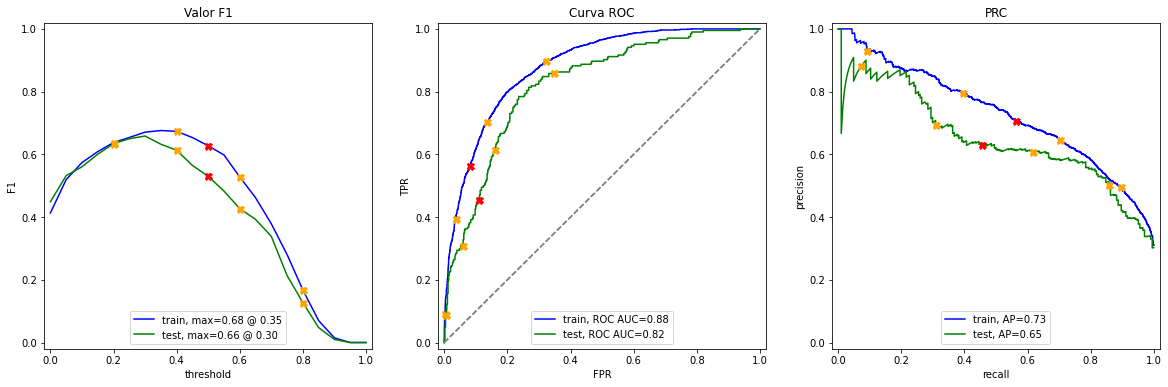

In [106]:
%%time
gbm_evaluation_s = evaluate_model(lgbm_s, features_train_s, target_train_s, features_test_s, target_test_s)
gbm_evaluation_s

### <a id='toc2_5_2_'></a>[CatBoost](#toc0_)

In [107]:
%%time
maximum = 0 
# Cargamos el modelo
search_cat_model_s = CatBoostClassifier(cat_features= cat_index_s)

# Cargamos el dict de posibles parámetros
cat_params = {
    'iterations':[100],
    'learning_rate': list(np.arange(0.1,1,0.05)),
    'random_seed': [37],
    'l2_leaf_reg': list(np.arange(0.5,7.5,0.5)),
    'depth': list(np.arange(6,10)),
    'min_data_in_leaf': list(np.arange(50,100,2)),
    'nan_mode': ['Min','Max'],
    'early_stopping_rounds':[40]
}

# Realizasmos el random_search
best_random_cat_model_s = search_cat_model_s.randomized_search(cat_params,
                                               X=features_train_s, y=target_train_s,
                                               cv= 10, train_size= 0.8)

# Cargamos el cat_model en una variable con los mejores parámetros encontrados
cat_model_s = CatBoostClassifier(**best_random_cat_model_s['params'],cat_features=cat_index_s)
# De ahi entrenamos el modelo y obtenemos sus predicciones
cat_model_s.fit(features_train_s, target_train_s, 
       cat_features= cat_index_s,
        eval_set=(features_valid_s, target_valid_s), verbose=False)

# Obtenemos las probabilidades de las predicciones
target_test_prob_pred = cat_model_s.predict_proba(features_valid_s)

# Finalmente observamos el AUC-ROC en diferentes thresholds
threshold = 0
for threshold in np.arange(0.1,0.9,0.05):
    target_test_pred = (target_test_prob_pred[:, 1] >= threshold).astype(int)
    auc = metrics.roc_auc_score(target_valid_s, target_test_pred_s)
    train_auc = metrics.roc_auc_score(target_valid_s, target_test_pred_s)


    # Y guardamos los datos si vimos un modelo mejor que el que teníamos
    if auc > maximum:
        maximum = auc
        pp = best_random_cat_model_s['params']
        tr_auc = train_auc
        best_threshold = threshold
        
print("*" * 70)
print('AUC-ROC máximo obtenido es:', maximum)
print('AUC-ROC de entrenamiento máximo obtenido es:', tr_auc)
print('Con los parámetros:', pp)
print('Y el threshold', "{:.2f}".format(best_threshold))
print("*" * 70)

0:	learn: 0.5409856	test: 0.5394913	best: 0.5394913 (0)	total: 9.25ms	remaining: 916ms
1:	learn: 0.4725143	test: 0.4759058	best: 0.4759058 (1)	total: 22.2ms	remaining: 1.09s
2:	learn: 0.4282991	test: 0.4420055	best: 0.4420055 (2)	total: 34.3ms	remaining: 1.11s
3:	learn: 0.4106118	test: 0.4296365	best: 0.4296365 (3)	total: 46ms	remaining: 1.1s
4:	learn: 0.3964346	test: 0.4230195	best: 0.4230195 (4)	total: 59ms	remaining: 1.12s
5:	learn: 0.3896649	test: 0.4213224	best: 0.4213224 (5)	total: 70.7ms	remaining: 1.11s
6:	learn: 0.3888089	test: 0.4212671	best: 0.4212671 (6)	total: 74.3ms	remaining: 987ms
7:	learn: 0.3839225	test: 0.4222190	best: 0.4212671 (6)	total: 86.7ms	remaining: 997ms
8:	learn: 0.3816072	test: 0.4210536	best: 0.4210536 (8)	total: 98.8ms	remaining: 999ms
9:	learn: 0.3766532	test: 0.4252535	best: 0.4210536 (8)	total: 111ms	remaining: 997ms
10:	learn: 0.3644810	test: 0.4284146	best: 0.4210536 (8)	total: 124ms	remaining: 1s
11:	learn: 0.3640378	test: 0.4284133	best: 0.4210536

CPU times: user 299 ms, sys: 3.8 ms, total: 303 ms
Wall time: 315 ms


,train,test
Exactitud,0.82,0.80
F1,0.62,0.61
APS,0.72,0.69
ROC AUC,0.88,0.84


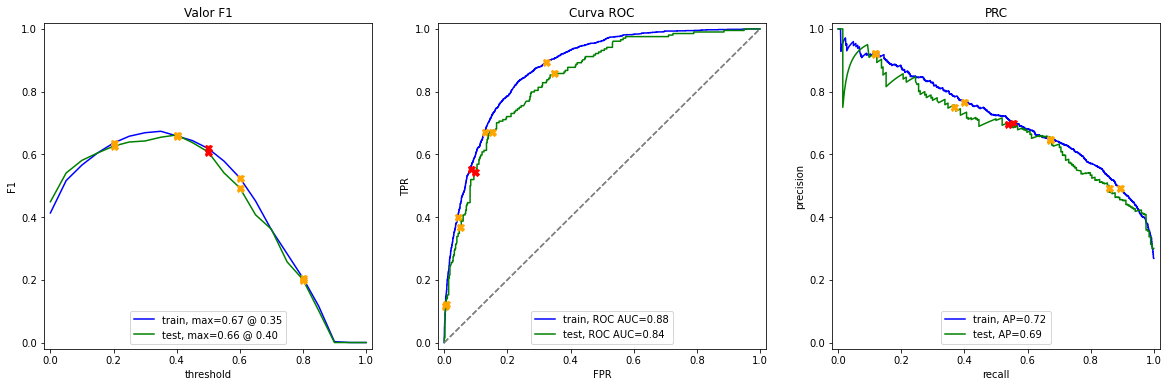

In [108]:
%%time
cat_evaluation_s = evaluate_model(cat_model_s, features_train_s, target_train_s, features_test_s, target_test_s)
cat_evaluation_s

### <a id='toc2_5_3_'></a>[Comparación del rendimiento de modelos](#toc0_)

In [109]:
evals_table = pd.concat([gbm_evaluation_1.T, gbm_evaluation_2.T,
                         cat_evaluation_1.T, cat_evaluation_2.T,
                         gbm_evaluation_s.T, cat_evaluation_s.T])

In [110]:
# Realicemos una comparacion del performance de cada modelo
index_1 = ['Sin selección de variables', 'Sin selección de variables', 'Sin selección de variables', 'Sin selección de variables',
           'Sin selección de variables', 'Sin selección de variables', 'Sin selección de variables', 'Sin selección de variables',
           'Con selección de variables', 'Con selección de variables', 'Con selección de variables', 'Con selección de variables']

index_2= ['LightGBM_1', 'LightGBM_1', 'LightGBM_2', 'LightGBM_2', 'CatBoost_1','CatBoost_1', 'CatBoost_2', 'CatBoost_2',
          'LightGBM_s', 'LightGBM_s', 'CatBoost_s', 'CatBoost_s']

index_3= evals_table.index

comparison_table = pd.DataFrame(data=evals_table.values, index=[index_1,index_2, index_3], columns=gbm_evaluation_1.index)

comparison_table

Exactitud    F1   APS  ROC AUC
Sin selección de variables LightGBM_1 train       0.84  0.65  0.76     0.90
                                      test        0.79  0.60  0.67     0.83
                           LightGBM_2 train       0.96  0.92  0.97     0.99
                                      test        0.76  0.55  0.60     0.80
                           CatBoost_1 train       0.82  0.60  0.69     0.86
                                      test        0.79  0.59  0.69     0.84
                           CatBoost_2 train       0.82  0.61  0.71     0.87
                                      test        0.80  0.60  0.69     0.84
Con selección de variables LightGBM_s train       0.83  0.63  0.73     0.88
                                      test        0.77  0.53  0.65     0.82
                           CatBoost_s train       0.82  0.62  0.72     0.88
                                      test        0.80  0.61  0.69     0.84

In [111]:
train_test_difference = {} 
for i in range(0,12,2):
    model = comparison_table.index[i][1]
    difference = [comparison_table['ROC AUC'][i] - comparison_table['ROC AUC'][i+1]]
    train_test_difference[model] = difference
    
train_test_difference = (pd.DataFrame.from_dict(data= train_test_difference).T.rename(columns= {0: 'train_test_difference'}))
train_test_difference

,train_test_difference
LightGBM_1,0.07
LightGBM_2,0.19
CatBoost_1,0.02
CatBoost_2,0.03
LightGBM_s,0.06
CatBoost_s,0.04


CatBoost está hecho para manejar datos categóricos y ha demostrado ser muy buena opción para el problema en cuestión. Aunque los modelos de CatBoost muestran una diferencia menor entre los conjuntos de entrenamiento y prueba en comparación con los modelos de LightGBM, también demuestran un rendimiento sólido en términos de exactitud y ROC AUC, lo que sugiere una habilidad óptima para generalizar a nuevos datos.
  
Algo que también se puede notar es como en LightGBM es como en la segunda instancia tiene una baja notable en el sobreajuste aún mejor que en la instancia con selección de características. Mientras tanto CatBoost ubica su primera instancia con el menor sobreajuste pero hay una diferencia bastante chica entre los 3 modelos. 
  
Por lo tanto, en función de lo visto, podemos recomendar el uso de CatBoost para este problema específico, posiblemente explorando técnicas adicionales para mejorar su rendimiento general y abordar cualquier sobreajuste; como la regularización o la recopilación de más datos de entrenamiento si es posible.

## <a id='toc2_6_'></a>[Conclusión](#toc0_)

### <a id='toc2_6_1_'></a>[Recapitulación](#toc0_)

Tras llegar al final del proyecto me encuentro feliz de decir que se pudieron seguir todos los pasos que se habían planteado originalmente en el plan de trabajo. Para mi suerte los datos no presentaban problemas muy grandes ya que no tenían valores nulos ni duplicados, ni había un desbalance de clase que tratar, simplemente había que corregir los _dtypes_ de algunas columnas (cosa que iba a tener que hacer de todas formas) y formatear los nombres a `snake_case`. La corrección de _dtypes_ también involucró una leve corrección de los valores ya que muchos tenían valores en forma de texto. Para el reemplazo de dichos valores opté por _label encoding_ ya que la cardinalidad de las columnas era baja, el plan era trabajar con modelos basados en árboles e iba a trabajar con modelos a los cuales se les puede especificar que columnas son categóricas.
  
Posteriormente se combinaron las tablas originales para obtener una sola tabla con todos nuestros datos, eso llevó a la creación de valores ausentes debido a que algunos clientes solo contrataban servicios de internet y no de telefonía o visceversa. No fue muy complicado imputar esos nulos ya que solo había que reemplazarlos por 0. Con la tabla completa hecha ya podía pasar al Análisis Exploratorio de Datos. La exploración se vió bastante limitada ya que la mayoría de las columnas son categóricas lo que solo dejaba espacio para un análisis de distribución el cuál traté de anclar alrededor de nuestro objetivo.
  
Tras realizar una selección de características con métodos de chi2, ANOVA y un modelo LASSO pude determinar las características más influyentes en los datos. Acá hubo una separación ya que primero decidí realizar un entrenamiento de modelos con características determinadas en base al EDA y al criterio del autor. De ahí se realizó una segunda iteración para cada modelo removiendo las 2 características menos influyentes de acuerdo a cada uno de los modelos entrenados. Los modelos fueron LightGBM y CatBoost (también se consideró XGBoost, pero la versión de la plataforma no presenta la implementación que tolera características categóricas). De ahí se realizó el entrenamiento de modelos con las características determinadas en la selección de características.

### <a id='toc2_6_2_'></a>[Comparación de rendimientos](#toc0_)
No se puede mencionar rendimiento sin hablar de tiempo por lo que veamos una tabla comparativa:
  
|           Modelo         | RandomSearch |    fit    | Evaluation |
|--------------------------|--------------|-----------|------------|
|        LightGBM_1         |    1m 10s    |   300ms   |    452ms   |
|        LightGBM_2         |    1m 9s     |   453ms   |    502ms   |
|         LightGBM_s        |    1m 14s    |   789ms   |    545ms   |
|        CatBoost_1         |    21.7s     |   21.7s   |    246ms   |
|        CatBoost_2         |    14.9s     |   14.9s   |    226ms   |
|         CatBoost_s        |    14.6s     |   14.6s   |    239ms   |
  
Si observamos bien los modelos de CatBoost tienen el mismo tiempo de RandomSearch y de fit. Eso se debe a que usé la funcionalidad integrada de CatBoost para realizar el search, y como desconozco los detalles finos sobre como lo hace simplemente agrupamos todo junto. 
  
Es más que evidente la superioridad de CatBoost frente a ésta situación ya que aún con `early_stopping_round` activo en ambos casos y con validación cruzada activa sólo en CatBoost podemos ver como tardó alrededor 3,33 veces más que LightGBM en optimizar los hiperparámetros en el peor de sus tiempos.
  
Otro factor altamente importante en donde CatBoost se para muy por encima es en el tiempo para realizar la evaluación ya que observamos como demora aproximadamente la mitad (o menos) en realizar las predicciones. Si tomamos en cuenta que en producción no va a tener que realizar los gráficos de la función de evaluación se vuelve aún mejor y completamente competente para un entorno productivo.
  
Honestamente, no es sorpresa para nadie pues CatBoost está hecho para conjuntos de datos altamente CATegóricos como los que conforman éste proyecto. En resumen, CatBoost demostró ser el rey de los datos categóricos ya que no sólo presentó mejores métricas de evaluación en un menor tiempo, sino que también lo hizo con un grado de sobreajuste a los datos mucho menor.
  
Finalmente hay que decidir cuál de las 3 iteraciones de CatBoost se coronará como ganadora. Tras una ponderación frente a la `comparison_table` decidí que voy a optar por el modelo `CatBoost_s`. Mi fundamentos se basan principalmente en las métricas Accuracy y F1, técnicamente es el modelo de _CatBoost_ más sobreajustado si miramos únicamente el valor de ROC-AUC pero al analizar las otras métricas observamos como presenta valores más altos con un mismo nivel de sobreajuste o menor. También nos da la tranquilidad de que requiere menos columnas que las otras iteraciones y menos columnas son menos datos, lo que se traduce a menor probabilidad de errores.
  
### <a id='toc2_6_3_'></a>[Análisis de las predicciones](#toc0_)
Con el modelo determinado ahora podemos pasar a realizar un análisis de las respuestas del modelo. Para eso vamos a cargar las predicciones y la predicciones en forma de probabilidad en un nuevo dataframe.

In [112]:
# Primero obtenemos las predicciones
predict = cat_model_s.predict(features_test_s)
predict_proba = cat_model_s.predict_proba(features_test_s)[:,1]

In [113]:
# Ahora carguemos todo en un df y lo ordenemos en base a la probabilidad
predict_df = pd.DataFrame(data={
    'prediction': predict,
    'probability': predict_proba,
    'true_value': target_test_s
}).sort_values(by="prediction", ascending=True).reset_index(drop=True)

In [114]:
predict_df

,prediction,probability,true_value
0,0,0.034532,0
1,0,0.041514,0
2,0,0.215222,1
3,0,0.010488,0
4,0,0.032400,0
...,...,...,...
700,1,0.643958,1
701,1,0.756809,1
702,1,0.770506,0
703,1,0.802438,1


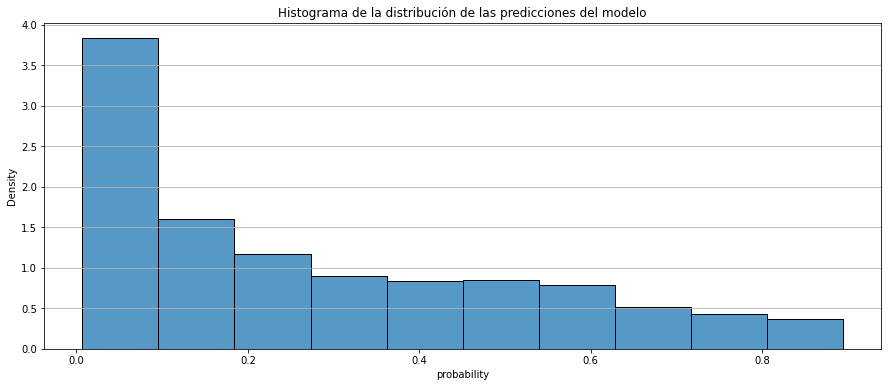

In [115]:
plt.figure(figsize=(15, 6))
sns.histplot(x=predict_df['probability'], stat="density", bins=10)
plt.title('Histograma de la distribución de las predicciones del modelo')
plt.grid(axis='y')
plt.show()

Se puede observar que la mayoría de los valores en los datos presentan una predicción negativa respecto al objetivo. Recién tomando un _threshold_ bajo de 0.2 nos encontramos en una situación en la que las predicciones fueron asignadas alrededor de 50/50! Verifiquemos un poco la verdadera distribución de los datos.

In [116]:
predict_df['true_value'].value_counts(normalize=True)

0    0.710638
1    0.289362
Name: true_value, dtype: float64

Supongo que al ver los valores reales no parece tan descabellada la distribución. De todas formas separemos en conjuntos discretos los datos y grafiquemos con eso en mente.

In [117]:
predict_df

,prediction,probability,true_value
0,0,0.034532,0
1,0,0.041514,0
2,0,0.215222,1
3,0,0.010488,0
4,0,0.032400,0
...,...,...,...
700,1,0.643958,1
701,1,0.756809,1
702,1,0.770506,0
703,1,0.802438,1


In [118]:
predict_df['quantile'] = pd.qcut(predict_df["probability"], q=10, labels=np.linspace(1,10,10))

In [119]:
# Le cambiamos el dtype para poder graficar sin problemas
predict_df = predict_df.astype({'quantile':int})

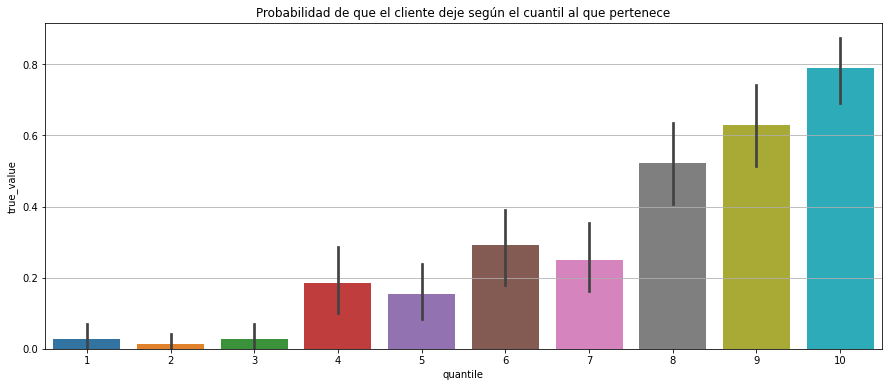

In [120]:
# Y graficamos
plt.figure(figsize=(15, 6))
sns.barplot(data=predict_df, x="quantile", y="true_value")
plt.title('Probabilidad de que el cliente deje según el cuantil al que pertenece')
plt.grid(axis='y')
plt.show()

Éste gráfico da información muy interesante la verdad, es más que evidente que por más que hayamos separado en 10 cuantiles; los datos se separan en 3 grupos. El primer grupo corresponde a los cuantiles 1, 2 y 3, los cuales son los clientes que menor probabilidad de dejar la compañia tienen. 
  
De ahí hay un grupo intermedio con los cuantiles 4,5,6 y 7, éste es el grupo más heterogeneo de todos ya que también se separa discretamente en otros 2 grupos pero al mirar las barras de error encontramos un gran solapamiento de las mismas junto con los otros valores del grupo. El grupo intermedio presenta probabilidades bastante más altas de dejar los servicios de la compañía que el grupo 1, pero siguen ubicandose en un rango bajo apenas llegando alrededor del 30%. 
  
Finalmente se encuentra el 3er grupo con los cuantiles 8, 9 y 10, honestamente consideré ubicar al cuantil 10 en su propia categoría pero el cuantíl 9 presenta suficiente solapación tanto con el 8 como con el 10, por lo que es básicamente el "pegamento" del grupo. Éste grupo presenta un salto notorio en la probabilidad de dejar la compañía llegando a pasar en 50% por lo que se caracterizan por tener más chances de dejarla en un futuro que de no hacerlo, ellos son el grupo que la empresa está buscando.
  
Ahora quiero ver si puedo reforzar mi postura realizando una separación en cuantiles pero ésta vez voy a separar en 3 y ver si los grupos se repiten.

In [122]:
predict_df['quantile_groups'] = pd.qcut(predict_df["probability"], q=3, labels=np.linspace(1,3,3))

In [125]:
predict_df = predict_df.astype({'quantile_groups':int})

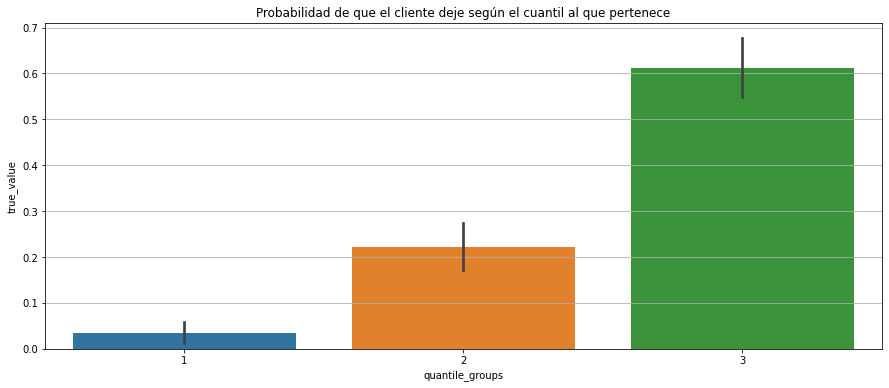

In [126]:
# Y graficamos
plt.figure(figsize=(15, 6))
sns.barplot(data=predict_df, x="quantile_groups", y="true_value")
plt.title('Probabilidad de que el cliente deje según el cuantil al que pertenece')
plt.grid(axis='y')
plt.show()

Efectivamente, al separar los datos en 3 grupos logramos delimitar de manera mucho más firme la estructura. Podemos ver como los 3 grupos encajan perfectamente a las descripciones previamente dadas. Con ésto ya podemos pasar a la siguiente etapa y concluir finalmente el informe. 

### <a id='toc2_6_4_'></a>[Recomendaciones y palabras finales](#toc0_)
Que debe hacer la empresa entonces? Mi recomendación conceptualiza un plan que consiste en los siguientes pasos:
- Desplegar el modelo dentro de los servidores de la empresa para que éste pueda realizar predicciones mes a mes tanto de si el cliente puede dejar la empresa como la predicción de probabilidad.
- Posterior al modelo se debe desplegar un algoritmo que realice las transformaciones y procesamiento simple de los datos pero reteniendo el orden (en contraste a como lo hice yo) para poder vincularlo a clientes específicos.
- Ya con la tabla hecha identificar a los clientes pertenecientes al grupo 3.
- De ahí se pueden ir probando diferentes métodos para lograr la retención de dichos clientes.
    - Los métodos deben ser sujetos a pruebas para verificar su efectividad (como una prueba A|B o similar).
    - Éstos métodos pueden ir desde descuentos al monto mensual que pagan como promociones para obtener servicios o métodos de pagos en base a lo observado en la sección 3.1 del trabajo.
- Una vez se logren identificar cuales métodos logran impactos significativos, buscar automatizar dichas promociones.
- Periódicamente realizar el entrenamiento y prueba de nuevos modelos con una mayor cantidad de datos de entrenamiento.
  
Eso corresponde en lo que respecta al plan de accionar respecto al modelo, todos los pasos deben ser verificados para asegurar la posible implementación sin problemas en la empresa. De todas formas, eso no es lo único que se puede hacer.
  
El último punto indica que se deben entrenar nuevamente modelos con el fin de lograr mejores resultados y predicciones más acertadas mediante la mayor recopilación de datos. Pero esa no es la única forma de aumentar la cantidad de datos, también se puede:
- Realizar una recopilación de una mayor cantidad de valores numéricos como la cantidad de internet consumido por mes o la cantidad de llamadas hechas. Éstos pueden aportar información muy importante y demuestran un gran impacto en los modelos,
- Obtener como información si el cliente busca renovar descuentos cuando éstos terminan o no.
- Realizar una ofuscación de datos más privados de los clientes para así poder enviar una mayor cantidad de información que potencialmente pueda ayudar el entrenamiento de modelos más eficaces.
- Clasificar de forma discreta si un cliente utiliza los servicios de la empresa con fines personales o empresariales.
  
Se puede notar que tanto en el plan de despliegue como en las recomendaciones puedo ser medio vago en los detalles o dejar mucho a la interpretación. Eso es adrede pues para realizar recomendaciones con mayor detalle requeriría de mí de conocer en mayor profundidad no solo la estructura interna y externa de la empresa, sino también características sobre cómo la empresa establece los contratos con sus clientes y como maneja internamente dichos contratos en sus servidores. De todas formas, me parece que las recomendaciones son más que suficiente para que un equipo a cargo de la decisión dentro de dicha empresa pueda ajustar y adaptar con facilidad los planes de acción con los conocimientos que ellos si tienen.